In [53]:
from pathlib import Path
import os.path
import os
import numpy as np
import re
import pandas as pd
import shutil 
import networkx as nx
import powerlaw
#from networkx.algorithms import community
import networkx.algorithms.community as nxcom
import community# as community_louvain
import matplotlib.pyplot as plt
import collections

In [4]:
csv_SIG = 'D:/mm_thesis/Software_graphs/SIG_graph/'
csv_path_l = os.listdir(csv_SIG)
csv_files = [(os.path.join(csv_SIG,infile)+"/") for infile in csv_path_l]

In [5]:
csv_path_l 

['Cass', 'CHUKWA', 'HC', 'IVY', 'JENA']

In [6]:
csv_files


['D:/mm_thesis/Software_graphs/SIG_graph/Cass/',
 'D:/mm_thesis/Software_graphs/SIG_graph/CHUKWA/',
 'D:/mm_thesis/Software_graphs/SIG_graph/HC/',
 'D:/mm_thesis/Software_graphs/SIG_graph/IVY/',
 'D:/mm_thesis/Software_graphs/SIG_graph/JENA/']

In [7]:
soft_path = 'D:/mm_thesis/the_files/SIG_data/'

softwareList = os.listdir(soft_path)
soft_files = [(os.path.join(soft_path,infile)+"/") for infile in softwareList]
csv_SIG = 'D:/mm_thesis/Software_graphs/SIG_graph/'
csv_path_l = os.listdir(csv_SIG)
csv_files = [(os.path.join(csv_SIG,infile)+"/") for infile in csv_path_l]

In [8]:
soft_files

['D:/mm_thesis/the_files/SIG_data/cassandra-graphs/',
 'D:/mm_thesis/the_files/SIG_data/chukwa-graphs/',
 'D:/mm_thesis/the_files/SIG_data/httpclient-graphs/',
 'D:/mm_thesis/the_files/SIG_data/ivy-graphs/',
 'D:/mm_thesis/the_files/SIG_data/jena-graphs/']

In [9]:
csv_files

['D:/mm_thesis/Software_graphs/SIG_graph/Cass/',
 'D:/mm_thesis/Software_graphs/SIG_graph/CHUKWA/',
 'D:/mm_thesis/Software_graphs/SIG_graph/HC/',
 'D:/mm_thesis/Software_graphs/SIG_graph/IVY/',
 'D:/mm_thesis/Software_graphs/SIG_graph/JENA/']

# create the txt files for matlab 

In [11]:
K_write = ("D:/mm_thesis/Software_graphs/SIG_graph/SIG_Konect/")
K_path = os.listdir(K_write)

In [12]:
K_path


[]

In [20]:
def find_nth(haystack, needle, n):
    start = haystack.find(needle)
    while start >= 0 and n > 1:
        start = haystack.find(needle, start+len(needle))
        n -= 1
    return start

In [38]:
for f_d in csv_files:
    
    d_n_l = f_d[:f_d.rfind('/')]
    d_n_f = d_n_l[d_n_l.rfind('/')+1:]
    print(d_n_f)
   
    dir_path= os.path.join(K_write,d_n_f)+"/"
    print('write',dir_path)
    os.makedirs(dir_path,exist_ok=True)
    f1 = os.listdir(f_d)
    f3 =[d for d in f1 if d.find('graphs')!= -1]
    
    g_f = os.path.join(f_d,f3[0])+"/"+"Edges"+"/"
    
    g_f_n = os.listdir(g_f)
    net_files = [d for d in g_f_n if d.find('the_')!= -1]
  
    for ed in net_files:
        ed_f = os.path.join(g_f,ed)
        print(ed)
        st_name = find_nth(ed,"_",2)
        en_name = ed.find(".csv")
        first_part = ed[st_name+1:en_name]
        #print(ed[st_name+1:en_name])
        print(40*"+")
        e1 =  pd.read_csv(ed_f)
        ts = e1.at[0,'t_stmp']
        x_t = str(ts)
        print(x_t)
        file_name = x_t+'.txt'
        print(file_name)
        print("dir to save")
        x_file = os.path.join(K_write,d_n_f)+"/"
        print(x_file)
        file_to_save = x_file + file_name
        print('txt file',file_to_save)
        tt =  e1[['source','target']]
        #print(tt.head())
        tt.to_csv(file_to_save, sep='\t', index=False, header = False)
        

Cass
write D:/mm_thesis/Software_graphs/SIG_graph/SIG_Konect/Cass/
the_edges_cassandra-cassandra-0.3.0-final.csv.csv
++++++++++++++++++++++++++++++++++++++++
1254866400
1254866400.txt
dir to save
D:/mm_thesis/Software_graphs/SIG_graph/SIG_Konect/Cass/
txt file D:/mm_thesis/Software_graphs/SIG_graph/SIG_Konect/Cass/1254866400.txt
the_edges_cassandra-cassandra-0.4.0-final.csv.csv
++++++++++++++++++++++++++++++++++++++++
1253224800
1253224800.txt
dir to save
D:/mm_thesis/Software_graphs/SIG_graph/SIG_Konect/Cass/
txt file D:/mm_thesis/Software_graphs/SIG_graph/SIG_Konect/Cass/1253224800.txt
the_edges_cassandra-cassandra-0.4.1.csv.csv
++++++++++++++++++++++++++++++++++++++++
1260399600
1260399600.txt
dir to save
D:/mm_thesis/Software_graphs/SIG_graph/SIG_Konect/Cass/
txt file D:/mm_thesis/Software_graphs/SIG_graph/SIG_Konect/Cass/1260399600.txt
the_edges_cassandra-cassandra-0.4.2.csv.csv
++++++++++++++++++++++++++++++++++++++++
1239400800
1239400800.txt
dir to save
D:/mm_thesis/Software_gr

the_edges_cassandra-cassandra-0.8.1.csv.csv
++++++++++++++++++++++++++++++++++++++++
1308866400
1308866400.txt
dir to save
D:/mm_thesis/Software_graphs/SIG_graph/SIG_Konect/Cass/
txt file D:/mm_thesis/Software_graphs/SIG_graph/SIG_Konect/Cass/1308866400.txt
the_edges_cassandra-cassandra-0.8.10.csv.csv
++++++++++++++++++++++++++++++++++++++++
1343858400
1343858400.txt
dir to save
D:/mm_thesis/Software_graphs/SIG_graph/SIG_Konect/Cass/
txt file D:/mm_thesis/Software_graphs/SIG_graph/SIG_Konect/Cass/1343858400.txt
the_edges_cassandra-cassandra-0.8.2.csv.csv
++++++++++++++++++++++++++++++++++++++++
1311285600
1311285600.txt
dir to save
D:/mm_thesis/Software_graphs/SIG_graph/SIG_Konect/Cass/
txt file D:/mm_thesis/Software_graphs/SIG_graph/SIG_Konect/Cass/1311285600.txt
the_edges_cassandra-cassandra-0.8.3.csv.csv
++++++++++++++++++++++++++++++++++++++++
1302213600
1302213600.txt
dir to save
D:/mm_thesis/Software_graphs/SIG_graph/SIG_Konect/Cass/
txt file D:/mm_thesis/Software_graphs/SIG_grap

1353970800
1353970800.txt
dir to save
D:/mm_thesis/Software_graphs/SIG_graph/SIG_Konect/Cass/
txt file D:/mm_thesis/Software_graphs/SIG_graph/SIG_Konect/Cass/1353970800.txt
the_edges_cassandra-cassandra-1.1.8.csv.csv
++++++++++++++++++++++++++++++++++++++++
1355439600
1355439600.txt
dir to save
D:/mm_thesis/Software_graphs/SIG_graph/SIG_Konect/Cass/
txt file D:/mm_thesis/Software_graphs/SIG_graph/SIG_Konect/Cass/1355439600.txt
the_edges_cassandra-cassandra-1.1.9.csv.csv
++++++++++++++++++++++++++++++++++++++++
1358118000
1358118000.txt
dir to save
D:/mm_thesis/Software_graphs/SIG_graph/SIG_Konect/Cass/
txt file D:/mm_thesis/Software_graphs/SIG_graph/SIG_Konect/Cass/1358118000.txt
the_edges_cassandra-cassandra-1.2.0.csv.csv
++++++++++++++++++++++++++++++++++++++++
1356735600
1356735600.txt
dir to save
D:/mm_thesis/Software_graphs/SIG_graph/SIG_Konect/Cass/
txt file D:/mm_thesis/Software_graphs/SIG_graph/SIG_Konect/Cass/1356735600.txt
the_edges_cassandra-cassandra-1.2.1.csv.csv
+++++++++

the_edges_httpcomponents-client-4.2.6-RC1.csv.csv
++++++++++++++++++++++++++++++++++++++++
1377727200
1377727200.txt
dir to save
D:/mm_thesis/Software_graphs/SIG_graph/SIG_Konect/HC/
txt file D:/mm_thesis/Software_graphs/SIG_graph/SIG_Konect/HC/1377727200.txt
the_edges_httpcomponents-client-4.2.6-RC2.csv.csv
++++++++++++++++++++++++++++++++++++++++
1378245600
1378245600.txt
dir to save
D:/mm_thesis/Software_graphs/SIG_graph/SIG_Konect/HC/
txt file D:/mm_thesis/Software_graphs/SIG_graph/SIG_Konect/HC/1378245600.txt
the_edges_httpcomponents-client-4.3-RC1.csv.csv
++++++++++++++++++++++++++++++++++++++++
1378677600
1378677600.txt
dir to save
D:/mm_thesis/Software_graphs/SIG_graph/SIG_Konect/HC/
txt file D:/mm_thesis/Software_graphs/SIG_graph/SIG_Konect/HC/1378677600.txt
the_edges_httpcomponents-client-4.3.1-RC1.csv.csv
++++++++++++++++++++++++++++++++++++++++
1380800745
1380800745.txt
dir to save
D:/mm_thesis/Software_graphs/SIG_graph/SIG_Konect/HC/
txt file D:/mm_thesis/Software_graphs/S

the_edges_jena-jena-2.10.1.csv.csv
++++++++++++++++++++++++++++++++++++++++
1368223200
1368223200.txt
dir to save
D:/mm_thesis/Software_graphs/SIG_graph/SIG_Konect/JENA/
txt file D:/mm_thesis/Software_graphs/SIG_graph/SIG_Konect/JENA/1368223200.txt
the_edges_jena-jena-2.11.0.csv.csv
++++++++++++++++++++++++++++++++++++++++
1378936800
1378936800.txt
dir to save
D:/mm_thesis/Software_graphs/SIG_graph/SIG_Konect/JENA/
txt file D:/mm_thesis/Software_graphs/SIG_graph/SIG_Konect/JENA/1378936800.txt
the_edges_jena-jena-2.7.1.csv.csv
++++++++++++++++++++++++++++++++++++++++
1339538400
1339538400.txt
dir to save
D:/mm_thesis/Software_graphs/SIG_graph/SIG_Konect/JENA/
txt file D:/mm_thesis/Software_graphs/SIG_graph/SIG_Konect/JENA/1339538400.txt
the_edges_jena-jena-2.7.2.csv.csv
++++++++++++++++++++++++++++++++++++++++
1340834400
1340834400.txt
dir to save
D:/mm_thesis/Software_graphs/SIG_graph/SIG_Konect/JENA/
txt file D:/mm_thesis/Software_graphs/SIG_graph/SIG_Konect/JENA/1340834400.txt
the_ed

# _____________________________________________________

In [6]:
for f_d in csv_files:
    print(f_d)

D:/mm_thesis/SIG_csv/Cass/
D:/mm_thesis/SIG_csv/CHUKWA/
D:/mm_thesis/SIG_csv/HADOOP/
D:/mm_thesis/SIG_csv/HC/
D:/mm_thesis/SIG_csv/IVY/
D:/mm_thesis/SIG_csv/JENA/


In [121]:
def get_info_path (sub):
    
    no_edges = sub.number_of_edges()
    no_nodes = sub.number_of_nodes()
    #nnodes = sub.number_of_nodes()
#     sub_in = sub.in_degree()
#     sub_out = sub.out_degree()
    avg_deg= sum(d for n, d in sub.in_degree()) / float(no_nodes)

#     avg_deg_out = sum(d for n, d in sub.out_degree()) / float(no_nodes)

####  D E G R E E   D I S T R I B U T I O N 

    in_degrees = sub.in_degree() # dictionary node:degree
    in_values = [val for (node, val) in sorted(in_degrees(), key=lambda pair: pair[0], reverse = True)]
    inCount = collections.Counter(in_values)
    out_degrees = sub.out_degree()
    out_values = [val for (node, val) in sorted(out_degrees(), key=lambda pair: pair[0],reverse= True)]
    outCount = collections.Counter(out_values)

    sub_un = sub.to_undirected()
    sub_di = nx.DiGraph(sub)
    
#  G E T   T H E  C O N N E C T E D  C O M P O N E N T S  
    SCC = nx.number_strongly_connected_components(sub)
    WCC = nx.number_weakly_connected_components(sub)

    largest_cc = max(nx.weakly_connected_components(sub), key=len)
    s = sub.subgraph(largest_cc)
#     s_di = sub.subgraph(largest_cc)
#     s = s_di.to_undirected()
    
    LWC_edges = s.number_of_edges()
    LWC_nodes = s.number_of_nodes()

        
 
    
    sub_density = nx.density(sub)
#     print("DENSITY :", sub_density)
    sub_s = nx.density(s)
#     print('Wcc density', sub_s)
    
    sub_un = sub.to_undirected()
    
    
    communities = sorted(nxcom.greedy_modularity_communities(sub_un), key=len, reverse=True)
    no_comm = len(communities)
#     print("comm", no_comm)
#     print(communities[0])
    
#     di_sub = nx.DiGraph(sub)
#     print('s cluster', nx.average_clustering(s))
#     avg_clust = nx.average_clustering (sub_un)
    di_sub = nx.DiGraph(sub)
    try:
        avg_clust = nx.average_clustering (di_sub)
#         avg_clust = nx.average_clustering (sub_un)
        
        
        print('cluster' , avg_clust)
    except Exception:
        avg_clust = 0
        print('err')
        pass 
   
    s_di = nx.DiGraph(s)
    s_un = s.to_undirected()
    try:
#         st1 = time.time()
        gc_avg_shortest_path = nx.average_shortest_path_length(s)
#         print('avg shortest path multi', gc_avg_shortest_path)
        un_avg_shortest_path = nx.average_shortest_path_length(s_un)
#         print('avg shortest path un',un_avg_shortest_path)
#         end1 = time.time()
#         print('time for path', end1- st1)
       
    except Exception:
        print("no wCC")
        gc_avg_shortest_path = 0
        
        pass
        
   
    return (no_nodes,no_edges,avg_deg, no_comm, gc_avg_shortest_path,un_avg_shortest_path,sub_density,avg_clust,SCC,WCC,
            LWC_nodes,LWC_edges,in_values,out_values)
#     return (no_nodes,no_edges,avg_deg_in, avg_deg_out, gc_avg_shortest_path,sub_density,avg_clust,p_law)
#return (no_edges, no_nodes, GCC, gc_sub_e, gc_sub_n, sub_density,avg_clust, p_law,diameter )
    
    

In [122]:
column_names = ['Version','t_stmp','no_nodes', 'no_edges','avg_degree',
                'no_comm','avg_shortest_path','un_avg_shortest_path','sub_density',
                'avg_clust','SCC','WCC', 'LWC_nodes','LWC_edgeds','in_values','out_values' ]

for net in csv_files:

    print('net:    ',net)
    s_name = net[:-1]
    name_f = s_name.rfind('/')
    soft_name = s_name[name_f+1:]
    print('soft_name',soft_name)
    net_list = os.listdir(net)
    save_name = soft_name +'_stat.csv'
#     print(net_list)

    nodes_files = [(os.path.join(net,infile ))for infile in net_list if os.path.isfile(os.path.join(net,infile))]
    net_dir = [(os.path.join(net,infile)+'/')for infile in net_list if os.path.isdir(os.path.join(net,infile))] 
#     print('net_dir',net_dir)
    nodes_nodup = [j for j in nodes_files if j.find('nodup')!=-1 ]
    print('all_nodes', nodes_nodup)
    nodes_all = nodes_nodup[0]
    node_df = pd.read_csv(nodes_all)
    net_list = []
    for g in net_dir:    
#         print(g)
        g_list = os.listdir(g)
        edges_files = [(os.path.join(g,i)+'/') for i in g_list if ((i.find('Edges') != -1) and (os.path.isdir(os.path.join(g,i))))]
        for net_graph in edges_files:
            nw_list = os.listdir(net_graph)
            nn_list = [i for i in nw_list if i.find('the')!=-1]
            print(len(nn_list))
            info_list = []
            for i in nn_list:
#                 print(i)
                i_read = os.path.join(net_graph,i)
#                 print(i_read)
#           
                e1 =  pd.read_csv(i_read)
                i_name   = e1["Version"].tolist()[0]
                print('i_name  ',i_name)
                ts = e1['t_stmp'].tolist()[0]
                #         print(ts)
        #         x = i_name
                ts = e1.at[0,'t_stmp']
#                 print(ts)
#                 print('i   :',i)
# #   
                sub = nx.from_pandas_edgelist(e1, source = 'source', target='target',edge_attr=True, create_using=nx.DiGraph())
# # #                                       nx.DiGraph())
        
       
        
        
                no_nodes, no_edges,avg_deg,no_comm, gc_avg_shortest_path,un_avg_shortest_path,sub_density,avg_clust,SCC,WCC,LWC_nodes,LWC_edges,in_values,out_values =get_info_path(sub)
         
                info_list.append([i_name,ts,no_nodes,no_edges, avg_deg,no_comm,
                          gc_avg_shortest_path,un_avg_shortest_path,sub_density,avg_clust,SCC,WCC,LWC_nodes,LWC_edges,in_values,out_values])
    
# #         print("putting info ", soft)
    
        to_save = (os.path.join(net,save_name))
        print('to_save', to_save)
        nt_d = pd.DataFrame(info_list)
        nt_d.columns = column_names
        nt_d.to_csv(to_save,  encoding='utf-8', index = False)
                


net:     D:/mm_thesis/Software_graphs/SIG_graph/Cass/
soft_name Cass
all_nodes ['D:/mm_thesis/Software_graphs/SIG_graph/Cass/all_nodes_nodup.csv']
82
i_name   cassandra-cassandra-0.3.0-final
cluster 0.03891946381561184
i_name   cassandra-cassandra-0.4.0-final
cluster 0.04095630047852227
i_name   cassandra-cassandra-0.4.1
cluster 0.03682127411642353
i_name   cassandra-cassandra-0.4.2
cluster 0.03284257795748245
i_name   cassandra-cassandra-0.5.0
cluster 0.03338699492107816
i_name   cassandra-cassandra-0.5.1
cluster 0.032539618723060826
i_name   cassandra-cassandra-0.6.0
cluster 0.03297772512680655
i_name   cassandra-cassandra-0.6.1
cluster 0.036551146284707674
i_name   cassandra-cassandra-0.6.10
cluster 0.03579050729850145
i_name   cassandra-cassandra-0.6.11
cluster 0.03960705670787238
i_name   cassandra-cassandra-0.6.12
cluster 0.0375489456598356
i_name   cassandra-cassandra-0.6.13
cluster 0.035333396910898235
i_name   cassandra-cassandra-0.6.2
cluster 0.041598599367738555
i_name   cas

i_name   httpcomponents-client-4.5-RC1
cluster 0.045445399944811005
i_name   httpcomponents-client-4.5-RC2
cluster 0.04541305446442324
i_name   httpcomponents-client-4.5.1-RC1
cluster 0.04496837832648008
i_name   httpcomponents-client-4_0_API_FREEZE
cluster 0.0314203980587518
to_save D:/mm_thesis/Software_graphs/SIG_graph/HC/HC_stat.csv
net:     D:/mm_thesis/Software_graphs/SIG_graph/IVY/
soft_name IVY
all_nodes ['D:/mm_thesis/Software_graphs/SIG_graph/IVY/all_nodes_nodup.csv']
18
i_name   ant-ivy-1.4.1
cluster 0.06799014265940509
i_name   ant-ivy-2.0.0-alpha2
cluster 0.06649601899529767
i_name   ant-ivy-2.0.0-beta1
cluster 0.06356892325390322
i_name   ant-ivy-2.0.0-beta2
cluster 0.05862717684721582
i_name   ant-ivy-2.0.0-rc1
cluster 0.05664568361818285
i_name   ant-ivy-2.0.0-rc2
cluster 0.056750309179216966
i_name   ant-ivy-2.0.0
cluster 0.056828404733584026
i_name   ant-ivy-2.1.0-rc1
cluster 0.05761514454429797
i_name   ant-ivy-2.1.0-rc2
cluster 0.05748105915215684
i_name   ant-ivy-2

In [129]:
sub_info
ss = list(sub_info.split("\n")) 
print(sub_info)


Name: 
Type: DiGraph
Number of nodes: 2785
Number of edges: 7766
Average in degree:   2.7885
Average out degree:   2.7885


In [130]:
nnodes = sub.number_of_nodes()
print(sum(d for n,d in sub.in_degree()))
print(sum(d for n,d in sub.out_degree()))
deg_in = sum(d for n, d in sub.in_degree()) / float(nnodes)

deg_out = sum(d for n, d in sub.out_degree()) / float(nnodes)


7766
7766


In [114]:
print(deg_in)
print(deg_out)

3.7855400310490133
3.7855400310490133


In [137]:
wc = [len(c) for c in sorted(nx.weakly_connected_components(sub),key=len, reverse=True)]

In [148]:
largest_cc = max(nx.weakly_connected_components(sub), key=len)

In [149]:
 s = sub.subgraph(largest_cc)

In [150]:
gc_avg_shortest_path = nx.average_shortest_path_length(s)

In [151]:
gc_avg_shortest_path

1.3783083729132555

In [164]:
import time

## make the txt files to use Knoect stuff


In [8]:
(csv_files)

['D:/mm_thesis/SIG_csv/Cass/',
 'D:/mm_thesis/SIG_csv/CHUKWA/',
 'D:/mm_thesis/SIG_csv/HADOOP/',
 'D:/mm_thesis/SIG_csv/HC/',
 'D:/mm_thesis/SIG_csv/IVY/',
 'D:/mm_thesis/SIG_csv/JENA/']

In [4]:
path_n = "D:/mm_thesis/"

In [28]:
cass_f = csv_files[0]

In [29]:

f1 = os.listdir(cass_f)
f3 =[d for d in f1 if d.find('graphs')!= -1]
g_f = os.path.join(cass_f,f3[0])+"/"+"Edges"+"/"
g_f_n = os.listdir(g_f)
net_files = [d for d in g_f_n if d.find('the_new')!= -1]
for ed in net_files:
    ed_f = os.path.join(g_f,ed)
    print(ed)
    e1 =  pd.read_csv(ed_f)
        

'D:/mm_thesis/SIG_csv/Cass/'

## get every edges file by itself do the network metrics other than the edges & nodes addedd, deleted

##3

In [6]:
for f_d in csv_files:
    f1 = os.listdir(f_d)
    
    f3 =[d for d in f1 if d.find('graphs')!= -1]
    print(30* '=')
    print(f3)
    
    g_f = os.path.join(f_d,f3[0])+"/"+"Edges"+"/"
    print("g_f",g_f)
  
    g_f_n = os.listdir(g_f)
    net_files = [d for d in g_f_n if d.find('the_new')!= -1]
    #print(net_files)
    print(len(net_files))
    print(30* '=')
#     column_names = ['time','version','edges','nodes','GCC','giant_e',
#                     'giant_n','Density','clustering', 'communities','powerlaw']
#     column_names = ['version','time','no_nodes', 'no_edges','avg_in_degree','avg_out_degree','avg_shortest_path',
#                     'sub_density','avg_clust','p_law']
                    
    column_names = ['Version','t_stmp','no_nodes', 'no_edges','avg_degree',
                    'no_comm','avg_shortest_path','sub_density',
                'avg_clust','SCC','WCC', 'LWC_nodes','LWC_edgeds','inCount','outCount']

    nt_df  = pd.DataFrame(columns = column_names)
    info_list = []
    x = 0
    for ed in net_files:
        ed_f = os.path.join(g_f,ed)
        print(ed)
        e1 =  pd.read_csv(ed_f)
        x = ed
        ts = e1.at[0,'Timestamp']
        print(ts)
        
#         sub = nx.from_pandas_edgelist(e1, source = 'source', target='target',edge_attr=True, create_using=nx.DiGraph())
        
        
#                           GCC ,gc_sc_e ,gc_sc_n,sc_density,avg_clust , no_comm,p_law])
#         no_edges, no_nodes, GCC, gc_sc_e, gc_sc_n, sc_density,avg_clust, no_comm, p_law = get_info_new(sub)
#         info_list.append([x,ts,no_edges,no_nodes,
#                           GCC ,gc_sc_e ,gc_sc_n,sc_density,avg_clust , no_comm,p_law])
#         no_nodes, no_edges,avg_deg_in, avg_deg_out, gc_avg_shortest_path,sub_density,avg_clust,p_law = get_info_path(sub)
         
#         info_list.append([x,ts,no_nodes,no_edges, avg_deg_in, avg_deg_out,
#                           gc_avg_shortest_path,sub_density,avg_clust,p_law])

        sub = nx.from_pandas_edgelist(e1, source = 'source', target='target',edge_attr=True, create_using=nx.MultiDiGraph())
        no_nodes, no_edges,avg_deg_in, avg_deg_out,no_comm, gc_avg_shortest_path,sub_density,avg_clust,p_law,SCC,WCC,LWC_nodes,LWC_edges =get_info_path(sub)
        info_list.append([x,ts,no_nodes,no_edges, avg_deg_in, avg_deg_out,no_comm,
                          gc_avg_shortest_path,sub_density,avg_clust,p_law,SCC,WCC,LWC_nodes,LWC_edges])
        
        
    nt_d = pd.DataFrame(info_list)
    print(nt_d.head())
    nt_d.columns = column_names
    #C_path =g_f +'info_new.csv'
    C_path =g_f +'info_SIG.csv'
    print(C_path)
    nt_d.to_csv(C_path, encoding='utf-8', index=False)
        

['cassandra-graphs']
g_f D:/mm_thesis/SIG_csv/Cass/cassandra-graphs/Edges/
82
the_new_edges_cassandra-cassandra-0.3.0-final.csv
1268522240.0
DENSITY : 0.002254608969479167
comm 39
frozenset({513, 1537, 1538, 2054, 10, 11, 12, 13, 2061, 15, 1547, 1548, 1549, 1043, 1551, 1553, 3089, 2595, 551, 553, 554, 44, 2608, 49, 50, 51, 2100, 53, 3120, 55, 59, 571, 1091, 1101, 1613, 1614, 80, 1104, 82, 1106, 2640, 2647, 2649, 2650, 3162, 607, 1634, 1123, 1124, 611, 612, 1636, 1643, 620, 112, 113, 114, 115, 116, 117, 629, 630, 2691, 2692, 2182, 1673, 2186, 2187, 1674, 1675, 1676, 1677, 1678, 146, 1172, 2208, 161, 678, 168, 2729, 170, 171, 685, 686, 687, 688, 689, 1712, 691, 1207, 1208, 1209, 2234, 188, 192, 194, 708, 709, 710, 711, 712, 204, 206, 1745, 1746, 1239, 1240, 1241, 2782, 1758, 225, 226, 227, 228, 229, 230, 231, 1255, 1258, 2283, 237, 2805, 1784, 1273, 2309, 2310, 261, 262, 263, 1288, 1289, 1290, 2821, 2822, 1813, 298, 2865, 2355, 822, 830, 832, 1857, 834, 835, 1346, 837, 838, 1348, 336, 23

Values less than or equal to 0 in data. Throwing out 0 or negative values
Calculating best minimal value for power law fit


power_law 37.94758463589492
no wCC
the_new_edges_cassandra-cassandra-0.4.0-final.csv
1268522240.0
DENSITY : 0.0008561288269272572
comm 90
frozenset({6144, 4097, 6, 12, 2061, 6158, 4110, 4111, 4112, 8209, 8213, 8221, 2078, 2079, 10274, 39, 6183, 40, 6186, 6188, 6193, 6199, 56, 2107, 6206, 63, 64, 8255, 6210, 8258, 2126, 4178, 8277, 86, 4183, 4185, 4186, 91, 6235, 6236, 6237, 6238, 6239, 4192, 4194, 4195, 8295, 10345, 2153, 2155, 6253, 4206, 6255, 6256, 4208, 6258, 4209, 6265, 8316, 4223, 2175, 134, 136, 140, 141, 142, 8335, 8336, 6290, 147, 150, 6295, 2202, 161, 4262, 6311, 4264, 4265, 181, 182, 2234, 8378, 190, 191, 4292, 6346, 10445, 4301, 207, 6352, 210, 4314, 4316, 4317, 6371, 234, 2283, 8432, 2290, 247, 250, 10496, 4358, 6407, 6408, 270, 271, 6416, 8468, 2325, 4373, 6423, 4374, 4375, 8469, 10533, 306, 10548, 4404, 4405, 6455, 4407, 8501, 8502, 6461, 6462, 6466, 6468, 4420, 326, 10567, 10568, 6470, 6471, 10571, 10572, 4429, 4430, 336, 4433, 4434, 6486, 4449, 364, 4460, 366, 8557, 36

Values less than or equal to 0 in data. Throwing out 0 or negative values
Calculating best minimal value for power law fit


power_law 275.7067733490939
no wCC
the_new_edges_cassandra-cassandra-0.4.1.csv
1268522240.0
DENSITY : 0.0012554530731071828
comm 62
frozenset({4, 6, 10, 11, 12, 13, 14, 4111, 8202, 8213, 2078, 6175, 2079, 39, 40, 6186, 42, 8236, 6188, 50, 6194, 6199, 56, 6200, 6206, 63, 64, 8255, 4162, 6210, 2126, 6224, 4178, 83, 86, 4183, 89, 4185, 91, 2153, 2155, 6253, 6255, 112, 113, 114, 115, 116, 117, 6256, 6265, 4223, 4225, 4226, 4228, 134, 136, 2186, 140, 141, 142, 147, 4243, 150, 2202, 161, 6307, 6311, 181, 182, 186, 188, 190, 191, 194, 2252, 4301, 210, 4314, 4317, 6368, 227, 228, 230, 231, 234, 237, 2290, 2291, 10483, 247, 261, 4358, 270, 6416, 2321, 8468, 4373, 4374, 4375, 6423, 2325, 283, 298, 305, 8498, 4404, 10548, 6454, 4407, 8506, 6466, 6468, 326, 6470, 10567, 10568, 6471, 6478, 4433, 6485, 4439, 10588, 350, 4453, 4456, 364, 366, 368, 8561, 6521, 4474, 4475, 6525, 4480, 4481, 386, 10638, 6544, 8595, 2451, 2454, 6554, 6559, 2471, 2474, 426, 427, 8621, 8622, 431, 4529, 434, 437, 439, 4536,

Values less than or equal to 0 in data. Throwing out 0 or negative values
Calculating best minimal value for power law fit


power_law 42.31828020843149
no wCC
the_new_edges_cassandra-cassandra-0.4.2.csv
1268522240.0
DENSITY : 0.001463492347160725
comm 66
frozenset({4096, 5, 2053, 7, 8, 9, 10258, 20, 10270, 2086, 4136, 4137, 10291, 2103, 2106, 2107, 63, 64, 4159, 2114, 8262, 4169, 4170, 4171, 88, 90, 2139, 92, 101, 8310, 8311, 4214, 4215, 2180, 6278, 140, 2193, 150, 4247, 4249, 4250, 4251, 2215, 172, 173, 187, 6343, 6344, 4317, 4319, 4320, 4321, 4325, 4330, 235, 236, 4333, 4331, 4332, 4334, 4343, 4344, 2298, 2299, 6399, 6400, 258, 6404, 6405, 6406, 10503, 8456, 4373, 4374, 283, 6435, 4389, 4404, 312, 8506, 315, 314, 6470, 6471, 4431, 4432, 6485, 6492, 4452, 6511, 6514, 6515, 6516, 6517, 4479, 4481, 8579, 2448, 4496, 4498, 2449, 4511, 8618, 6576, 10677, 4535, 6607, 2522, 8672, 8673, 4577, 4581, 488, 489, 490, 4587, 4588, 4589, 6640, 8694, 503, 504, 505, 502, 507, 2558, 519, 521, 4618, 4619, 522, 8728, 536, 538, 539, 4634, 4636, 540, 543, 545, 547, 6698, 6700, 10799, 2616, 4679, 2632, 10825, 6729, 587, 8783, 6

Values less than or equal to 0 in data. Throwing out 0 or negative values
Calculating best minimal value for power law fit


power_law 135.286381406528
no wCC
the_new_edges_cassandra-cassandra-0.5.0.csv
1268522240.0
DENSITY : 0.0016339748729767038
comm 62
frozenset({12, 13, 14, 10254, 2078, 2079, 39, 40, 41, 42, 50, 52, 53, 54, 6199, 56, 55, 58, 6200, 4162, 2125, 2126, 80, 81, 82, 83, 84, 86, 4183, 89, 91, 94, 112, 113, 114, 115, 116, 117, 134, 136, 2186, 141, 142, 8335, 147, 2202, 2203, 8350, 2206, 161, 6318, 181, 182, 2235, 190, 191, 194, 204, 2252, 206, 210, 227, 228, 230, 231, 234, 2290, 2291, 247, 250, 261, 2310, 263, 270, 6416, 2321, 2322, 2324, 279, 280, 281, 298, 4407, 6461, 6466, 6468, 326, 350, 357, 358, 4453, 4456, 364, 366, 389, 2441, 394, 6544, 400, 8595, 2451, 8601, 4509, 2471, 2474, 427, 426, 8621, 2478, 431, 432, 8622, 434, 2482, 437, 439, 6583, 442, 444, 4553, 4554, 4555, 4563, 4564, 471, 472, 2523, 2524, 477, 2525, 4580, 497, 4594, 499, 500, 4597, 4596, 4630, 10786, 2595, 2599, 2608, 564, 10805, 10808, 569, 570, 571, 8760, 10813, 10818, 10820, 10827, 10828, 10832, 10835, 4702, 606, 4704, 87

Values less than or equal to 0 in data. Throwing out 0 or negative values
Calculating best minimal value for power law fit


power_law 236.07553746907828
no wCC
the_new_edges_cassandra-cassandra-0.5.1.csv
1268522240.0
DENSITY : 0.0016810471544314312
comm 61
frozenset({4097, 2053, 6, 7, 8, 9, 16, 8210, 8211, 46, 47, 2103, 63, 64, 2142, 102, 8310, 8311, 4217, 2180, 6278, 138, 139, 140, 10386, 150, 6299, 156, 2215, 172, 173, 187, 6343, 6344, 4329, 235, 236, 2298, 2299, 10496, 6405, 8456, 2312, 268, 4377, 2334, 2335, 4385, 6435, 4389, 4404, 312, 4409, 314, 315, 6492, 351, 352, 6514, 8563, 8569, 6523, 10623, 4481, 10626, 2448, 2449, 4496, 405, 2459, 2466, 8618, 2483, 441, 2502, 6607, 470, 2520, 6616, 4568, 4577, 4581, 6630, 488, 489, 490, 495, 6640, 496, 507, 2557, 2558, 519, 521, 4618, 4619, 4624, 8728, 2588, 2616, 584, 10825, 6729, 10833, 10834, 2645, 2647, 10843, 8803, 2669, 2670, 627, 628, 8820, 8822, 6776, 634, 635, 10881, 641, 10884, 646, 8839, 2696, 2695, 4755, 661, 6806, 2711, 2709, 4768, 2734, 2736, 694, 695, 713, 716, 8914, 8915, 10967, 733, 2792, 746, 747, 2794, 10993, 6899, 6900, 6901, 4854, 4855, 485

Values less than or equal to 0 in data. Throwing out 0 or negative values
Calculating best minimal value for power law fit


power_law 180.88365579771974
no wCC
the_new_edges_cassandra-cassandra-0.6.0.csv
1271036237.0
DENSITY : 0.0016482016879003092
comm 70
frozenset({2053, 6, 7, 8, 9, 17, 20, 22, 8218, 8219, 8220, 2103, 2106, 63, 64, 2114, 8262, 4169, 4170, 4171, 88, 90, 92, 96, 98, 99, 100, 101, 105, 106, 107, 108, 8310, 8311, 119, 126, 2180, 6278, 8329, 140, 2193, 150, 2198, 2200, 4249, 4250, 8347, 4251, 4247, 2215, 172, 173, 187, 6343, 6344, 8409, 10461, 8413, 10463, 4320, 4321, 10465, 10466, 4319, 4325, 4330, 235, 236, 4332, 4333, 4331, 4343, 4344, 2298, 2299, 6400, 258, 6404, 6405, 6406, 8456, 6435, 10535, 10536, 296, 297, 4404, 312, 314, 315, 4452, 6511, 6514, 6517, 2424, 2425, 2426, 2427, 4481, 8579, 2448, 2449, 4496, 4511, 10656, 10659, 10662, 10663, 10665, 10666, 10667, 10669, 10672, 10673, 10674, 10678, 4535, 10682, 10683, 10685, 6589, 10689, 10691, 6607, 2522, 8672, 4577, 8673, 4581, 488, 489, 490, 4587, 4588, 6640, 507, 509, 510, 511, 512, 2558, 519, 8712, 521, 4618, 4619, 8713, 4629, 536, 8728,

Values less than or equal to 0 in data. Throwing out 0 or negative values
Calculating best minimal value for power law fit


power_law 1974.0366225728021
no wCC
the_new_edges_cassandra-cassandra-0.6.1.csv
1271339328.0
DENSITY : 0.0012439522101532667
comm 67
frozenset({6, 10, 11, 12, 13, 14, 4111, 8202, 8213, 2078, 6175, 2079, 39, 40, 8236, 50, 6194, 53, 6199, 56, 6200, 6206, 63, 64, 8255, 4162, 2126, 6224, 4178, 83, 86, 4183, 89, 4185, 91, 94, 2153, 2155, 6253, 112, 113, 114, 115, 116, 117, 6256, 6265, 4223, 4226, 134, 136, 6280, 2186, 140, 141, 142, 8335, 8336, 147, 4243, 150, 2202, 161, 6307, 6311, 6318, 181, 182, 186, 188, 190, 191, 194, 2252, 4301, 210, 4314, 4317, 6368, 227, 228, 230, 231, 237, 2290, 2291, 10483, 247, 4358, 270, 6416, 2321, 8468, 4373, 4374, 4375, 6423, 298, 305, 8498, 10548, 6454, 4407, 6466, 6468, 326, 10567, 10568, 6478, 4433, 4439, 10588, 350, 4453, 4456, 364, 368, 8561, 6521, 4474, 4475, 6525, 4480, 4481, 386, 2441, 10638, 6544, 8595, 2451, 2454, 6554, 6559, 2471, 2474, 427, 426, 8621, 8622, 431, 434, 437, 439, 4536, 442, 444, 4553, 4554, 4555, 4558, 4560, 4563, 6611, 8668, 2525, 2

Values less than or equal to 0 in data. Throwing out 0 or negative values
Calculating best minimal value for power law fit


power_law 57.84304137750772
no wCC
the_new_edges_cassandra-cassandra-0.6.10.csv
1295830812.0
DENSITY : 0.0014085067599568573
comm 64
frozenset({4096, 6, 7, 8, 9, 12, 4111, 2078, 2079, 39, 40, 8236, 50, 6199, 6200, 56, 2107, 63, 64, 8255, 4162, 2126, 4178, 83, 86, 4183, 89, 91, 6253, 8311, 6265, 2180, 134, 6278, 136, 2186, 140, 141, 142, 8335, 147, 150, 2202, 161, 6307, 2215, 172, 173, 6318, 181, 182, 2235, 187, 190, 191, 6343, 200, 6344, 2252, 210, 4314, 4317, 234, 235, 236, 2290, 2291, 2298, 2299, 6405, 4358, 8456, 270, 6416, 4373, 4374, 4375, 6423, 283, 4385, 6435, 8489, 8498, 4404, 6454, 4407, 312, 8506, 315, 314, 8513, 6468, 326, 6470, 6471, 4431, 4432, 4433, 6485, 368, 6514, 6515, 6516, 4474, 4475, 4480, 4481, 10638, 2448, 4496, 4498, 2451, 6544, 2449, 6559, 2471, 2474, 426, 427, 431, 432, 4529, 434, 2482, 437, 439, 4535, 4536, 442, 444, 4547, 4553, 4554, 4555, 6607, 4563, 6611, 10709, 2524, 2525, 4577, 4581, 488, 489, 490, 6640, 497, 500, 10745, 507, 521, 4618, 4619, 522, 8728, 8

Values less than or equal to 0 in data. Throwing out 0 or negative values
Calculating best minimal value for power law fit


power_law 106.27309685353937
no wCC
the_new_edges_cassandra-cassandra-0.6.11.csv
1296251524.0
DENSITY : 0.0008777231410737483
comm 98
frozenset({6146, 6, 10, 12, 13, 10254, 6158, 14, 39, 40, 8232, 8234, 8233, 8236, 6194, 10291, 50, 53, 6199, 6200, 56, 58, 63, 8255, 8258, 10308, 2125, 6224, 81, 80, 83, 86, 94, 6239, 10345, 8297, 4206, 112, 113, 114, 115, 116, 4208, 4209, 8305, 117, 6268, 6271, 6272, 6273, 6274, 6275, 6276, 131, 134, 136, 6281, 139, 140, 6283, 8332, 147, 10388, 8344, 8345, 4252, 4253, 8348, 161, 4258, 4264, 4265, 8361, 6317, 6318, 5326, 5328, 2233, 2234, 8383, 8384, 8385, 194, 5330, 4292, 8388, 5737, 2252, 10445, 210, 4317, 6366, 6368, 6369, 227, 228, 229, 230, 231, 8424, 8425, 234, 237, 2290, 4342, 247, 250, 261, 4357, 263, 6407, 6408, 6411, 4364, 6416, 279, 281, 4383, 4384, 4385, 4388, 4389, 298, 2347, 6448, 8501, 8502, 6455, 6461, 6462, 6463, 6466, 6468, 10565, 4420, 10567, 10568, 6478, 6479, 336, 4439, 6491, 10588, 6492, 350, 357, 358, 4453, 4456, 4457, 4458, 4460, 4

Values less than or equal to 0 in data. Throwing out 0 or negative values
Calculating best minimal value for power law fit


power_law 18.00019992248028
no wCC
the_new_edges_cassandra-cassandra-0.6.12.csv
1298307216.0
DENSITY : 0.00242791718753557
comm 41
frozenset({2, 3, 4, 1528, 10, 11, 12, 1529, 526, 527, 528, 529, 534, 2074, 2075, 2076, 29, 541, 1738, 1066, 1579, 44, 46, 47, 2612, 58, 61, 62, 2109, 1088, 1089, 2628, 582, 584, 1096, 3146, 2125, 81, 1618, 83, 1107, 1108, 1622, 2647, 1619, 1621, 2139, 2140, 1630, 1631, 129, 643, 1756, 645, 646, 3207, 647, 1248, 138, 1670, 143, 144, 2711, 2712, 2713, 666, 155, 2204, 157, 156, 159, 2208, 161, 671, 163, 164, 668, 166, 167, 168, 2729, 170, 171, 5290, 685, 1702, 687, 1200, 689, 690, 691, 1201, 1204, 1256, 2743, 184, 185, 2745, 1207, 2748, 1208, 1209, 1215, 707, 2244, 708, 709, 2759, 711, 11978, 203, 2252, 205, 11981, 207, 1744, 208, 11986, 211, 212, 2773, 11992, 11993, 1242, 11994, 220, 221, 222, 223, 2272, 224, 2782, 2273, 740, 741, 742, 739, 737, 738, 743, 2283, 748, 749, 750, 1255, 752, 753, 246, 247, 248, 249, 250, 2807, 252, 253, 254, 2303, 2304, 2815, 1203

Values less than or equal to 0 in data. Throwing out 0 or negative values
Calculating best minimal value for power law fit


power_law 2.695174635055106
no wCC
the_new_edges_cassandra-cassandra-0.6.13.csv
1303136468.0
DENSITY : 0.0006931236672157056
comm 98
frozenset({6144, 4097, 12293, 6, 7, 2061, 6159, 6160, 6162, 20, 12316, 12317, 39, 12330, 8238, 8239, 12334, 6193, 8242, 52, 6197, 54, 12342, 56, 57, 6203, 2107, 6206, 63, 64, 12350, 12351, 12352, 6210, 12359, 12360, 12371, 12373, 4183, 14423, 4185, 4186, 91, 89, 8284, 4194, 8291, 4195, 12393, 2153, 2155, 4207, 14451, 6262, 8314, 14459, 8316, 12411, 4223, 10368, 4226, 134, 14470, 14471, 14472, 10379, 140, 141, 8335, 8336, 6290, 147, 12438, 6307, 4262, 6311, 4264, 4265, 12457, 6315, 12468, 181, 186, 14523, 2234, 191, 4290, 6340, 14534, 200, 2252, 204, 206, 207, 4301, 10445, 210, 14551, 4314, 4316, 4317, 12512, 10468, 6373, 234, 238, 2290, 10483, 12536, 4358, 6407, 6408, 6416, 4373, 4374, 6423, 2325, 12569, 12570, 283, 6427, 6428, 12571, 12577, 10533, 14637, 14639, 12595, 4404, 4405, 4406, 4407, 6454, 6455, 12597, 12598, 8508, 12601, 4420, 6468, 326, 6471, 1

Values less than or equal to 0 in data. Throwing out 0 or negative values
Calculating best minimal value for power law fit


power_law 492.7108856437199
no wCC
the_new_edges_cassandra-cassandra-0.6.2.csv
1274733627.0
DENSITY : 0.0008511879703690573
comm 82
frozenset({6144, 4097, 6, 8202, 12, 6158, 4110, 4112, 4111, 8209, 8213, 8221, 2078, 2079, 10274, 39, 40, 6186, 6188, 6193, 6194, 6199, 56, 2107, 6206, 63, 64, 8255, 6210, 2126, 4178, 83, 8277, 86, 4183, 89, 4186, 91, 6236, 6235, 94, 6238, 6237, 4185, 4192, 4194, 4195, 8284, 8295, 10345, 2153, 2155, 6253, 4206, 6255, 6256, 4209, 6258, 4207, 4208, 6265, 8316, 4223, 10368, 2175, 4226, 134, 136, 140, 141, 142, 8335, 8336, 6290, 147, 150, 6295, 2202, 161, 6307, 4262, 6311, 4264, 4265, 181, 182, 2233, 2234, 186, 8378, 190, 191, 4292, 6346, 2252, 10445, 4301, 207, 6352, 210, 4314, 4316, 4317, 234, 2283, 8432, 2290, 10483, 247, 250, 10496, 4358, 6407, 6408, 270, 271, 6416, 8468, 2325, 4373, 6423, 4374, 4375, 8469, 10533, 306, 10548, 6453, 6454, 6455, 4407, 4404, 4405, 8501, 8502, 6461, 6462, 6468, 4420, 326, 10567, 10568, 6470, 6471, 10571, 10572, 4429, 4430, 336,

Values less than or equal to 0 in data. Throwing out 0 or negative values
Calculating best minimal value for power law fit


power_law 8.764591271379137
no wCC
the_new_edges_cassandra-cassandra-0.6.3.csv
1277505023.0
DENSITY : 0.0012509890274352634
comm 77
frozenset({4, 6, 10, 11, 12, 13, 14, 4111, 8202, 10258, 8213, 2078, 6175, 2079, 39, 40, 6186, 42, 8236, 6188, 50, 6194, 6199, 56, 6200, 6206, 63, 64, 8255, 4162, 6210, 2126, 6224, 4178, 83, 86, 4183, 89, 4185, 91, 2153, 2155, 6253, 6255, 112, 113, 114, 115, 116, 117, 6256, 6265, 4223, 4225, 4226, 4228, 134, 136, 2186, 140, 141, 142, 147, 4243, 150, 2202, 161, 6307, 6311, 181, 182, 186, 188, 190, 191, 194, 2252, 4301, 210, 4314, 4317, 6368, 227, 228, 230, 231, 234, 237, 2286, 2290, 2291, 10483, 247, 4358, 270, 6416, 2321, 4373, 4374, 4375, 6423, 283, 298, 305, 8498, 4404, 10548, 6454, 4407, 8506, 6466, 6468, 326, 6470, 10567, 10568, 6471, 6478, 4433, 6485, 4439, 10588, 350, 4453, 4456, 364, 366, 368, 8561, 6521, 4474, 4475, 6525, 4480, 4481, 386, 10638, 6544, 8595, 2451, 2454, 6554, 6559, 2471, 2474, 426, 427, 8621, 8622, 431, 4529, 434, 437, 439, 4535, 442

Values less than or equal to 0 in data. Throwing out 0 or negative values
Calculating best minimal value for power law fit


power_law 41.54262728000189
no wCC
the_new_edges_cassandra-cassandra-0.6.4.csv
1280267282.0
DENSITY : 0.001645589607745171
comm 68
frozenset({10, 11, 12, 13, 14, 10254, 2078, 2079, 39, 40, 41, 42, 50, 52, 53, 54, 6199, 56, 55, 58, 6200, 4162, 2125, 2126, 80, 81, 82, 83, 84, 86, 4183, 89, 91, 94, 112, 113, 114, 115, 116, 117, 134, 136, 2186, 141, 142, 8335, 147, 2202, 2203, 8350, 2206, 161, 6318, 181, 182, 2233, 2235, 190, 191, 194, 204, 2252, 206, 210, 227, 228, 230, 231, 234, 2290, 2291, 247, 250, 261, 2310, 263, 270, 6416, 2321, 2322, 2324, 279, 280, 281, 298, 4407, 6461, 6466, 6468, 326, 350, 357, 358, 4453, 4456, 364, 366, 389, 2441, 394, 6544, 400, 8595, 2451, 8601, 4509, 2471, 2474, 427, 426, 8621, 8622, 2478, 431, 432, 434, 2482, 437, 439, 6583, 442, 444, 4554, 4555, 4563, 4564, 471, 472, 2523, 2524, 477, 2525, 4580, 497, 499, 500, 4596, 4597, 4630, 545, 10786, 2595, 2599, 2608, 564, 10805, 10808, 569, 570, 571, 8760, 10818, 10820, 10827, 10828, 10832, 10835, 4702, 606, 4704, 87

Values less than or equal to 0 in data. Throwing out 0 or negative values
Calculating best minimal value for power law fit


power_law 233.6614153606587
no wCC
the_new_edges_cassandra-cassandra-0.6.5.csv
1282938679.0
DENSITY : 0.0012295523906084402
comm 66
frozenset({6, 10, 11, 12, 13, 14, 4111, 8202, 10258, 8213, 8221, 2078, 6175, 2079, 39, 40, 42, 8236, 50, 6194, 6199, 56, 6200, 6206, 63, 64, 8255, 4162, 2126, 4178, 83, 86, 4183, 89, 4185, 91, 2153, 2155, 6253, 6255, 112, 113, 114, 115, 116, 117, 6256, 6265, 4223, 4226, 134, 136, 6280, 2186, 140, 141, 142, 147, 4243, 150, 2202, 161, 6307, 6311, 181, 182, 186, 188, 190, 191, 194, 2252, 4301, 210, 4314, 4317, 6368, 227, 228, 230, 231, 234, 237, 2290, 2291, 10483, 247, 4358, 270, 6416, 2321, 8468, 4373, 4374, 4375, 6423, 283, 298, 305, 8498, 10548, 8501, 8502, 4407, 6454, 8506, 6466, 6468, 326, 6470, 10567, 10568, 6471, 4431, 4432, 4433, 10588, 350, 4453, 4456, 364, 366, 368, 6521, 4474, 4475, 6525, 4480, 4481, 386, 10638, 6544, 8595, 2451, 2454, 6554, 6559, 2471, 2474, 427, 426, 8621, 8622, 431, 4529, 434, 437, 439, 4535, 442, 444, 4553, 4554, 4555, 4558, 14

Values less than or equal to 0 in data. Throwing out 0 or negative values
Calculating best minimal value for power law fit


power_law 25.392279182487716
no wCC
the_new_edges_cassandra-cassandra-0.6.6.csv
1287164280.0
DENSITY : 0.0014028804548149268
comm 76
frozenset({4096, 6144, 6, 7, 8, 9, 8202, 12, 4111, 10258, 20, 2078, 2079, 39, 40, 8236, 6199, 56, 63, 64, 8255, 4162, 2126, 4178, 83, 86, 4183, 89, 91, 6253, 8311, 6265, 4226, 2180, 134, 6278, 136, 2186, 140, 141, 142, 8335, 147, 150, 2202, 161, 6307, 2215, 172, 173, 181, 182, 2235, 187, 190, 191, 6343, 200, 6344, 2252, 210, 4314, 4317, 234, 235, 236, 4332, 2290, 2291, 2298, 2299, 6405, 4358, 8456, 270, 6416, 4373, 4374, 4375, 6423, 283, 4385, 6435, 8489, 4404, 6454, 4407, 312, 8506, 315, 314, 8513, 6468, 326, 6470, 6471, 4431, 4432, 4433, 6485, 366, 368, 6514, 6515, 6516, 4474, 4475, 4480, 4481, 10638, 2448, 4496, 4498, 6544, 2449, 6559, 2471, 2474, 427, 426, 431, 432, 4529, 434, 2482, 437, 439, 4535, 442, 444, 445, 4547, 4553, 4554, 4555, 6607, 4563, 4564, 6611, 2524, 2525, 14812, 4577, 4581, 488, 489, 490, 6638, 6640, 497, 500, 502, 504, 10745, 507, 52

Values less than or equal to 0 in data. Throwing out 0 or negative values
Calculating best minimal value for power law fit


power_law 26.644436744000192
no wCC
the_new_edges_cassandra-cassandra-0.6.7.csv
1289402281.0
DENSITY : 0.0011068238403719305
comm 78
frozenset({6144, 6146, 2054, 10, 11, 12, 13, 14, 10258, 8213, 39, 8232, 8233, 8234, 2090, 8236, 40, 50, 6194, 2100, 53, 55, 56, 57, 6200, 60, 4162, 2125, 6224, 81, 82, 83, 86, 4183, 2134, 89, 6233, 94, 2142, 102, 6246, 6248, 4206, 8303, 112, 113, 114, 115, 116, 117, 4208, 4209, 10359, 10355, 10363, 6271, 6275, 4230, 136, 6281, 2186, 139, 10383, 10386, 4243, 8350, 4256, 161, 4258, 6307, 6311, 4268, 4269, 6318, 6327, 184, 185, 2233, 188, 10433, 194, 8385, 8388, 6339, 4295, 2252, 207, 210, 8407, 10457, 6361, 6368, 227, 228, 230, 231, 4329, 10475, 237, 2290, 2291, 247, 250, 6394, 261, 2310, 263, 10502, 8459, 268, 6416, 2321, 8468, 4372, 8471, 2334, 2335, 8487, 298, 2347, 2502, 10543, 305, 8501, 8502, 6461, 6466, 6468, 4421, 326, 2379, 6478, 8532, 4439, 10586, 2397, 2398, 2399, 350, 351, 352, 4453, 4456, 2416, 368, 8563, 8569, 6523, 6525, 2431, 2432, 386, 387,

Values less than or equal to 0 in data. Throwing out 0 or negative values
Calculating best minimal value for power law fit


power_law 4.933472221349552
no wCC
the_new_edges_cassandra-cassandra-0.6.8.csv
1289616686.0
DENSITY : 0.0013958242595381325
comm 64
frozenset({6, 8202, 12, 14, 4111, 10258, 8213, 2078, 2079, 39, 40, 8236, 50, 6199, 6200, 56, 63, 64, 8255, 4162, 2126, 83, 86, 4183, 89, 91, 2154, 2155, 6253, 112, 113, 114, 115, 116, 117, 6265, 134, 136, 2186, 139, 140, 141, 142, 8335, 147, 4243, 2202, 161, 6307, 6318, 181, 182, 2235, 188, 190, 191, 194, 200, 2252, 210, 4314, 4317, 6368, 227, 228, 230, 231, 234, 237, 2290, 2291, 2298, 6405, 261, 4358, 8456, 270, 6416, 4373, 4374, 4375, 6423, 283, 8489, 298, 305, 4404, 6454, 4407, 312, 8506, 6466, 6468, 326, 6470, 6471, 4431, 4432, 4433, 6485, 350, 4453, 4456, 366, 368, 4474, 4475, 4480, 4481, 10638, 6544, 2451, 2454, 6559, 2471, 2474, 427, 426, 431, 432, 4529, 434, 2482, 437, 439, 4535, 4536, 442, 444, 4547, 4553, 4554, 4555, 4563, 4564, 6611, 2524, 2525, 14812, 4577, 4581, 488, 4585, 4586, 6638, 6640, 497, 500, 502, 504, 10745, 6662, 8731, 10786, 2595, 2

Values less than or equal to 0 in data. Throwing out 0 or negative values
Calculating best minimal value for power law fit


power_law 26.108896549673585
no wCC
the_new_edges_cassandra-cassandra-0.6.9.csv
1294619803.0
DENSITY : 0.0008736938356010997
comm 79
frozenset({6146, 10, 8205, 10254, 6169, 4124, 8232, 8233, 2090, 8234, 8236, 6194, 10291, 2100, 53, 50, 6200, 58, 60, 10308, 6224, 81, 80, 83, 2134, 94, 6239, 6246, 6247, 6248, 8297, 112, 113, 114, 115, 116, 4210, 8305, 8308, 117, 4217, 6268, 8573, 6271, 6272, 6273, 6274, 6275, 6276, 131, 4226, 4225, 8327, 6281, 138, 139, 6283, 8328, 10383, 10388, 8344, 8345, 4252, 4253, 8348, 8349, 8350, 4258, 4268, 6317, 6318, 4269, 5326, 8372, 6327, 5328, 2233, 8382, 8383, 4288, 4289, 194, 8384, 8385, 8388, 10443, 2252, 10444, 5332, 5333, 5334, 6366, 6368, 6369, 227, 228, 229, 230, 231, 8425, 237, 4342, 248, 8441, 250, 6394, 8442, 261, 4357, 263, 8454, 6411, 4364, 279, 281, 4377, 6429, 6430, 4383, 4384, 4385, 8481, 4388, 4389, 298, 2347, 6448, 8504, 6461, 6462, 6466, 6467, 323, 10565, 6478, 2385, 2386, 2387, 337, 4439, 6491, 10588, 6492, 350, 2399, 2398, 4443, 2397, 357

Values less than or equal to 0 in data. Throwing out 0 or negative values
Calculating best minimal value for power law fit


power_law 18.14844067686468
no wCC
the_new_edges_cassandra-cassandra-0.7.0.csv
1294619931.0
DENSITY : 0.002328858953132301
comm 38
frozenset({3073, 1546, 12, 526, 527, 528, 529, 3087, 1040, 1556, 1046, 536, 2074, 2075, 540, 29, 2078, 2079, 542, 544, 546, 547, 548, 545, 39, 40, 41, 42, 2089, 44, 2599, 1068, 1069, 1075, 52, 2612, 56, 569, 61, 62, 2109, 1600, 2626, 2628, 2126, 1615, 83, 1107, 3157, 86, 1108, 88, 89, 90, 91, 92, 93, 94, 1630, 1631, 1625, 2153, 2154, 2155, 1642, 1144, 1245, 1146, 636, 1148, 1149, 2175, 1246, 1668, 645, 646, 647, 1248, 138, 3211, 140, 141, 142, 143, 144, 147, 1175, 2202, 2203, 2204, 155, 2206, 157, 156, 161, 2722, 163, 164, 674, 166, 167, 168, 2727, 170, 171, 2728, 676, 1701, 1702, 1200, 1201, 179, 1204, 181, 182, 183, 2743, 2233, 1715, 2235, 1716, 190, 191, 704, 705, 200, 2249, 1738, 2251, 2252, 205, 2076, 717, 1744, 718, 210, 11986, 212, 722, 719, 2773, 1242, 220, 221, 222, 223, 2272, 224, 2782, 2273, 740, 741, 742, 2791, 232, 739, 234, 2290, 2291, 2804, 2

Values less than or equal to 0 in data. Throwing out 0 or negative values
Calculating best minimal value for power law fit


power_law 3.2830755697299856
no wCC
the_new_edges_cassandra-cassandra-0.7.1.csv
1297712024.0
DENSITY : 0.0012333785393845687
comm 85
frozenset({4096, 6, 7, 8, 9, 8202, 12, 14, 4111, 10258, 8213, 2078, 6175, 2079, 39, 40, 42, 8236, 6194, 6199, 56, 6206, 63, 64, 8255, 4162, 2126, 4178, 83, 86, 4183, 89, 4185, 91, 94, 2153, 2155, 6253, 6255, 6256, 8310, 8311, 6265, 4223, 4226, 2180, 134, 6278, 136, 2186, 140, 141, 142, 147, 4243, 150, 2202, 161, 6307, 6311, 2215, 172, 173, 181, 182, 186, 187, 190, 191, 6343, 6344, 2252, 4301, 210, 4314, 4317, 234, 235, 236, 2290, 2291, 10483, 247, 2298, 2299, 6405, 4358, 8456, 270, 6416, 2321, 4373, 4374, 4375, 6423, 283, 6435, 8498, 4404, 8501, 8502, 4407, 312, 4405, 8506, 315, 314, 10548, 6454, 6466, 6468, 6470, 326, 10567, 10568, 6471, 4431, 4432, 4433, 10588, 364, 366, 368, 8561, 6514, 6515, 6516, 6521, 4474, 4475, 6525, 4480, 4481, 10638, 2448, 4496, 4498, 8595, 2449, 6544, 6554, 6559, 2471, 2474, 426, 427, 431, 4529, 434, 437, 439, 4535, 4536, 442, 

Values less than or equal to 0 in data. Throwing out 0 or negative values
Calculating best minimal value for power law fit


power_law 31.676715683242087
no wCC
the_new_edges_cassandra-cassandra-0.7.10.csv
1320082913.0
DENSITY : 0.002258861479871184
comm 39
frozenset({513, 1537, 1538, 2054, 10, 11, 12, 13, 2061, 15, 1547, 1548, 1551, 1043, 1549, 1553, 3089, 2595, 551, 553, 554, 44, 2608, 49, 50, 51, 2100, 53, 3120, 55, 59, 571, 1091, 1101, 1613, 1614, 80, 1104, 82, 1106, 2640, 2647, 2649, 2650, 3162, 607, 1634, 1123, 1124, 611, 612, 1636, 620, 112, 113, 114, 115, 116, 117, 629, 630, 2691, 2692, 2182, 1673, 2186, 2187, 1675, 1677, 1678, 1674, 1676, 146, 1172, 2208, 161, 678, 168, 2729, 170, 171, 685, 686, 687, 688, 689, 1712, 691, 1207, 1208, 1209, 2234, 188, 192, 194, 708, 709, 710, 711, 712, 204, 206, 1745, 1746, 1239, 1240, 1241, 2782, 1758, 225, 226, 227, 228, 229, 230, 231, 1255, 1258, 2283, 237, 2805, 1784, 1273, 2309, 2310, 261, 263, 262, 1288, 1290, 1289, 2821, 2822, 1813, 298, 2865, 2355, 822, 830, 832, 1857, 834, 835, 1346, 837, 838, 1348, 336, 2397, 350, 2399, 1893, 1894, 357, 358, 1898, 1899, 876,

Values less than or equal to 0 in data. Throwing out 0 or negative values
Calculating best minimal value for power law fit


power_law 10.78968427322844
no wCC
the_new_edges_cassandra-cassandra-0.7.2.csv
1297900396.0
DENSITY : 0.0014092678445304743
comm 70
frozenset({4096, 6, 7, 8, 9, 8202, 12, 4111, 10258, 2078, 2079, 39, 40, 8236, 50, 6199, 6200, 56, 2107, 63, 64, 8255, 4162, 2126, 4178, 83, 86, 4183, 89, 91, 6253, 8311, 6265, 2180, 134, 6278, 136, 2186, 140, 141, 142, 8335, 147, 150, 2202, 161, 6307, 2215, 172, 173, 6318, 181, 182, 2235, 187, 190, 191, 6343, 200, 6344, 2252, 210, 4314, 4317, 234, 235, 236, 2290, 2291, 2298, 2299, 6405, 4358, 8456, 270, 6416, 4373, 4374, 4375, 6423, 283, 4385, 6435, 8489, 8498, 4404, 6454, 4407, 312, 8506, 315, 314, 8513, 6468, 326, 6470, 6471, 4431, 4432, 4433, 6485, 368, 6514, 6515, 6516, 4474, 4475, 4480, 4481, 10638, 2448, 4496, 4498, 2451, 6544, 2449, 6559, 2471, 2474, 427, 426, 431, 432, 4529, 434, 2482, 437, 439, 4535, 4536, 442, 444, 4547, 4553, 4554, 4555, 6607, 4563, 6611, 10709, 2524, 2525, 4577, 4581, 488, 489, 490, 6640, 497, 500, 10745, 507, 521, 4618, 4619, 

Values less than or equal to 0 in data. Throwing out 0 or negative values
Calculating best minimal value for power law fit


power_law 111.89508721294052
no wCC
the_new_edges_cassandra-cassandra-0.7.3.csv
1299269067.0
DENSITY : 0.0012295033993842907
comm 73
frozenset({4096, 4097, 2053, 7, 8, 9, 17, 20, 4118, 4119, 4120, 8215, 4122, 4123, 8220, 8219, 8218, 22, 2103, 2106, 58, 2114, 10308, 10309, 4169, 4170, 4171, 4177, 4179, 4181, 4182, 88, 90, 92, 97, 98, 99, 100, 101, 105, 106, 107, 108, 8310, 119, 8311, 126, 2180, 6278, 8329, 2193, 2198, 4247, 2200, 4249, 4250, 4251, 2215, 172, 173, 10417, 10418, 10419, 10420, 187, 6332, 6333, 6343, 4296, 6344, 855, 8409, 8413, 10462, 4319, 10461, 4321, 4322, 10466, 10463, 4325, 10465, 4330, 4331, 236, 235, 4332, 4333, 4334, 4343, 4344, 2299, 6399, 6400, 258, 6404, 6405, 6406, 8456, 6435, 10535, 10536, 296, 297, 8493, 312, 314, 315, 8545, 4452, 6511, 6514, 6515, 6516, 6517, 2424, 2425, 2426, 2427, 2448, 4496, 4498, 2449, 4511, 10656, 10659, 10660, 10662, 10663, 10664, 8617, 10667, 10668, 10669, 10670, 10672, 10673, 10674, 10675, 10677, 10678, 10679, 10680, 10681, 10682, 10

Values less than or equal to 0 in data. Throwing out 0 or negative values
Calculating best minimal value for power law fit


power_law 30.56163154477359
no wCC
the_new_edges_cassandra-cassandra-0.7.4.csv
1300200460.0
DENSITY : 0.0010749672021757198
comm 84
frozenset({4097, 6, 8, 9, 8207, 17, 6161, 6162, 20, 6166, 8215, 22, 8218, 6171, 6172, 8220, 8219, 2078, 2079, 33, 6178, 10276, 40, 4137, 6197, 4150, 2106, 63, 64, 8255, 4169, 4170, 4171, 4178, 4179, 4181, 88, 90, 91, 92, 97, 98, 99, 100, 101, 105, 106, 107, 108, 10347, 111, 8310, 119, 8311, 8313, 6262, 6263, 126, 2180, 6278, 136, 8329, 2193, 147, 150, 4247, 2198, 4249, 4250, 4251, 2200, 172, 173, 187, 6332, 6333, 6343, 6344, 855, 4313, 8409, 4317, 8413, 4319, 4320, 4321, 4322, 10462, 10465, 4325, 10463, 10466, 4330, 4331, 4332, 4333, 4343, 4344, 2298, 2299, 4350, 6399, 6400, 258, 6404, 6405, 6406, 8456, 4360, 4361, 4373, 4374, 4385, 6435, 4536, 10535, 296, 297, 10536, 4402, 4404, 4405, 4406, 312, 314, 315, 10565, 6470, 6471, 8545, 4452, 6511, 4463, 6514, 6516, 6517, 2424, 2425, 2426, 2427, 4481, 8588, 2448, 4496, 4498, 2449, 6545, 6546, 4511, 10656, 8611, 

Values less than or equal to 0 in data. Throwing out 0 or negative values
Calculating best minimal value for power law fit


power_law 7.7982286782073
no wCC
the_new_edges_cassandra-cassandra-0.7.5.csv
1303995969.0
DENSITY : 0.0028953393355369223
comm 31
frozenset({513, 1537, 3, 2050, 1538, 2054, 1545, 15370, 1547, 14, 15, 15377, 1043, 2585, 554, 44, 3120, 15411, 2100, 15412, 15415, 58, 571, 59, 570, 1088, 1091, 582, 2633, 2634, 2125, 1101, 15439, 80, 82, 15442, 87, 2650, 1627, 15451, 8799, 608, 14946, 15459, 1636, 1124, 15470, 10869, 14966, 14969, 1146, 1153, 14979, 14980, 14986, 15501, 1678, 14992, 15506, 1171, 1172, 15515, 15519, 162, 13986, 15524, 15525, 15016, 15017, 168, 170, 15020, 15022, 15023, 1201, 15545, 188, 15559, 15047, 15048, 4807, 15053, 15568, 1745, 1746, 11985, 11992, 15577, 11998, 2782, 15071, 15075, 1253, 1258, 15595, 12011, 247, 1272, 15610, 15099, 15615, 12033, 12036, 12037, 262, 263, 12038, 2309, 15117, 15118, 15119, 15121, 15122, 15636, 15124, 15126, 2325, 15128, 15641, 15642, 15643, 2840, 15645, 15133, 15653, 15146, 15662, 15151, 15152, 2865, 2353, 15667, 15165, 15680, 832, 2370, 134

Values less than or equal to 0 in data. Throwing out 0 or negative values
Calculating best minimal value for power law fit


power_law 102.60437426347464
no wCC
the_new_edges_cassandra-cassandra-0.7.6-2.csv
1305879707.0
DENSITY : 0.001645589607745171
comm 68
frozenset({10, 11, 12, 13, 14, 10254, 2078, 2079, 39, 40, 41, 42, 50, 52, 53, 54, 6199, 56, 55, 58, 6200, 4162, 2125, 2126, 80, 81, 82, 83, 84, 86, 4183, 89, 91, 94, 112, 113, 114, 115, 116, 117, 134, 136, 2186, 141, 142, 8335, 147, 2202, 2203, 8350, 2206, 161, 6318, 181, 182, 2233, 2235, 190, 191, 194, 204, 2252, 206, 210, 227, 228, 230, 231, 234, 2290, 2291, 247, 250, 261, 2310, 263, 270, 6416, 2321, 2322, 2324, 279, 280, 281, 298, 4407, 6461, 6466, 6468, 326, 350, 357, 358, 4453, 4456, 364, 366, 389, 2441, 394, 6544, 400, 8595, 2451, 8601, 4509, 2471, 2474, 427, 426, 8621, 8622, 2478, 431, 432, 434, 2482, 437, 439, 6583, 442, 444, 4554, 4555, 4563, 4564, 471, 472, 2523, 2524, 477, 2525, 4580, 497, 499, 500, 4596, 4597, 4630, 545, 10786, 2595, 2599, 2608, 564, 10805, 10808, 569, 570, 571, 8760, 10818, 10820, 10827, 10828, 10832, 10835, 4702, 606, 4704,

Values less than or equal to 0 in data. Throwing out 0 or negative values
Calculating best minimal value for power law fit


power_law 233.6614153606587
no wCC
the_new_edges_cassandra-cassandra-0.7.6.csv
1305725534.0
DENSITY : 0.0010653676447900274
comm 85
frozenset({4097, 6, 8, 9, 6155, 8207, 17, 6161, 20, 22, 8215, 8218, 8219, 8220, 2078, 2079, 33, 10276, 40, 4137, 6197, 4150, 2106, 63, 64, 8255, 2114, 4169, 4170, 4171, 4178, 4179, 4181, 88, 90, 91, 92, 97, 98, 99, 100, 101, 105, 106, 107, 108, 10347, 111, 8310, 119, 8311, 8313, 6262, 6263, 126, 2180, 8325, 134, 8326, 136, 8329, 6278, 140, 6287, 6288, 2193, 150, 4247, 2200, 4249, 4250, 4251, 2198, 172, 173, 187, 6332, 6333, 6343, 6344, 855, 4313, 8409, 8413, 4317, 4319, 4320, 4321, 4322, 10466, 10463, 4325, 10465, 10462, 4330, 4331, 4332, 4333, 4343, 4344, 2298, 2299, 4350, 6399, 6400, 258, 6404, 6405, 6406, 4360, 4361, 8456, 4373, 4374, 4385, 6435, 4536, 10535, 296, 297, 10536, 4404, 4405, 4406, 312, 314, 315, 6470, 6471, 8545, 4452, 6511, 4463, 6514, 6515, 6516, 6517, 2424, 2425, 2426, 2427, 4481, 8588, 2448, 4496, 4498, 2449, 6545, 6546, 4511, 10656, 86

Values less than or equal to 0 in data. Throwing out 0 or negative values
Calculating best minimal value for power law fit


power_law 7.649979393225822
no wCC
the_new_edges_cassandra-cassandra-0.7.7.csv
1310825226.0
DENSITY : 0.0016339748729767038
comm 62
frozenset({12, 13, 14, 10254, 2078, 2079, 39, 40, 41, 42, 50, 52, 53, 54, 6199, 56, 55, 58, 6200, 4162, 2125, 2126, 80, 81, 82, 83, 84, 86, 4183, 89, 91, 94, 112, 113, 114, 115, 116, 117, 134, 136, 2186, 141, 142, 8335, 147, 2202, 2203, 8350, 2206, 161, 6318, 181, 182, 2235, 190, 191, 194, 204, 2252, 206, 210, 227, 228, 230, 231, 234, 2290, 2291, 247, 250, 261, 2310, 263, 270, 6416, 2321, 2322, 2324, 279, 280, 281, 298, 4407, 6461, 6466, 6468, 326, 350, 357, 358, 4453, 4456, 364, 366, 389, 2441, 394, 6544, 400, 8595, 2451, 8601, 4509, 2471, 2474, 427, 426, 8621, 2478, 431, 432, 8622, 434, 2482, 437, 439, 6583, 442, 444, 4553, 4554, 4555, 4563, 4564, 471, 472, 2523, 2524, 477, 2525, 4580, 497, 4594, 499, 500, 4597, 4596, 4630, 10786, 2595, 2599, 2608, 564, 10805, 10808, 569, 570, 571, 8760, 10813, 10818, 10820, 10827, 10828, 10832, 10835, 4702, 606, 4704, 8

Values less than or equal to 0 in data. Throwing out 0 or negative values
Calculating best minimal value for power law fit


power_law 236.07553746907828
no wCC
the_new_edges_cassandra-cassandra-0.7.8.csv
1311355594.0
DENSITY : 0.001407940225270436
comm 68
frozenset({4096, 6, 7, 8, 9, 8202, 12, 4111, 10258, 8213, 2078, 2079, 39, 40, 8236, 50, 6199, 6200, 56, 2107, 63, 64, 8255, 4162, 2126, 4178, 83, 86, 4183, 89, 91, 6253, 8311, 6265, 2180, 134, 6278, 136, 2186, 140, 141, 142, 8335, 147, 4243, 150, 2202, 161, 6307, 2215, 172, 173, 6318, 181, 182, 2235, 188, 187, 190, 191, 6343, 200, 6344, 2252, 210, 4314, 4317, 234, 235, 236, 2290, 2291, 2298, 2299, 6405, 4358, 8456, 270, 6416, 4373, 4374, 4375, 6423, 283, 4385, 6435, 8489, 305, 8498, 4404, 6454, 4407, 312, 8506, 315, 314, 8513, 6468, 326, 6470, 6471, 4431, 4432, 4433, 6485, 368, 6514, 6515, 6516, 4474, 4475, 4480, 4481, 10638, 2448, 4496, 4498, 2451, 6544, 2449, 6559, 2471, 2474, 426, 427, 431, 432, 4529, 434, 2482, 437, 439, 4535, 4536, 442, 444, 4547, 4553, 4554, 4555, 6607, 4563, 6611, 10709, 2524, 2525, 4577, 4581, 488, 489, 490, 6640, 497, 500, 10745, 

Values less than or equal to 0 in data. Throwing out 0 or negative values
Calculating best minimal value for power law fit


power_law 111.89508721294052
no wCC
the_new_edges_cassandra-cassandra-0.7.9.csv
1315241129.0
DENSITY : 0.0010643135251004526
comm 89
frozenset({4097, 6, 8, 9, 6155, 8207, 17, 6161, 20, 22, 8215, 8218, 8219, 8220, 2078, 2079, 33, 10276, 40, 6197, 2106, 63, 64, 8255, 4169, 4170, 4171, 4178, 4179, 4181, 88, 90, 91, 92, 97, 98, 99, 100, 101, 105, 106, 107, 108, 10347, 111, 8310, 119, 8311, 6262, 6263, 126, 2180, 8325, 134, 8326, 136, 8329, 6278, 140, 6287, 6288, 2193, 150, 4247, 2198, 4249, 4250, 4251, 2200, 172, 173, 187, 6332, 6333, 6343, 6344, 855, 4313, 8409, 8413, 4317, 4319, 4320, 4321, 4322, 10462, 10465, 4325, 10466, 10463, 4330, 4331, 4332, 4333, 4343, 4344, 2298, 2299, 4350, 6399, 6400, 258, 6404, 6405, 6406, 4360, 4361, 8456, 4373, 4374, 4385, 6435, 4536, 10535, 296, 297, 10536, 4404, 4405, 4406, 312, 314, 315, 6470, 6471, 8545, 4452, 6511, 4463, 6514, 6515, 6516, 6517, 2424, 2425, 2426, 2427, 4481, 8588, 2448, 4496, 4498, 2449, 6545, 6546, 4511, 10656, 8611, 10659, 10660, 10662

Values less than or equal to 0 in data. Throwing out 0 or negative values
Calculating best minimal value for power law fit


power_law 7.620389479327527
no wCC
the_new_edges_cassandra-cassandra-0.8.0.csv
1307052227.0
DENSITY : 0.0012347393514060682
comm 68
frozenset({4096, 6, 7, 8, 9, 8202, 12, 14, 4111, 8213, 2078, 6175, 2079, 39, 40, 42, 8236, 6194, 6199, 56, 6206, 63, 64, 8255, 4162, 2126, 4178, 83, 86, 4183, 89, 4185, 91, 94, 2153, 2155, 6253, 6255, 6256, 8310, 8311, 6265, 4223, 4226, 2180, 134, 6278, 136, 6280, 2186, 140, 141, 142, 147, 4243, 150, 2202, 161, 6307, 6311, 2215, 172, 173, 181, 182, 186, 187, 190, 191, 6343, 6344, 2252, 4301, 210, 8184, 4314, 4317, 234, 235, 236, 2290, 2291, 10483, 247, 2298, 2299, 6405, 4358, 8456, 270, 6416, 2321, 4373, 4374, 4375, 6423, 283, 6435, 8498, 4404, 8501, 8502, 4407, 312, 10548, 8506, 315, 314, 6454, 6466, 6468, 6470, 326, 10567, 10568, 6471, 6478, 4431, 4432, 4433, 4439, 10588, 364, 366, 368, 8561, 6514, 6515, 6516, 6521, 4474, 4475, 6525, 4480, 4481, 10638, 2448, 4496, 4498, 8595, 2449, 6544, 6559, 2471, 2474, 427, 426, 431, 4529, 434, 437, 439, 4535, 4536, 4

Values less than or equal to 0 in data. Throwing out 0 or negative values
Calculating best minimal value for power law fit


power_law 32.8182838144524
no wCC
the_new_edges_cassandra-cassandra-0.8.1.csv
1309277370.0
DENSITY : 0.0023873014891155485
comm 42
frozenset({3073, 1546, 526, 527, 528, 529, 3087, 1040, 1046, 536, 538, 2075, 2076, 29, 539, 2079, 544, 2593, 545, 546, 2596, 548, 542, 39, 2599, 41, 42, 2089, 44, 1075, 2612, 569, 61, 62, 2109, 2626, 2628, 1096, 2126, 1618, 83, 1107, 1108, 86, 1621, 88, 89, 90, 91, 92, 93, 94, 1630, 1631, 1625, 2153, 2154, 2155, 1642, 1144, 1245, 1146, 1246, 2175, 129, 131, 1756, 645, 646, 647, 1248, 138, 139, 3211, 141, 142, 143, 144, 1454, 1175, 2202, 2203, 2204, 155, 157, 159, 2208, 161, 156, 163, 2722, 164, 166, 167, 168, 2728, 2730, 2727, 676, 1702, 1200, 1715, 1204, 181, 1716, 183, 2743, 190, 191, 704, 547, 705, 2074, 1730, 200, 11978, 1738, 205, 717, 719, 1744, 718, 210, 11986, 212, 722, 2773, 1242, 220, 221, 222, 223, 2272, 224, 2782, 2273, 739, 741, 742, 2791, 232, 740, 238, 239, 2291, 12020, 2804, 1267, 2807, 1268, 12028, 2812, 2303, 2815, 154, 776, 269, 270, 540,

Values less than or equal to 0 in data. Throwing out 0 or negative values
Calculating best minimal value for power law fit


power_law 2.70443209158507
no wCC
the_new_edges_cassandra-cassandra-0.8.10.csv
1328715583.0
DENSITY : 0.0012695765365392988
comm 67
frozenset({4, 6, 10, 11, 12, 13, 14, 4111, 8202, 10258, 8213, 2078, 6175, 2079, 39, 40, 6186, 42, 8236, 6188, 50, 6194, 6199, 56, 6200, 6206, 63, 64, 8255, 4162, 6210, 2126, 6224, 4178, 83, 86, 4183, 89, 4185, 91, 2153, 2155, 6253, 112, 113, 114, 115, 116, 117, 6256, 6265, 4223, 134, 136, 2186, 140, 141, 142, 147, 150, 2202, 161, 6307, 6311, 6318, 181, 182, 186, 188, 190, 191, 194, 2252, 4301, 210, 4314, 4317, 6368, 227, 228, 230, 231, 237, 2290, 2291, 10483, 247, 261, 4358, 270, 6416, 2321, 8468, 4373, 4374, 4375, 6423, 2325, 283, 298, 305, 4404, 10548, 6454, 4407, 8506, 6466, 6468, 326, 10567, 10568, 6470, 6471, 6478, 4433, 6485, 4439, 10588, 350, 4453, 4456, 364, 366, 368, 8561, 6521, 4474, 4475, 6525, 4480, 4481, 386, 10638, 6544, 8595, 2451, 2454, 6554, 6559, 2471, 2474, 427, 426, 8621, 8622, 431, 4529, 434, 437, 439, 442, 444, 4553, 4554, 4555, 4558,

Values less than or equal to 0 in data. Throwing out 0 or negative values
Calculating best minimal value for power law fit


power_law 32.81207502664316
no wCC
the_new_edges_cassandra-cassandra-0.8.2.csv
1311671778.0
DENSITY : 0.002256041843904591
comm 39
frozenset({1537, 1538, 2054, 10, 11, 12, 13, 2061, 15, 1547, 1549, 1548, 1043, 1551, 1553, 2595, 551, 553, 554, 44, 2608, 49, 50, 51, 2100, 53, 3120, 55, 59, 571, 1091, 1101, 1613, 1614, 80, 81, 82, 1104, 1106, 2640, 2647, 1113, 2650, 2649, 3162, 1634, 1123, 1124, 611, 612, 1636, 620, 112, 113, 114, 115, 116, 117, 629, 630, 2691, 2692, 643, 2182, 2186, 2187, 146, 1172, 2208, 161, 678, 168, 2729, 170, 171, 685, 686, 687, 688, 689, 1712, 691, 1207, 1208, 1209, 2234, 188, 192, 194, 708, 709, 710, 711, 712, 204, 206, 1745, 1746, 1239, 1240, 1241, 2782, 1758, 225, 226, 227, 228, 229, 230, 231, 1255, 1258, 2283, 2805, 1784, 1273, 2309, 2310, 261, 262, 263, 1288, 1289, 1290, 2821, 2822, 1813, 281, 298, 2865, 2355, 822, 830, 832, 1857, 834, 835, 1346, 837, 838, 1348, 1866, 336, 2397, 350, 2399, 1893, 1894, 357, 358, 1898, 1899, 876, 1389, 2927, 1394, 1404, 1406, 24

Values less than or equal to 0 in data. Throwing out 0 or negative values
Calculating best minimal value for power law fit


power_law 12.211591495818013
no wCC
the_new_edges_cassandra-cassandra-0.8.3.csv
1312831607.0
DENSITY : 0.0017760537557689007
comm 62
frozenset({2049, 2050, 2054, 10, 11, 12, 13, 14, 10254, 2078, 2079, 39, 40, 41, 42, 2090, 50, 52, 53, 54, 6199, 56, 55, 58, 57, 6200, 4162, 2125, 2126, 80, 81, 82, 83, 84, 86, 87, 4183, 89, 91, 94, 112, 113, 114, 115, 116, 117, 134, 136, 2186, 141, 142, 8335, 147, 2202, 2203, 2206, 161, 181, 182, 2233, 2234, 2235, 190, 191, 194, 204, 2252, 206, 210, 227, 228, 230, 231, 234, 237, 2290, 2291, 250, 261, 2310, 263, 270, 6416, 2321, 2322, 2324, 279, 280, 281, 2330, 298, 4407, 6468, 326, 2379, 350, 357, 358, 4453, 4456, 364, 366, 2416, 2441, 6544, 400, 8595, 2451, 8601, 2471, 2474, 427, 426, 8621, 8622, 2478, 432, 434, 2482, 437, 439, 442, 444, 4554, 4563, 471, 472, 2523, 2524, 477, 2525, 497, 499, 500, 513, 4630, 8736, 2594, 2595, 2596, 2597, 10786, 2599, 2608, 564, 10805, 2612, 10808, 569, 570, 571, 8760, 10818, 10820, 6724, 10826, 10832, 10835, 4702, 606, 47

Values less than or equal to 0 in data. Throwing out 0 or negative values
Calculating best minimal value for power law fit


power_law 1.842803452534532
no wCC
the_new_edges_cassandra-cassandra-0.8.4.csv
1313083402.0
DENSITY : 0.0012304699653661276
comm 62
frozenset({6, 8202, 12, 14, 4111, 10258, 8213, 8221, 2078, 6175, 2079, 39, 40, 42, 8236, 6194, 6199, 56, 6206, 63, 64, 8255, 4162, 2126, 4178, 83, 86, 4183, 89, 4185, 91, 94, 2153, 2155, 6253, 6255, 6256, 6265, 4223, 4226, 134, 136, 6280, 2186, 139, 140, 141, 142, 8335, 8336, 147, 150, 2202, 161, 6307, 6311, 181, 182, 186, 190, 191, 2252, 4301, 210, 4314, 4317, 234, 2290, 2291, 10483, 247, 2298, 4358, 270, 6416, 2321, 4373, 4374, 4375, 6423, 283, 8498, 4404, 4405, 8501, 8502, 4407, 10548, 8506, 6454, 6466, 6468, 326, 6470, 10567, 10568, 6471, 4431, 4432, 4433, 10588, 364, 366, 368, 8561, 6521, 4474, 4475, 6525, 4480, 4481, 10638, 6544, 8595, 6559, 2471, 2474, 426, 427, 431, 4529, 434, 437, 439, 4535, 4536, 442, 444, 4553, 4554, 4555, 4558, 4560, 4563, 14804, 4564, 6611, 8668, 2525, 2524, 4577, 10722, 10721, 4580, 4581, 488, 6640, 497, 500, 6657, 4611, 6662

Values less than or equal to 0 in data. Throwing out 0 or negative values
Calculating best minimal value for power law fit


power_law 30.54860380526225
no wCC
the_new_edges_cassandra-cassandra-0.8.5.csv
1315480753.0
DENSITY : 0.0009025408216706738
comm 104
frozenset({6144, 4097, 6, 10, 12, 13, 10254, 14, 6158, 6159, 10258, 6162, 20, 39, 40, 8239, 6194, 50, 6197, 53, 6199, 6200, 56, 58, 2107, 63, 64, 8255, 8258, 10308, 2125, 6224, 81, 80, 83, 4183, 8284, 8286, 8297, 112, 113, 114, 115, 116, 117, 6262, 6271, 6272, 6273, 6275, 6276, 134, 136, 6281, 6283, 140, 10383, 147, 4248, 161, 4258, 4264, 4265, 8361, 6318, 2234, 8383, 8385, 194, 4292, 2252, 10445, 207, 210, 4314, 4316, 4317, 6366, 6368, 6369, 227, 228, 229, 230, 231, 234, 237, 4342, 247, 250, 9413, 6405, 261, 263, 6408, 6407, 8456, 6411, 4364, 4373, 4374, 279, 6423, 281, 8473, 2325, 298, 2347, 6448, 4404, 4405, 4406, 6455, 8501, 8502, 8508, 6461, 6462, 6463, 6466, 6468, 10565, 6470, 10567, 10568, 6471, 4420, 6478, 6479, 10576, 336, 6482, 4439, 350, 357, 358, 4453, 4456, 4457, 4458, 4460, 4461, 6510, 4462, 2416, 4475, 4480, 386, 387, 8583, 2441, 4494, 6545

Values less than or equal to 0 in data. Throwing out 0 or negative values
Calculating best minimal value for power law fit


power_law 6.302497769606983
no wCC
the_new_edges_cassandra-cassandra-0.8.6.csv
1316511334.0
DENSITY : 0.002280001055598174
comm 39
frozenset({3073, 1324, 1546, 1325, 12, 526, 527, 528, 529, 3087, 1040, 1556, 2582, 1046, 536, 2074, 2075, 2076, 29, 2078, 2079, 540, 545, 546, 547, 548, 544, 542, 39, 40, 2089, 2599, 555, 44, 557, 556, 559, 560, 558, 1068, 1069, 2612, 1075, 56, 569, 61, 62, 2109, 1600, 2626, 2627, 2628, 582, 1608, 2126, 1615, 83, 1108, 3157, 86, 88, 89, 90, 91, 92, 93, 94, 1624, 1625, 1630, 1122, 1631, 616, 2153, 2154, 2155, 1642, 1144, 1245, 1146, 636, 1148, 1149, 2175, 1246, 1756, 1668, 645, 134, 646, 136, 647, 1248, 651, 140, 141, 142, 143, 144, 1715, 147, 1175, 2202, 2203, 2204, 155, 157, 156, 2208, 161, 2722, 163, 164, 165, 166, 167, 168, 2727, 170, 171, 2728, 2730, 1702, 1200, 1201, 179, 1204, 181, 182, 183, 2743, 185, 2233, 2235, 188, 1716, 190, 191, 704, 1734, 199, 200, 201, 2249, 2251, 2252, 205, 717, 718, 719, 1738, 210, 722, 212, 2773, 1741, 1744, 1242, 220, 221,

Values less than or equal to 0 in data. Throwing out 0 or negative values
Calculating best minimal value for power law fit


power_law 5.546690096133999
no wCC
the_new_edges_cassandra-cassandra-0.8.7.csv
1318230865.0
DENSITY : 0.002285709071664507
comm 39
frozenset({3073, 1324, 1546, 1325, 12, 526, 527, 528, 529, 3087, 1040, 1556, 1046, 536, 2074, 2075, 2076, 29, 2078, 2079, 540, 545, 546, 542, 548, 547, 544, 39, 40, 2089, 2599, 555, 44, 557, 556, 559, 560, 558, 1068, 1069, 2612, 1075, 56, 569, 61, 62, 2109, 1600, 2626, 2627, 2628, 582, 2126, 1615, 83, 1108, 3157, 86, 88, 89, 90, 91, 92, 93, 94, 1625, 1624, 1630, 1631, 616, 2153, 2154, 2155, 1642, 1144, 1245, 1146, 636, 1148, 1149, 2175, 1246, 1756, 1668, 645, 134, 646, 136, 647, 1248, 1715, 140, 141, 142, 143, 144, 147, 1175, 2202, 2203, 2204, 155, 157, 156, 2208, 161, 2722, 163, 164, 165, 166, 167, 168, 2727, 170, 171, 2728, 2730, 1702, 1200, 1201, 179, 1204, 181, 182, 183, 2743, 185, 2233, 2235, 188, 1716, 190, 191, 704, 1734, 199, 200, 201, 2249, 2251, 2252, 205, 717, 718, 719, 1738, 210, 722, 212, 2773, 1741, 1744, 1242, 220, 221, 222, 223, 224, 2272, 2

Values less than or equal to 0 in data. Throwing out 0 or negative values
Calculating best minimal value for power law fit


power_law 5.553133359262189
no wCC
the_new_edges_cassandra-cassandra-0.8.8.csv
1322852586.0
DENSITY : 0.0008633450222877722
comm 88
frozenset({6144, 4097, 6, 8202, 12, 6158, 4110, 4112, 4111, 8209, 8213, 8221, 2078, 2079, 10274, 39, 40, 6186, 6188, 6193, 6199, 56, 2107, 6206, 63, 64, 8255, 6210, 8258, 2126, 8277, 86, 4183, 89, 4185, 91, 6235, 6237, 8284, 4192, 4195, 8295, 2153, 10345, 2155, 6253, 4206, 6255, 6256, 4208, 6258, 4209, 4207, 6262, 6265, 8316, 4223, 2175, 134, 136, 140, 141, 142, 8335, 8336, 6290, 147, 6295, 2202, 161, 4262, 6311, 4264, 4265, 181, 182, 2234, 190, 191, 4292, 10445, 4301, 207, 6352, 210, 4314, 4316, 4317, 234, 2283, 8432, 2290, 247, 250, 10496, 4358, 6407, 6408, 270, 271, 6416, 8468, 2325, 4373, 6423, 4374, 4375, 8469, 10533, 306, 10548, 4404, 4406, 6455, 4407, 4405, 8501, 8502, 6461, 6462, 6468, 4420, 326, 10567, 10568, 6470, 6471, 10571, 10572, 4429, 4430, 336, 4433, 4434, 6486, 4449, 364, 4460, 366, 368, 4474, 4475, 4480, 4483, 6532, 6537, 8589, 6544, 6545

Values less than or equal to 0 in data. Throwing out 0 or negative values
Calculating best minimal value for power law fit


power_law 22.963927774650834
no wCC
the_new_edges_cassandra-cassandra-0.8.9.csv
1323889620.0
DENSITY : 0.0008959389312109315
comm 102
frozenset({6144, 4097, 6, 8202, 12, 2061, 14, 10254, 6158, 13, 10258, 6162, 20, 6159, 39, 40, 8238, 8239, 8240, 6194, 8242, 50, 6197, 6199, 6200, 56, 58, 2107, 63, 64, 8255, 8258, 10308, 2125, 6224, 81, 80, 83, 86, 4183, 8284, 6239, 10345, 4206, 4207, 4208, 4209, 6262, 6272, 6273, 6274, 4225, 6276, 4226, 134, 136, 6281, 6283, 140, 142, 4243, 147, 4248, 8344, 8345, 4252, 8348, 161, 4258, 6307, 4264, 4265, 8361, 6317, 6318, 2234, 186, 8384, 8385, 4292, 200, 2252, 207, 210, 4314, 4316, 4317, 234, 8432, 247, 250, 6405, 6407, 6408, 8456, 4373, 4374, 279, 6423, 281, 8473, 283, 2325, 4404, 4405, 4406, 6455, 8501, 8502, 8508, 6461, 6462, 6463, 6466, 6468, 10565, 326, 10567, 10568, 6470, 6471, 4420, 6478, 10576, 336, 6482, 4439, 357, 358, 4453, 4460, 4475, 6525, 4480, 386, 4486, 8583, 6537, 8589, 10638, 6545, 6546, 8595, 8601, 8602, 2462, 2471, 2478, 4529, 434, 6

Values less than or equal to 0 in data. Throwing out 0 or negative values
Calculating best minimal value for power law fit


power_law 6.365933517687141
no wCC
the_new_edges_cassandra-cassandra-1.0.0.csv
1318937089.0
DENSITY : 0.0022513463185661773
comm 38
frozenset({1537, 2, 1538, 4, 2054, 10, 11, 12, 13, 2061, 15, 1547, 1548, 1551, 1043, 1549, 1553, 2595, 551, 553, 554, 44, 2608, 49, 50, 51, 2100, 53, 3120, 55, 59, 571, 1091, 1101, 1613, 1614, 80, 81, 82, 1104, 1106, 2640, 2647, 1113, 2649, 2650, 3162, 1634, 1123, 1124, 611, 612, 1636, 620, 112, 113, 114, 115, 116, 117, 629, 630, 2691, 2692, 643, 2182, 2186, 2187, 146, 1172, 2208, 161, 678, 168, 2729, 170, 171, 685, 686, 687, 688, 1201, 689, 691, 1712, 1207, 1208, 1209, 2234, 188, 192, 194, 708, 709, 710, 711, 712, 204, 206, 1745, 1746, 1239, 1240, 1241, 2782, 1758, 225, 226, 227, 228, 229, 230, 231, 1255, 1256, 1258, 2283, 2805, 1784, 1273, 2309, 2310, 261, 263, 262, 1288, 1290, 1289, 2821, 2822, 274, 1813, 281, 298, 2865, 2355, 822, 2875, 830, 832, 1857, 834, 835, 1346, 837, 838, 1348, 1866, 336, 2397, 350, 2399, 1893, 1894, 357, 358, 1898, 1899, 876, 13

Values less than or equal to 0 in data. Throwing out 0 or negative values
Calculating best minimal value for power law fit


power_law 10.412276997197948
no wCC
the_new_edges_cassandra-cassandra-1.0.1.csv
1320058550.0
DENSITY : 0.0014076353388118598
comm 63
frozenset({4096, 6144, 6, 7, 8, 9, 8202, 12, 4111, 10258, 2078, 6175, 2079, 39, 40, 8236, 6199, 56, 63, 64, 8255, 4162, 2126, 4178, 83, 86, 4183, 89, 91, 2153, 2154, 2155, 6253, 8311, 6265, 4226, 2180, 134, 6278, 136, 2186, 140, 141, 142, 8335, 147, 150, 2202, 161, 6307, 2215, 172, 173, 181, 182, 2235, 187, 190, 191, 6343, 200, 6344, 2252, 210, 4314, 4317, 234, 235, 236, 2290, 2291, 2298, 2299, 6405, 4358, 8456, 270, 6416, 4373, 4374, 4375, 6423, 283, 4385, 6435, 8489, 4404, 6454, 4407, 312, 8506, 315, 314, 8513, 6468, 326, 6470, 6471, 4431, 4432, 4433, 6485, 366, 368, 6514, 6515, 6516, 4474, 4475, 4480, 4481, 10638, 2448, 4496, 4498, 6544, 2449, 6559, 2471, 2474, 427, 426, 431, 432, 4529, 434, 2482, 437, 439, 4535, 442, 444, 445, 4547, 4553, 4554, 4555, 6607, 4563, 4564, 6611, 2524, 2525, 14812, 4577, 4581, 488, 489, 490, 6638, 6640, 497, 500, 502, 504, 

Values less than or equal to 0 in data. Throwing out 0 or negative values
Calculating best minimal value for power law fit


power_law 25.627310071097057
no wCC
the_new_edges_cassandra-cassandra-1.0.10.csv
1336146819.0
DENSITY : 0.0014151156938301062
comm 66
frozenset({4096, 6, 7, 8, 9, 8202, 12, 4111, 2078, 2079, 39, 40, 8236, 6199, 56, 63, 64, 8255, 4162, 2126, 4178, 83, 86, 4183, 89, 91, 6253, 8311, 6265, 2180, 134, 6278, 136, 138, 139, 140, 141, 142, 8335, 2186, 147, 150, 2202, 161, 6307, 2215, 172, 173, 181, 182, 2235, 187, 190, 191, 6343, 200, 6344, 2252, 210, 4314, 4317, 234, 235, 236, 2290, 2291, 2298, 2299, 6405, 4358, 8456, 270, 6416, 4373, 4374, 4375, 6423, 283, 4385, 6435, 8489, 4404, 6454, 4407, 312, 8506, 315, 314, 8513, 6466, 6468, 326, 6470, 6471, 4431, 4432, 4433, 6485, 366, 368, 6514, 6515, 6516, 4474, 4475, 4480, 4481, 10638, 2448, 4496, 4498, 6544, 2449, 6553, 6554, 6559, 2471, 2474, 427, 426, 431, 432, 4529, 434, 2482, 437, 439, 4535, 4536, 442, 444, 4547, 4553, 4554, 4555, 6607, 4563, 4564, 6611, 2524, 2525, 14812, 4577, 4581, 488, 489, 490, 6638, 6640, 497, 500, 502, 504, 10745, 507, 6

Values less than or equal to 0 in data. Throwing out 0 or negative values
Calculating best minimal value for power law fit


power_law 26.108896549673585
no wCC
the_new_edges_cassandra-cassandra-1.0.11.csv
1343402072.0
DENSITY : 0.0022909821854176786
comm 42
frozenset({3073, 1324, 1546, 1325, 12, 526, 527, 528, 529, 3087, 1040, 1556, 1046, 536, 2074, 2075, 2076, 29, 2078, 2079, 544, 545, 546, 540, 548, 542, 547, 39, 40, 2089, 2599, 555, 44, 557, 558, 556, 560, 559, 1068, 1069, 2612, 1075, 56, 569, 61, 62, 2109, 1600, 2626, 2627, 2628, 582, 2126, 1615, 83, 1108, 3157, 86, 88, 89, 90, 91, 92, 93, 94, 1625, 1624, 1630, 1631, 616, 2153, 2154, 2155, 1642, 1144, 1245, 1146, 636, 1148, 1149, 2175, 1246, 1756, 1668, 645, 134, 646, 136, 647, 1248, 1715, 140, 141, 142, 143, 144, 147, 1175, 2202, 2203, 2204, 155, 157, 156, 2208, 161, 2722, 163, 164, 165, 166, 167, 168, 2727, 170, 171, 2728, 2730, 1702, 1200, 1201, 179, 1204, 181, 182, 183, 2743, 185, 2233, 2235, 188, 1716, 190, 191, 704, 1734, 199, 200, 201, 2249, 2251, 2252, 205, 717, 718, 719, 1738, 210, 722, 212, 2773, 1741, 1744, 1242, 220, 221, 222, 223, 224, 2272

Values less than or equal to 0 in data. Throwing out 0 or negative values
Calculating best minimal value for power law fit


power_law 5.553133359262189
no wCC
the_new_edges_cassandra-cassandra-1.0.12.csv
1348515767.0
DENSITY : 0.001070615155535372
comm 82
frozenset({4097, 6, 8, 9, 8207, 6159, 17, 6161, 20, 22, 8215, 8218, 8219, 8220, 2078, 2079, 33, 10276, 40, 6197, 2106, 63, 64, 8255, 4169, 4170, 4171, 4178, 4179, 4181, 88, 90, 91, 92, 97, 98, 99, 100, 101, 105, 106, 107, 108, 10347, 111, 8310, 119, 8311, 8313, 6262, 6263, 126, 2180, 6278, 136, 8329, 2193, 150, 4247, 2198, 4249, 4250, 4251, 2200, 172, 173, 187, 6332, 6333, 6343, 6344, 855, 4313, 8409, 4317, 8413, 4319, 4320, 4321, 4322, 10465, 10463, 4325, 10461, 10462, 10466, 4330, 4331, 4332, 4333, 4343, 4344, 2298, 2299, 4350, 6399, 6400, 258, 6404, 6405, 6406, 4360, 4361, 8456, 4373, 4374, 4385, 6435, 4536, 10535, 296, 297, 10536, 4404, 4405, 4406, 312, 314, 315, 6470, 6471, 8545, 4452, 6511, 4463, 6514, 6516, 6517, 2424, 2425, 2426, 2427, 4481, 8588, 2448, 4496, 4498, 2449, 6546, 6545, 4511, 10656, 8611, 10660, 10659, 10662, 10663, 10664, 10665, 10666

Values less than or equal to 0 in data. Throwing out 0 or negative values
Calculating best minimal value for power law fit


power_law 7.200130595904932
no wCC
the_new_edges_cassandra-cassandra-1.0.2.csv
1320678204.0
DENSITY : 0.001078067583976357
comm 87
frozenset({4097, 6, 8, 9, 8207, 17, 6161, 20, 6166, 8215, 22, 8218, 6171, 6172, 8220, 8219, 2078, 2079, 33, 6178, 10276, 40, 4137, 6197, 4150, 2106, 63, 64, 8255, 4169, 4170, 4171, 4178, 4179, 4181, 88, 90, 91, 92, 97, 98, 99, 100, 101, 105, 106, 107, 108, 10347, 111, 8310, 119, 8311, 6262, 6263, 126, 2180, 8325, 8326, 6278, 136, 8329, 140, 6287, 6288, 2193, 150, 4247, 2198, 4249, 4250, 4251, 2200, 172, 173, 187, 6332, 6333, 6343, 6344, 855, 4313, 8409, 4317, 8413, 4319, 4320, 4321, 4322, 10466, 10461, 4325, 10462, 10465, 10463, 4330, 4331, 4332, 4333, 4343, 4344, 2298, 2299, 4350, 6399, 6400, 258, 6404, 6405, 6406, 8456, 4360, 4361, 4373, 4374, 4385, 6435, 4536, 10535, 296, 297, 10536, 4402, 4404, 4405, 4406, 312, 314, 315, 10565, 6470, 6471, 8545, 4452, 6511, 4463, 6514, 6515, 6516, 6517, 2424, 2425, 2426, 2427, 4481, 8588, 2448, 4496, 4498, 2449, 6545, 6

Values less than or equal to 0 in data. Throwing out 0 or negative values
Calculating best minimal value for power law fit


power_law 5.150397484292785
no wCC
the_new_edges_cassandra-cassandra-1.0.3.csv
1321630226.0
DENSITY : 0.0023384246106532398
comm 44
frozenset({2054, 10, 1547, 12, 2061, 13, 14, 526, 529, 527, 528, 1551, 1549, 1553, 2074, 2075, 2076, 29, 2593, 2594, 2595, 2596, 2597, 2598, 6183, 553, 554, 1579, 44, 1580, 2608, 49, 50, 51, 2612, 53, 3120, 55, 6200, 6199, 59, 61, 62, 2109, 2628, 1095, 1096, 1613, 1614, 2640, 1746, 1618, 83, 1107, 1108, 1622, 2647, 1619, 1621, 3162, 1748, 1630, 2142, 1631, 1749, 1634, 1123, 1124, 1636, 616, 1548, 112, 113, 114, 115, 116, 629, 630, 117, 129, 738, 2691, 2692, 645, 134, 647, 136, 646, 138, 2186, 2187, 739, 143, 144, 145, 146, 1756, 1175, 666, 155, 2204, 157, 156, 159, 2208, 161, 674, 163, 164, 668, 166, 167, 168, 2729, 170, 171, 2730, 2782, 2734, 685, 686, 689, 688, 691, 687, 690, 1200, 2743, 184, 185, 2234, 1204, 188, 1207, 1209, 1208, 705, 194, 708, 709, 710, 2759, 712, 711, 1738, 205, 1744, 1745, 11986, 211, 212, 11987, 11988, 1239, 1240, 1241, 1242, 2773,

Values less than or equal to 0 in data. Throwing out 0 or negative values
Calculating best minimal value for power law fit


power_law 2.907739515165583
no wCC
the_new_edges_cassandra-cassandra-1.0.4.csv
1322554866.0
DENSITY : 0.0010811680605672955
comm 85
frozenset({4097, 6146, 6, 10, 11, 12, 2061, 13, 14, 10258, 8213, 39, 40, 6183, 2090, 50, 10291, 6194, 53, 56, 6200, 6204, 63, 64, 8255, 83, 86, 4183, 89, 6233, 4090, 4206, 112, 113, 114, 115, 116, 117, 4209, 4208, 6271, 4225, 4226, 6275, 4228, 134, 136, 2186, 140, 147, 4243, 4253, 161, 6307, 6311, 6318, 188, 8382, 8384, 8385, 194, 2252, 210, 4314, 4317, 6368, 227, 228, 229, 230, 231, 8424, 8425, 6371, 2283, 237, 2290, 2291, 246, 249, 250, 254, 6405, 261, 263, 8456, 271, 2325, 4374, 4373, 4383, 4384, 4385, 4388, 4389, 298, 305, 4404, 8501, 8502, 4405, 6455, 6466, 6468, 4421, 326, 6470, 6471, 2379, 336, 6486, 6491, 10588, 350, 4453, 4456, 6509, 368, 4465, 6525, 4481, 386, 387, 2441, 10638, 6544, 6545, 6546, 8595, 2451, 2454, 8611, 2471, 8618, 427, 8621, 8622, 6576, 6577, 6578, 434, 4529, 439, 4536, 442, 444, 8640, 4553, 4554, 8652, 14801, 6611, 14804, 14809,

Values less than or equal to 0 in data. Throwing out 0 or negative values
Calculating best minimal value for power law fit


power_law 5.112708956116385
no wCC
the_new_edges_cassandra-cassandra-1.0.5.csv
1322676364.0
DENSITY : 0.0010681042585243832
comm 86
frozenset({4097, 6, 8, 9, 6155, 8207, 17, 6161, 20, 22, 8215, 8218, 8219, 8220, 2078, 2079, 33, 10276, 40, 4137, 6197, 4150, 2106, 63, 64, 8255, 4169, 4170, 4171, 4178, 4179, 4181, 88, 90, 91, 92, 97, 98, 99, 100, 101, 105, 106, 107, 108, 10347, 111, 8310, 119, 8311, 6262, 6263, 126, 2180, 8325, 8326, 6278, 136, 8329, 140, 6287, 6288, 2193, 150, 4247, 2198, 4249, 4250, 4251, 2200, 172, 173, 187, 6332, 6333, 6343, 6344, 855, 4313, 8409, 8413, 4317, 4319, 4320, 4321, 4322, 10466, 10462, 4325, 10463, 10465, 4330, 4331, 4332, 4333, 4343, 4344, 2298, 2299, 4350, 6399, 6400, 258, 6404, 6405, 6406, 4360, 4361, 8456, 4373, 4374, 4385, 6435, 4536, 10535, 296, 297, 10536, 4404, 4405, 4406, 312, 314, 315, 6470, 6471, 8545, 4452, 6511, 4463, 6514, 6515, 6516, 6517, 2424, 2425, 2426, 2427, 4481, 8588, 2448, 4496, 4498, 2449, 6546, 6545, 4511, 10656, 8611, 10659, 10660,

Values less than or equal to 0 in data. Throwing out 0 or negative values
Calculating best minimal value for power law fit


power_law 7.663529068310649
no wCC
the_new_edges_cassandra-cassandra-1.0.6.csv
1323825463.0
DENSITY : 0.0012495914396460387
comm 76
frozenset({6, 8202, 12, 14, 4111, 8213, 2078, 6175, 2079, 39, 40, 6186, 42, 8236, 6188, 50, 6194, 6199, 56, 6200, 6206, 63, 64, 8255, 4162, 2126, 4178, 83, 86, 4183, 89, 4185, 91, 2153, 2155, 6253, 6255, 112, 113, 114, 115, 116, 117, 6256, 6265, 4223, 4225, 4226, 4228, 134, 136, 6280, 2186, 140, 141, 142, 147, 4243, 150, 2202, 161, 6307, 6311, 181, 182, 186, 188, 190, 191, 194, 2252, 4301, 210, 4314, 4317, 6368, 227, 228, 230, 231, 234, 2290, 2291, 10483, 247, 4358, 270, 6416, 2321, 4373, 4374, 4375, 6423, 283, 298, 305, 8498, 4404, 10548, 6454, 4407, 8506, 6466, 6468, 326, 6470, 10567, 10568, 6471, 6478, 4431, 4432, 4433, 10588, 350, 4453, 4456, 364, 366, 368, 8561, 6521, 4474, 4475, 6525, 4480, 4481, 386, 10638, 6544, 8595, 2451, 6554, 6559, 2471, 2474, 427, 426, 431, 4529, 434, 437, 439, 4535, 4536, 442, 444, 4553, 4554, 4555, 4558, 4560, 4563, 6611, 86

Values less than or equal to 0 in data. Throwing out 0 or negative values
Calculating best minimal value for power law fit


power_law 36.93616073827027
no wCC
the_new_edges_cassandra-cassandra-1.0.7.csv
1326440961.0
DENSITY : 0.001078067583976357
comm 87
frozenset({4097, 6, 8, 9, 8207, 17, 6161, 6162, 20, 6166, 8215, 22, 8218, 6171, 6172, 8220, 8219, 2078, 2079, 33, 6178, 10276, 40, 4137, 6197, 4150, 2106, 63, 64, 8255, 4169, 4170, 4171, 4178, 4179, 4181, 88, 90, 91, 92, 97, 98, 99, 100, 101, 105, 106, 107, 108, 10347, 111, 8310, 119, 8311, 6262, 6263, 126, 2180, 8325, 8326, 6278, 136, 8329, 140, 6287, 6288, 2193, 150, 4247, 2198, 4249, 4250, 4251, 2200, 172, 173, 187, 6332, 6333, 6343, 6344, 855, 4313, 8409, 4317, 8413, 4319, 4320, 4321, 4322, 10466, 10461, 4325, 10462, 10465, 10463, 4330, 4331, 4332, 4333, 4343, 4344, 2298, 2299, 4350, 6399, 6400, 258, 6404, 6405, 6406, 8456, 4360, 4361, 4373, 4374, 4385, 6435, 4536, 10535, 296, 297, 10536, 4402, 4404, 4405, 4406, 312, 314, 315, 10565, 6470, 6471, 8545, 4452, 6511, 4463, 6514, 6515, 6516, 6517, 2424, 2425, 2426, 2427, 4481, 8588, 2448, 4496, 4498, 2449, 6

Values less than or equal to 0 in data. Throwing out 0 or negative values
Calculating best minimal value for power law fit


power_law 5.150397484292785
no wCC
the_new_edges_cassandra-cassandra-1.0.8.csv
1329919856.0
DENSITY : 0.0024189471806206697
comm 41
frozenset({15872, 2052, 1528, 10, 11, 12, 2061, 526, 527, 528, 529, 1529, 2074, 2075, 2076, 29, 2590, 2591, 541, 6183, 1064, 553, 554, 1579, 44, 46, 47, 49, 2612, 2615, 58, 61, 62, 2109, 1088, 1089, 2628, 582, 584, 1096, 2125, 2640, 81, 1618, 83, 1107, 1108, 1622, 1621, 1619, 2139, 2140, 3071, 1630, 2655, 1631, 630, 129, 2691, 2692, 643, 134, 3207, 136, 1672, 138, 645, 647, 646, 1248, 143, 144, 145, 146, 1756, 1175, 2712, 2713, 666, 155, 2204, 157, 156, 159, 2208, 161, 672, 163, 164, 670, 166, 167, 168, 674, 170, 171, 2730, 685, 2734, 687, 1200, 1201, 690, 691, 1714, 1204, 1712, 2743, 184, 185, 2745, 1207, 188, 2748, 1208, 1209, 707, 2759, 11978, 1738, 2252, 205, 1744, 11986, 211, 212, 2773, 1748, 1749, 11992, 11993, 1242, 11994, 220, 221, 11998, 222, 2272, 223, 2782, 2273, 737, 738, 741, 742, 739, 740, 743, 2283, 1256, 1255, 12006, 12021, 246, 247, 248, 2

Values less than or equal to 0 in data. Throwing out 0 or negative values
Calculating best minimal value for power law fit


power_law 2.6568893751256795
no wCC
the_new_edges_cassandra-cassandra-1.0.9.csv
1333463578.0
DENSITY : 0.001679813660127091
comm 56
frozenset({4097, 6, 2054, 10, 11, 13, 14, 16, 8213, 50, 2100, 6200, 63, 64, 112, 113, 114, 115, 116, 117, 4217, 138, 139, 145, 146, 6299, 6318, 184, 185, 2234, 188, 194, 227, 228, 229, 230, 231, 250, 2298, 6405, 261, 263, 8456, 2312, 4374, 4377, 4385, 2337, 298, 4404, 4409, 6466, 323, 2385, 2386, 2387, 8532, 2397, 350, 2399, 4456, 2416, 4465, 2431, 2432, 4481, 2434, 2451, 2454, 2483, 8640, 454, 455, 456, 462, 4568, 2527, 4577, 2530, 2531, 4581, 488, 4586, 495, 6640, 496, 4604, 521, 4629, 8736, 2595, 2608, 6707, 8760, 582, 6729, 10833, 10834, 10835, 2647, 2649, 10843, 10847, 612, 616, 2669, 2670, 629, 630, 6776, 10881, 10884, 646, 8839, 2696, 2709, 8862, 2729, 8875, 685, 686, 687, 688, 689, 690, 705, 10947, 708, 709, 710, 711, 712, 10958, 8914, 2771, 8915, 2794, 2805, 4854, 11001, 11007, 6911, 2821, 2822, 6932, 4885, 4886, 4887, 2846, 2847, 11038, 11039, 11

Values less than or equal to 0 in data. Throwing out 0 or negative values
Calculating best minimal value for power law fit


power_law 180.88365579771974
no wCC
the_new_edges_cassandra-cassandra-1.1.0.csv
1334939734.0
DENSITY : 0.0007021452899136464
comm 86
frozenset({6146, 6147, 14346, 12298, 12, 12299, 10254, 14, 14350, 6158, 8209, 4124, 12319, 12324, 40, 12330, 2090, 14384, 12336, 50, 10291, 2100, 53, 6194, 6199, 6200, 58, 6203, 60, 12353, 12355, 12356, 10308, 2125, 6224, 81, 80, 83, 14419, 86, 2134, 2142, 6239, 12387, 6246, 6247, 6248, 8297, 12394, 112, 113, 114, 115, 116, 4209, 14451, 8305, 117, 4217, 12402, 3281, 6271, 6272, 6273, 6274, 6275, 6276, 8327, 136, 6281, 8328, 6283, 10383, 145, 146, 10388, 3286, 8344, 8345, 3287, 8348, 4252, 4253, 8356, 8357, 5325, 8361, 4268, 6317, 6318, 4269, 5326, 6322, 6327, 2233, 8382, 8383, 8384, 8385, 194, 8388, 10443, 2252, 10444, 6366, 6368, 6369, 12514, 227, 228, 229, 230, 231, 8424, 8425, 237, 4342, 247, 248, 250, 6394, 252, 12541, 12542, 12544, 261, 4357, 263, 6411, 4364, 2321, 8468, 8469, 4376, 281, 4377, 12574, 4383, 4384, 2337, 4385, 4387, 4388, 14629, 4389, 4

Values less than or equal to 0 in data. Throwing out 0 or negative values
Calculating best minimal value for power law fit


power_law 34.1703673952463
no wCC
the_new_edges_cassandra-cassandra-1.1.1.csv
1338573097.0
DENSITY : 0.0016325358814549278
comm 63
frozenset({12, 13, 14, 10254, 2078, 2079, 39, 40, 41, 42, 50, 52, 53, 54, 6199, 56, 55, 58, 6200, 4162, 2125, 2126, 80, 81, 82, 83, 84, 86, 4183, 89, 91, 94, 112, 113, 114, 115, 116, 117, 134, 136, 2186, 141, 142, 8335, 147, 2202, 2203, 8350, 2206, 161, 6318, 181, 182, 2235, 190, 191, 194, 204, 2252, 206, 210, 227, 228, 230, 231, 234, 2290, 2291, 247, 250, 261, 2310, 263, 270, 6416, 2321, 2322, 2324, 279, 280, 281, 298, 4407, 6461, 6466, 6468, 326, 350, 357, 358, 4453, 4456, 364, 366, 389, 2441, 394, 6544, 400, 8595, 2451, 8601, 4509, 2471, 2474, 427, 426, 8621, 2478, 431, 432, 8622, 434, 2482, 437, 439, 6583, 442, 444, 4553, 4554, 4555, 4563, 4564, 471, 472, 2523, 2524, 477, 2525, 4580, 497, 4594, 499, 500, 4596, 4597, 4630, 10786, 2595, 2599, 2608, 564, 10805, 10808, 569, 570, 571, 8760, 10813, 10818, 10820, 10827, 10828, 10832, 10835, 4702, 606, 4704, 87

Values less than or equal to 0 in data. Throwing out 0 or negative values
Calculating best minimal value for power law fit


power_law 236.07553746907828
no wCC
the_new_edges_cassandra-cassandra-1.1.10.csv
1360654663.0
DENSITY : 0.001633861190200253
comm 63
frozenset({10, 11, 12, 13, 14, 10254, 2078, 2079, 39, 40, 41, 42, 50, 52, 53, 54, 6199, 56, 55, 58, 6200, 4162, 2125, 2126, 80, 81, 82, 83, 84, 86, 4183, 89, 91, 94, 112, 113, 114, 115, 116, 117, 134, 136, 2186, 141, 142, 8335, 147, 2202, 2203, 2206, 161, 6318, 181, 182, 2235, 190, 191, 194, 204, 2252, 206, 210, 227, 228, 230, 231, 234, 2290, 2291, 247, 250, 261, 2310, 270, 6416, 2321, 2322, 2324, 279, 280, 281, 298, 4407, 6461, 6466, 6468, 326, 350, 357, 358, 4453, 4456, 364, 366, 389, 2441, 394, 6544, 400, 8595, 2451, 8601, 4509, 2471, 2474, 427, 426, 8621, 8622, 2478, 431, 432, 434, 2482, 437, 439, 442, 444, 4553, 4554, 4555, 4563, 4564, 471, 472, 2523, 2524, 477, 2525, 4580, 497, 4594, 499, 500, 4597, 4596, 4630, 10786, 2595, 2599, 2608, 564, 10805, 10808, 569, 570, 571, 8760, 10813, 10818, 10820, 10827, 10828, 10832, 10835, 4702, 606, 4704, 8799, 612

Values less than or equal to 0 in data. Throwing out 0 or negative values
Calculating best minimal value for power law fit


power_law 236.07553746907828
no wCC
the_new_edges_cassandra-cassandra-1.1.11.csv
1366157320.0
DENSITY : 0.0014455171847054808
comm 60
frozenset({2, 3, 4, 6152, 10, 11, 12, 13, 14, 10254, 8202, 4111, 8213, 2078, 6175, 2079, 39, 8232, 8233, 8234, 40, 8236, 42, 41, 50, 52, 53, 54, 55, 56, 6200, 6199, 4162, 2126, 80, 81, 82, 83, 84, 86, 4183, 89, 91, 94, 2153, 6253, 112, 113, 114, 115, 116, 117, 136, 2186, 140, 141, 142, 8335, 147, 2202, 8350, 2206, 161, 162, 6307, 6318, 181, 182, 2235, 188, 190, 191, 194, 204, 2252, 206, 210, 4314, 218, 6368, 227, 228, 230, 231, 10472, 234, 237, 2290, 2291, 247, 250, 261, 4358, 2310, 270, 6416, 2321, 2322, 2324, 279, 280, 281, 6423, 298, 8498, 6454, 4407, 6461, 6466, 6468, 326, 6478, 336, 4433, 350, 357, 358, 4453, 4456, 364, 366, 2441, 10638, 6544, 400, 8595, 2451, 2454, 8601, 4509, 6559, 2471, 2474, 426, 427, 8621, 8622, 431, 2478, 432, 434, 2482, 437, 439, 442, 444, 4554, 4555, 4563, 6611, 471, 2523, 14812, 477, 2525, 2524, 4580, 6629, 4585, 4586, 497,

Values less than or equal to 0 in data. Throwing out 0 or negative values
Calculating best minimal value for power law fit


power_law 26.452227051724854
no wCC
the_new_edges_cassandra-cassandra-1.1.12.csv
1369239545.0
DENSITY : 0.0012493720783821668
comm 66
frozenset({6, 10, 11, 12, 13, 14, 4111, 8213, 2078, 6175, 2079, 39, 40, 6186, 42, 8236, 6188, 50, 6194, 6199, 56, 6200, 6206, 63, 64, 8255, 4162, 2126, 4178, 83, 86, 4183, 89, 4185, 91, 6248, 2153, 2155, 6253, 6255, 112, 113, 114, 115, 116, 117, 6256, 6265, 4223, 134, 136, 6280, 2186, 140, 141, 142, 8335, 8336, 147, 4243, 150, 2202, 161, 6307, 6311, 6318, 181, 182, 186, 188, 190, 191, 194, 2252, 4301, 210, 4314, 4317, 6368, 227, 228, 230, 231, 234, 237, 2290, 2291, 10483, 261, 4358, 270, 6416, 4373, 4374, 4375, 6423, 283, 298, 305, 8498, 4404, 10548, 6454, 4407, 8506, 6468, 326, 6470, 6471, 4431, 4432, 4433, 350, 4453, 4456, 364, 366, 368, 8561, 6521, 4474, 4475, 4480, 4481, 386, 10638, 6544, 8595, 2451, 2454, 6554, 6559, 2471, 2474, 427, 426, 8621, 8622, 431, 4529, 434, 437, 439, 4535, 442, 444, 4553, 4554, 4555, 4558, 4560, 4563, 6611, 8668, 2525, 2524

Values less than or equal to 0 in data. Throwing out 0 or negative values
Calculating best minimal value for power law fit


power_law 36.93616073827027
no wCC
the_new_edges_cassandra-cassandra-1.1.2.csv
1340983558.0
DENSITY : 0.0016652531144461815
comm 62
frozenset({2053, 6, 7, 8, 9, 17, 20, 22, 8218, 8219, 8220, 2103, 2106, 63, 64, 2114, 8262, 4169, 4170, 4171, 88, 90, 92, 96, 98, 99, 100, 101, 105, 106, 107, 108, 8310, 8311, 119, 126, 2180, 6278, 8329, 2193, 150, 4247, 2200, 2198, 4250, 8347, 4251, 4249, 2215, 172, 173, 187, 6343, 6344, 8409, 10461, 8413, 10463, 4320, 4321, 10466, 10465, 4319, 4325, 4330, 235, 236, 4332, 4333, 4331, 4343, 4344, 2298, 2299, 6400, 258, 6404, 6405, 6406, 8456, 6435, 10535, 10536, 297, 296, 4404, 312, 4409, 314, 315, 4452, 6514, 6517, 2424, 2425, 2426, 2427, 4481, 8579, 2448, 2449, 4496, 4511, 10656, 10659, 10662, 10663, 10665, 10666, 10667, 10669, 10672, 10673, 10674, 10678, 10682, 10683, 10685, 6589, 10689, 10691, 6607, 2522, 8672, 4577, 8673, 4581, 488, 489, 490, 4587, 4588, 6640, 507, 509, 510, 511, 512, 2558, 519, 8712, 521, 4618, 4619, 8713, 536, 8728, 4634, 539, 538, 5

Values less than or equal to 0 in data. Throwing out 0 or negative values
Calculating best minimal value for power law fit


power_law 198.24532035962557
no wCC
the_new_edges_cassandra-cassandra-1.1.3.csv
1343856964.0
DENSITY : 0.001416447191472024
comm 62
frozenset({4097, 6152, 2057, 2058, 2059, 10260, 6169, 2074, 6172, 29, 2076, 6175, 35, 36, 6183, 6201, 61, 62, 10306, 4163, 4164, 8282, 93, 6238, 2150, 2153, 2154, 2155, 10357, 4217, 4221, 129, 130, 131, 132, 133, 4228, 138, 139, 143, 144, 4240, 155, 4252, 4253, 158, 157, 2204, 156, 160, 163, 164, 165, 8363, 4278, 8378, 4284, 8384, 2243, 2244, 6347, 205, 217, 218, 221, 2272, 2273, 2274, 2275, 4327, 232, 2286, 246, 248, 249, 251, 252, 253, 254, 2305, 6429, 6430, 301, 10541, 305, 306, 2358, 324, 329, 330, 337, 2394, 4443, 10588, 2418, 2419, 370, 2420, 6527, 6528, 2434, 4492, 400, 2453, 410, 6564, 2475, 428, 436, 449, 450, 2504, 2506, 462, 6616, 2527, 481, 10724, 10727, 4592, 4593, 2552, 2553, 2563, 2564, 2565, 10765, 526, 527, 528, 4629, 4630, 2584, 2598, 555, 556, 557, 558, 559, 10798, 2612, 4665, 2627, 8772, 2628, 582, 584, 10826, 8788, 10836, 2653, 10858, 

Values less than or equal to 0 in data. Throwing out 0 or negative values
Calculating best minimal value for power law fit


power_law 26.108896549673585
no wCC
the_new_edges_cassandra-cassandra-1.1.4.csv
1344978369.0
DENSITY : 0.0008538180955129798
comm 83
frozenset({6144, 4097, 6, 8202, 12, 6158, 4110, 4112, 4111, 8209, 8213, 8221, 2078, 2079, 10274, 39, 40, 6186, 6188, 6193, 6194, 6199, 56, 6203, 6206, 63, 64, 8255, 6210, 8258, 2126, 4178, 83, 8277, 86, 4183, 89, 4185, 91, 6235, 6236, 94, 6238, 6237, 4186, 4192, 4194, 4195, 8284, 8295, 10345, 2153, 2155, 6253, 4206, 6255, 6256, 4208, 6258, 4207, 4209, 6265, 8316, 4223, 10368, 2175, 4226, 134, 136, 140, 141, 142, 8335, 8336, 6290, 147, 150, 6295, 2202, 161, 6307, 4262, 6311, 4264, 4265, 181, 182, 2233, 2234, 186, 8378, 190, 191, 4292, 6346, 2252, 10445, 4301, 207, 6352, 210, 4314, 4316, 4317, 234, 2283, 8432, 2290, 10483, 247, 250, 10496, 4358, 6407, 6408, 270, 271, 6416, 8468, 2325, 4373, 6423, 4374, 4375, 8469, 10533, 306, 10548, 6453, 6454, 6455, 4407, 4404, 4405, 8501, 8502, 6461, 6462, 6468, 4420, 326, 10567, 10568, 6470, 6471, 10571, 10572, 4429, 443

Values less than or equal to 0 in data. Throwing out 0 or negative values
Calculating best minimal value for power law fit


power_law 10.82932786426014
no wCC
the_new_edges_cassandra-cassandra-1.1.5.csv
1347037083.0
DENSITY : 0.0010613662826620737
comm 89
frozenset({4097, 6, 8, 9, 6155, 8207, 17, 6161, 20, 22, 8215, 8218, 8219, 8220, 2078, 2079, 33, 10276, 40, 4137, 6197, 4150, 2106, 63, 64, 8255, 2114, 4169, 4170, 4171, 4178, 4179, 4181, 88, 90, 91, 92, 97, 98, 99, 100, 101, 105, 106, 107, 108, 10347, 111, 8310, 119, 8311, 6262, 6263, 126, 2180, 8325, 134, 8326, 136, 8329, 6278, 140, 6287, 6288, 2193, 150, 4247, 2198, 4249, 4250, 4251, 2200, 172, 173, 187, 6332, 6333, 6343, 6344, 855, 4313, 8409, 8413, 4317, 4319, 4320, 4321, 4322, 10466, 10463, 4325, 10465, 10462, 4330, 4331, 4332, 4333, 4343, 4344, 2298, 2299, 4350, 6399, 6400, 258, 6404, 6405, 6406, 4360, 4361, 8456, 4373, 4374, 4385, 6435, 4536, 10535, 296, 297, 10536, 4404, 4405, 4406, 312, 314, 315, 6470, 6471, 8545, 4452, 6511, 4463, 6514, 6515, 6516, 6517, 2424, 2425, 2426, 2427, 4481, 8588, 2448, 4496, 4498, 2449, 6546, 6545, 4511, 10656, 8611, 10

Values less than or equal to 0 in data. Throwing out 0 or negative values
Calculating best minimal value for power law fit


power_law 7.627703652257355
no wCC
the_new_edges_cassandra-cassandra-1.1.6.csv
1350011007.0
DENSITY : 0.0010679228385241748
comm 88
frozenset({4097, 6, 8, 9, 6155, 8207, 17, 6161, 20, 22, 8215, 8218, 8219, 8220, 2078, 2079, 33, 10276, 40, 4137, 6197, 4150, 2106, 63, 64, 8255, 4169, 4170, 4171, 4178, 4179, 4181, 88, 90, 91, 92, 97, 98, 99, 100, 101, 105, 106, 107, 108, 10347, 111, 8310, 119, 8311, 6262, 6263, 126, 2180, 8325, 8326, 6278, 136, 8329, 140, 6287, 6288, 2193, 150, 4247, 2198, 4249, 4250, 4251, 2200, 172, 173, 187, 6332, 6333, 6343, 6344, 855, 4313, 8409, 8413, 4317, 4319, 4320, 4321, 4322, 10465, 10463, 4325, 10466, 10462, 4330, 4331, 4332, 4333, 4343, 4344, 2298, 2299, 4350, 6399, 6400, 258, 6404, 6405, 6406, 4360, 4361, 8456, 4373, 4374, 4385, 6435, 4536, 10535, 296, 297, 10536, 4404, 4405, 4406, 312, 314, 315, 6470, 6471, 8545, 4452, 6511, 4463, 6514, 6515, 6516, 6517, 2424, 2425, 2426, 2427, 4481, 8588, 2448, 4496, 4498, 2449, 6545, 6546, 4511, 10656, 8611, 10659, 10660,

Values less than or equal to 0 in data. Throwing out 0 or negative values
Calculating best minimal value for power law fit


power_law 7.808372492818152
no wCC
the_new_edges_cassandra-cassandra-1.1.7.csv
1354005288.0
DENSITY : 0.0012530798782024405
comm 63
frozenset({6, 10, 11, 12, 13, 14, 4111, 10258, 8213, 2078, 6175, 2079, 39, 40, 6186, 42, 8236, 6188, 50, 6194, 6199, 56, 6200, 6206, 63, 64, 8255, 4162, 2126, 4178, 83, 86, 4183, 89, 4185, 91, 6248, 2153, 2155, 6253, 6255, 112, 113, 114, 115, 116, 117, 6256, 6265, 4223, 134, 136, 6280, 2186, 139, 140, 141, 142, 8335, 8336, 147, 4243, 150, 2202, 161, 6307, 6311, 6318, 181, 182, 186, 188, 190, 191, 194, 2252, 4301, 210, 4314, 4317, 6368, 227, 228, 230, 231, 234, 237, 2286, 2290, 2291, 10483, 261, 4358, 270, 6416, 4373, 4374, 4375, 6423, 283, 298, 305, 8498, 4404, 10548, 6454, 4407, 8506, 6468, 326, 6470, 6471, 4431, 4432, 4433, 6485, 350, 4453, 4456, 364, 366, 368, 8561, 6521, 4474, 4475, 4480, 4481, 386, 10638, 6544, 8595, 2451, 2454, 6554, 6559, 2471, 2474, 426, 427, 8621, 8622, 431, 4529, 434, 437, 439, 4535, 442, 444, 4553, 4554, 4555, 4558, 4560, 4563, 

Values less than or equal to 0 in data. Throwing out 0 or negative values
Calculating best minimal value for power law fit


power_law 39.01378328175141
no wCC
the_new_edges_cassandra-cassandra-1.1.8.csv
1355500349.0
DENSITY : 0.0008805139906610056
comm 101
frozenset({6, 10, 12, 13, 14, 10254, 6158, 39, 40, 8233, 8234, 8232, 8236, 6194, 50, 2100, 53, 6199, 6200, 56, 58, 60, 63, 8255, 8258, 10308, 2125, 6224, 81, 80, 83, 86, 2134, 94, 6239, 6246, 6247, 6248, 10345, 8297, 112, 113, 114, 115, 116, 4209, 8305, 117, 6268, 6271, 6272, 6273, 6274, 131, 6276, 6275, 134, 136, 6281, 139, 6283, 8332, 10383, 10388, 8344, 8345, 4252, 4253, 8348, 161, 4258, 4264, 4265, 8361, 4268, 6317, 6318, 4269, 6327, 2233, 2234, 8383, 8384, 8385, 194, 5737, 4292, 8388, 2252, 10445, 207, 210, 4317, 6366, 6368, 6369, 227, 228, 229, 230, 231, 234, 237, 4342, 247, 250, 6394, 261, 4357, 263, 6407, 6408, 9414, 6411, 4364, 6416, 279, 281, 4377, 298, 2347, 6448, 8501, 8502, 6455, 8504, 6461, 6462, 6463, 6466, 10565, 10567, 10568, 6478, 6479, 336, 4439, 10588, 2397, 350, 2399, 2398, 357, 358, 4453, 4456, 4457, 4458, 4460, 4461, 6510, 4462, 241

Values less than or equal to 0 in data. Throwing out 0 or negative values
Calculating best minimal value for power law fit


power_law 16.67084072557645
no wCC
the_new_edges_cassandra-cassandra-1.1.9.csv
1358184725.0
DENSITY : 0.002485329574867922
comm 45
frozenset({2050, 16904, 16393, 1546, 15374, 1040, 15899, 15900, 15901, 15902, 1565, 27, 1569, 2078, 1575, 39, 15400, 1581, 15918, 16434, 56, 15929, 15930, 16441, 2633, 15434, 16459, 2634, 15442, 83, 87, 11865, 89, 91, 15966, 606, 15968, 16993, 16994, 14949, 1642, 620, 14966, 16503, 16504, 14969, 1144, 15995, 15996, 15997, 4214, 15999, 16000, 2689, 16001, 16002, 16003, 14981, 16004, 16007, 14984, 12033, 15498, 139, 15501, 147, 16021, 2202, 16538, 666, 17056, 2208, 13986, 16560, 1201, 16561, 179, 16052, 181, 182, 183, 15032, 2233, 16053, 16054, 16057, 16058, 190, 191, 704, 16059, 706, 16063, 16065, 15047, 15053, 16590, 15568, 210, 15572, 11992, 16089, 15577, 11995, 17126, 16615, 234, 1258, 17136, 12020, 247, 16119, 761, 762, 16120, 2812, 16121, 16123, 16124, 16126, 16127, 16634, 16641, 16642, 16643, 15110, 15111, 776, 7433, 16136, 16644, 15122, 15124, 15637, 

Values less than or equal to 0 in data. Throwing out 0 or negative values
Calculating best minimal value for power law fit


power_law 66.18542041146897
no wCC
the_new_edges_cassandra-cassandra-1.2.0.csv
1356782903.0
DENSITY : 0.002914574503254806
comm 30
frozenset({3073, 15361, 1546, 15374, 1040, 528, 1046, 536, 540, 541, 542, 543, 544, 2078, 546, 547, 548, 2079, 29, 39, 15400, 2089, 56, 569, 1600, 1092, 1608, 83, 1107, 3157, 1624, 11865, 90, 91, 92, 89, 94, 1625, 93, 1642, 1144, 1149, 14981, 14984, 15498, 139, 141, 142, 144, 147, 150, 2202, 159, 1696, 161, 1700, 1702, 1052, 179, 181, 182, 183, 15032, 2233, 190, 191, 704, 2249, 2251, 11980, 717, 205, 719, 11986, 210, 15572, 212, 214, 211, 1245, 221, 234, 238, 239, 2290, 12020, 761, 762, 2812, 2303, 776, 269, 270, 281, 805, 1319, 807, 15659, 1324, 1325, 15154, 306, 15162, 828, 317, 15169, 15170, 15171, 326, 1870, 1872, 1875, 1876, 1880, 2394, 6491, 860, 861, 1883, 1882, 1885, 1381, 872, 875, 364, 4971, 366, 880, 17264, 881, 883, 884, 1401, 1919, 896, 15240, 2957, 2958, 1441, 427, 431, 432, 434, 2483, 436, 2482, 1459, 442, 444, 445, 1980, 959, 1486, 462, 981,

Values less than or equal to 0 in data. Throwing out 0 or negative values
Calculating best minimal value for power law fit


power_law 57.66167760980405
no wCC
the_new_edges_cassandra-cassandra-1.2.1.csv
1359097709.0
DENSITY : 0.002256041843904591
comm 39
frozenset({1537, 1538, 2054, 10, 11, 12, 13, 2061, 15, 1547, 1551, 1549, 1043, 1548, 1553, 2595, 551, 553, 554, 44, 2608, 49, 50, 51, 2100, 53, 3120, 55, 59, 571, 1091, 1101, 1613, 1614, 80, 81, 82, 1104, 1106, 2640, 2647, 1113, 2649, 2650, 3162, 1634, 1123, 1124, 611, 612, 1636, 620, 112, 113, 114, 115, 116, 117, 629, 630, 2691, 2692, 643, 2182, 2186, 2187, 146, 1172, 2208, 161, 678, 168, 2729, 170, 171, 685, 686, 687, 688, 689, 1712, 691, 1207, 1208, 1209, 2234, 188, 192, 194, 708, 709, 710, 711, 712, 204, 206, 1745, 1746, 1239, 1240, 1241, 2782, 1758, 225, 226, 227, 228, 229, 230, 231, 1255, 1258, 2283, 2805, 1784, 1273, 2309, 2310, 261, 262, 263, 1288, 1289, 1290, 2821, 2822, 1813, 281, 298, 2865, 2355, 822, 830, 832, 1857, 834, 835, 1346, 837, 838, 1348, 1866, 336, 2397, 350, 2399, 1893, 1894, 357, 358, 1898, 1899, 876, 1389, 2927, 1394, 1404, 1406, 24

Values less than or equal to 0 in data. Throwing out 0 or negative values
Calculating best minimal value for power law fit


power_law 12.211591495818013
no wCC
the_new_edges_cassandra-cassandra-1.2.10.csv
1379584798.0
DENSITY : 0.002908425880860729
comm 29
frozenset({3073, 1546, 15374, 1040, 1046, 536, 540, 541, 542, 543, 544, 2078, 546, 547, 548, 2079, 39, 15400, 2089, 56, 569, 1600, 1092, 1608, 1107, 83, 3157, 11865, 90, 91, 92, 89, 94, 93, 1642, 1144, 1149, 14981, 15495, 14984, 15496, 15498, 139, 140, 141, 142, 15499, 144, 147, 150, 2202, 1693, 1694, 158, 1696, 161, 159, 676, 1700, 1702, 15021, 1052, 179, 181, 182, 183, 15032, 2233, 190, 191, 704, 2249, 2251, 11980, 717, 205, 719, 11986, 210, 15572, 212, 214, 211, 1245, 11997, 221, 234, 1261, 238, 239, 15085, 2290, 12020, 2804, 761, 762, 2812, 5378, 776, 269, 270, 281, 12571, 2851, 805, 1319, 807, 15659, 1324, 1325, 15154, 15162, 1339, 828, 317, 15169, 15170, 15171, 326, 1870, 1872, 1875, 1876, 1880, 6491, 860, 861, 1883, 1381, 872, 875, 364, 4971, 366, 880, 17264, 881, 883, 884, 1401, 1919, 896, 15240, 1934, 2474, 427, 1454, 431, 432, 434, 2483, 2482, 1

Values less than or equal to 0 in data. Throwing out 0 or negative values
Calculating best minimal value for power law fit


power_law 87.66989198885811
no wCC
the_new_edges_cassandra-cassandra-1.2.2.csv
1361401065.0
DENSITY : 0.0014289705656370926
comm 65
frozenset({2, 3, 4, 10, 11, 12, 13, 14, 10254, 8202, 4111, 8213, 2078, 6175, 2079, 39, 8232, 8233, 8234, 40, 8236, 42, 41, 50, 52, 53, 54, 55, 56, 6200, 6199, 4162, 2126, 80, 81, 82, 83, 84, 86, 4183, 89, 91, 94, 2153, 6253, 112, 113, 114, 115, 116, 117, 136, 2186, 140, 141, 142, 8335, 147, 2202, 8350, 2206, 161, 162, 6307, 6318, 181, 182, 2235, 188, 190, 191, 194, 204, 2252, 206, 210, 4314, 218, 6368, 227, 228, 230, 231, 10472, 234, 237, 2290, 2291, 247, 250, 261, 4358, 2310, 270, 6416, 2321, 279, 280, 281, 6423, 298, 8498, 6454, 4407, 6461, 6466, 6468, 326, 6478, 4433, 350, 357, 358, 4453, 4456, 364, 366, 2416, 4474, 4475, 4480, 2441, 10638, 6544, 8595, 2451, 2454, 8601, 4509, 6559, 2471, 2474, 427, 426, 8621, 8622, 431, 2478, 432, 434, 2482, 437, 439, 442, 444, 4553, 4554, 4555, 4563, 4564, 6611, 471, 2523, 2524, 477, 2525, 4580, 6629, 4585, 4586, 497, 

Values less than or equal to 0 in data. Throwing out 0 or negative values
Calculating best minimal value for power law fit


power_law 25.623940119055877
no wCC
the_new_edges_cassandra-cassandra-1.2.3.csv
1363252745.0
DENSITY : 0.0008839302202812099
comm 99
frozenset({6144, 4097, 6, 12, 13, 14, 10254, 6158, 10258, 6162, 20, 39, 40, 8232, 8233, 8234, 8236, 8239, 6194, 50, 6197, 6199, 6200, 56, 58, 2107, 63, 64, 8255, 8258, 10308, 2125, 6224, 81, 80, 83, 8286, 6239, 94, 10345, 4209, 6258, 6262, 6268, 6271, 6272, 6273, 6274, 6275, 6276, 134, 136, 6281, 6283, 140, 147, 8344, 8345, 4252, 4253, 8348, 161, 4258, 4264, 4265, 8361, 6317, 6318, 2233, 2234, 186, 8384, 8385, 4292, 8388, 207, 210, 4314, 4316, 4317, 234, 247, 250, 6405, 4357, 6407, 6408, 8456, 9822, 6411, 6416, 2325, 4374, 279, 6423, 281, 4373, 2347, 4404, 4405, 4406, 6455, 8501, 8502, 6461, 6462, 6463, 6466, 6468, 10565, 6470, 10567, 10568, 6471, 4420, 6478, 6479, 10576, 336, 334, 4439, 357, 358, 4453, 4456, 4457, 4460, 6525, 4481, 386, 387, 4486, 8583, 8589, 6545, 6546, 2451, 8595, 8601, 8602, 4509, 2462, 2471, 2478, 4529, 442, 445, 4554, 8652, 6611, 14

Values less than or equal to 0 in data. Throwing out 0 or negative values
Calculating best minimal value for power law fit


power_law 17.629855369896838
no wCC
the_new_edges_cassandra-cassandra-1.2.4.csv
1365440106.0
DENSITY : 0.0008571027958644537
comm 88
frozenset({6144, 4097, 6, 12, 2061, 14, 6158, 4110, 4111, 4112, 8209, 8213, 8221, 2078, 2079, 10274, 39, 6183, 40, 6186, 6188, 6193, 6194, 6199, 56, 2107, 6206, 63, 64, 8255, 6210, 8258, 2126, 4178, 83, 8277, 86, 4183, 4185, 4186, 91, 6235, 6237, 6238, 6236, 4192, 89, 4194, 4195, 8295, 10345, 2153, 2155, 6253, 4206, 6255, 6256, 4208, 6258, 4209, 6262, 6265, 8316, 4223, 2175, 134, 136, 140, 141, 142, 8335, 8336, 6290, 147, 150, 6295, 2202, 161, 4262, 6311, 4264, 4265, 181, 182, 2234, 8378, 190, 191, 4292, 6346, 10445, 4301, 207, 6352, 210, 4314, 4316, 4317, 6371, 234, 2283, 8432, 2290, 247, 10496, 4358, 6407, 6408, 270, 271, 6416, 8468, 2325, 4373, 6423, 4374, 4375, 8469, 10533, 306, 10548, 4404, 4405, 6455, 4407, 8501, 8502, 6461, 6462, 6468, 4420, 326, 10567, 10568, 6470, 6471, 10571, 10572, 4429, 4430, 336, 4433, 4434, 6486, 4449, 364, 4460, 366, 8557, 

Values less than or equal to 0 in data. Throwing out 0 or negative values
Calculating best minimal value for power law fit


power_law 275.7067733490939
no wCC
the_new_edges_cassandra-cassandra-1.2.5.csv
1368624074.0
DENSITY : 0.002815580127082604
comm 33
frozenset({2563, 2564, 2565, 1034, 15371, 3597, 15374, 1037, 16, 1558, 1562, 15391, 2592, 2593, 15392, 2596, 2552, 1066, 44, 11308, 46, 2613, 2109, 65, 3138, 3139, 15431, 584, 1096, 3149, 1107, 1108, 2645, 86, 2140, 102, 103, 14952, 1641, 2669, 14958, 1137, 2677, 1141, 2172, 15487, 641, 642, 646, 647, 15495, 138, 139, 143, 144, 15506, 3222, 1175, 2713, 1179, 1692, 156, 158, 159, 160, 161, 162, 13986, 2208, 163, 166, 167, 2216, 168, 5290, 2219, 15020, 15021, 2222, 2223, 2224, 1201, 2225, 691, 2228, 2227, 2230, 2743, 2226, 1200, 703, 705, 1729, 707, 706, 11978, 2764, 2252, 15066, 15067, 11997, 2782, 12000, 2273, 12001, 12003, 740, 742, 743, 1255, 1256, 6382, 15600, 15601, 754, 2803, 247, 12024, 15610, 251, 15614, 2815, 15616, 12033, 12034, 15109, 12039, 1799, 268, 782, 274, 2324, 4887, 2840, 793, 1816, 792, 795, 2334, 2335, 2846, 2847, 2849, 2851, 15138, 1565

Values less than or equal to 0 in data. Throwing out 0 or negative values
Calculating best minimal value for power law fit


power_law 1.7700244619842715
no wCC
the_new_edges_cassandra-cassandra-1.2.6.csv
1372147090.0
DENSITY : 0.0010632865379620973
comm 89
frozenset({4097, 6, 8, 9, 6155, 8207, 17, 6161, 20, 22, 8215, 8218, 8219, 8220, 2078, 2079, 33, 10276, 40, 4137, 6197, 4150, 2106, 63, 64, 8255, 4169, 4170, 4171, 4178, 4179, 4181, 88, 90, 91, 92, 97, 98, 99, 100, 101, 105, 106, 107, 108, 10347, 111, 8310, 119, 8311, 6262, 6263, 126, 2180, 8325, 134, 8326, 136, 8329, 6278, 140, 6287, 6288, 2193, 150, 4247, 2198, 4249, 4250, 4251, 2200, 172, 173, 187, 6332, 6333, 6343, 6344, 855, 4313, 8409, 8413, 4317, 4319, 4320, 4321, 4322, 10463, 10462, 4325, 10465, 10466, 4330, 4331, 4332, 4333, 4343, 4344, 2298, 2299, 4350, 6399, 6400, 258, 6404, 6405, 6406, 4360, 4361, 8456, 4373, 4374, 4385, 6435, 4536, 10535, 296, 297, 10536, 4404, 4405, 4406, 312, 314, 315, 6470, 6471, 8545, 4452, 6511, 4463, 6514, 6515, 6516, 6517, 2424, 2425, 2426, 2427, 4481, 8588, 2448, 4496, 4498, 2449, 6546, 6545, 4511, 10656, 8611, 10659, 

Values less than or equal to 0 in data. Throwing out 0 or negative values
Calculating best minimal value for power law fit


power_law 7.690431123331813
no wCC
the_new_edges_cassandra-cassandra-1.2.7.csv
1374680812.0
DENSITY : 0.0023008231608193184
comm 43
frozenset({2054, 10, 11, 12, 13, 14, 2061, 526, 527, 529, 528, 1551, 1549, 2582, 1553, 2074, 2075, 2076, 29, 2595, 6183, 553, 554, 1579, 44, 1580, 2608, 49, 50, 51, 2612, 53, 3120, 6199, 6200, 59, 61, 62, 2109, 2628, 582, 1095, 1096, 1613, 1614, 2640, 1618, 1107, 1108, 1619, 1621, 2647, 1622, 1624, 3162, 1630, 2142, 1631, 1634, 1124, 1636, 616, 1547, 1548, 112, 113, 114, 115, 116, 629, 630, 117, 737, 129, 738, 2691, 2692, 645, 134, 646, 136, 647, 2186, 2187, 1248, 143, 144, 145, 146, 1756, 1172, 1175, 666, 155, 2204, 157, 156, 159, 2208, 671, 667, 163, 164, 668, 166, 167, 672, 2729, 2730, 674, 678, 2782, 685, 686, 687, 689, 688, 1200, 1204, 1712, 184, 185, 2234, 188, 1215, 194, 708, 709, 710, 2759, 712, 711, 1738, 205, 1744, 1745, 11986, 11987, 212, 2773, 1746, 1239, 1240, 1241, 1242, 220, 221, 222, 223, 224, 2272, 226, 227, 228, 229, 230, 231, 2273, 739, 

Values less than or equal to 0 in data. Throwing out 0 or negative values
Calculating best minimal value for power law fit


power_law 3.2980964717813035
no wCC
the_new_edges_cassandra-cassandra-1.2.8.csv
1374968295.0
DENSITY : 0.0016559958905438205
comm 68
frozenset({2053, 6, 7, 8, 9, 17, 20, 22, 8218, 8219, 8220, 2103, 2106, 63, 64, 2114, 8262, 4169, 4170, 4171, 88, 90, 92, 96, 98, 99, 100, 101, 105, 106, 107, 108, 8310, 8311, 119, 126, 2180, 6278, 8329, 140, 2193, 150, 4247, 2198, 2200, 4250, 8347, 4251, 4249, 2215, 172, 173, 187, 6343, 6344, 8409, 10461, 8413, 10463, 4320, 4321, 10466, 10465, 4319, 4325, 4330, 235, 236, 4332, 4331, 4333, 4343, 4344, 2298, 2299, 6400, 258, 6404, 6405, 6406, 8456, 6435, 10535, 10536, 297, 296, 4404, 312, 314, 315, 4452, 6514, 6517, 2424, 2425, 2426, 2427, 4481, 8579, 2448, 2449, 4496, 4511, 10656, 10659, 10662, 10663, 10665, 10666, 10667, 10669, 10672, 10673, 10674, 10678, 10682, 10683, 10685, 6589, 10689, 10691, 6607, 2522, 8672, 4577, 8673, 4581, 488, 489, 490, 4587, 4588, 6640, 505, 507, 509, 510, 511, 512, 2558, 519, 8712, 521, 4618, 4619, 4620, 8713, 4623, 4629, 536, 

Values less than or equal to 0 in data. Throwing out 0 or negative values
Calculating best minimal value for power law fit


power_law 198.24532035962557
no wCC
the_new_edges_cassandra-cassandra-1.2.9.csv
1377538382.0
DENSITY : 0.0027776209425009143
comm 30
frozenset({3073, 1546, 1034, 3087, 16, 1040, 1046, 536, 1052, 540, 542, 543, 544, 545, 546, 541, 547, 548, 2078, 39, 2599, 1581, 1075, 2612, 56, 569, 61, 62, 2109, 1600, 65, 2626, 2628, 1092, 582, 1608, 3149, 2126, 1615, 3157, 2645, 87, 1624, 1625, 88, 91, 90, 93, 89, 94, 92, 1630, 1641, 1642, 2153, 620, 15474, 2677, 14966, 15482, 1146, 2172, 1149, 2175, 641, 642, 140, 141, 142, 29, 147, 150, 3222, 154, 666, 2203, 157, 2202, 2204, 672, 670, 674, 669, 676, 668, 2730, 1715, 1716, 181, 182, 179, 183, 2233, 2235, 190, 191, 704, 1729, 1214, 200, 2249, 1738, 2251, 2764, 717, 718, 719, 722, 2773, 11995, 2079, 1245, 1246, 12003, 743, 234, 238, 239, 2290, 2803, 2804, 12020, 2291, 2807, 761, 762, 2812, 2303, 1791, 12039, 1799, 776, 1800, 269, 270, 4887, 1816, 281, 795, 2334, 2335, 801, 805, 807, 1319, 1324, 1325, 302, 15154, 1339, 828, 15677, 317, 15169, 15171, 134

Values less than or equal to 0 in data. Throwing out 0 or negative values
Calculating best minimal value for power law fit


power_law 1.7803940431979082
no wCC
the_new_edges_cassandra-cassandra-2.0.0.csv
1377689851.0
DENSITY : 0.0010842602127136447
comm 79
frozenset({6146, 2054, 10, 11, 12, 13, 14, 2061, 10258, 8213, 6175, 39, 40, 6183, 2090, 50, 10291, 2100, 53, 6194, 55, 56, 6200, 60, 6204, 2125, 6224, 81, 83, 86, 4183, 2134, 89, 6233, 6246, 6248, 4206, 112, 113, 114, 115, 116, 117, 4209, 4208, 4217, 6271, 6275, 134, 136, 6281, 138, 2186, 10383, 145, 146, 147, 4243, 4253, 161, 4258, 6307, 8356, 8357, 6311, 4268, 4269, 6318, 6327, 188, 8382, 8384, 8385, 194, 4295, 2252, 207, 210, 6368, 227, 228, 229, 230, 231, 8424, 8425, 6371, 2283, 237, 2290, 2291, 246, 247, 249, 250, 6394, 252, 253, 254, 261, 2310, 263, 271, 8468, 4383, 4384, 2337, 4385, 4388, 4389, 4391, 4393, 298, 2347, 305, 8501, 8502, 6455, 6461, 6466, 6468, 4421, 326, 2379, 6478, 6479, 336, 8532, 4439, 6491, 6492, 2397, 2398, 2399, 350, 10588, 4453, 4456, 6509, 2416, 368, 4465, 6525, 2431, 2432, 386, 387, 389, 2441, 394, 10638, 6544, 8592, 6546, 85

Values less than or equal to 0 in data. Throwing out 0 or negative values
Calculating best minimal value for power law fit


power_law 5.050133225529295
no wCC
the_new_edges_cassandra-cassandra-2.0.1.csv
1379672374.0
DENSITY : 0.0012294460463435546
comm 77
frozenset({4096, 4097, 2053, 7, 8, 9, 17, 20, 4118, 4119, 4120, 8215, 4122, 4123, 8218, 8220, 8219, 22, 2103, 2106, 58, 2114, 10308, 10309, 4169, 4170, 4171, 4177, 4179, 4181, 4182, 88, 90, 92, 97, 98, 99, 100, 101, 105, 106, 107, 108, 8310, 119, 8311, 126, 2180, 6278, 8329, 2193, 2198, 4247, 2200, 4249, 4250, 4251, 2215, 172, 173, 10417, 10418, 10419, 10420, 187, 6332, 6333, 6343, 4296, 6344, 855, 8409, 8413, 10461, 4319, 10462, 4321, 10466, 4322, 10463, 4325, 10465, 4330, 4331, 235, 236, 4332, 4333, 4334, 4343, 4344, 2299, 6399, 6400, 258, 6404, 6405, 6406, 8456, 6435, 10535, 10536, 297, 296, 8493, 312, 314, 315, 8545, 4452, 6511, 6514, 6515, 6516, 6517, 2424, 2425, 2426, 2427, 2448, 4496, 4498, 2449, 4511, 10656, 10659, 10660, 10662, 10663, 10664, 8617, 10667, 10668, 10669, 10670, 10672, 10673, 10674, 10675, 10677, 10678, 10679, 10680, 10681, 10682, 106

Values less than or equal to 0 in data. Throwing out 0 or negative values
Calculating best minimal value for power law fit


power_law 25.392279182487716
no wCC
                                                  0             1     2   \
0  the_new_edges_cassandra-cassandra-0.3.0-final.csv  1.268522e+09  1520   
1  the_new_edges_cassandra-cassandra-0.4.0-final.csv  1.268522e+09  4509   
2        the_new_edges_cassandra-cassandra-0.4.1.csv  1.268522e+09  3039   
3        the_new_edges_cassandra-cassandra-0.4.2.csv  1.268522e+09  2650   
4        the_new_edges_cassandra-cassandra-0.5.0.csv  1.268522e+09  2302   

      3         4         5   6   7         8         9           10    11  \
0   5067  3.333553  3.333553  39   0  0.002255  0.038919   37.947585  1377   
1  17069  3.785540  3.785540  90   0  0.000856  0.040956  275.706773  3626   
2  11453  3.768674  3.768674  62   0  0.001255  0.036821   42.318280  2604   
3  10079  3.803396  3.803396  66   0  0.001463  0.032843  135.286381  2360   
4   8524  3.702867  3.702867  62   0  0.001634  0.033387  236.075537  2112   

   12    13     14  
0  16  1494   502

Values less than or equal to 0 in data. Throwing out 0 or negative values
Calculating best minimal value for power law fit


comm 28
frozenset({1025, 1027, 5, 7, 12, 13, 14, 1037, 16, 1038, 18, 1044, 21, 22, 23, 1046, 534, 535, 1051, 536, 1055, 1062, 1076, 1078, 568, 1081, 1086, 1089, 579, 580, 1091, 1095, 73, 74, 1100, 1101, 1103, 1110, 1122, 626, 635, 637, 638, 1160, 1161, 1162, 149, 150, 1174, 1175, 1176, 151, 1183, 1185, 1186, 1187, 701, 702, 197, 203, 725, 726, 217, 218, 219, 220, 745, 248, 253, 254, 255, 256, 258, 259, 260, 267, 268, 805, 296, 298, 333, 336, 860, 882, 884, 885, 886, 887, 890, 891, 907, 908, 909, 914, 405, 925, 927, 928, 929, 930, 931, 932, 416, 418, 942, 944, 945, 436, 437, 954, 963, 966, 967, 460, 979, 980, 981, 982, 983, 984, 995, 483, 484, 1013, 1014, 1016, 1017, 1018, 1019, 1021})
cluster 0.057464918349367546
power_law 15.10685679036677
no wCC
the_new_edges_chukwa-chukwa-0.5.0.csv
1383354169.0


Values less than or equal to 0 in data. Throwing out 0 or negative values
Calculating best minimal value for power law fit


DENSITY : 0.003884406880949332
comm 26
frozenset({518, 1033, 1035, 526, 1039, 1041, 1042, 19, 1043, 1045, 1057, 557, 48, 1073, 49, 50, 51, 52, 1084, 1087, 1092, 1093, 1096, 1098, 77, 1107, 1112, 1124, 612, 1144, 1145, 1146, 1148, 1158, 646, 138, 139, 1167, 1170, 153, 154, 1194, 172, 1196, 1197, 1209, 1210, 186, 700, 1226, 211, 212, 213, 214, 215, 216, 1260, 1261, 754, 1278, 1279, 1281, 1282, 1287, 1290, 1291, 1292, 1293, 797, 1317, 852, 854, 855, 856, 857, 367, 897, 419, 935, 936, 937, 938, 939, 941, 943, 949, 951, 952, 953, 448, 449, 452, 453, 970, 971, 976, 487, 488, 489, 490, 999, 1022})


Calculating best minimal value for power law fit


cluster 0.06026821593660375
power_law 24.134761861829414
no wCC
the_new_edges_chukwa-chukwa-0.7.0.csv
1450721027.0
DENSITY : 0.003722763013476798
comm 27
frozenset({4, 1033, 1546, 1035, 526, 1039, 1041, 1042, 19, 1045, 1057, 1063, 1065, 557, 48, 49, 50, 51, 52, 1073, 1084, 1087, 1092, 1093, 1096, 1098, 1107, 84, 85, 1112, 1124, 612, 1126, 106, 107, 1144, 1145, 1146, 1148, 1158, 646, 138, 139, 1167, 145, 1170, 153, 154, 1194, 172, 1197, 1196, 1209, 1210, 186, 700, 190, 1226, 211, 212, 213, 214, 215, 216, 754, 1281, 1282, 1290, 1293, 281, 797, 1317, 1331, 1332, 1333, 1335, 1336, 1337, 1338, 1339, 852, 854, 855, 856, 857, 1388, 1389, 367, 1391, 897, 1410, 419, 935, 936, 937, 938, 939, 941, 943, 1460, 949, 951, 1464, 953, 952, 452, 453, 970, 971, 976, 997, 487, 488, 489, 490, 999, 1516, 1517, 1518, 1519, 1520, 1521, 1022, 1535})
cluster 0.055618152246386665
power_law 100.97667245447455
no wCC
the_new_edges_chukwa-chukwa-0.8.0.csv
1466490254.0


Calculating best minimal value for power law fit


DENSITY : 0.003743889689469074
comm 29
frozenset({4, 1033, 1035, 1039, 1041, 1042, 19, 1045, 1057, 1063, 1065, 557, 48, 1073, 49, 51, 52, 50, 1084, 1087, 1092, 1093, 1096, 1098, 1107, 84, 85, 1112, 1124, 612, 1126, 106, 107, 1144, 1145, 1146, 1148, 1158, 646, 138, 139, 1167, 145, 1170, 153, 154, 1194, 172, 1196, 1197, 1209, 1210, 186, 700, 190, 1226, 211, 212, 213, 214, 215, 216, 754, 1281, 1282, 1290, 1293, 281, 797, 1317, 294, 295, 852, 854, 855, 856, 857, 1388, 1389, 367, 1391, 897, 1410, 419, 935, 936, 937, 938, 939, 941, 943, 1460, 949, 951, 1464, 953, 952, 452, 453, 970, 971, 976, 997, 487, 488, 489, 490, 999, 1022, 1535})
cluster 0.05540116323870818
power_law 47.449773453360905
no wCC
the_new_edges_chukwa-release-0.1.2.csv
1383354169.0


Calculating best minimal value for power law fit


DENSITY : 0.005886890985698178
comm 26
frozenset({5, 7, 523, 524, 273, 274, 275, 277, 279, 407, 409, 408, 27, 29, 157, 31, 159, 802, 34, 35, 419, 38, 39, 40, 169, 554, 168, 805, 1589, 566, 59, 699, 546, 199, 586, 460, 332, 334, 593, 594, 595, 596, 337, 609, 738, 229, 230, 873, 620, 751, 377, 378})
cluster 0.05575123923709741
power_law 4.973659900214937
no wCC
                                      0             1    2     3         4   \
0  the_new_edges_chukwa-chukwa-0.2.0.csv  1.421725e+09  494  1495  3.026316   
1  the_new_edges_chukwa-chukwa-0.4.0.csv  1.383354e+09  682  2057  3.016129   
2  the_new_edges_chukwa-chukwa-0.5.0.csv  1.383354e+09  709  1841  2.596615   
3  the_new_edges_chukwa-chukwa-0.7.0.csv  1.450721e+09  777  2096  2.697555   
4  the_new_edges_chukwa-chukwa-0.8.0.csv  1.466490e+09  786  2148  2.732824   

         5   6   7         8         9           10   11  12   13    14  
0  3.026316  28   0  0.006437  0.053256    8.196264  468   7  480  1480  
1  3.016129  28

Values less than or equal to 0 in data. Throwing out 0 or negative values
Calculating best minimal value for power law fit


36
the_new_edges_hadoop-release-0.17.0.csv
1245643811.0
DENSITY : 0.0012975783449945813
comm 70
frozenset({2057, 4106, 4109, 4112, 19, 24, 25, 26, 27, 28, 29, 2106, 2115, 2116, 2139, 4188, 4191, 2143, 2146, 2147, 2152, 111, 112, 113, 114, 2175, 135, 4231, 2189, 142, 2190, 4244, 4247, 4248, 2201, 2203, 4261, 4264, 2225, 2230, 2231, 2232, 4303, 210, 2260, 2267, 2273, 228, 229, 4329, 4333, 240, 2302, 262, 2313, 2314, 2315, 4369, 2333, 2334, 2341, 295, 296, 297, 298, 308, 4405, 4407, 4408, 4409, 4410, 2362, 2363, 2364, 331, 2387, 2390, 343, 344, 4441, 2391, 2399, 357, 358, 359, 2415, 2421, 2422, 2445, 404, 406, 407, 408, 2456, 4519, 2475, 2482, 4536, 2491, 2493, 2494, 2496, 2498, 455, 456, 4552, 4555, 2519, 4568, 4571, 4577, 2532, 487, 2537, 2538, 2539, 2540, 2541, 4590, 2544, 508, 509, 510, 2567, 2570, 4621, 527, 528, 4627, 4648, 2606, 4661, 567, 568, 2617, 584, 585, 586, 2637, 591, 592, 593, 594, 595, 596, 2641, 2644, 606, 607, 608, 609, 610, 611, 2669, 2675, 2680, 2684, 2685, 2686, 2700

Values less than or equal to 0 in data. Throwing out 0 or negative values
Calculating best minimal value for power law fit


power_law 58.1257338410354
no wCC
the_new_edges_hadoop-release-0.17.1.csv
1245643811.0
DENSITY : 0.0012967435848857299
comm 77
frozenset({4101, 2068, 4116, 35, 2084, 2087, 4135, 4148, 4151, 4153, 4154, 59, 60, 4155, 4158, 4157, 4156, 2114, 71, 72, 2120, 76, 77, 2133, 2135, 2136, 2137, 100, 4200, 2160, 115, 2163, 4223, 129, 130, 4229, 2193, 2194, 2208, 163, 164, 165, 2212, 2211, 168, 4264, 4266, 2213, 2222, 175, 2223, 4276, 4282, 191, 192, 2239, 2240, 2243, 2244, 2241, 4294, 2242, 211, 4310, 218, 4315, 4316, 221, 222, 232, 233, 234, 2286, 241, 2303, 259, 2310, 4359, 4366, 279, 280, 281, 4380, 4393, 299, 302, 303, 304, 4399, 2358, 2359, 318, 319, 326, 4433, 4434, 339, 4435, 4436, 2388, 2389, 345, 4448, 4450, 356, 365, 366, 4461, 368, 369, 370, 4470, 4473, 379, 2431, 391, 2441, 2442, 2443, 396, 2444, 398, 4496, 416, 4517, 4518, 428, 2477, 2479, 4534, 2486, 2487, 4537, 2490, 2488, 2499, 454, 457, 461, 4558, 463, 2510, 462, 470, 2521, 2527, 486, 2547, 4603, 4609, 2564, 4613, 4616, 531, 532,

Values less than or equal to 0 in data. Throwing out 0 or negative values
Calculating best minimal value for power law fit


power_law 53.2920256859414
no wCC
the_new_edges_hadoop-release-0.17.2.csv
1245643811.0
DENSITY : 0.0012943859084012172
comm 77
frozenset({4101, 2068, 4116, 35, 2084, 2087, 4135, 4148, 4151, 4153, 4154, 59, 60, 4155, 4156, 4157, 4158, 2114, 71, 72, 2120, 76, 77, 2133, 2135, 2136, 2137, 100, 4200, 2160, 115, 2163, 4223, 129, 130, 4229, 2193, 2194, 2208, 163, 164, 165, 2212, 2211, 168, 4264, 4266, 2213, 2222, 175, 2223, 4276, 4282, 191, 2240, 192, 2239, 2242, 2244, 2241, 4294, 2243, 211, 4310, 218, 4315, 4316, 221, 222, 232, 233, 234, 2286, 241, 2303, 259, 2310, 4359, 4366, 279, 280, 281, 4380, 4393, 299, 302, 303, 304, 4399, 2358, 2359, 318, 319, 326, 4425, 4426, 4433, 4434, 339, 4436, 4435, 2388, 2389, 345, 4448, 4450, 356, 4461, 365, 366, 368, 369, 370, 4470, 4473, 379, 2431, 2441, 2442, 2443, 396, 2444, 398, 4496, 416, 4517, 4518, 428, 2477, 2479, 4534, 2486, 2488, 4537, 2490, 2487, 2499, 454, 457, 461, 462, 463, 4558, 2510, 470, 2521, 2527, 486, 2547, 4603, 4609, 2564, 4613, 4616, 53

Values less than or equal to 0 in data. Throwing out 0 or negative values
Calculating best minimal value for power law fit


power_law 49.97018096978718
no wCC
the_new_edges_hadoop-release-0.18.0.csv
1245643811.0
DENSITY : 0.0012674033299287255
comm 66
frozenset({2057, 4109, 4112, 23, 27, 28, 4135, 2097, 4151, 2105, 2106, 2115, 2116, 2143, 4191, 101, 2149, 2152, 111, 112, 113, 114, 116, 119, 4217, 4218, 127, 4230, 4233, 2189, 2190, 4247, 4248, 2201, 160, 175, 2225, 2230, 2231, 2232, 199, 4303, 228, 229, 232, 233, 234, 240, 242, 251, 252, 254, 2313, 270, 271, 4369, 289, 2346, 298, 2348, 2349, 2347, 299, 305, 306, 4405, 312, 313, 2362, 2363, 341, 346, 359, 4463, 2415, 2417, 2416, 372, 2421, 2422, 2428, 2429, 391, 398, 4495, 404, 4501, 406, 407, 408, 4507, 4536, 2491, 445, 2493, 447, 2494, 2496, 2498, 450, 455, 456, 4552, 464, 4568, 475, 4571, 482, 483, 484, 485, 2538, 2540, 2547, 500, 499, 502, 501, 511, 513, 514, 2570, 525, 2592, 4648, 2624, 4678, 585, 4681, 4683, 2637, 2639, 2641, 2644, 4699, 607, 4704, 4709, 2669, 2671, 4721, 4722, 4723, 4724, 2675, 2685, 4735, 4743, 2700, 658, 4754, 4765, 4793, 2747, 2748,

Values less than or equal to 0 in data. Throwing out 0 or negative values
Calculating best minimal value for power law fit


power_law 43.40744557913981
no wCC
the_new_edges_hadoop-release-0.18.1.csv
1245643811.0
DENSITY : 0.001267279825414018
comm 68
frozenset({2057, 4106, 4109, 4112, 23, 24, 25, 27, 28, 29, 4135, 2097, 4151, 2105, 2106, 2115, 2116, 2143, 4191, 101, 2149, 2152, 111, 112, 113, 114, 116, 119, 4217, 4218, 127, 4230, 135, 4233, 2189, 2190, 4247, 4248, 2201, 160, 175, 2230, 2231, 2232, 199, 4303, 228, 229, 232, 233, 234, 240, 242, 251, 252, 254, 2313, 270, 271, 4369, 289, 2346, 298, 2347, 2349, 2348, 305, 306, 4405, 4407, 4408, 4409, 4410, 313, 2363, 2362, 312, 341, 2391, 346, 359, 4463, 2415, 2417, 2416, 372, 2421, 2422, 2428, 2429, 391, 398, 4495, 404, 4501, 406, 407, 408, 4507, 4536, 2491, 445, 2494, 447, 2496, 2493, 2498, 450, 455, 456, 4552, 464, 4568, 475, 4571, 483, 2532, 2538, 2540, 2547, 500, 499, 502, 501, 511, 513, 514, 2570, 525, 2592, 4648, 2624, 4678, 585, 4681, 4683, 2637, 2639, 2641, 2644, 4699, 607, 4704, 4709, 2669, 2671, 4721, 4722, 4723, 4724, 2675, 2685, 4735, 4743, 2700, 65

Values less than or equal to 0 in data. Throwing out 0 or negative values
Calculating best minimal value for power law fit


power_law 43.40744557913981
no wCC
the_new_edges_hadoop-release-0.18.2.csv
1245643811.0
DENSITY : 0.0012669535141445255
comm 73
frozenset({1, 2050, 2057, 4106, 4109, 4112, 19, 2067, 24, 25, 26, 27, 28, 29, 2106, 2115, 2116, 2139, 2143, 4191, 2146, 2147, 2152, 111, 112, 113, 114, 135, 4231, 2189, 2190, 142, 4244, 4247, 4248, 2201, 2203, 4261, 2225, 2230, 2231, 2232, 186, 4303, 210, 2260, 2267, 2273, 228, 229, 4333, 240, 249, 2313, 4369, 2330, 4379, 4381, 2334, 4382, 2333, 4383, 2341, 298, 4405, 4407, 4408, 313, 4410, 4409, 2363, 2362, 312, 2364, 331, 2391, 344, 4441, 343, 357, 358, 359, 2415, 2416, 4467, 2421, 2422, 2425, 2445, 404, 406, 407, 408, 4519, 2474, 2475, 2482, 4536, 2491, 2493, 2494, 447, 2496, 2498, 455, 456, 4552, 2519, 4568, 473, 475, 4571, 2532, 2538, 2540, 508, 509, 510, 2570, 4621, 2592, 4648, 2606, 4661, 567, 568, 2617, 578, 4678, 4679, 584, 585, 4681, 586, 4680, 2637, 591, 593, 2641, 595, 2644, 594, 606, 607, 4704, 608, 4709, 2669, 4721, 4722, 4723, 4724, 2675, 2685, 

Values less than or equal to 0 in data. Throwing out 0 or negative values
Calculating best minimal value for power law fit


power_law 41.8513153290946
no wCC
the_new_edges_hadoop-release-0.18.3.csv
1245643811.0
DENSITY : 0.0012614788217724254
comm 74
frozenset({1, 2050, 2057, 4106, 4109, 4112, 19, 2067, 24, 25, 26, 27, 28, 29, 2106, 2115, 2116, 2139, 2143, 4191, 2146, 2147, 2152, 111, 112, 113, 114, 135, 4231, 142, 2190, 4244, 4247, 4248, 2201, 2203, 4261, 2230, 2231, 2232, 186, 4303, 210, 2260, 2267, 2273, 228, 229, 4333, 240, 249, 2313, 4369, 2330, 4379, 4381, 4382, 2333, 4383, 2341, 298, 4405, 4407, 4408, 313, 4409, 4410, 2363, 2362, 312, 2364, 331, 2391, 344, 4441, 343, 357, 358, 359, 2415, 2416, 4467, 2421, 2422, 2425, 2445, 404, 406, 407, 408, 4519, 2474, 2475, 2482, 4536, 2491, 2493, 2494, 447, 2496, 2498, 455, 456, 4552, 2519, 4568, 473, 475, 4571, 2532, 2538, 2540, 508, 509, 510, 2570, 4621, 2592, 4648, 2606, 4661, 567, 568, 2617, 578, 4678, 4679, 584, 585, 4681, 586, 4680, 2637, 591, 593, 2641, 595, 2644, 594, 606, 607, 4704, 608, 4709, 2669, 4721, 4722, 4723, 4724, 2675, 2685, 2686, 4735, 640, 63

Values less than or equal to 0 in data. Throwing out 0 or negative values
Calculating best minimal value for power law fit


power_law 34.075033722191996
no wCC
the_new_edges_hadoop-release-0.19.0.csv
1245643811.0
DENSITY : 0.0010561857221740932
comm 82
frozenset({6145, 2, 3, 4, 4101, 6, 5, 7, 2064, 2068, 4125, 6174, 31, 30, 6179, 6180, 4136, 45, 46, 47, 48, 49, 50, 2099, 2104, 57, 2108, 6206, 4162, 2117, 6215, 72, 71, 2130, 2131, 84, 83, 2138, 2145, 4195, 100, 6247, 109, 110, 115, 2164, 2167, 122, 123, 124, 125, 126, 4225, 130, 2179, 131, 133, 134, 2187, 2188, 4254, 4256, 162, 2211, 2217, 4267, 4268, 178, 179, 180, 181, 4278, 182, 4282, 190, 4287, 194, 4291, 195, 196, 208, 209, 211, 212, 2261, 2262, 2263, 226, 4323, 4324, 4325, 4327, 4328, 4336, 245, 246, 247, 2306, 2328, 2331, 2332, 286, 2335, 287, 2336, 290, 291, 292, 2340, 294, 293, 2358, 2359, 318, 326, 4425, 330, 4426, 2386, 339, 345, 2396, 2397, 2398, 350, 349, 353, 354, 355, 2408, 2409, 4457, 4463, 4470, 392, 396, 4495, 4498, 416, 418, 425, 2476, 2484, 4532, 439, 4545, 2499, 4558, 2511, 2512, 2518, 476, 479, 481, 2551, 506, 2574, 2575, 2588, 543, 548

Values less than or equal to 0 in data. Throwing out 0 or negative values
Calculating best minimal value for power law fit


power_law 62.808458317887215
no wCC
the_new_edges_hadoop-release-0.19.1.csv
1245643811.0
DENSITY : 0.0010493493724930232
comm 85
frozenset({6145, 2, 3, 4, 4101, 6, 5, 7, 2064, 2068, 4125, 6174, 31, 30, 6179, 6180, 2084, 39, 4136, 45, 46, 47, 48, 49, 50, 57, 2108, 6206, 4162, 2117, 71, 72, 6215, 2130, 2131, 84, 83, 6231, 2145, 4195, 100, 6247, 109, 110, 115, 2164, 2167, 122, 125, 126, 4225, 130, 2179, 131, 133, 134, 2187, 6284, 2188, 2193, 2194, 4254, 6302, 4256, 162, 2211, 2217, 4267, 4268, 178, 179, 180, 181, 4278, 182, 4282, 4287, 194, 4291, 195, 196, 208, 209, 211, 212, 2261, 2262, 2263, 2268, 2269, 226, 2279, 4336, 245, 246, 247, 2306, 2328, 2331, 2332, 2336, 292, 2340, 294, 2358, 2359, 2361, 318, 326, 2374, 4425, 330, 4426, 2386, 339, 345, 2396, 2397, 2398, 349, 2408, 2409, 4457, 4470, 384, 385, 386, 387, 392, 396, 4498, 416, 418, 425, 2476, 2484, 4532, 4545, 2499, 4548, 4549, 4558, 2511, 2512, 2518, 476, 479, 481, 2551, 506, 2574, 2575, 2588, 548, 2597, 549, 552, 555, 556, 558, 4

Values less than or equal to 0 in data. Throwing out 0 or negative values
Calculating best minimal value for power law fit


power_law 21.704073000272285
no wCC
the_new_edges_hadoop-release-0.19.2.csv
1248333894.0
DENSITY : 0.0010478222838640845
comm 90
frozenset({6145, 2, 3, 4, 4101, 6, 5, 7, 2064, 2068, 6166, 4125, 6173, 31, 6174, 30, 6179, 2084, 6180, 6184, 4136, 45, 46, 47, 48, 49, 50, 6192, 57, 2108, 6206, 4162, 2117, 71, 72, 6215, 2130, 83, 84, 2131, 2145, 4195, 100, 6247, 109, 110, 115, 2164, 2167, 121, 122, 125, 126, 4225, 130, 131, 2179, 133, 134, 2187, 6284, 2188, 4241, 4254, 6302, 4256, 162, 2211, 2217, 4267, 4268, 178, 179, 180, 181, 4278, 182, 4282, 4287, 194, 195, 196, 4291, 208, 209, 211, 212, 2261, 2262, 2263, 2268, 2269, 226, 239, 4336, 245, 246, 247, 2306, 2327, 2328, 2331, 2332, 2336, 292, 2340, 294, 2358, 2359, 318, 326, 4425, 4426, 330, 2386, 339, 345, 2396, 4445, 350, 2398, 2397, 349, 2408, 2409, 4457, 4470, 392, 396, 4498, 416, 418, 425, 2476, 2484, 4532, 443, 4545, 2499, 461, 4558, 2511, 2512, 465, 468, 2518, 476, 479, 480, 481, 2551, 506, 2574, 2575, 2588, 548, 2597, 549, 552, 555, 5

Values less than or equal to 0 in data. Throwing out 0 or negative values
Calculating best minimal value for power law fit


power_law 1444.5621702342878
no wCC
the_new_edges_hadoop-release-0.20.0.csv
1245643811.0
DENSITY : 0.0009993274491114131
comm 85
frozenset({6145, 2, 3, 4, 5, 6, 7, 2064, 2068, 31, 6179, 45, 46, 47, 2099, 2104, 57, 6202, 59, 60, 2108, 6203, 6206, 4162, 2117, 71, 72, 6215, 2130, 6226, 2131, 2138, 2145, 4195, 100, 6247, 109, 110, 115, 2167, 121, 122, 125, 126, 4223, 4225, 130, 131, 2179, 133, 134, 2187, 2188, 4241, 6290, 4254, 4256, 162, 2211, 2217, 4267, 4268, 178, 179, 180, 181, 4278, 182, 185, 4282, 4287, 6335, 6336, 194, 195, 196, 4291, 4294, 208, 209, 211, 212, 2261, 2262, 6359, 6360, 2263, 2268, 2269, 226, 6371, 4336, 6387, 245, 6390, 247, 246, 6401, 2306, 6402, 260, 6406, 6407, 6413, 273, 2327, 2328, 2330, 2331, 2332, 6430, 6431, 6432, 6433, 290, 291, 292, 2340, 293, 294, 2336, 6442, 6444, 6445, 6446, 6447, 6452, 2358, 2359, 6457, 318, 6468, 6469, 326, 4425, 4426, 330, 6477, 6481, 2386, 339, 6484, 345, 2396, 349, 350, 2398, 4445, 2397, 4450, 2408, 2409, 4457, 6504, 6507, 6508, 6509

Values less than or equal to 0 in data. Throwing out 0 or negative values
Calculating best minimal value for power law fit


power_law 45.815674474922695
no wCC
the_new_edges_hadoop-release-0.20.2.csv
1267161194.0
DENSITY : 0.0009619246329111445
comm 94
frozenset({2, 3, 4, 5, 6, 2064, 17, 19, 25, 32, 2084, 2085, 6182, 2087, 2088, 2086, 42, 45, 46, 47, 2099, 2100, 2102, 56, 4153, 4154, 57, 58, 2108, 6202, 6203, 6208, 2104, 4162, 6215, 6222, 6226, 2133, 2135, 2136, 2137, 2138, 2139, 2145, 4195, 6247, 2155, 2156, 2162, 115, 2167, 121, 122, 123, 124, 125, 126, 6270, 4225, 131, 6285, 6286, 6288, 2193, 2194, 4241, 6289, 149, 6290, 162, 2211, 2217, 6313, 4267, 4268, 6323, 4278, 185, 186, 4282, 190, 191, 200, 209, 211, 212, 2261, 2262, 6359, 6360, 2263, 2268, 2269, 4316, 6370, 4323, 4324, 4325, 6371, 4327, 4328, 4336, 245, 246, 247, 260, 262, 6407, 273, 2327, 2328, 2330, 2331, 2332, 6430, 6431, 6432, 6433, 290, 291, 292, 293, 294, 2336, 6440, 6444, 6445, 6446, 6447, 6452, 2359, 4407, 4409, 6463, 6469, 326, 330, 331, 6478, 336, 6481, 2386, 339, 2388, 2389, 2391, 344, 343, 2397, 349, 350, 2398, 353, 354, 355, 4445, 24

Values less than or equal to 0 in data. Throwing out 0 or negative values
Calculating best minimal value for power law fit


power_law 15.58695985528045
no wCC
the_new_edges_hadoop-release-0.20.204.0.csv
1314977513.0
DENSITY : 0.0006872627157865717
comm 116
frozenset({2, 3, 4, 5, 6, 8196, 8198, 8197, 7, 8210, 8211, 8212, 8221, 30, 31, 2080, 2084, 2085, 8228, 2086, 2088, 8233, 8234, 2089, 2092, 45, 2096, 2099, 2100, 8245, 2103, 2104, 8249, 6202, 2108, 8256, 4162, 8262, 6215, 8264, 8266, 76, 77, 6222, 8272, 8273, 6229, 2145, 8290, 8291, 6247, 2152, 6254, 4206, 8303, 2160, 8306, 115, 8308, 2167, 8311, 121, 8312, 123, 124, 6270, 4225, 130, 131, 8331, 6285, 6289, 6290, 8338, 162, 2211, 8359, 6313, 8362, 4267, 2217, 8370, 8371, 4278, 185, 4282, 190, 207, 209, 211, 8403, 2261, 6359, 2263, 6360, 2268, 2269, 8413, 6366, 6371, 4323, 4325, 8422, 8423, 232, 4328, 8426, 4324, 4327, 8432, 8433, 244, 245, 246, 8439, 247, 8441, 8442, 8446, 8448, 8449, 260, 8452, 8453, 6407, 8460, 273, 8466, 8470, 2327, 2328, 2330, 2331, 2332, 6431, 2336, 6432, 290, 291, 292, 8484, 294, 8485, 8486, 4393, 8487, 6440, 6444, 6445, 6446, 8492, 8

Calculating best minimal value for power law fit


power_law 18.26721194062345
no wCC
the_new_edges_hadoop-release-0.20.205.0.csv
1318963686.0
DENSITY : 0.0006654833022066874
comm 122
frozenset({6157, 6160, 6161, 8213, 8231, 39, 8241, 8243, 2101, 8246, 4155, 4156, 4157, 4158, 8251, 6204, 6209, 2114, 8260, 2118, 8264, 2120, 6224, 6227, 8284, 8285, 8286, 6239, 8288, 8289, 6243, 6244, 8301, 2162, 116, 6261, 6262, 8313, 8314, 6267, 6270, 8319, 6272, 6274, 6275, 6276, 6277, 6278, 6279, 6281, 6282, 6285, 6286, 8335, 6290, 6292, 6295, 8345, 8346, 6299, 6300, 8347, 8348, 8349, 6298, 6304, 6305, 8355, 6308, 6309, 6310, 2213, 6312, 168, 6315, 6316, 8365, 6318, 8367, 8368, 8369, 6323, 4276, 8373, 6329, 6330, 4283, 4285, 191, 192, 6336, 2242, 2243, 2239, 2241, 2240, 2244, 6344, 6345, 6346, 6347, 6348, 8395, 6350, 6351, 8398, 6353, 6354, 6355, 8400, 4309, 4310, 4315, 8427, 8432, 8433, 8434, 6389, 6390, 8445, 8446, 2303, 4359, 6414, 8463, 8464, 8462, 8467, 8468, 279, 280, 281, 8471, 8482, 6438, 302, 2351, 303, 8494, 8501, 4407, 6464, 6470, 6474, 442

Calculating best minimal value for power law fit


power_law 61.90700531126656
no wCC
the_new_edges_hadoop-release-0.21.0.csv
1307916051.0
DENSITY : 0.0006982737946423023
comm 117
frozenset({12295, 10254, 10255, 10257, 2080, 8225, 8231, 39, 8241, 8243, 2101, 10294, 10295, 56, 10296, 10298, 10297, 4156, 4157, 4158, 10299, 10300, 4155, 2114, 6209, 6204, 2118, 2120, 8264, 6224, 6227, 8284, 8285, 10333, 6239, 8288, 8289, 6243, 6244, 2160, 116, 6261, 6262, 2170, 2171, 6267, 6270, 6272, 6274, 6275, 6276, 6277, 6278, 6279, 6281, 6282, 6285, 8335, 6290, 6292, 6295, 8345, 6298, 6299, 6300, 8346, 6304, 6305, 10403, 6308, 6309, 6310, 2213, 168, 6312, 6315, 6316, 8365, 8366, 8367, 8368, 6318, 6323, 8373, 6329, 6330, 2239, 6336, 2240, 2242, 2243, 2244, 192, 12483, 2241, 6344, 6345, 8394, 8395, 6346, 6349, 8398, 6348, 6352, 6353, 6354, 6355, 8400, 4309, 6350, 4310, 6351, 4315, 8423, 10479, 8432, 8433, 241, 8434, 10484, 6389, 6390, 8443, 8449, 2309, 2310, 8459, 6414, 10512, 10514, 8467, 8468, 279, 280, 281, 8482, 58, 8491, 8494, 302, 8501, 4407, 1055

Calculating best minimal value for power law fit


power_law 105.45938804791888
no wCC
the_new_edges_hadoop-release-0.23.0.csv
1321050274.0
DENSITY : 0.0004598924286623735
comm 232
frozenset({2, 3, 8196, 5, 6, 7, 4, 11, 12, 8210, 19, 8211, 24, 25, 26, 27, 28, 29, 8221, 31, 30, 8228, 16424, 16425, 16426, 43, 16428, 45, 16429, 16434, 16435, 52, 16440, 8249, 57, 8256, 64, 67, 68, 8262, 16461, 8272, 8273, 16468, 16474, 16476, 8303, 112, 16497, 8306, 115, 111, 113, 8311, 8312, 123, 131, 135, 8330, 8331, 141, 143, 8362, 8370, 8371, 185, 16570, 16574, 190, 207, 8403, 16597, 8406, 8407, 8408, 8409, 16610, 228, 229, 8422, 240, 241, 242, 246, 8439, 247, 8441, 16631, 16632, 8447, 8448, 8449, 8450, 260, 16644, 262, 267, 8460, 16656, 273, 16661, 16665, 289, 290, 291, 292, 294, 8487, 8486, 296, 298, 8490, 8492, 8493, 312, 8516, 8517, 330, 333, 334, 335, 8528, 8529, 336, 337, 8527, 8531, 8533, 343, 8530, 357, 358, 359, 16746, 8562, 8563, 16755, 382, 392, 16780, 8595, 404, 406, 407, 8600, 409, 410, 408, 16790, 16791, 412, 8601, 416, 8609, 418, 8618, 8

cluster 0.05258912351676142


Calculating best minimal value for power law fit


power_law 1252.818240671628
no wCC
the_new_edges_hadoop-release-0.23.1.csv
1330409433.0
DENSITY : 0.00042784200149328006
comm 239
frozenset({16398, 19, 20, 16415, 16416, 8225, 16418, 8241, 56, 8249, 16440, 58, 16444, 8264, 16468, 8280, 8281, 8284, 8285, 16477, 8286, 8288, 8289, 16485, 16495, 116, 8311, 8325, 16518, 16519, 16523, 8335, 16534, 8345, 8346, 156, 157, 16547, 168, 8365, 8367, 8368, 8373, 188, 16574, 192, 16578, 8394, 8395, 8398, 8400, 16613, 8423, 16617, 16618, 8426, 8431, 8434, 8443, 262, 16647, 8467, 8468, 16661, 279, 280, 281, 16665, 16671, 8482, 16676, 16683, 8491, 302, 16686, 16687, 303, 8494, 8501, 16699, 16701, 8519, 8520, 8530, 8534, 8541, 16744, 365, 366, 8557, 368, 370, 379, 8576, 8577, 16771, 16778, 8593, 8594, 16789, 16790, 16791, 8607, 415, 428, 16812, 16814, 16823, 16832, 8645, 454, 16840, 457, 461, 462, 463, 470, 16855, 16865, 16871, 8684, 493, 8696, 16890, 16896, 8714, 8717, 16910, 8719, 529, 531, 532, 533, 534, 535, 536, 537, 538, 539, 8732, 8733, 8734, 8730

cluster 0.05436300443960114


Calculating best minimal value for power law fit


power_law 135.2231450029164
no wCC
the_new_edges_hadoop-release-0.23.11.csv
1403875529.0
DENSITY : 0.00043208557710389025
comm 218
frozenset({10, 16398, 19, 24603, 24606, 16415, 16416, 24609, 16418, 8231, 16428, 24622, 24623, 24624, 8241, 56, 58, 16444, 16447, 8256, 24641, 24643, 76, 24655, 24659, 16468, 24660, 24661, 8280, 8281, 8284, 8285, 8286, 16485, 8303, 116, 24703, 24706, 8325, 16518, 24711, 16519, 24714, 16523, 24721, 16534, 157, 16547, 24742, 16551, 8365, 24750, 24751, 8367, 8368, 24756, 8373, 188, 16574, 16578, 24780, 16613, 16614, 8423, 16617, 16618, 16622, 241, 8434, 24824, 24825, 262, 8467, 8468, 16661, 280, 16665, 281, 24867, 24868, 16677, 16679, 16683, 8492, 8493, 16686, 16687, 24878, 8501, 16699, 16701, 24900, 8534, 348, 8541, 8547, 24939, 365, 366, 8560, 379, 8576, 8577, 24961, 16778, 24970, 24971, 8593, 16790, 16791, 24991, 24992, 24993, 415, 8613, 25003, 16812, 16814, 16818, 8639, 16832, 8645, 16840, 462, 463, 470, 16855, 473, 16861, 16865, 493, 8696, 16890, 16910, 5

cluster 0.054983959093210175


Calculating best minimal value for power law fit


power_law 83.75286326510144
no wCC
the_new_edges_hadoop-release-0.23.3.csv
1347659865.0
DENSITY : 0.00041211036830865797
comm 221
frozenset({10, 16398, 24603, 16415, 16416, 24609, 16418, 8225, 8241, 56, 8249, 58, 16440, 16444, 8256, 24641, 8264, 24655, 16468, 8280, 8281, 8284, 8285, 8286, 8288, 8289, 16485, 116, 8311, 8325, 16518, 16519, 16523, 8335, 24721, 16534, 8345, 8346, 156, 157, 16547, 168, 8365, 24750, 24751, 8367, 8368, 24756, 8373, 188, 192, 16578, 8394, 8395, 24780, 8398, 8400, 16613, 8423, 16617, 16618, 16622, 8431, 8432, 8433, 8434, 8443, 8467, 8468, 16661, 279, 280, 281, 16665, 8482, 24867, 16676, 16683, 8491, 16686, 16687, 302, 303, 8494, 8501, 16699, 16701, 24900, 8519, 8520, 8534, 8541, 365, 366, 8557, 368, 370, 379, 16771, 16778, 24970, 24971, 8593, 8594, 24980, 24981, 16790, 16791, 24991, 24992, 24993, 8607, 415, 8613, 8614, 428, 16812, 16814, 25011, 16832, 8645, 8646, 454, 16840, 457, 461, 462, 463, 470, 16855, 8671, 16865, 16871, 8684, 493, 8696, 16890, 16896, 8714

cluster 0.0549388189095041


Calculating best minimal value for power law fit


power_law 98.18881948453209
no wCC
the_new_edges_hadoop-release-0.23.4.csv
1350335044.0
DENSITY : 0.0004119348484223684
comm 217
frozenset({10, 16398, 24603, 16415, 16416, 24609, 16418, 8225, 24624, 8241, 53, 55, 56, 8249, 58, 16440, 16444, 8256, 24641, 8264, 24655, 16468, 8280, 8281, 8284, 8285, 8286, 8288, 8289, 16485, 116, 8311, 8325, 16518, 16519, 16523, 8335, 24721, 16534, 8345, 8346, 8349, 16547, 168, 8362, 8365, 24750, 24751, 8367, 8368, 24756, 8373, 188, 192, 16578, 8394, 8395, 24780, 8398, 8400, 16613, 8423, 16617, 16618, 16622, 8431, 8434, 8443, 8467, 8468, 16661, 279, 280, 281, 16665, 8482, 24867, 16676, 16683, 8492, 8493, 16686, 16687, 302, 8494, 8491, 303, 8501, 16699, 24900, 8519, 8520, 8534, 8541, 365, 366, 8557, 368, 370, 379, 24961, 16771, 16778, 24970, 24971, 401, 8594, 8593, 24980, 24981, 16790, 16791, 24991, 24992, 24993, 418, 8607, 415, 8613, 428, 16812, 16814, 25011, 16832, 8645, 454, 16840, 457, 461, 462, 463, 470, 16855, 472, 16865, 16871, 8684, 493, 8696, 16890

cluster 0.05504936029777236


Calculating best minimal value for power law fit


power_law 98.24864719813316
no wCC
the_new_edges_hadoop-release-0.23.5.csv
1354112342.0
DENSITY : 0.0004409275228211435
comm 228
frozenset({10, 16398, 19, 20, 24603, 16415, 16416, 24609, 16418, 8236, 24624, 8241, 56, 16440, 58, 16444, 16447, 8256, 24641, 24655, 24659, 16468, 8280, 8281, 8284, 8285, 8286, 16485, 16495, 116, 8325, 16518, 16519, 24711, 16523, 24721, 16534, 156, 157, 16547, 164, 16551, 168, 8362, 8365, 24750, 24751, 8367, 8368, 24756, 8373, 188, 16574, 16578, 24780, 16613, 16614, 8423, 16617, 16618, 16622, 8431, 241, 8434, 262, 16647, 8467, 8468, 16661, 16665, 281, 16671, 24867, 16676, 16677, 16679, 298, 16683, 8492, 8493, 16686, 16687, 8501, 16699, 316, 16701, 24900, 8534, 8541, 16744, 365, 366, 379, 16778, 24970, 24971, 8593, 24980, 16789, 24981, 16790, 16791, 24991, 24992, 24993, 415, 8613, 16812, 16814, 16823, 16832, 8645, 16840, 457, 462, 463, 470, 16855, 16861, 16865, 493, 8696, 16890, 16910, 532, 533, 535, 536, 540, 544, 16930, 560, 16945, 8758, 8759, 8760, 8761, 87

cluster 0.05480302841484661


Calculating best minimal value for power law fit


power_law 96.11398521138338
no wCC
the_new_edges_hadoop-release-0.23.6.csv
1360169588.0
DENSITY : 0.00043914994603927725
comm 220
frozenset({4, 5, 6, 7, 12, 13, 17, 8210, 23, 24, 25, 26, 27, 28, 29, 16424, 16426, 43, 16428, 24621, 51, 52, 54, 8252, 8253, 63, 64, 67, 68, 8262, 16461, 24659, 24665, 16474, 97, 101, 24682, 8303, 112, 16497, 24687, 119, 8312, 120, 123, 127, 129, 130, 131, 135, 8330, 141, 16527, 16528, 143, 16540, 160, 165, 175, 16570, 190, 8383, 199, 206, 207, 16597, 8406, 8407, 8408, 16601, 8409, 222, 16609, 228, 229, 232, 233, 234, 8430, 240, 242, 246, 247, 16631, 16632, 251, 252, 254, 8447, 24833, 8460, 16656, 24853, 24854, 16667, 16668, 289, 290, 291, 292, 294, 24871, 296, 8487, 8490, 299, 8486, 306, 312, 313, 24908, 333, 334, 335, 336, 337, 341, 343, 345, 346, 8546, 357, 359, 16745, 16746, 8559, 8562, 16755, 372, 376, 382, 389, 390, 24967, 24968, 391, 398, 8595, 404, 406, 407, 408, 24986, 410, 412, 8612, 8618, 8620, 25010, 25014, 16827, 445, 446, 447, 450, 456, 461, 86

cluster 0.05470010459982127


Calculating best minimal value for power law fit


power_law 86.76193486423013
no wCC
the_new_edges_hadoop-release-0.23.7.csv
1366317690.0
DENSITY : 0.000434413915738542
comm 207
frozenset({16398, 19, 20, 24603, 16415, 16416, 24609, 16418, 24622, 24623, 24624, 8241, 56, 16440, 58, 16444, 16447, 8256, 24641, 24643, 24655, 16468, 24660, 24661, 8280, 8281, 8284, 8285, 8286, 16485, 8303, 116, 24703, 24706, 8325, 16518, 24711, 16519, 24714, 16523, 24721, 16534, 157, 16547, 16551, 168, 8365, 24750, 24751, 8367, 8368, 24756, 8373, 188, 16574, 16578, 24780, 16613, 16614, 8423, 16617, 16618, 16622, 8431, 241, 8434, 24824, 24825, 262, 8467, 8468, 16661, 280, 16665, 281, 24867, 24868, 16677, 16679, 16683, 8492, 8493, 16686, 16687, 24878, 8501, 16699, 316, 16701, 24900, 8530, 8534, 348, 8541, 24939, 365, 366, 379, 24961, 16778, 24970, 24971, 8593, 16790, 16791, 24991, 24992, 24993, 415, 8613, 428, 16812, 16814, 16818, 8639, 16832, 8642, 8645, 16840, 457, 462, 463, 470, 16855, 473, 16861, 16865, 493, 8696, 16890, 16910, 532, 533, 535, 536, 540, 544

cluster 0.0547414835435248


Calculating best minimal value for power law fit


power_law 83.4951940348088
no wCC
the_new_edges_hadoop-release-0.23.8.csv
1370376582.0
DENSITY : 0.0004335331026711935
comm 215
frozenset({6, 7, 12, 17, 23, 24, 25, 26, 28, 8233, 16428, 24621, 51, 52, 54, 71, 72, 24651, 24652, 24659, 24665, 100, 101, 24682, 109, 24687, 112, 8308, 119, 120, 123, 124, 127, 129, 130, 131, 134, 135, 8330, 16527, 16528, 16540, 16542, 165, 24742, 175, 178, 180, 181, 182, 195, 199, 206, 207, 211, 8406, 8407, 8408, 16601, 218, 24795, 222, 16609, 228, 232, 233, 234, 8430, 240, 242, 24818, 244, 246, 247, 16631, 16632, 251, 252, 254, 8447, 24833, 16656, 8466, 24852, 24853, 24854, 16667, 16668, 289, 296, 298, 299, 8490, 306, 312, 313, 318, 324, 24901, 326, 334, 335, 341, 345, 346, 8546, 357, 359, 16745, 8559, 8562, 16755, 372, 376, 381, 382, 383, 384, 24967, 24968, 396, 398, 24977, 8595, 404, 406, 407, 408, 24986, 410, 419, 8612, 16807, 425, 8618, 428, 8620, 432, 439, 446, 447, 450, 456, 461, 8654, 8653, 464, 465, 16848, 476, 478, 16866, 483, 484, 482, 485, 511, 5

cluster 0.05465858991184294


Calculating best minimal value for power law fit


power_law 83.30427371896464
no wCC
the_new_edges_hadoop-release-0.23.9.csv
1373397136.0
DENSITY : 0.0004335194164028073
comm 212
frozenset({10, 16398, 19, 20, 24603, 16415, 16416, 24609, 16418, 8231, 24622, 24623, 24624, 8241, 56, 58, 16444, 16447, 8256, 24641, 24643, 24655, 16468, 8280, 8281, 8284, 8285, 8286, 16485, 8303, 116, 24695, 24703, 24706, 8325, 16518, 24711, 16519, 24714, 16523, 24721, 16534, 157, 16547, 16551, 168, 8365, 24750, 24751, 8367, 8368, 24756, 8373, 188, 16574, 16578, 24780, 16613, 16614, 8423, 16617, 16618, 16622, 8431, 241, 8434, 24824, 24825, 262, 8467, 8468, 16661, 280, 16665, 281, 24867, 24868, 16676, 16677, 16679, 16683, 8492, 8493, 16686, 16687, 8501, 16699, 316, 16701, 24900, 8530, 8534, 8541, 8547, 24939, 365, 366, 379, 24961, 16778, 24970, 24971, 8593, 24980, 24981, 16790, 16791, 24991, 24992, 24993, 415, 8613, 16812, 16814, 16818, 8639, 16832, 8642, 8645, 16840, 457, 462, 463, 470, 16855, 473, 16861, 16865, 493, 8696, 16890, 16910, 532, 533, 535, 536, 5

cluster 0.054634803482801586


Calculating best minimal value for power law fit


power_law 83.30268275294122
no wCC
the_new_edges_hadoop-release-1.0.0.csv
1325009314.0
DENSITY : 0.000660371704763617
comm 119
frozenset({2, 3, 4, 5, 6, 8196, 8198, 8197, 4102, 7, 2064, 8210, 8211, 8212, 8213, 8221, 30, 31, 2080, 2084, 2085, 8228, 6182, 2088, 8233, 2086, 2089, 2092, 45, 2099, 2100, 8245, 2103, 2104, 8249, 6202, 2108, 8256, 4162, 8262, 6215, 8264, 8266, 6222, 8272, 8273, 6229, 22615, 22617, 2145, 8291, 6247, 2152, 22634, 22636, 6254, 8303, 4206, 2160, 8306, 115, 8308, 2167, 8312, 121, 8311, 123, 124, 8313, 6270, 8314, 120, 4225, 130, 131, 8331, 6285, 6286, 18576, 2193, 6290, 12435, 2194, 8338, 162, 2211, 8362, 4267, 4268, 8370, 8371, 4278, 185, 10425, 4282, 190, 191, 207, 209, 211, 8403, 2261, 6359, 6360, 2263, 22745, 8413, 6366, 4323, 4324, 4325, 6371, 4327, 4328, 8422, 8423, 8426, 8427, 232, 8432, 8433, 244, 245, 246, 8439, 247, 8441, 8445, 8446, 8448, 8449, 260, 8452, 8453, 6407, 8460, 273, 2327, 2328, 8471, 2330, 2331, 2332, 6431, 2336, 6432, 290, 291, 292, 8484, 29

Calculating best minimal value for power law fit


power_law 6.3221006687281935
no wCC
the_new_edges_hadoop-release-1.0.1.csv
1329933230.0
DENSITY : 0.0006635775954568884
comm 114
frozenset({4102, 4103, 6157, 6160, 6161, 8213, 2080, 8231, 2088, 39, 2089, 2092, 8241, 8243, 2101, 8246, 4155, 4156, 4157, 4158, 8251, 8252, 8253, 2114, 6203, 8260, 6209, 2118, 8264, 2120, 6224, 6227, 8284, 8285, 8286, 6239, 8288, 8289, 6243, 6244, 8301, 8304, 8305, 2160, 116, 6261, 6262, 8313, 8314, 6267, 6270, 8319, 6272, 6274, 6275, 6276, 6277, 6278, 6279, 6281, 6282, 6285, 6286, 8335, 6290, 6292, 6295, 8345, 8346, 6299, 6300, 8347, 8348, 8349, 6298, 6304, 6305, 8355, 6308, 6309, 6310, 2213, 168, 6312, 6315, 6316, 8365, 6318, 8367, 8368, 8369, 6323, 8373, 6329, 6330, 4283, 4285, 191, 192, 6336, 2242, 2243, 2239, 2241, 2240, 2244, 6344, 6345, 6346, 6347, 6348, 8395, 6350, 6351, 8400, 6353, 6354, 6355, 8398, 4309, 4310, 4315, 8427, 8432, 8433, 8434, 6389, 6390, 2303, 4359, 6414, 8463, 8462, 8464, 8467, 8468, 278, 279, 280, 281, 8482, 6438, 2350, 2351, 302, 3

Calculating best minimal value for power law fit


power_law 5.3908549834802635
no wCC
the_new_edges_hadoop-release-1.0.2.csv
1333575983.0
DENSITY : 0.0006586825551018725
comm 113
frozenset({2, 3, 4, 5, 6, 8196, 8197, 8198, 4102, 7, 2064, 8210, 8211, 8212, 10260, 8221, 30, 31, 2080, 2084, 2085, 8228, 6182, 2088, 8233, 2086, 2089, 2092, 45, 2099, 8245, 2103, 2104, 4153, 6202, 4154, 2108, 8249, 8256, 4162, 8262, 8266, 6222, 8272, 8273, 6229, 22615, 22617, 2145, 8290, 8291, 2152, 22634, 22636, 6254, 8303, 4206, 8306, 115, 2167, 8312, 121, 8311, 123, 124, 120, 4225, 130, 131, 8331, 18576, 2193, 2194, 12435, 8338, 6289, 162, 2211, 8359, 6313, 8362, 4267, 4268, 8370, 8371, 4278, 185, 10425, 186, 190, 207, 209, 8403, 2261, 6359, 6360, 2263, 22745, 8413, 6366, 4323, 4324, 4325, 8422, 4327, 4328, 8423, 8426, 8427, 232, 244, 245, 246, 8439, 247, 8441, 8442, 8448, 8449, 260, 8453, 8452, 6407, 8460, 8461, 273, 2327, 2328, 2330, 2331, 2332, 6431, 2336, 6432, 290, 291, 292, 8484, 294, 8485, 8487, 8486, 6440, 6444, 6445, 6446, 8493, 8492, 6452, 2363,

Calculating best minimal value for power law fit


cluster 0.05369829136866116
power_law 5.125172683201006
no wCC
the_new_edges_hadoop-release-1.0.3.csv
1337192819.0
DENSITY : 0.0006578076594287921
comm 114
frozenset({2, 3, 4, 5, 6, 8196, 8197, 8198, 4102, 7, 8210, 8211, 8212, 10260, 8221, 30, 31, 2080, 2084, 2085, 8228, 6182, 2088, 8233, 2086, 2089, 2092, 45, 2099, 8245, 2103, 2104, 8249, 6202, 2108, 8256, 4162, 8262, 8264, 8266, 6222, 8272, 8273, 6229, 22615, 22617, 2145, 8290, 8291, 2148, 2152, 22634, 22636, 6254, 8303, 4206, 8306, 115, 2167, 8312, 121, 8311, 8313, 124, 8314, 6270, 123, 120, 4225, 130, 131, 8331, 6285, 6286, 18576, 2193, 6290, 12435, 2194, 8338, 6289, 162, 2211, 8359, 6313, 8362, 4267, 4268, 8370, 8371, 4278, 185, 10425, 186, 190, 191, 207, 209, 8403, 2261, 6359, 6360, 2263, 22745, 8413, 6366, 4323, 4324, 4325, 8422, 4327, 4328, 8423, 8426, 8427, 232, 8432, 8433, 244, 245, 246, 8439, 247, 8441, 8442, 8445, 8446, 8448, 8449, 260, 8452, 8453, 6407, 8460, 8461, 273, 2327, 2328, 8471, 2330, 2331, 2332, 6431, 2336, 6432,

Calculating best minimal value for power law fit


power_law 5.072909317691157
no wCC
the_new_edges_hadoop-release-1.0.4.csv
1350071006.0
DENSITY : 0.0006578076594287921
comm 110
frozenset({2, 3, 4, 5, 6, 8196, 8197, 8198, 4102, 7, 8210, 8211, 8212, 10260, 8221, 30, 31, 2080, 2084, 2085, 8228, 6182, 2088, 8233, 2086, 2089, 2092, 45, 2099, 8245, 2103, 2104, 8249, 6202, 2108, 8256, 4162, 8262, 8264, 8266, 6222, 8272, 8273, 6229, 22615, 22617, 2145, 8290, 8291, 2148, 2152, 22634, 22636, 6254, 8303, 4206, 8306, 115, 2167, 8312, 121, 8311, 8313, 124, 8314, 6270, 123, 120, 4225, 130, 131, 8331, 6285, 6286, 18576, 2193, 6290, 12435, 2194, 8338, 6289, 162, 2211, 8359, 6313, 8362, 4267, 4268, 8370, 8371, 4278, 185, 10425, 186, 190, 191, 207, 209, 8403, 2261, 6359, 6360, 2263, 22745, 8413, 6366, 4323, 4324, 4325, 8422, 4327, 4328, 8423, 8426, 8427, 232, 8432, 8433, 244, 245, 246, 8439, 247, 8441, 8442, 8445, 8446, 8448, 8449, 260, 8452, 8453, 6407, 8460, 8461, 273, 2327, 2328, 8471, 2330, 2331, 2332, 6431, 2336, 6432, 290, 291, 292, 8484, 294, 8

Calculating best minimal value for power law fit


power_law 5.072909317691157
no wCC
the_new_edges_hadoop-release-1.1.0.csv
1350269131.0
DENSITY : 0.0006408360445627527
comm 120
frozenset({4102, 10, 6157, 6160, 6161, 18, 8213, 2080, 8231, 2088, 39, 8234, 2089, 2092, 8241, 2101, 8246, 4155, 4156, 4157, 4158, 8252, 8253, 8251, 6204, 2114, 8260, 6209, 2118, 8264, 2120, 8267, 6224, 6227, 2138, 8284, 8285, 8286, 6239, 8288, 8289, 6243, 20580, 6244, 8301, 2160, 8304, 2162, 8305, 116, 6261, 6262, 8313, 2170, 6267, 2171, 8314, 6270, 8319, 6272, 6274, 6275, 6276, 6277, 6278, 6279, 6281, 6282, 6285, 6286, 8335, 6290, 6292, 6295, 8345, 8346, 6299, 6300, 8347, 8348, 8349, 6298, 6304, 6305, 8355, 6308, 2213, 6309, 6310, 168, 6312, 6315, 6316, 8365, 6318, 8367, 8368, 8369, 6323, 22707, 22708, 8373, 22711, 6329, 6330, 4283, 4285, 191, 6336, 192, 2242, 4289, 2243, 2239, 2240, 2241, 6344, 6345, 6346, 6347, 2244, 6349, 8398, 22735, 6351, 6353, 6354, 6355, 8400, 4309, 4310, 4315, 8427, 8432, 8433, 8434, 6389, 6390, 8445, 8446, 2303, 262, 4359, 265, 6414

Calculating best minimal value for power law fit


power_law 371.8379357217748
no wCC
the_new_edges_hadoop-release-1.1.1.csv
1354500973.0
DENSITY : 0.0006358551575095061
comm 115
frozenset({2, 3, 4, 5, 6, 8196, 8197, 8198, 4102, 7, 2064, 8210, 19, 8212, 8211, 10260, 8221, 30, 8223, 2080, 2084, 2085, 6182, 8228, 2088, 8233, 2086, 2089, 4140, 45, 2092, 2099, 8245, 2103, 2104, 8249, 4153, 6202, 2108, 4154, 8256, 4162, 8262, 8266, 6222, 8272, 8273, 6229, 22615, 22617, 2145, 8290, 8291, 22631, 2152, 22634, 22636, 6254, 8303, 4206, 8306, 115, 2167, 8312, 121, 8311, 123, 124, 120, 4225, 130, 131, 8331, 18576, 2193, 2194, 12435, 8338, 162, 2211, 164, 8359, 8362, 4267, 4268, 8370, 8371, 4278, 185, 10425, 190, 207, 209, 8403, 2261, 6359, 6360, 2263, 22745, 8413, 6366, 4323, 4324, 4325, 8422, 4327, 232, 4328, 8423, 8426, 18667, 244, 245, 246, 247, 8439, 8441, 8442, 8448, 8449, 260, 8452, 8453, 6407, 8460, 273, 2327, 2328, 2330, 2331, 2332, 6431, 2336, 6432, 290, 291, 292, 8483, 14630, 294, 8484, 8485, 8486, 8487, 6444, 6445, 6446, 8493, 8492, 644

Calculating best minimal value for power law fit


power_law 3.774394227934724
no wCC
the_new_edges_hadoop-release-1.1.2.csv
1362553692.0
DENSITY : 0.0006346593046187331
comm 120
frozenset({4102, 10, 6157, 6160, 6161, 18, 8213, 8231, 2088, 39, 8234, 2089, 2092, 8241, 8243, 2101, 8246, 4155, 4156, 4157, 4158, 8251, 8252, 8253, 6204, 2114, 8260, 6209, 2118, 8264, 2120, 8267, 6224, 6227, 2138, 8284, 8285, 8286, 6239, 8288, 8289, 6243, 20580, 2148, 6244, 22633, 8301, 2160, 8304, 2162, 8305, 116, 6261, 6262, 8313, 2170, 6267, 2171, 8314, 6270, 8319, 6272, 22653, 6274, 6275, 6276, 6277, 6278, 6279, 6281, 6282, 6285, 6286, 8335, 6290, 6292, 6295, 8345, 8346, 6299, 6300, 8349, 8347, 8348, 6298, 6304, 6305, 8355, 6308, 2213, 6309, 6310, 168, 6312, 6315, 6316, 8365, 6318, 8367, 8368, 6323, 22708, 22707, 8373, 22711, 6329, 6330, 4283, 4285, 191, 6336, 192, 2242, 4289, 2243, 2239, 2240, 2241, 6344, 6345, 6346, 6347, 6348, 2244, 6350, 22735, 6351, 6353, 6354, 6355, 6349, 4309, 4310, 8400, 4315, 8427, 8432, 8433, 8434, 6389, 6390, 8445, 8446, 2303, 

Calculating best minimal value for power law fit


power_law 3.7608584168985866
no wCC
the_new_edges_hadoop-release-1.2.0.csv
1368509709.0
DENSITY : 0.0006081299714922108
comm 127
frozenset({2, 3, 4, 5, 6, 8196, 8197, 8198, 7, 14349, 8210, 8211, 8212, 10260, 8221, 30, 2080, 2084, 2085, 6182, 8228, 2086, 8233, 4140, 45, 2099, 8245, 2103, 2104, 8249, 6202, 2108, 8256, 4162, 8262, 8266, 12363, 6222, 8272, 8273, 22610, 6227, 6229, 22615, 22617, 8290, 8291, 22631, 2152, 22634, 22636, 6254, 8303, 4206, 8306, 115, 2167, 8312, 121, 8311, 123, 124, 4225, 130, 131, 8331, 8333, 18576, 2193, 2194, 12435, 8338, 6289, 162, 2211, 164, 8356, 6313, 8362, 4267, 4268, 14509, 8370, 8371, 4278, 6329, 6330, 185, 10425, 186, 190, 6344, 6345, 6346, 6347, 10441, 207, 209, 8403, 2261, 6359, 6360, 8409, 2263, 22745, 8413, 6366, 4324, 4325, 8422, 4327, 4328, 8423, 8426, 18667, 244, 245, 246, 247, 8439, 8441, 8442, 8447, 8448, 8449, 260, 8452, 8453, 6407, 8460, 8461, 6414, 273, 2327, 2328, 2330, 2331, 2332, 6431, 2336, 6432, 290, 291, 292, 8484, 14630, 294, 6440, 

Calculating best minimal value for power law fit


power_law 706.8877543396519
no wCC
the_new_edges_hadoop-release-1.2.1.csv
1375596930.0
DENSITY : 0.0006082430909065509
comm 123
frozenset({2, 3, 4, 5, 6, 8196, 8197, 8198, 6154, 6155, 7, 14349, 8210, 8211, 8212, 10260, 8221, 30, 2080, 6179, 2084, 2085, 6182, 8228, 2088, 8233, 2086, 2087, 4140, 45, 2092, 2099, 2103, 2104, 57, 8249, 6202, 2108, 8256, 4162, 8262, 6215, 8264, 8266, 12363, 6222, 8272, 8273, 22610, 6227, 6226, 6229, 22615, 22617, 8291, 6247, 2152, 22631, 22634, 22636, 109, 6254, 8303, 2160, 4206, 8306, 115, 2167, 8312, 121, 8311, 123, 124, 6270, 4225, 130, 131, 8331, 6285, 18576, 2193, 6290, 12435, 2194, 8338, 162, 2211, 164, 8356, 8362, 4267, 4268, 14509, 178, 8371, 180, 8370, 4278, 181, 182, 6329, 6330, 185, 10425, 4282, 190, 8386, 8391, 6344, 6345, 6346, 6347, 10441, 207, 209, 211, 8403, 2261, 6359, 6360, 8409, 2263, 22745, 8413, 6366, 6371, 4324, 4325, 8422, 4327, 4328, 8423, 8426, 18667, 244, 245, 246, 247, 8439, 8441, 8447, 8448, 8449, 260, 8452, 8453, 6407, 8460, 6414

Calculating best minimal value for power law fit


power_law 706.8877543396519
no wCC
the_new_edges_hadoop-release-2.4.1.csv
1404111897.0
DENSITY : 0.0003050739683334424
comm 325
frozenset({1, 11, 12, 13, 32782, 17, 18, 24, 25, 26, 27, 28, 29, 8233, 43, 16428, 32815, 51, 52, 54, 32823, 32824, 8247, 64, 67, 68, 32840, 32842, 24659, 101, 112, 16497, 24692, 119, 32894, 127, 32895, 129, 32896, 32897, 32901, 135, 8330, 141, 143, 16527, 16528, 8340, 8341, 16540, 16542, 32928, 32929, 165, 24742, 32934, 32935, 175, 32950, 32961, 199, 32971, 205, 206, 207, 16597, 8406, 8407, 8408, 16601, 24795, 222, 16609, 32993, 232, 233, 234, 33002, 8430, 242, 24818, 251, 252, 254, 8447, 24833, 258, 33026, 33027, 33028, 8460, 16656, 8466, 24852, 24853, 24854, 289, 16677, 296, 8490, 299, 8495, 305, 306, 312, 313, 16701, 324, 24901, 24906, 333, 334, 335, 8528, 337, 8529, 341, 8534, 346, 24925, 33122, 8546, 359, 16745, 8559, 8562, 16755, 372, 376, 381, 384, 24961, 33155, 389, 390, 391, 24967, 398, 24977, 24978, 8595, 404, 406, 407, 408, 24984, 410, 24986, 412, 4

cluster 0.05533636419326143


Calculating best minimal value for power law fit


power_law 25.910338398627207
no wCC
                                        0             1     2      3   \
0  the_new_edges_hadoop-release-0.17.0.csv  1.245644e+09  2722   9214   
1  the_new_edges_hadoop-release-0.17.1.csv  1.245644e+09  2723   9215   
2  the_new_edges_hadoop-release-0.17.2.csv  1.245644e+09  2726   9219   
3  the_new_edges_hadoop-release-0.18.0.csv  1.245644e+09  2925  10338   
4  the_new_edges_hadoop-release-0.18.1.csv  1.245644e+09  2925  10337   

         4         5   6   7         8         9          10    11  12    13  \
0  3.385011  3.385011  70   0  0.001298  0.051184  58.125734  1802  36  2657   
1  3.384135  3.384135  77   0  0.001297  0.051164  53.292026  1803  36  2658   
2  3.381878  3.381878  77   0  0.001294  0.051029  49.970181  1807  36  2661   
3  3.534359  3.534359  66   0  0.001267  0.054134  43.407446  1946  37  2846   
4  3.534017  3.534017  68   0  0.001267  0.054125  43.407446  1946  37  2846   

      14  
0   9157  
1   9158  
2   9162  


Values less than or equal to 0 in data. Throwing out 0 or negative values
Calculating best minimal value for power law fit


comm 34
frozenset({769, 649, 650, 523, 651, 265, 266, 663, 408, 537, 410, 411, 412, 413, 538, 415, 416, 286, 287, 550, 317, 315, 316, 442, 443, 444, 572, 446, 447, 448, 573, 450, 451, 452, 197, 198, 455, 456, 705, 458, 459, 318, 461, 462, 718, 592, 593, 321, 595, 468, 469, 729, 319, 734, 607, 96, 608, 706, 735, 736, 742, 746, 619, 364, 365, 620, 622, 623, 624, 114, 625, 503, 632, 510})
cluster 0.03895866285571917
power_law 4.216163427701643
no wCC
the_new_edges_httpcomponents-client-4.0.2-RC3.csv
1283459618.0
DENSITY : 0.004311893639956881


Values less than or equal to 0 in data. Throwing out 0 or negative values
Calculating best minimal value for power law fit


comm 34
frozenset({769, 649, 650, 523, 651, 265, 266, 663, 408, 537, 410, 411, 412, 413, 538, 415, 416, 286, 287, 550, 317, 315, 316, 442, 443, 444, 572, 446, 447, 448, 573, 450, 451, 452, 197, 198, 455, 456, 705, 458, 459, 318, 461, 462, 718, 592, 593, 321, 595, 468, 469, 729, 319, 734, 607, 96, 608, 706, 735, 736, 742, 746, 619, 364, 365, 620, 622, 623, 624, 114, 625, 503, 632, 510})
cluster 0.03895866285571917
power_law 4.216163427701643
no wCC
the_new_edges_httpcomponents-client-4.0.3-RC1.csv
1284577836.0
DENSITY : 0.004311893639956881


Values less than or equal to 0 in data. Throwing out 0 or negative values
Calculating best minimal value for power law fit


comm 34
frozenset({769, 649, 650, 523, 651, 265, 266, 663, 408, 537, 410, 411, 412, 413, 538, 415, 416, 286, 287, 550, 317, 315, 316, 442, 443, 444, 572, 446, 447, 448, 573, 450, 451, 452, 197, 198, 455, 456, 705, 458, 459, 318, 461, 462, 718, 592, 593, 321, 595, 468, 469, 729, 319, 734, 607, 96, 608, 706, 735, 736, 742, 746, 619, 364, 365, 620, 623, 622, 625, 114, 624, 503, 632, 510})
cluster 0.03895866285571917
power_law 4.216163427701643
no wCC
the_new_edges_httpcomponents-client-4.1-RC1.csv
1295006069.0
DENSITY : 0.0024117100491350533


Values less than or equal to 0 in data. Throwing out 0 or negative values
Calculating best minimal value for power law fit


comm 45
frozenset({1027, 537, 538, 550, 1072, 1084, 1085, 592, 593, 595, 607, 96, 608, 1128, 1129, 1140, 1143, 1144, 1145, 1159, 1160, 1161, 1165, 1169, 1170, 663, 1183, 1184, 1185, 162, 1186, 1189, 1195, 1199, 1207, 1208, 1209, 1212, 1213, 1215, 1231, 1237, 1238, 1240, 735, 736, 1249, 742, 1268, 1269, 1272, 1273, 1274, 769, 1283, 794, 795, 796, 1309, 286, 799, 800, 801, 802, 803, 287, 821, 822, 1335, 1336, 1337, 832, 321, 1345, 1346, 1348, 849, 851, 854, 884, 886, 891, 893, 899, 903, 917, 407, 415, 416, 935, 936, 937, 938, 939, 940, 941, 942, 943, 944, 945, 949, 951, 953, 954, 443, 956, 446, 959, 960, 961, 962, 963, 964, 451, 966, 450, 448, 458, 461, 468, 469, 991, 992, 994, 995, 996, 1007, 1008, 1014, 1018, 1019, 1020, 1021, 1022})
cluster 0.0388624051614415
power_law 97.71197171926272
no wCC
the_new_edges_httpcomponents-client-4.1-RC2.csv


Values less than or equal to 0 in data. Throwing out 0 or negative values
Calculating best minimal value for power law fit


1295032265.0
DENSITY : 0.0024117100491350533
comm 45
frozenset({1027, 537, 538, 550, 1072, 1084, 1085, 592, 593, 595, 607, 96, 608, 1128, 1129, 1140, 1143, 1144, 1145, 1159, 1160, 1161, 1165, 1169, 1170, 663, 1183, 1184, 1185, 162, 1186, 1189, 1195, 1199, 1207, 1208, 1209, 1212, 1213, 1215, 1231, 1237, 1238, 1240, 735, 736, 1249, 742, 1268, 1269, 1272, 1273, 1274, 769, 1283, 794, 795, 796, 1309, 286, 799, 800, 801, 802, 803, 287, 821, 822, 1335, 1336, 1337, 832, 321, 1345, 1346, 1348, 849, 851, 854, 884, 886, 891, 893, 899, 903, 917, 407, 415, 416, 935, 936, 937, 938, 939, 940, 941, 942, 943, 944, 945, 949, 951, 953, 954, 443, 956, 446, 959, 960, 961, 962, 963, 964, 451, 966, 448, 450, 458, 461, 468, 469, 991, 992, 994, 995, 996, 1007, 1008, 1014, 1018, 1019, 1020, 1021, 1022})
cluster 0.038862405161441495
power_law 97.71197171926272
no wCC
the_new_edges_httpcomponents-client-4.1-RC3.csv


Values less than or equal to 0 in data. Throwing out 0 or negative values
Calculating best minimal value for power law fit


1295294407.0
DENSITY : 0.0024117100491350533
comm 45
frozenset({1027, 537, 538, 550, 1072, 1084, 1085, 592, 593, 595, 607, 96, 608, 1128, 1129, 1140, 1143, 1144, 1145, 1159, 1160, 1161, 1165, 1169, 1170, 663, 1183, 1184, 1185, 162, 1186, 1189, 1195, 1199, 1207, 1208, 1209, 1212, 1213, 1215, 1231, 1237, 1238, 1240, 735, 736, 1249, 742, 1268, 1269, 1272, 1273, 1274, 769, 1283, 794, 795, 796, 1309, 286, 799, 800, 801, 802, 803, 287, 821, 822, 1335, 1336, 1337, 832, 321, 1345, 1346, 1348, 849, 851, 854, 884, 886, 891, 893, 899, 903, 917, 407, 415, 416, 935, 936, 937, 938, 939, 940, 941, 942, 943, 944, 945, 949, 951, 953, 954, 443, 956, 446, 959, 960, 961, 962, 963, 964, 448, 966, 450, 451, 458, 461, 468, 469, 991, 992, 994, 995, 996, 1007, 1008, 1014, 1018, 1019, 1020, 1021, 1022})
cluster 0.038862405161441495
power_law 97.71197171926272
no wCC
the_new_edges_httpcomponents-client-4.1-siteupdate.csv


Values less than or equal to 0 in data. Throwing out 0 or negative values
Calculating best minimal value for power law fit


1297715347.0
DENSITY : 0.0024117100491350533
comm 45
frozenset({1027, 537, 538, 550, 1072, 1084, 1085, 592, 593, 595, 607, 96, 608, 1128, 1129, 1140, 1143, 1144, 1145, 1159, 1160, 1161, 1165, 1169, 1170, 663, 1183, 1184, 1185, 162, 1186, 1189, 1195, 1199, 1207, 1208, 1209, 1212, 1213, 1215, 1231, 1237, 1238, 1240, 735, 736, 1249, 742, 1268, 1269, 1272, 1273, 1274, 769, 1283, 794, 795, 796, 1309, 286, 799, 800, 801, 802, 803, 287, 821, 822, 1335, 1336, 1337, 832, 321, 1345, 1346, 1348, 849, 851, 854, 884, 886, 891, 893, 899, 903, 917, 407, 415, 416, 935, 936, 937, 938, 939, 940, 941, 942, 943, 944, 945, 949, 951, 953, 954, 443, 956, 446, 959, 960, 961, 962, 963, 964, 448, 966, 450, 451, 458, 461, 468, 469, 991, 992, 994, 995, 996, 1007, 1008, 1014, 1018, 1019, 1020, 1021, 1022})
cluster 0.038862405161441495
power_law 97.71197171926272
no wCC
the_new_edges_httpcomponents-client-4.2-RC1.csv


Values less than or equal to 0 in data. Throwing out 0 or negative values
Calculating best minimal value for power law fit


1336922542.0
DENSITY : 0.0022946895739987933
comm 54
frozenset({1027, 1055, 1056, 1059, 1571, 1061, 1572, 1072, 1075, 1589, 1084, 1085, 1093, 1615, 1128, 1129, 1647, 1143, 1144, 1145, 1150, 1153, 1154, 1155, 1159, 1160, 1161, 1674, 1165, 1169, 1170, 1456, 1185, 162, 1186, 1457, 1195, 1459, 1203, 1206, 1208, 1209, 1211, 1212, 1213, 1215, 201, 1231, 1237, 1238, 1240, 1249, 1267, 1268, 1269, 1272, 1273, 1274, 1278, 1283, 260, 261, 1309, 799, 800, 801, 802, 803, 1312, 807, 808, 809, 810, 811, 812, 814, 815, 817, 821, 822, 823, 825, 829, 832, 1345, 1346, 833, 1348, 837, 835, 836, 848, 849, 338, 850, 851, 860, 861, 862, 863, 1393, 1394, 884, 885, 886, 899, 900, 901, 903, 911, 912, 916, 917, 407, 933, 935, 936, 937, 938, 939, 428, 941, 942, 943, 944, 945, 940, 946, 947, 949, 950, 951, 1455, 953, 954, 955, 956, 1460, 446, 959, 960, 961, 962, 963, 964, 965, 966, 1494, 1496, 1497, 991, 992, 994, 996, 997, 998, 1007, 1008, 1010, 1011, 1014, 1018, 1019, 1020, 1021, 1022})
cluster 0.038337978472208

Values less than or equal to 0 in data. Throwing out 0 or negative values
Calculating best minimal value for power law fit


power_law 28.441965401916253
no wCC
the_new_edges_httpcomponents-client-4.2-RC2.csv
1337256911.0
DENSITY : 0.002292106348996389
comm 54
frozenset({1027, 1055, 1056, 1059, 1571, 1061, 1572, 1072, 1075, 1589, 1084, 1085, 1093, 1615, 1128, 1129, 1647, 1143, 1144, 1145, 1150, 1153, 1154, 1155, 1159, 1160, 1161, 1674, 1165, 1169, 1170, 1456, 1185, 162, 1186, 1457, 1195, 1459, 1203, 1206, 1208, 1209, 1211, 1212, 1213, 1215, 201, 1231, 1237, 1238, 1240, 1249, 1267, 1268, 1269, 1272, 1273, 1274, 1278, 1283, 260, 261, 1309, 799, 800, 801, 802, 803, 1312, 807, 808, 809, 810, 811, 812, 814, 815, 817, 821, 822, 823, 825, 829, 832, 1345, 1346, 833, 1348, 835, 836, 837, 848, 849, 338, 850, 851, 860, 861, 862, 863, 1393, 1394, 884, 885, 886, 899, 900, 901, 903, 911, 912, 916, 917, 407, 933, 935, 936, 937, 938, 939, 428, 941, 940, 943, 944, 942, 945, 946, 947, 949, 950, 951, 1455, 953, 954, 955, 956, 1460, 446, 959, 960, 961, 962, 963, 964, 965, 966, 1494, 1496, 1497, 991, 992, 994, 996, 997, 998, 100

Values less than or equal to 0 in data. Throwing out 0 or negative values
Calculating best minimal value for power law fit


power_law 27.778316877215047
no wCC
the_new_edges_httpcomponents-client-4.2.1-RC1.csv
1340998599.0
DENSITY : 0.0022456173780487803
comm 60
frozenset({1027, 1550, 1551, 1553, 1555, 1556, 1558, 1559, 1560, 1055, 1056, 1059, 1572, 1061, 1571, 1574, 1577, 1578, 1072, 1075, 1589, 1084, 1085, 1093, 1615, 607, 96, 608, 97, 1128, 1129, 1647, 1140, 1143, 1144, 1145, 1150, 1153, 1154, 1155, 1669, 1159, 1160, 1161, 1165, 1169, 1170, 1456, 1185, 162, 1186, 1457, 1189, 1195, 1459, 1199, 1203, 1206, 1208, 1209, 1211, 1212, 1213, 1215, 1463, 446, 201, 1231, 1237, 1238, 1240, 1249, 1470, 1267, 1268, 1269, 1272, 1273, 1274, 1278, 1279, 769, 1283, 796, 1309, 799, 800, 801, 802, 803, 1312, 807, 808, 809, 810, 811, 812, 814, 815, 821, 822, 1335, 1336, 1337, 829, 832, 1345, 1346, 833, 1348, 836, 837, 835, 327, 325, 326, 848, 849, 338, 850, 851, 860, 861, 862, 863, 1393, 1394, 884, 885, 886, 891, 893, 899, 900, 901, 903, 911, 912, 916, 917, 407, 415, 416, 933, 935, 936, 937, 938, 939, 428, 941, 940, 943, 94

Values less than or equal to 0 in data. Throwing out 0 or negative values
Calculating best minimal value for power law fit


power_law 20.57897049752719
no wCC
the_new_edges_httpcomponents-client-4.2.2-RC1.csv
1350813229.0
DENSITY : 0.002241995309522276
comm 60
frozenset({1027, 1550, 1551, 1553, 1555, 1556, 1558, 1559, 1560, 1055, 1056, 1059, 1571, 1061, 1572, 1574, 1577, 1578, 1072, 1075, 1589, 1084, 1085, 1093, 1615, 607, 96, 608, 97, 1128, 1129, 1647, 1140, 1143, 1144, 1145, 1150, 1153, 1154, 1155, 1669, 1159, 1160, 1161, 1165, 1169, 1170, 1456, 1185, 162, 1186, 1699, 1189, 1195, 1459, 1199, 1203, 443, 1206, 1208, 1209, 1211, 1212, 1213, 1215, 446, 201, 1231, 1237, 1238, 1240, 1249, 1470, 1267, 1268, 1269, 1272, 1273, 1274, 1278, 1279, 769, 1283, 796, 1309, 799, 800, 801, 802, 803, 1312, 807, 808, 809, 810, 811, 812, 814, 815, 821, 822, 1335, 1336, 1337, 829, 832, 1345, 1346, 833, 1348, 837, 835, 836, 327, 325, 326, 848, 849, 338, 850, 851, 860, 861, 862, 863, 1393, 1394, 884, 885, 886, 891, 893, 899, 900, 901, 903, 911, 912, 916, 917, 407, 415, 416, 933, 935, 936, 937, 938, 939, 428, 940, 941, 943, 944, 

Values less than or equal to 0 in data. Throwing out 0 or negative values
Calculating best minimal value for power law fit


power_law 6.327446318719171
no wCC
the_new_edges_httpcomponents-client-4.2.3-RC1.csv
1357493345.0
DENSITY : 0.0021897743313351297
comm 59
frozenset({1027, 1550, 1551, 1553, 1555, 1556, 1558, 1559, 1560, 1055, 1056, 1059, 1571, 1061, 1572, 1574, 1577, 1578, 1072, 1075, 1589, 1084, 1085, 1093, 1615, 607, 96, 608, 97, 1128, 1129, 1647, 1140, 1143, 1144, 1145, 1150, 1153, 1154, 1155, 1669, 1159, 1160, 1161, 1165, 1169, 1170, 1455, 1185, 162, 1186, 1699, 1189, 1195, 1459, 1199, 1714, 1203, 1715, 443, 1206, 1208, 1209, 1211, 1212, 1213, 1215, 1463, 201, 1231, 1236, 1237, 1238, 1240, 1249, 1267, 1268, 1269, 1272, 1273, 1274, 1278, 1279, 769, 1283, 260, 261, 796, 1309, 799, 1312, 801, 802, 803, 800, 807, 808, 809, 810, 811, 812, 814, 815, 821, 822, 1335, 1336, 1337, 828, 829, 832, 1345, 1346, 833, 1348, 837, 836, 835, 327, 325, 326, 848, 849, 338, 850, 851, 860, 861, 862, 863, 1393, 1394, 884, 885, 886, 891, 893, 899, 900, 901, 903, 911, 912, 916, 917, 407, 415, 416, 933, 935, 936, 937, 938, 9

Values less than or equal to 0 in data. Throwing out 0 or negative values
Calculating best minimal value for power law fit


power_law 5.723191084267212
no wCC
the_new_edges_httpcomponents-client-4.2.3-RC2.csv
1357677581.0
DENSITY : 0.002190161654788806
comm 58
frozenset({1027, 1550, 1551, 1553, 1555, 1556, 1558, 1559, 1560, 1055, 1056, 1059, 1572, 1061, 1571, 1574, 1577, 1578, 1072, 1075, 1589, 1084, 1085, 1093, 607, 96, 608, 97, 1128, 1129, 1647, 1140, 1143, 1144, 1145, 1150, 1153, 1154, 1155, 1669, 1159, 1160, 1161, 1165, 1169, 1170, 1185, 162, 1186, 1699, 1189, 1195, 1199, 1714, 1203, 1715, 1206, 1208, 1209, 1211, 1212, 1213, 1215, 1463, 1732, 446, 201, 1231, 1236, 1237, 1238, 1240, 1249, 1267, 1268, 1269, 1272, 1273, 1274, 1278, 1279, 769, 1283, 260, 261, 796, 1309, 799, 1312, 800, 801, 803, 802, 807, 808, 809, 810, 811, 812, 814, 815, 821, 822, 1335, 1336, 1337, 828, 829, 832, 1345, 1346, 833, 1348, 836, 835, 837, 327, 325, 326, 848, 849, 338, 850, 851, 860, 861, 862, 863, 884, 885, 886, 891, 893, 899, 900, 901, 903, 911, 912, 916, 917, 407, 415, 416, 933, 935, 936, 937, 938, 939, 428, 940, 942, 943, 9

Values less than or equal to 0 in data. Throwing out 0 or negative values
Calculating best minimal value for power law fit


power_law 665.3926354128625
no wCC
the_new_edges_httpcomponents-client-4.2.3-RC3.csv
1357855186.0
DENSITY : 0.002190161654788806
comm 58
frozenset({1027, 1550, 1551, 1553, 1555, 1556, 1558, 1559, 1560, 1055, 1056, 1059, 1571, 1061, 1572, 1574, 1577, 1578, 1072, 1075, 1589, 1084, 1085, 1093, 607, 96, 608, 97, 1128, 1129, 1647, 1140, 1143, 1144, 1145, 1150, 1153, 1154, 1155, 1669, 1159, 1160, 1161, 1165, 1169, 1170, 1185, 162, 1186, 1699, 1189, 1195, 1199, 1714, 1203, 1715, 1206, 1208, 1209, 1211, 1212, 1213, 1215, 1463, 1732, 446, 201, 1231, 1236, 1237, 1238, 1240, 1249, 1267, 1268, 1269, 1272, 1273, 1274, 1278, 1279, 769, 1283, 260, 261, 796, 1309, 799, 1312, 800, 801, 803, 802, 807, 808, 809, 810, 811, 812, 814, 815, 821, 822, 1335, 1336, 1337, 828, 829, 832, 1345, 1346, 833, 1348, 836, 835, 837, 327, 326, 325, 848, 849, 338, 850, 851, 860, 861, 862, 863, 884, 885, 886, 891, 893, 899, 900, 901, 903, 911, 912, 916, 917, 407, 415, 416, 933, 935, 936, 937, 938, 939, 428, 941, 942, 943, 9

Values less than or equal to 0 in data. Throwing out 0 or negative values
Calculating best minimal value for power law fit


power_law 665.3926354128625
no wCC
the_new_edges_httpcomponents-client-4.2.4-RC1.csv
1365171718.0
DENSITY : 0.0021799835225325723
comm 60
frozenset({1027, 1550, 1551, 1553, 1555, 1556, 1558, 1559, 1560, 1055, 1056, 1059, 1572, 1061, 1571, 1574, 1577, 1578, 1072, 1075, 1589, 1084, 1085, 1093, 1615, 607, 96, 608, 97, 1128, 1129, 1647, 1140, 1143, 1144, 1145, 1150, 1153, 1154, 1155, 1669, 1159, 1160, 1161, 1165, 1169, 1170, 1456, 1185, 162, 1186, 1699, 1189, 1195, 1459, 1199, 1714, 1203, 1715, 443, 1206, 1208, 1209, 1211, 1212, 1213, 1215, 1463, 1732, 446, 201, 1231, 1237, 1238, 1240, 1249, 1267, 1268, 1269, 1272, 1273, 1274, 1278, 1279, 769, 1283, 260, 261, 796, 1309, 799, 1312, 801, 802, 803, 800, 807, 808, 809, 810, 811, 812, 814, 815, 821, 822, 1335, 1336, 1337, 829, 832, 1345, 1346, 833, 1348, 835, 836, 837, 327, 325, 326, 848, 849, 338, 850, 851, 860, 861, 862, 863, 1393, 1394, 884, 885, 886, 891, 893, 899, 900, 901, 903, 911, 912, 916, 917, 407, 415, 416, 933, 935, 936, 937, 938, 9

Values less than or equal to 0 in data. Throwing out 0 or negative values
Calculating best minimal value for power law fit


power_law 213.00320065876656
no wCC
the_new_edges_httpcomponents-client-4.2.5-RC1.csv
1366389512.0
DENSITY : 0.0021803753483870497
comm 61
frozenset({1027, 1550, 1551, 1553, 1555, 1556, 1558, 1559, 1560, 1055, 1056, 1059, 1572, 1061, 1571, 1574, 1577, 1578, 1072, 1075, 1589, 1084, 1085, 1093, 1615, 607, 96, 608, 97, 1128, 1129, 1647, 1140, 1143, 1144, 1145, 1150, 1153, 1154, 1155, 1669, 1159, 1160, 1161, 1165, 1169, 1170, 1455, 1185, 162, 1186, 1699, 1189, 1195, 1459, 1199, 1203, 443, 1206, 1208, 1209, 1211, 1212, 1213, 1215, 1463, 1732, 446, 201, 1231, 1237, 1238, 1240, 1249, 1267, 1268, 1269, 1272, 1273, 1274, 1278, 1279, 769, 1283, 796, 1309, 799, 1312, 801, 802, 803, 800, 807, 808, 809, 810, 811, 812, 814, 815, 821, 822, 1335, 1336, 1337, 829, 832, 1345, 1346, 833, 1348, 835, 836, 837, 327, 325, 326, 848, 849, 338, 850, 851, 860, 861, 862, 863, 1393, 1394, 884, 885, 886, 891, 893, 899, 900, 901, 903, 911, 912, 916, 917, 407, 415, 416, 933, 935, 936, 937, 938, 939, 428, 940, 942, 94

Values less than or equal to 0 in data. Throwing out 0 or negative values
Calculating best minimal value for power law fit


power_law 168.32180513260738
no wCC
the_new_edges_httpcomponents-client-4.2.6-RC1.csv
1377969248.0
DENSITY : 0.002186363072974766
comm 60
frozenset({1027, 1550, 1551, 1553, 1555, 1556, 1558, 1559, 1560, 1055, 1056, 1059, 1572, 1061, 1571, 1574, 1577, 1578, 1072, 1075, 1589, 1084, 1085, 1093, 1615, 607, 96, 608, 97, 1128, 1129, 1647, 1140, 1143, 1144, 1145, 1150, 1153, 1154, 1155, 1669, 1159, 1160, 1161, 1165, 1169, 1170, 1185, 162, 1186, 1699, 1189, 1457, 1195, 1459, 1199, 1203, 443, 1206, 1208, 1209, 1211, 1212, 1213, 1215, 1463, 1732, 446, 201, 1231, 1237, 1238, 1240, 1249, 1267, 1268, 1269, 1272, 1273, 1274, 1278, 1279, 769, 1283, 796, 1309, 799, 1312, 800, 802, 803, 801, 807, 808, 809, 810, 811, 812, 814, 815, 821, 822, 1335, 1336, 1337, 829, 832, 1345, 1346, 833, 1348, 836, 835, 837, 327, 325, 326, 848, 849, 338, 850, 851, 860, 861, 862, 863, 1393, 1394, 884, 885, 886, 891, 893, 899, 900, 901, 903, 911, 912, 916, 917, 407, 415, 416, 933, 935, 936, 937, 938, 939, 428, 940, 942, 943

Values less than or equal to 0 in data. Throwing out 0 or negative values
Calculating best minimal value for power law fit


power_law 151.75972772267951
no wCC
the_new_edges_httpcomponents-client-4.2.6-RC2.csv
1378317610.0
DENSITY : 0.002186363072974766
comm 60
frozenset({1027, 1550, 1551, 1553, 1555, 1556, 1558, 1559, 1560, 1055, 1056, 1059, 1571, 1061, 1572, 1574, 1577, 1578, 1072, 1075, 1589, 1084, 1085, 1093, 1615, 607, 96, 608, 97, 1128, 1129, 1647, 1140, 1143, 1144, 1145, 1150, 1153, 1154, 1155, 1669, 1159, 1160, 1161, 1165, 1169, 1170, 1456, 1185, 162, 1186, 1699, 1189, 1195, 1459, 1199, 1203, 443, 1206, 1208, 1209, 1211, 1212, 1213, 1215, 1463, 1732, 446, 201, 1231, 1237, 1238, 1240, 1249, 1267, 1268, 1269, 1272, 1273, 1274, 1278, 1279, 769, 1283, 796, 1309, 799, 1312, 800, 802, 801, 803, 807, 808, 809, 810, 811, 812, 814, 815, 821, 822, 1335, 1336, 1337, 829, 832, 1345, 1346, 833, 1348, 837, 836, 835, 327, 325, 326, 848, 849, 338, 850, 851, 860, 861, 862, 863, 1393, 1394, 884, 885, 886, 891, 893, 899, 900, 901, 903, 911, 912, 916, 917, 407, 415, 416, 933, 935, 936, 937, 938, 939, 428, 941, 942, 940

Values less than or equal to 0 in data. Throwing out 0 or negative values
Calculating best minimal value for power law fit


power_law 151.75972772267951
no wCC
the_new_edges_httpcomponents-client-4.3-RC1.csv
1378317659.0
DENSITY : 0.002081978976489014
comm 53
frozenset({1027, 1055, 1056, 1059, 1571, 1061, 1572, 1072, 1075, 2099, 1589, 1084, 1085, 1089, 1091, 1092, 1093, 1615, 2136, 2137, 2145, 1123, 1124, 1128, 1129, 1647, 1143, 1144, 1145, 940, 1150, 1153, 1154, 1155, 1159, 1161, 1165, 1169, 1185, 162, 1699, 1186, 1195, 1206, 1208, 1209, 1211, 1212, 1213, 1215, 1732, 201, 1231, 1240, 1249, 1767, 1267, 1272, 1278, 260, 773, 261, 1309, 799, 1312, 800, 801, 803, 807, 808, 809, 810, 811, 812, 814, 815, 817, 822, 823, 825, 829, 833, 1346, 835, 836, 837, 1348, 1345, 1866, 848, 849, 338, 851, 850, 1881, 860, 861, 862, 863, 1897, 1393, 1394, 884, 885, 886, 899, 900, 901, 903, 911, 912, 913, 915, 916, 917, 1942, 407, 933, 935, 936, 937, 938, 939, 428, 941, 942, 1455, 1456, 1457, 944, 1459, 1460, 943, 950, 945, 946, 953, 947, 955, 956, 951, 954, 959, 960, 961, 962, 963, 1988, 965, 964, 1494, 1496, 1497, 991, 992, 99

Values less than or equal to 0 in data. Throwing out 0 or negative values
Calculating best minimal value for power law fit


power_law 86.0881778397773
no wCC
the_new_edges_httpcomponents-client-4.3.1-RC1.csv
1380807945.0
DENSITY : 0.0020813301827911366
comm 53
frozenset({1027, 1055, 1056, 1059, 1571, 1061, 1572, 1072, 1075, 2099, 1589, 1084, 1085, 1089, 1091, 1092, 1093, 1615, 2136, 2137, 2145, 1123, 1124, 1128, 1129, 1647, 1143, 1144, 1145, 1150, 941, 1153, 1154, 1155, 1159, 1161, 1165, 1169, 1185, 162, 1699, 1186, 1195, 1206, 1208, 1209, 1211, 1212, 1213, 1215, 1732, 201, 1231, 1240, 1249, 1767, 1267, 1272, 1278, 260, 773, 261, 1309, 799, 1312, 800, 801, 803, 807, 808, 809, 810, 811, 812, 814, 815, 817, 822, 823, 825, 829, 833, 1345, 835, 836, 837, 1348, 1346, 1866, 848, 849, 338, 851, 850, 1881, 860, 861, 862, 863, 1897, 1393, 1394, 884, 885, 886, 899, 900, 901, 903, 911, 912, 913, 915, 916, 917, 1942, 407, 933, 935, 936, 937, 938, 939, 428, 940, 942, 1455, 1456, 1457, 943, 1459, 1460, 944, 950, 945, 946, 953, 947, 955, 956, 951, 954, 959, 960, 961, 962, 963, 1988, 965, 964, 1494, 1496, 1497, 991, 992, 9

Values less than or equal to 0 in data. Throwing out 0 or negative values
Calculating best minimal value for power law fit


power_law 81.54371096384072
no wCC
the_new_edges_httpcomponents-client-4.3.1-RC2.csv
1380827317.0
DENSITY : 0.0020813301827911366
comm 53
frozenset({1027, 1055, 1056, 1059, 1571, 1061, 1572, 1072, 1075, 2099, 1589, 1084, 1085, 1089, 1091, 1092, 1093, 1615, 2136, 2137, 2145, 1123, 1124, 1128, 1129, 1647, 1143, 1144, 1145, 1150, 941, 1153, 1154, 1155, 1159, 1161, 1165, 1169, 1185, 162, 1699, 1186, 1195, 1206, 1208, 1209, 1211, 1212, 1213, 1215, 1732, 201, 1231, 1240, 1249, 1767, 1267, 1272, 1278, 260, 773, 261, 1309, 799, 1312, 800, 801, 803, 807, 808, 809, 810, 811, 812, 814, 815, 817, 822, 823, 825, 829, 833, 1345, 835, 836, 837, 1348, 1346, 1866, 848, 849, 338, 851, 850, 1881, 860, 861, 862, 863, 1897, 1393, 1394, 884, 885, 886, 899, 900, 901, 903, 911, 912, 913, 915, 916, 917, 1942, 407, 933, 935, 936, 937, 938, 939, 428, 940, 942, 1455, 1456, 1457, 943, 1459, 1460, 944, 950, 945, 946, 953, 947, 955, 956, 951, 954, 959, 960, 961, 962, 963, 1988, 965, 964, 1494, 1496, 1497, 991, 992, 

Values less than or equal to 0 in data. Throwing out 0 or negative values
Calculating best minimal value for power law fit


power_law 81.54371096384072
no wCC
the_new_edges_httpcomponents-client-4.3.2-RC1.csv
1389810803.0
DENSITY : 0.002069710895893735
comm 54
frozenset({1027, 1055, 1056, 1059, 1572, 1061, 1571, 1072, 1075, 2099, 1589, 1084, 1085, 1093, 1615, 2136, 2137, 2145, 1128, 1129, 1647, 1143, 1144, 1145, 1150, 1153, 1154, 1155, 1159, 1161, 1165, 1169, 947, 1185, 162, 1699, 1186, 1195, 1714, 1206, 1208, 1209, 1211, 1212, 1213, 1215, 1732, 201, 1231, 1237, 1238, 1240, 1249, 1767, 1267, 1268, 1269, 1272, 1273, 1274, 1278, 260, 773, 261, 2330, 1309, 799, 1312, 801, 802, 803, 800, 807, 808, 809, 810, 811, 812, 814, 815, 822, 829, 832, 833, 1346, 835, 836, 837, 1348, 1345, 1866, 848, 849, 338, 851, 850, 1881, 860, 861, 862, 863, 1897, 1393, 1394, 884, 885, 886, 899, 900, 901, 903, 911, 912, 916, 917, 1942, 407, 933, 935, 936, 937, 938, 939, 428, 941, 942, 1455, 1456, 1457, 944, 1459, 1460, 940, 950, 943, 945, 953, 946, 955, 956, 951, 954, 959, 960, 961, 962, 963, 964, 965, 1494, 1496, 1497, 991, 992, 994,

Values less than or equal to 0 in data. Throwing out 0 or negative values
Calculating best minimal value for power law fit


power_law 8.390257941132795
no wCC
the_new_edges_httpcomponents-client-4.3.3-RC1.csv
1393021621.0
DENSITY : 0.0020588546022241995
comm 53
frozenset({1027, 1055, 1056, 1059, 1572, 1061, 1571, 1072, 1075, 2099, 1589, 1084, 1085, 1093, 1615, 2136, 2137, 2145, 1128, 1129, 1647, 1143, 1144, 1145, 940, 1150, 1153, 1154, 1155, 1159, 1161, 1165, 1169, 1185, 162, 1699, 1186, 1195, 1714, 1206, 1208, 1209, 1211, 1212, 1213, 1215, 1732, 201, 1231, 1237, 1238, 1240, 1249, 1767, 1267, 1268, 1269, 1272, 1273, 1274, 1278, 260, 773, 261, 2330, 1309, 799, 1312, 801, 802, 803, 800, 807, 808, 809, 810, 2347, 811, 812, 814, 815, 822, 829, 832, 833, 1345, 835, 836, 837, 1348, 1346, 1866, 848, 849, 338, 851, 850, 1881, 860, 861, 862, 863, 1897, 1393, 1394, 884, 885, 886, 899, 900, 901, 903, 911, 912, 916, 917, 1942, 407, 933, 935, 936, 937, 938, 939, 428, 941, 942, 1455, 1456, 1457, 944, 1459, 1460, 943, 950, 945, 946, 953, 947, 955, 956, 951, 954, 959, 960, 961, 962, 963, 964, 965, 1494, 1496, 1497, 991, 99

Values less than or equal to 0 in data. Throwing out 0 or negative values
Calculating best minimal value for power law fit


power_law 43.23591244410455
no wCC
the_new_edges_httpcomponents-client-4.3.4-RC1.csv
1401548868.0
DENSITY : 0.0020693036194761563
comm 53
frozenset({1027, 1055, 1056, 1059, 1572, 1061, 1571, 1072, 1075, 2099, 1589, 1084, 1085, 1089, 1091, 1092, 1093, 1615, 2136, 2137, 2145, 1128, 1129, 1647, 1143, 1144, 1145, 1150, 1153, 1154, 1155, 942, 1159, 1161, 1165, 1169, 1185, 162, 1699, 1186, 1195, 1714, 1206, 1208, 1209, 1211, 1212, 1213, 1215, 1732, 201, 1231, 1237, 1238, 1240, 1249, 1767, 1267, 1268, 1269, 1272, 1273, 1274, 1278, 260, 773, 261, 2330, 1309, 799, 1312, 800, 802, 803, 801, 807, 808, 809, 810, 2347, 811, 812, 814, 815, 817, 822, 823, 825, 829, 832, 833, 1346, 835, 836, 837, 1348, 1345, 1866, 848, 849, 338, 851, 850, 1881, 860, 861, 862, 863, 1897, 1393, 1394, 884, 885, 886, 899, 900, 901, 903, 911, 912, 913, 915, 916, 917, 1942, 407, 933, 935, 936, 937, 938, 939, 428, 941, 940, 1455, 1456, 1457, 945, 1459, 1460, 944, 950, 943, 946, 953, 947, 955, 956, 951, 954, 959, 960, 961, 96

Values less than or equal to 0 in data. Throwing out 0 or negative values
Calculating best minimal value for power law fit


power_law 170.28966368226503
no wCC
the_new_edges_httpcomponents-client-4.3.5-RC1.csv
1406731947.0
DENSITY : 0.002066646177273722
comm 54
frozenset({1027, 1055, 1056, 1059, 1572, 1061, 1571, 1072, 1075, 2099, 1589, 1084, 1085, 1089, 1091, 1092, 1093, 1615, 2136, 2137, 2145, 1128, 1129, 1647, 1143, 1144, 1145, 1150, 1153, 1154, 1155, 1159, 1161, 1165, 1169, 947, 1185, 162, 1699, 1186, 1195, 1714, 1206, 1208, 1209, 1211, 1212, 1213, 1215, 1732, 201, 1231, 1237, 1238, 1240, 1249, 1767, 1267, 1268, 1269, 1272, 1273, 1274, 1278, 260, 773, 261, 2330, 1309, 799, 1312, 801, 802, 803, 800, 807, 808, 809, 810, 2347, 811, 812, 814, 815, 817, 822, 823, 825, 829, 832, 833, 1346, 835, 836, 837, 1348, 1345, 1866, 848, 849, 338, 851, 850, 1881, 860, 861, 862, 863, 1897, 1393, 1394, 884, 885, 886, 899, 900, 901, 903, 911, 912, 913, 915, 916, 917, 1942, 407, 933, 935, 936, 937, 938, 939, 428, 940, 941, 1455, 1456, 1457, 944, 1459, 1460, 943, 950, 942, 945, 953, 946, 955, 956, 951, 954, 959, 960, 961, 96

Values less than or equal to 0 in data. Throwing out 0 or negative values
Calculating best minimal value for power law fit


power_law 142.18599319799483
no wCC
the_new_edges_httpcomponents-client-4.3.6-RC1.csv
1414935678.0
DENSITY : 0.002073465326280352
comm 53
frozenset({1027, 1055, 1056, 1059, 1572, 1061, 1571, 1072, 1075, 2099, 1589, 1084, 1085, 1089, 1091, 1092, 1093, 1615, 2136, 2137, 2145, 1128, 1129, 1647, 1143, 1144, 1145, 1150, 1153, 1154, 1155, 1159, 1161, 1165, 1169, 947, 1185, 162, 1699, 1186, 1195, 1714, 1206, 1208, 1209, 1211, 1212, 1213, 1215, 1732, 201, 1231, 1237, 1238, 1240, 1249, 1767, 1267, 1268, 1269, 1272, 1273, 1274, 1278, 260, 773, 261, 2330, 1309, 799, 1312, 801, 802, 803, 800, 807, 808, 809, 810, 2347, 811, 812, 814, 815, 817, 822, 823, 825, 829, 832, 833, 1346, 835, 836, 837, 1348, 1345, 1866, 848, 849, 338, 851, 850, 1881, 860, 861, 862, 863, 1897, 1393, 1394, 884, 885, 886, 899, 900, 901, 903, 911, 912, 913, 915, 916, 917, 1942, 407, 933, 935, 936, 937, 938, 939, 428, 940, 941, 1455, 1456, 1457, 943, 1459, 1460, 944, 950, 942, 945, 953, 946, 955, 956, 951, 954, 959, 960, 961, 96

Values less than or equal to 0 in data. Throwing out 0 or negative values
Calculating best minimal value for power law fit


power_law 98.65958909716505
no wCC
the_new_edges_httpcomponents-client-4.4-RC1.csv
1422100343.0
DENSITY : 0.0019935262649486223
comm 57
frozenset({1027, 1055, 1056, 1571, 1572, 1059, 1061, 1072, 1075, 2099, 1589, 1084, 1085, 1093, 1615, 2136, 2137, 2145, 1128, 1129, 1647, 1143, 1144, 1145, 1150, 941, 1153, 1154, 1155, 1159, 1161, 1165, 1169, 946, 947, 1185, 1186, 162, 1699, 1195, 951, 1206, 1208, 1209, 1211, 1212, 1213, 1215, 1732, 201, 1231, 1237, 1238, 1240, 1249, 1767, 1267, 1268, 1269, 2491, 1272, 1273, 1274, 1278, 773, 1309, 799, 1312, 800, 802, 803, 801, 807, 808, 809, 810, 2347, 811, 812, 814, 815, 821, 822, 829, 832, 833, 1346, 835, 836, 837, 1348, 1345, 1866, 848, 849, 850, 851, 1881, 860, 861, 862, 863, 1897, 1899, 1900, 1902, 1393, 1394, 884, 885, 886, 899, 900, 901, 2435, 903, 2436, 911, 912, 913, 1426, 1427, 916, 917, 1942, 407, 2456, 933, 935, 936, 937, 938, 939, 428, 940, 942, 1455, 1456, 1457, 2482, 1459, 1460, 944, 950, 943, 945, 953, 954, 955, 956, 2489, 2490, 2495, 9

Values less than or equal to 0 in data. Throwing out 0 or negative values
Calculating best minimal value for power law fit


power_law 451.1500502136972
no wCC
the_new_edges_httpcomponents-client-4.4-RC2.csv
1422391595.0
DENSITY : 0.001994091163295165
comm 54
frozenset({1027, 1055, 1056, 1571, 1572, 1059, 1061, 1072, 1075, 2099, 1589, 1084, 1085, 1093, 1615, 2136, 2137, 2145, 1128, 1129, 1647, 1143, 1144, 1145, 1150, 1153, 1154, 1155, 1159, 1161, 1165, 1169, 945, 946, 947, 1185, 1186, 162, 1699, 1195, 951, 1206, 1208, 1209, 1211, 1212, 1213, 1215, 1732, 201, 1231, 1237, 1238, 1240, 1249, 1767, 1267, 1268, 1269, 2491, 1272, 1273, 1274, 1278, 773, 1309, 799, 1312, 800, 802, 803, 801, 807, 808, 809, 810, 2347, 811, 812, 814, 815, 822, 829, 832, 833, 1346, 835, 836, 837, 1348, 1345, 1866, 848, 849, 850, 851, 1881, 860, 861, 862, 863, 1897, 1899, 1900, 1902, 1393, 1394, 884, 885, 886, 899, 900, 901, 2436, 903, 2435, 911, 912, 913, 916, 917, 1942, 407, 2456, 933, 935, 936, 937, 938, 939, 428, 940, 942, 1455, 1456, 1457, 2482, 1459, 1460, 941, 950, 943, 944, 953, 954, 955, 956, 2489, 2490, 2495, 959, 960, 962, 963,

Values less than or equal to 0 in data. Throwing out 0 or negative values
Calculating best minimal value for power law fit


power_law 451.1500502136972
no wCC
the_new_edges_httpcomponents-client-4.4.1-RC1.csv
1427210831.0
DENSITY : 0.001994091163295165
comm 54
frozenset({1027, 1055, 1056, 1571, 1572, 1059, 1061, 1072, 1075, 2099, 1589, 1084, 1085, 1093, 1615, 2136, 2137, 2145, 1128, 1129, 1647, 1143, 1144, 1145, 940, 1150, 1153, 1154, 1155, 1159, 1161, 1165, 1169, 946, 947, 1185, 1186, 162, 1699, 1195, 951, 1206, 1208, 1209, 1211, 1212, 1213, 1215, 1732, 201, 1231, 1237, 1238, 1240, 1249, 1767, 2490, 1267, 1268, 1269, 1272, 1273, 1274, 1278, 773, 1309, 799, 1312, 801, 802, 803, 800, 807, 808, 809, 810, 2347, 811, 812, 814, 815, 822, 829, 832, 833, 1345, 835, 836, 837, 1348, 1346, 1866, 848, 849, 850, 851, 1881, 860, 861, 862, 863, 1897, 1899, 1900, 1902, 1393, 1394, 884, 885, 886, 899, 900, 901, 2436, 903, 2435, 911, 912, 913, 916, 917, 1942, 407, 2456, 933, 935, 936, 937, 938, 939, 428, 941, 942, 1455, 1456, 1457, 2482, 1459, 1460, 943, 950, 944, 945, 953, 954, 955, 956, 2489, 2491, 2495, 959, 960, 962, 96

Values less than or equal to 0 in data. Throwing out 0 or negative values
Calculating best minimal value for power law fit


power_law 451.1500502136972
no wCC
the_new_edges_httpcomponents-client-4.5-RC1.csv
1432373296.0
DENSITY : 0.002003471925780472
comm 60
frozenset({1027, 1055, 1056, 1571, 1572, 1059, 1061, 1072, 1075, 2099, 1589, 1084, 1085, 1093, 1615, 2136, 2137, 2145, 1128, 1129, 1647, 1143, 1144, 1145, 940, 1150, 1153, 1154, 1155, 1159, 1161, 1165, 1169, 946, 947, 1185, 1186, 162, 1699, 1195, 951, 1206, 1208, 1209, 1211, 1212, 1213, 1215, 1732, 201, 1231, 1237, 1238, 1240, 1249, 1767, 1267, 1268, 1269, 2491, 1272, 1273, 1274, 1278, 773, 1309, 799, 1312, 801, 802, 800, 803, 807, 808, 809, 810, 2347, 812, 811, 814, 815, 822, 829, 832, 833, 1346, 835, 836, 837, 1348, 1345, 1866, 848, 849, 850, 851, 1881, 860, 861, 862, 863, 1897, 1899, 1900, 1902, 1393, 1394, 884, 885, 886, 899, 900, 901, 2435, 903, 2436, 911, 912, 913, 1426, 1427, 916, 917, 1942, 407, 2456, 933, 935, 936, 937, 938, 939, 428, 941, 942, 1455, 1456, 1457, 2482, 1459, 1460, 944, 950, 943, 945, 953, 954, 955, 956, 2489, 2490, 2495, 960, 96

Values less than or equal to 0 in data. Throwing out 0 or negative values
Calculating best minimal value for power law fit


power_law 581.4016550210058
no wCC
the_new_edges_httpcomponents-client-4.5-RC2.csv
1433069493.0
DENSITY : 0.0020027256163609726
comm 58
frozenset({1027, 1055, 1056, 1571, 1572, 1059, 1061, 1072, 1075, 2099, 1589, 1084, 1085, 1093, 1615, 2136, 2137, 2145, 1128, 1129, 1647, 1143, 1144, 1145, 1150, 1153, 1154, 1155, 1159, 1161, 1165, 944, 1169, 946, 947, 1185, 1186, 162, 1699, 1195, 951, 1206, 1208, 1209, 1211, 1212, 1213, 1215, 1732, 201, 1231, 1237, 1238, 1240, 1249, 1767, 1267, 1268, 1269, 2491, 1272, 1273, 1274, 1278, 773, 1309, 799, 1312, 801, 802, 803, 800, 807, 808, 809, 810, 2347, 812, 811, 814, 815, 822, 829, 832, 833, 1346, 835, 836, 837, 1345, 1348, 1866, 848, 849, 850, 851, 1881, 860, 861, 862, 863, 1897, 1899, 1900, 1902, 1393, 1394, 884, 885, 886, 899, 900, 901, 2436, 903, 2435, 911, 912, 913, 1426, 1427, 916, 917, 1942, 407, 2456, 933, 935, 936, 937, 938, 939, 428, 940, 942, 1455, 1456, 1457, 2482, 1459, 1460, 941, 950, 945, 943, 953, 954, 955, 956, 2489, 2490, 2495, 959, 9

Values less than or equal to 0 in data. Throwing out 0 or negative values
Calculating best minimal value for power law fit


power_law 5.218326498596556
no wCC
the_new_edges_httpcomponents-client-4.5.1-RC1.csv
1441975390.0
DENSITY : 0.002008778430143077
comm 59
frozenset({1027, 1055, 1056, 1571, 1572, 1059, 1061, 1072, 1075, 2099, 1589, 1084, 1085, 1093, 1615, 2136, 2137, 2145, 1128, 1129, 1647, 1143, 1144, 1145, 1150, 941, 1153, 1154, 1155, 1159, 1161, 1165, 1169, 946, 947, 1185, 1186, 162, 1699, 1195, 951, 1206, 1208, 1209, 1211, 1212, 1213, 1215, 1732, 201, 1231, 1237, 1238, 1240, 1249, 1767, 2490, 1267, 1268, 1269, 1272, 1273, 1274, 1278, 773, 1309, 799, 1312, 801, 802, 800, 803, 807, 808, 809, 810, 2347, 811, 812, 814, 815, 822, 829, 832, 833, 1345, 835, 836, 837, 1348, 1346, 1866, 848, 849, 850, 851, 1881, 860, 861, 862, 863, 1897, 1899, 1900, 1902, 1393, 1394, 884, 885, 886, 899, 900, 901, 2436, 903, 2435, 911, 912, 913, 1426, 1427, 916, 917, 1942, 407, 2456, 933, 935, 936, 937, 938, 939, 428, 940, 942, 1455, 1456, 1457, 2482, 1459, 1460, 944, 950, 943, 945, 953, 954, 955, 956, 2489, 2491, 2495, 959, 

Values less than or equal to 0 in data. Throwing out 0 or negative values
Calculating best minimal value for power law fit


power_law 5.232978365619171
no wCC
the_new_edges_httpcomponents-client-4_0_API_FREEZE.csv
1216930497.0
DENSITY : 0.004344296661046735
comm 35
frozenset({512, 771, 772, 773, 390, 391, 263, 774, 264, 396, 405, 406, 30, 31, 42, 43, 171, 178, 309, 311, 312, 314, 575, 576, 71, 72, 74, 75, 76, 204, 77, 79, 464, 81, 465, 463, 78, 80, 205, 82, 119, 731, 354, 355, 107, 111, 112, 115, 116, 117, 246, 375, 118, 121, 122, 123, 381, 382, 511})
cluster 0.0314203980587518
power_law 3.567028600618677
no wCC
                                                  0             1    2     3   \
0  the_new_edges_httpcomponents-client-4.0.2-RC1.csv  1.283081e+09  516  1035   
1  the_new_edges_httpcomponents-client-4.0.2-RC2.csv  1.283372e+09  516  1035   
2  the_new_edges_httpcomponents-client-4.0.2-RC3.csv  1.283460e+09  516  1035   
3  the_new_edges_httpcomponents-client-4.0.3-RC1.csv  1.284578e+09  516  1035   
4    the_new_edges_httpcomponents-client-4.1-RC1.csv  1.295006e+09  926  1911   

         4       

Values less than or equal to 0 in data. Throwing out 0 or negative values
Calculating best minimal value for power law fit


DENSITY : 0.003784117284131974
comm 34
frozenset({513, 519, 1546, 1547, 529, 1042, 1043, 1556, 533, 535, 1051, 28, 1052, 1054, 541, 542, 543, 548, 1576, 1577, 42, 558, 1584, 50, 51, 1076, 53, 54, 55, 56, 58, 59, 60, 570, 1594, 1595, 1596, 1597, 580, 1605, 1095, 72, 1098, 1099, 1619, 1620, 601, 602, 102, 103, 122, 123, 635, 1658, 1150, 1659, 1664, 129, 642, 643, 644, 1157, 1158, 1662, 1667, 149, 665, 666, 155, 156, 1693, 1694, 1182, 1696, 1697, 1698, 1699, 1700, 1701, 1702, 1703, 1704, 1705, 168, 169, 171, 1197, 685, 1716, 1208, 188, 190, 708, 1222, 1226, 208, 209, 723, 216, 1241, 218, 1248, 1249, 1254, 233, 234, 771, 1290, 1291, 1292, 1295, 1297, 1298, 1303, 795, 1307, 667, 1310, 800, 803, 805, 806, 808, 812, 813, 1329, 821, 1339, 316, 1183, 322, 1360, 854, 344, 1371, 365, 1390, 881, 882, 1403, 892, 1404, 1405, 895, 1407, 1417, 1418, 1419, 1420, 1421, 911, 400, 913, 401, 411, 927, 1440, 1444, 936, 937, 938, 941, 942, 436, 1461, 950, 1462, 442, 443, 956, 444, 1469, 448, 449, 450, 452, 4

Values less than or equal to 0 in data. Throwing out 0 or negative values
Calculating best minimal value for power law fit


power_law 149.13395572308954
no wCC
the_new_edges_ant-ivy-2.0.0-alpha2.csv
1196565369.0
DENSITY : 0.0034070148053753817
comm 39
frozenset({1043, 20, 1044, 26, 1563, 28, 1054, 547, 47, 1584, 48, 49, 562, 52, 564, 561, 567, 566, 59, 64, 1602, 581, 2118, 2119, 73, 1102, 2128, 82, 601, 1114, 91, 92, 93, 94, 95, 96, 1121, 1115, 99, 100, 101, 614, 616, 617, 618, 1651, 1652, 119, 120, 634, 635, 636, 125, 638, 1151, 1155, 2192, 1176, 153, 2215, 1199, 1201, 2225, 1203, 693, 694, 183, 182, 1210, 1211, 708, 1222, 202, 203, 204, 205, 1236, 1241, 1242, 1758, 1253, 2278, 1254, 236, 237, 751, 242, 243, 244, 257, 264, 1290, 780, 781, 782, 272, 273, 275, 280, 1583, 1310, 1312, 2341, 2344, 816, 817, 819, 1343, 836, 326, 327, 328, 331, 332, 846, 1361, 1362, 339, 344, 347, 348, 349, 350, 351, 352, 353, 359, 360, 362, 1898, 374, 375, 376, 378, 379, 380, 382, 383, 896, 1407, 390, 1417, 394, 1418, 396, 1419, 1421, 911, 910, 913, 397, 399, 398, 1432, 921, 922, 1439, 928, 930, 420, 421, 932, 424, 425, 426, 427

Values less than or equal to 0 in data. Throwing out 0 or negative values
Calculating best minimal value for power law fit


power_law 4.983400758430719
no wCC
the_new_edges_ant-ivy-2.0.0-beta1.csv
1197208401.0
DENSITY : 0.002970569991040044
comm 45
frozenset({2562, 2563, 6, 1032, 522, 10, 1037, 14, 1038, 1040, 533, 22, 23, 21, 1051, 1052, 542, 545, 2595, 1060, 548, 2043, 2095, 1074, 51, 50, 53, 57, 2105, 59, 2106, 61, 2625, 1601, 579, 1093, 582, 583, 2642, 1619, 1620, 598, 97, 2145, 613, 2665, 622, 111, 623, 113, 624, 1140, 1656, 1657, 123, 124, 126, 127, 128, 129, 130, 131, 132, 133, 1157, 135, 1158, 137, 650, 141, 2704, 1170, 1171, 1172, 661, 2707, 1694, 1696, 1697, 1699, 1188, 1700, 1701, 1702, 168, 169, 170, 171, 684, 1705, 1704, 1703, 696, 699, 1214, 195, 196, 725, 726, 743, 1781, 758, 759, 255, 2307, 2309, 2311, 268, 1301, 281, 282, 2335, 808, 2346, 1835, 1834, 822, 312, 315, 1340, 1345, 2377, 843, 2383, 2384, 851, 1364, 340, 341, 2390, 2392, 345, 2393, 1371, 2396, 343, 346, 2399, 860, 2406, 1901, 1390, 1904, 1905, 2430, 2432, 1412, 391, 2445, 2446, 2450, 2458, 923, 2459, 2460, 926, 2461, 2462, 2466, 

Values less than or equal to 0 in data. Throwing out 0 or negative values
Calculating best minimal value for power law fit


power_law 32.412161472469364
no wCC
the_new_edges_ant-ivy-2.0.0-beta2.csv
1204549764.0
DENSITY : 0.002651874097940023
comm 43
frozenset({9, 2574, 2576, 20, 1044, 26, 1563, 28, 1054, 547, 551, 552, 554, 555, 1583, 48, 2609, 562, 561, 52, 47, 564, 1584, 2616, 567, 566, 64, 1602, 581, 2119, 73, 1102, 2128, 82, 1114, 1115, 92, 91, 1630, 94, 96, 609, 95, 610, 1121, 99, 1120, 101, 616, 1641, 617, 618, 100, 1650, 1651, 1652, 119, 120, 1145, 125, 1151, 2176, 1155, 134, 650, 140, 655, 2192, 1176, 153, 1689, 1182, 1199, 691, 182, 183, 1208, 1210, 1211, 1214, 708, 1222, 202, 2763, 204, 205, 203, 1236, 1242, 1758, 2270, 1248, 1249, 740, 1253, 2276, 2277, 233, 234, 236, 237, 751, 242, 243, 244, 2812, 1793, 257, 774, 775, 264, 1287, 780, 781, 782, 272, 273, 2835, 275, 280, 1312, 2341, 2857, 2858, 2859, 816, 817, 819, 1332, 316, 829, 830, 831, 2882, 836, 326, 327, 328, 2379, 332, 331, 334, 1361, 1362, 1879, 348, 861, 862, 863, 864, 2402, 358, 359, 360, 1898, 362, 374, 375, 376, 378, 379, 380, 382, 38

Values less than or equal to 0 in data. Throwing out 0 or negative values
Calculating best minimal value for power law fit


power_law 27.586466364507366
no wCC
the_new_edges_ant-ivy-2.0.0-rc1.csv
1222413647.0
DENSITY : 0.0023331201248855573
comm 43
frozenset({2562, 2563, 2564, 3080, 3081, 533, 1563, 3100, 540, 542, 32, 545, 548, 2043, 1074, 51, 50, 53, 3130, 59, 576, 2625, 1093, 3143, 3144, 585, 3151, 1619, 1620, 103, 619, 3185, 3187, 3188, 3189, 1656, 1145, 1657, 124, 127, 128, 129, 1154, 130, 132, 3199, 134, 137, 3210, 1674, 3213, 142, 3214, 3218, 661, 3221, 3223, 3225, 3226, 3227, 3228, 3229, 3230, 1694, 1179, 1178, 1693, 1699, 1697, 2725, 2726, 1702, 168, 169, 3238, 171, 3240, 3245, 170, 1703, 2226, 3256, 342, 186, 187, 699, 696, 3263, 3264, 3268, 1222, 346, 2778, 218, 3292, 3293, 2780, 2781, 2779, 1758, 2788, 3301, 2789, 3303, 3309, 3310, 3313, 3314, 2802, 1371, 2805, 3319, 3320, 759, 2809, 3325, 3326, 3327, 3328, 3329, 2303, 3331, 2817, 3333, 2816, 2311, 3336, 2821, 3338, 2822, 2824, 2309, 3342, 2826, 2828, 2830, 2837, 2838, 280, 281, 282, 3355, 2905, 2840, 1310, 2335, 1825, 1826, 3366, 3367, 808, 234

Values less than or equal to 0 in data. Throwing out 0 or negative values
Calculating best minimal value for power law fit


power_law 167.35967382323452
no wCC
the_new_edges_ant-ivy-2.0.0-rc2.csv
1225831936.0
DENSITY : 0.0023260957771401034
comm 47
frozenset({2562, 2563, 2564, 6, 8, 3080, 3081, 533, 22, 23, 3096, 3100, 540, 1054, 542, 32, 545, 3104, 547, 2595, 548, 3105, 1575, 2043, 2095, 1583, 50, 51, 1074, 53, 1435, 59, 2112, 2625, 1601, 67, 579, 2627, 1093, 576, 3143, 3144, 3146, 587, 3149, 1619, 3159, 3161, 3163, 604, 103, 114, 3187, 3188, 3189, 1139, 115, 124, 128, 129, 130, 132, 133, 135, 137, 3210, 2699, 141, 142, 3213, 3214, 2192, 3218, 1171, 1172, 661, 148, 3221, 1174, 3225, 3226, 3227, 3223, 3229, 3228, 3230, 3231, 3232, 1186, 1179, 1693, 2725, 2726, 168, 3240, 170, 169, 684, 173, 3245, 171, 2226, 3256, 696, 699, 3263, 3264, 3268, 2768, 2778, 2779, 2780, 1758, 2788, 2789, 743, 3303, 2793, 1371, 3314, 2805, 758, 2807, 3320, 2809, 3319, 759, 2303, 2307, 2309, 3333, 2311, 2821, 2822, 3338, 2824, 2826, 3342, 2837, 2838, 2840, 281, 282, 3355, 284, 285, 1310, 286, 2335, 1313, 1314, 1825, 1826, 3364, 803

Values less than or equal to 0 in data. Throwing out 0 or negative values
Calculating best minimal value for power law fit


power_law 33.615106785184096
no wCC
the_new_edges_ant-ivy-2.0.0.csv
1232316539.0
DENSITY : 0.002327926771926895
comm 51
frozenset({2562, 2563, 2564, 6, 8, 3080, 522, 3081, 1036, 1038, 1040, 533, 22, 23, 3096, 1563, 3100, 540, 1054, 542, 32, 545, 547, 2595, 548, 37, 1060, 3109, 2043, 2095, 1583, 1434, 50, 51, 1074, 53, 1435, 3128, 57, 59, 3131, 576, 2625, 1601, 67, 579, 2627, 582, 583, 1093, 3143, 3144, 3146, 3149, 592, 2642, 1619, 3159, 3161, 3163, 3164, 604, 2145, 97, 613, 103, 2665, 109, 622, 113, 114, 3187, 3188, 3189, 1139, 115, 1140, 3196, 124, 128, 129, 130, 131, 132, 133, 3200, 135, 137, 3210, 141, 142, 3213, 3214, 2192, 3218, 1171, 1172, 661, 148, 3221, 3223, 3225, 3226, 3227, 3228, 3229, 3230, 3231, 3232, 1179, 1186, 1178, 1188, 2725, 2726, 168, 3240, 170, 169, 684, 173, 3245, 171, 2226, 2739, 3256, 696, 699, 3263, 192, 3264, 3266, 195, 3268, 2768, 725, 214, 726, 2778, 2779, 2780, 1758, 2788, 2789, 2386, 743, 3303, 2793, 1371, 3314, 1781, 758, 2807, 3320, 2809, 3319, 759, 2805

Values less than or equal to 0 in data. Throwing out 0 or negative values
Calculating best minimal value for power law fit


power_law 33.615106785184096
no wCC
the_new_edges_ant-ivy-2.1.0-rc1.csv
1238452019.0
DENSITY : 0.0023287611614428816
comm 48
frozenset({2562, 2563, 2564, 6, 8, 3080, 3081, 1038, 533, 22, 23, 3096, 3097, 3100, 540, 1054, 542, 32, 545, 3104, 547, 36, 2595, 548, 1575, 3105, 2043, 2095, 1583, 50, 51, 1074, 53, 1435, 59, 2108, 3131, 576, 2625, 1601, 67, 579, 2627, 1093, 3143, 3144, 3146, 587, 3149, 1619, 2644, 3159, 3161, 3163, 604, 2657, 103, 114, 3187, 3188, 3189, 1139, 115, 124, 128, 129, 130, 132, 133, 135, 137, 3210, 139, 2699, 141, 142, 3213, 3214, 2192, 3216, 1171, 1172, 661, 148, 3218, 3221, 1174, 3226, 3227, 3225, 3223, 3230, 3231, 3228, 3229, 1186, 3232, 1179, 2725, 2726, 168, 3240, 170, 169, 684, 173, 3245, 171, 3256, 696, 699, 3263, 3264, 3266, 3268, 2768, 214, 215, 2778, 2779, 2780, 1758, 227, 2788, 2789, 743, 3303, 2793, 240, 1371, 3314, 2805, 758, 2807, 3319, 2809, 3320, 759, 2307, 2309, 3333, 2311, 2824, 3338, 2826, 3342, 2837, 2838, 2840, 793, 282, 281, 284, 285, 286, 3356,

Values less than or equal to 0 in data. Throwing out 0 or negative values
Calculating best minimal value for power law fit


power_law 29.368141122268913
no wCC
the_new_edges_ant-ivy-2.1.0-rc2.csv
1246830332.0
DENSITY : 0.002307293823639497
comm 48
frozenset({0, 1, 2, 2562, 3, 5, 6, 4, 8, 1024, 514, 3082, 1036, 1529, 2062, 3083, 16, 530, 19, 21, 24, 3096, 1050, 3097, 1023, 542, 32, 33, 2593, 1571, 36, 1573, 1574, 1572, 1575, 37, 1068, 1069, 1070, 1071, 1072, 1073, 1074, 3123, 3127, 2105, 573, 575, 1601, 3137, 67, 579, 2627, 2118, 582, 1093, 1610, 1611, 75, 77, 78, 79, 592, 2129, 81, 83, 84, 85, 86, 3159, 88, 1619, 3163, 3164, 603, 3071, 2145, 97, 103, 1137, 626, 625, 628, 1139, 1140, 1138, 3196, 3200, 129, 2176, 135, 3208, 1161, 2186, 139, 3210, 3213, 3214, 1677, 2192, 3216, 146, 3218, 148, 1680, 1174, 1173, 147, 945, 3227, 157, 2717, 3231, 3232, 2208, 2211, 1188, 164, 2213, 167, 168, 169, 170, 1195, 3245, 176, 177, 179, 2230, 701, 2238, 703, 192, 702, 3266, 195, 704, 2768, 1234, 1162, 1163, 733, 734, 736, 737, 743, 3303, 2793, 2285, 2286, 240, 752, 754, 1781, 758, 247, 248, 2296, 759, 3332, 776, 779, 1293, 

Values less than or equal to 0 in data. Throwing out 0 or negative values
Calculating best minimal value for power law fit


power_law 24.629232349550772
no wCC
the_new_edges_ant-ivy-2.1.0.csv
1253917087.0
DENSITY : 0.002307293823639497
comm 48
frozenset({0, 1, 2, 2562, 3, 5, 6, 4, 8, 1024, 514, 3082, 1036, 1529, 2062, 3083, 16, 530, 19, 21, 24, 3096, 1050, 3097, 1023, 542, 32, 33, 2593, 1571, 36, 1573, 1574, 1572, 1575, 37, 1068, 1069, 1070, 1071, 1072, 1073, 1074, 3123, 3127, 2105, 573, 575, 1601, 3137, 67, 579, 2627, 2118, 582, 1093, 1610, 1611, 75, 77, 78, 79, 592, 2129, 81, 83, 84, 85, 86, 3159, 88, 1619, 3163, 3164, 603, 3071, 2145, 97, 103, 1137, 626, 625, 628, 1139, 1140, 1138, 3196, 3200, 129, 2176, 135, 3208, 1161, 2186, 139, 3210, 3213, 3214, 1677, 2192, 3216, 146, 3218, 148, 1680, 1174, 1173, 147, 945, 3227, 157, 2717, 3231, 3232, 2208, 2211, 1188, 164, 2213, 167, 168, 169, 170, 1195, 3245, 176, 177, 179, 2230, 701, 2238, 703, 192, 702, 3266, 195, 704, 2768, 1234, 1162, 1163, 733, 734, 736, 737, 743, 3303, 2793, 2285, 2286, 240, 752, 754, 1781, 758, 247, 248, 2296, 759, 3332, 776, 779, 1293, 1296

Values less than or equal to 0 in data. Throwing out 0 or negative values
Calculating best minimal value for power law fit


power_law 24.629232349550772
no wCC
the_new_edges_ant-ivy-2.2.0-rc1.csv
1277929768.0
DENSITY : 0.002247306788455338
comm 50
frozenset({2562, 2563, 1018, 6, 8, 10, 522, 1036, 2062, 14, 533, 22, 21, 3096, 3097, 1051, 1052, 542, 32, 33, 545, 2595, 36, 548, 37, 1060, 3118, 1583, 1434, 3120, 50, 51, 1074, 53, 1435, 3127, 2105, 2106, 59, 3131, 2625, 1601, 67, 579, 69, 2627, 71, 1093, 3145, 3146, 1610, 1619, 3161, 3163, 603, 604, 606, 608, 97, 2145, 613, 103, 109, 114, 3187, 3188, 1139, 115, 2974, 2975, 124, 128, 3201, 130, 131, 132, 133, 1157, 135, 1158, 137, 3210, 139, 141, 142, 3214, 3216, 2704, 2703, 1171, 1172, 661, 3221, 2201, 1178, 1179, 668, 157, 2717, 3232, 1186, 1188, 2725, 168, 2729, 170, 169, 171, 173, 2739, 696, 3256, 699, 701, 703, 192, 3264, 3266, 195, 704, 207, 2768, 1234, 210, 214, 743, 3303, 2793, 2792, 747, 748, 749, 746, 240, 1781, 758, 2807, 759, 2809, 2810, 2808, 2806, 2307, 771, 2309, 3333, 2311, 281, 282, 3355, 284, 285, 286, 3356, 1313, 1314, 3364, 805, 806, 808, 297,

Values less than or equal to 0 in data. Throwing out 0 or negative values
Calculating best minimal value for power law fit


power_law 153.31258837331197
no wCC
the_new_edges_ant-ivy-2.2.0.csv
1285278809.0
DENSITY : 0.002203522142907498
comm 57
frozenset({2562, 2563, 1018, 6, 8, 10, 522, 1036, 2062, 14, 533, 22, 21, 3096, 3097, 1051, 1052, 542, 32, 33, 545, 2595, 36, 548, 1575, 3118, 1583, 1434, 3120, 50, 51, 1074, 53, 1435, 3127, 2105, 2106, 59, 3131, 2625, 1601, 67, 579, 69, 2627, 71, 1093, 3145, 3146, 1610, 1619, 1620, 3161, 2460, 3163, 603, 604, 606, 608, 97, 2145, 103, 109, 114, 3187, 3188, 1139, 115, 123, 124, 2976, 128, 3201, 130, 133, 1157, 135, 1158, 137, 3210, 139, 141, 142, 3213, 3214, 3216, 3218, 1171, 1172, 661, 3221, 1174, 2704, 2201, 1178, 3227, 668, 157, 1694, 1179, 3232, 2717, 1186, 1699, 1188, 2725, 3238, 168, 169, 170, 171, 173, 3245, 696, 3256, 186, 699, 187, 701, 703, 192, 3264, 3266, 195, 207, 2768, 1234, 210, 214, 743, 3303, 2793, 2792, 747, 748, 749, 746, 240, 1781, 758, 2807, 759, 2809, 2307, 771, 2309, 3333, 2311, 281, 282, 3355, 284, 285, 286, 3356, 2703, 1313, 1314, 2335, 3364, 80

Values less than or equal to 0 in data. Throwing out 0 or negative values
Calculating best minimal value for power law fit


power_law 13.580182679788727
no wCC
the_new_edges_ant-ivy-2.3.0-rc1.csv
1334530880.0
DENSITY : 0.0017550929509952597
comm 73
frozenset({4, 6, 8, 10, 14, 21, 32, 33, 36, 50, 51, 53, 2105, 2106, 59, 67, 68, 69, 71, 72, 2145, 97, 103, 114, 115, 124, 128, 129, 130, 132, 133, 135, 137, 139, 141, 142, 2201, 2213, 167, 168, 169, 170, 171, 173, 2225, 179, 186, 187, 192, 207, 210, 214, 2278, 240, 247, 2307, 2309, 2311, 281, 282, 284, 285, 286, 2335, 288, 297, 298, 2346, 2347, 305, 315, 2380, 343, 345, 2406, 372, 2445, 2446, 2460, 417, 418, 419, 2466, 2467, 2476, 434, 444, 2496, 2502, 2503, 464, 465, 2514, 466, 2516, 467, 2518, 2519, 475, 2528, 500, 503, 506, 507, 2559, 2560, 2561, 2562, 2563, 533, 542, 543, 545, 2595, 548, 570, 2625, 2627, 579, 603, 604, 606, 608, 2703, 2704, 668, 2717, 2725, 2726, 696, 699, 703, 2768, 743, 2792, 2793, 746, 758, 759, 2809, 771, 776, 805, 806, 808, 814, 815, 822, 832, 833, 836, 845, 866, 2920, 2946, 898, 2955, 2966, 923, 2974, 2975, 2976, 926, 2980, 2987, 2992, 

Values less than or equal to 0 in data. Throwing out 0 or negative values
Calculating best minimal value for power law fit


power_law 87.12102129906327
no wCC
the_new_edges_ant-ivy-2.3.0-rc2.csv
1352154854.0
DENSITY : 0.0017510628631128885
comm 77
frozenset({2562, 4, 6, 8, 10, 522, 1036, 14, 21, 22, 533, 3096, 3097, 1563, 1051, 1052, 1054, 31, 32, 33, 3104, 2595, 36, 1060, 37, 3105, 3161, 923, 548, 2553, 3118, 1583, 3631, 3632, 3120, 2105, 2106, 59, 3131, 2625, 4162, 67, 579, 69, 1601, 71, 1093, 2627, 1610, 587, 3148, 3146, 3145, 592, 4179, 1111, 4183, 3159, 4186, 603, 604, 4189, 606, 3163, 608, 2145, 97, 4192, 3164, 613, 103, 109, 114, 1139, 115, 3188, 3187, 124, 128, 3200, 130, 131, 3201, 133, 1158, 135, 1157, 137, 650, 139, 649, 141, 142, 2703, 3216, 2192, 2704, 1171, 148, 3221, 661, 3734, 1172, 2201, 1178, 1179, 668, 2717, 3231, 3232, 1186, 1188, 2725, 2726, 167, 2213, 3755, 173, 3757, 2739, 3256, 696, 699, 1214, 703, 3264, 704, 3266, 195, 192, 3783, 207, 2768, 210, 1234, 214, 1758, 738, 3303, 2792, 2793, 743, 3822, 240, 1781, 758, 2807, 2808, 2809, 247, 2806, 2810, 2813, 2307, 771, 3333, 2309, 2311, 77

Values less than or equal to 0 in data. Throwing out 0 or negative values
Calculating best minimal value for power law fit


power_law 66.39919058089653
no wCC
the_new_edges_ant-ivy-2.3.0.csv
1358799148.0
DENSITY : 0.0017497577022638408
comm 73
frozenset({0, 2, 4, 6, 8, 10, 14, 21, 22, 31, 32, 33, 36, 37, 2105, 2106, 59, 2108, 2112, 4162, 67, 69, 71, 4179, 4183, 4186, 4189, 4192, 2145, 97, 103, 107, 109, 114, 115, 124, 128, 130, 131, 133, 135, 137, 139, 141, 142, 2192, 148, 2201, 2213, 167, 171, 173, 192, 195, 207, 210, 214, 240, 247, 2307, 2309, 2311, 279, 280, 281, 282, 284, 285, 286, 2335, 295, 297, 2346, 2347, 305, 315, 320, 326, 328, 2377, 2380, 2383, 2386, 345, 2396, 2398, 2406, 2411, 2414, 372, 2430, 2445, 2446, 2460, 2466, 2467, 419, 2476, 434, 2496, 2502, 2503, 2514, 467, 2516, 2518, 2519, 475, 2528, 2534, 2539, 500, 503, 2553, 506, 2559, 2562, 522, 531, 533, 2595, 548, 2625, 579, 2627, 587, 588, 592, 603, 604, 606, 608, 613, 649, 650, 2699, 2703, 2704, 661, 668, 2717, 676, 2725, 2726, 2739, 696, 2747, 699, 703, 704, 2768, 2770, 738, 743, 2792, 2793, 758, 2807, 2808, 2809, 2810, 2806, 2813, 771, 776

Values less than or equal to 0 in data. Throwing out 0 or negative values
Calculating best minimal value for power law fit


power_law 334.07507518591694
no wCC
the_new_edges_ant-ivy-2.4.0-rc1.csv
1394921663.0
DENSITY : 0.0017070140862941565
comm 75
frozenset({2562, 2563, 4, 6, 8, 10, 1036, 14, 533, 22, 23, 21, 1051, 1052, 542, 32, 545, 33, 2595, 36, 548, 923, 1575, 3118, 3631, 3632, 3120, 50, 51, 2095, 53, 2105, 4387, 59, 3643, 3131, 2106, 2625, 1601, 2627, 67, 69, 1093, 71, 3146, 3149, 4179, 1620, 1619, 86, 4183, 3161, 4186, 603, 604, 4189, 606, 3163, 608, 103, 3693, 114, 1139, 4212, 115, 3187, 3188, 124, 3200, 128, 130, 133, 4229, 135, 4231, 137, 1158, 1157, 141, 142, 2703, 2192, 2704, 1171, 1172, 3221, 661, 1174, 3999, 2201, 1178, 1179, 668, 2717, 4252, 4253, 3232, 2725, 2726, 167, 2213, 169, 168, 3755, 171, 173, 4268, 4269, 4002, 3757, 3256, 696, 186, 187, 699, 703, 3264, 4287, 3266, 3783, 4302, 207, 2768, 214, 4314, 3806, 3807, 1758, 3809, 4321, 738, 743, 2792, 2793, 3303, 3822, 240, 2805, 758, 247, 759, 2809, 3320, 3319, 4348, 2307, 260, 3333, 261, 2311, 776, 2309, 2514, 3430, 4024, 281, 282, 284, 285

Values less than or equal to 0 in data. Throwing out 0 or negative values
Calculating best minimal value for power law fit


power_law 349.5625985403307
no wCC
the_new_edges_ant-ivy-2.4.0-rc1_OLD.csv
1394921584.0
DENSITY : 0.0017083547560473504
comm 74
frozenset({2562, 2563, 4, 6, 8, 10, 1036, 14, 533, 22, 23, 21, 1051, 1052, 542, 32, 545, 33, 2595, 36, 923, 548, 1575, 3118, 3631, 3632, 3120, 50, 51, 2095, 53, 2105, 4387, 59, 3643, 3131, 2106, 2625, 1601, 2627, 67, 69, 1093, 71, 3146, 3149, 4179, 1620, 1619, 86, 4183, 3161, 4186, 603, 604, 4189, 606, 3163, 608, 103, 3693, 114, 1139, 4212, 115, 3188, 3187, 124, 3200, 128, 130, 133, 4229, 135, 4231, 137, 1158, 1157, 141, 142, 2703, 2192, 2704, 1171, 1172, 3221, 661, 1174, 3999, 2201, 1178, 1179, 668, 2717, 1694, 4252, 3232, 4253, 1699, 2725, 2726, 3238, 167, 169, 2213, 3755, 3756, 173, 171, 168, 4269, 4268, 3757, 3763, 3256, 696, 186, 187, 188, 699, 190, 703, 3264, 4287, 3266, 3783, 4302, 207, 2768, 214, 4314, 3806, 3807, 1758, 3809, 4321, 738, 3303, 2792, 2793, 743, 3822, 240, 2805, 758, 247, 759, 2809, 3319, 3320, 4348, 2307, 260, 3333, 261, 2311, 776, 2309,

Values less than or equal to 0 in data. Throwing out 0 or negative values
Calculating best minimal value for power law fit


power_law 349.5625985403307
no wCC
the_new_edges_ant-ivy-2.4.0.csv
1418486302.0
DENSITY : 0.0016931505700804312
comm 72
frozenset({0, 2562, 2563, 4, 2, 6, 8, 10, 1036, 14, 19, 533, 22, 23, 21, 542, 32, 545, 33, 2595, 548, 36, 3104, 1575, 3105, 3468, 923, 3118, 3631, 3632, 3120, 50, 51, 1074, 53, 2095, 2105, 2106, 59, 3643, 3131, 2625, 1601, 2627, 67, 69, 1093, 3146, 3149, 4179, 1619, 86, 4183, 3161, 4186, 603, 604, 4189, 606, 95, 608, 2145, 4089, 3163, 3164, 103, 3693, 114, 3187, 3188, 4212, 1139, 115, 124, 3200, 128, 130, 133, 4229, 135, 4231, 137, 649, 141, 142, 2703, 2192, 2704, 1171, 1172, 3221, 661, 1174, 148, 2201, 1178, 1179, 3226, 2717, 3230, 3231, 3232, 668, 4252, 4253, 4000, 2725, 2213, 167, 168, 169, 2726, 3755, 171, 173, 4268, 4269, 3757, 3256, 696, 699, 4287, 3264, 703, 3266, 1188, 3783, 4302, 2768, 214, 4314, 3806, 3807, 1758, 3809, 4321, 738, 743, 2792, 2793, 3303, 4446, 3822, 240, 1781, 758, 247, 759, 2809, 2805, 3319, 3320, 3999, 4348, 2307, 3333, 2309, 2311, 776, 3430

Values less than or equal to 0 in data. Throwing out 0 or negative values
Calculating best minimal value for power law fit


power_law 10.33125943448907
no wCC
                                       0             1     2     3         4   \
0         the_new_edges_ant-ivy-1.4.1.csv  1.196565e+09  1048  3899  3.720420   
1  the_new_edges_ant-ivy-2.0.0-alpha2.csv  1.196565e+09  1201  4664  3.883430   
2   the_new_edges_ant-ivy-2.0.0-beta1.csv  1.197208e+09  1354  5201  3.841211   
3   the_new_edges_ant-ivy-2.0.0-beta2.csv  1.204550e+09  1472  5493  3.731658   
4     the_new_edges_ant-ivy-2.0.0-rc1.csv  1.222414e+09  1685  6360  3.774481   

         5   6   7         8         9           10    11  12    13    14  
0  3.720420  34   0  0.003784  0.067990  149.133956   744  16  1011  3864  
1  3.883430  39   0  0.003407  0.066496    4.983401   864  20  1167  4636  
2  3.841211  45   0  0.002971  0.063569   32.412161   984  21  1320  5172  
3  3.731658  43   0  0.002652  0.058627   27.586466  1116  22  1435  5457  
4  3.774481  43   0  0.002333  0.056646  167.359674  1263  22  1647  6325  
D:/mm_thesis/SIG_csv/I

cluster 0.0683782148532092


Values less than or equal to 0 in data. Throwing out 0 or negative values
Calculating best minimal value for power law fit


power_law 41.2689095174367
no wCC
the_new_edges_jena-jena-2.10.1.csv
1368306099
DENSITY : 0.0005563692900523217
comm 143
frozenset({8206, 8210, 8212, 8213, 8214, 23, 31, 32, 36, 37, 16425, 8246, 56, 57, 58, 59, 8263, 73, 74, 75, 76, 77, 16466, 85, 86, 88, 89, 8282, 16483, 8302, 114, 16499, 117, 120, 16506, 8318, 16511, 16524, 16525, 16526, 155, 8347, 8348, 16543, 165, 170, 171, 172, 173, 175, 176, 177, 178, 180, 16567, 185, 201, 202, 203, 207, 208, 16593, 8399, 8401, 16598, 16616, 232, 16622, 16627, 8435, 8436, 259, 8453, 16646, 8458, 8464, 273, 16660, 279, 280, 281, 282, 8476, 16669, 299, 316, 317, 318, 8521, 16717, 8526, 340, 16739, 16741, 360, 362, 363, 364, 365, 368, 369, 370, 371, 372, 373, 8565, 8574, 402, 403, 404, 405, 407, 408, 8607, 418, 419, 420, 421, 422, 423, 424, 16809, 426, 8615, 8616, 430, 8640, 453, 454, 16839, 455, 457, 458, 459, 8649, 470, 473, 474, 475, 478, 479, 16868, 16873, 8682, 500, 501, 503, 504, 509, 510, 511, 16895, 8712, 8714, 8715, 8716, 526, 8718, 530, 53

cluster 0.06897109081045173


Values less than or equal to 0 in data. Throwing out 0 or negative values
Calculating best minimal value for power law fit


power_law 205.06468833982126
no wCC
the_new_edges_jena-jena-2.11.0.csv
1378979235
DENSITY : 0.0005447035140959308
comm 149
frozenset({8206, 8210, 8212, 8214, 23, 26, 31, 32, 36, 37, 16425, 8246, 56, 57, 58, 59, 8263, 73, 74, 75, 76, 77, 16466, 85, 86, 89, 8282, 16483, 114, 16499, 117, 120, 8318, 16511, 8320, 8321, 144, 155, 8347, 8348, 16543, 165, 170, 171, 172, 173, 175, 176, 177, 178, 180, 16567, 16569, 16570, 201, 202, 203, 8398, 207, 208, 16593, 8399, 8401, 16598, 232, 16616, 16622, 243, 16627, 8435, 8436, 259, 8453, 16646, 8458, 8464, 273, 16660, 280, 281, 282, 8476, 16669, 296, 297, 299, 8492, 8494, 8495, 306, 316, 317, 318, 16709, 8521, 16717, 8526, 352, 16739, 16741, 360, 362, 363, 364, 368, 369, 370, 371, 372, 373, 8565, 16775, 402, 403, 404, 405, 407, 408, 8607, 418, 419, 420, 421, 422, 8615, 424, 16809, 426, 8616, 453, 454, 455, 16839, 457, 458, 459, 8649, 473, 474, 475, 478, 479, 481, 16868, 16873, 8682, 500, 501, 509, 16895, 8712, 8714, 8715, 8716, 526, 8718, 530, 531, 532

cluster 0.07004348207449772


Values less than or equal to 0 in data. Throwing out 0 or negative values
Calculating best minimal value for power law fit


power_law 27.470359535324246
no wCC
the_new_edges_jena-jena-2.7.1.csv
1339595734
DENSITY : 0.0005547928618259419
comm 122
frozenset({7, 8, 9, 8206, 17, 8210, 8212, 26, 31, 32, 34, 35, 8227, 16425, 44, 8246, 8254, 8256, 66, 8259, 8258, 85, 86, 88, 89, 95, 96, 105, 106, 108, 115, 129, 16524, 8332, 16526, 143, 8334, 8335, 146, 16531, 16532, 149, 148, 147, 16539, 161, 16547, 170, 171, 172, 173, 175, 176, 177, 178, 179, 180, 181, 185, 8377, 16572, 16575, 192, 201, 202, 16598, 8417, 8419, 8429, 16622, 16627, 8436, 245, 8435, 255, 8450, 261, 262, 263, 264, 265, 273, 8467, 279, 292, 299, 302, 8496, 16698, 8515, 8518, 8519, 329, 16714, 8523, 8525, 16729, 8537, 352, 363, 368, 370, 372, 373, 384, 388, 391, 395, 8589, 400, 405, 8598, 407, 408, 8607, 420, 421, 426, 430, 16824, 449, 450, 451, 8649, 467, 468, 469, 470, 8664, 478, 8676, 8680, 8682, 498, 499, 16888, 504, 506, 507, 508, 16892, 510, 511, 509, 8707, 516, 16906, 8714, 8715, 8716, 16910, 526, 548, 553, 562, 564, 565, 568, 8774, 16968, 585, 

cluster 0.06694778990171403


Values less than or equal to 0 in data. Throwing out 0 or negative values
Calculating best minimal value for power law fit


power_law 347.3146354020272
no wCC
the_new_edges_jena-jena-2.7.2.csv
1340890088
DENSITY : 0.0005535534207351578
comm 126
frozenset({7, 8, 9, 8206, 17, 8210, 8212, 26, 31, 32, 34, 8227, 16425, 8246, 56, 57, 58, 59, 8254, 8255, 8256, 66, 8258, 8259, 8263, 72, 73, 74, 16466, 85, 86, 88, 89, 16483, 8302, 16499, 115, 117, 16511, 143, 8335, 146, 147, 148, 149, 16532, 16531, 8347, 8348, 16539, 16543, 16547, 170, 171, 172, 173, 175, 176, 177, 178, 179, 180, 181, 16567, 16575, 192, 200, 201, 202, 203, 207, 208, 16598, 8417, 8419, 16616, 16622, 16627, 8436, 8435, 255, 8450, 261, 262, 263, 264, 265, 8453, 8458, 273, 8467, 16660, 292, 299, 302, 316, 317, 318, 8519, 16714, 16717, 16729, 8537, 352, 16739, 16741, 362, 363, 368, 369, 370, 371, 372, 373, 8565, 388, 391, 395, 8589, 402, 403, 404, 405, 406, 407, 408, 8598, 8607, 418, 419, 420, 421, 423, 424, 16809, 426, 8615, 8616, 430, 449, 450, 453, 454, 16839, 457, 458, 459, 8649, 467, 468, 470, 8664, 473, 474, 475, 478, 8682, 498, 499, 500, 501, 1688

cluster 0.06681309503766335


Values less than or equal to 0 in data. Throwing out 0 or negative values
Calculating best minimal value for power law fit


power_law 338.9866750326285
no wCC
the_new_edges_jena-jena-2.7.3.csv
1344444344
DENSITY : 0.0005511107848894108
comm 129
frozenset({8206, 8210, 8213, 8214, 8216, 25, 16410, 27, 8217, 29, 8218, 31, 32, 40, 16425, 43, 8241, 50, 51, 52, 53, 54, 8246, 16440, 16444, 71, 77, 16466, 85, 86, 89, 90, 91, 16473, 100, 101, 111, 112, 114, 115, 116, 117, 118, 120, 121, 122, 8335, 8338, 150, 151, 152, 153, 154, 155, 156, 8351, 161, 16547, 165, 170, 171, 172, 173, 175, 177, 178, 179, 180, 181, 8378, 190, 191, 200, 201, 202, 203, 8394, 207, 208, 16593, 8399, 8402, 16598, 216, 16622, 16627, 8436, 8435, 255, 256, 8451, 259, 260, 16646, 266, 268, 269, 8464, 273, 280, 281, 282, 285, 286, 296, 297, 8490, 299, 8491, 8492, 8494, 8495, 8521, 8522, 16717, 340, 346, 352, 363, 365, 368, 370, 372, 373, 8565, 8575, 8576, 8578, 390, 391, 8590, 405, 407, 408, 16795, 8607, 8608, 8609, 419, 422, 423, 424, 8617, 426, 8619, 16824, 8649, 468, 478, 486, 487, 8682, 495, 509, 16906, 526, 8718, 539, 540, 541, 543, 544, 548, 

cluster 0.06652730965445915


Values less than or equal to 0 in data. Throwing out 0 or negative values
Calculating best minimal value for power law fit


power_law 5.918782548438812
no wCC
the_new_edges_jena-jena-2.7.4.csv
1350748830
DENSITY : 0.0005492812539195236
comm 121
frozenset({8206, 8210, 23, 26, 16412, 29, 31, 32, 36, 37, 16425, 43, 50, 8246, 16444, 71, 75, 76, 77, 16466, 85, 86, 89, 16473, 114, 116, 117, 120, 121, 122, 16506, 8318, 16524, 16526, 8338, 150, 151, 152, 153, 154, 155, 156, 161, 16547, 165, 170, 171, 172, 173, 175, 177, 178, 180, 16569, 16570, 185, 16575, 200, 201, 202, 203, 8394, 207, 208, 16593, 8399, 8401, 16598, 232, 241, 242, 16627, 244, 243, 8436, 8435, 253, 256, 259, 16646, 266, 268, 269, 8464, 273, 16660, 279, 280, 281, 282, 8476, 16669, 286, 296, 297, 8490, 299, 8491, 8521, 8522, 16717, 346, 8542, 8555, 368, 369, 370, 371, 372, 373, 8565, 8574, 16775, 8590, 405, 407, 408, 8607, 419, 422, 423, 16809, 426, 8617, 8619, 8649, 470, 478, 16868, 485, 16873, 8682, 509, 522, 524, 526, 8718, 539, 540, 541, 548, 562, 563, 16949, 16950, 581, 598, 601, 607, 8803, 8804, 17002, 630, 17026, 17027, 646, 8843, 652, 17042, 8

cluster 0.06684527018339223


Values less than or equal to 0 in data. Throwing out 0 or negative values
Calculating best minimal value for power law fit


power_law 6.434967743239596
no wCC
                                   0           1     2      3         4   \
0  the_new_edges_jena-jena-2.10.0.csv  1361361652  8362  38420  4.594595   
1  the_new_edges_jena-jena-2.10.1.csv  1368306099  8556  39294  4.592567   
2  the_new_edges_jena-jena-2.11.0.csv  1378979235  9137  43831  4.797089   
3   the_new_edges_jena-jena-2.7.1.csv  1339595734  8521  39013  4.578453   
4   the_new_edges_jena-jena-2.7.2.csv  1340890088  8535  39056  4.575981   

         5    6   7         8         9           10    11  12    13     14  
0  4.594595  127   0  0.000567  0.068378   41.268910  5077  66  8222  38292  
1  4.592567  143   0  0.000556  0.068971  205.064688  5189  79  8389  39150  
2  4.797089  149   0  0.000545  0.070043   27.470360  5554  87  8955  43676  
3  4.578453  122   0  0.000555  0.066948  347.314635  5200  66  8372  38881  
4  4.575981  126   0  0.000554  0.066813  338.986675  5205  66  8386  38924  
D:/mm_thesis/SIG_csv/JENA/jena-graphs/Ed

In [173]:
(column_names)

['version',
 'time',
 'no_nodes, no_edges',
 'avg_in_degree',
 'avg_out_degree',
 'avg_shortest_path',
 'sub_density',
 'avg_clust',
 'p_law']

## 2

In [44]:
def get_info_new (sub):
    
    no_edges = nx.Graph.number_of_edges(sub)
    no_nodes = sub.number_of_nodes()
    print("in function ", no_nodes)
    GCC = nx.number_strongly_connected_components(sub)
    print ("GCC", GCC)
    un_sub = sub.to_undirected()
    try:
        gc_sub = max(nx.connected_component_subgraphs(un_sub), key=len)
        gc_sub_e = nx.Graph.number_of_edges(gc_sub)
        gc_sub_n = gc_sub.number_of_nodes()
        
        
    except Exception:
        print("no GCC")
        gc_sub = 0
        gc_sub_e = 0
        gc_sub_n = 0
        pass
        
    print("giant:",(gc_sub_e))
    sub_density = nx.density(sub)
    print("DENSITY :", sub_density)
    
    try:
        avg_clust = nx . average_clustering (sub)
        print('cluster' , avg_clust)
    except Exception:
        avg_clust = 0
        print('err')
        pass 
    print('communities')
    reslt = nxcom.girvan_newman(sub)
    comm = next(reslt)
    no_comm = len(comm)
    print(no_comm)
    fit = powerlaw.Fit(sub.nodes)
    p_law = fit.power_law.alpha
    print("power_law", p_law)
#     try:
#         diameter =  nx.diameter(sub)
#         print("Diameter ", diameter )
#     except Exception:
#         diameter = 0
#         print('diamter err')
#         pass 
    return (no_edges, no_nodes, GCC, gc_sub_e, gc_sub_n, sub_density,avg_clust, no_comm, p_law )
    #return (no_edges, no_nodes, GCC, gc_sub_e, gc_sub_n, sub_density,avg_clust, p_law,diameter )
    
    

In [26]:
for f_d in csv_files:
    fl = os.listdir(f_d)
    print(fl)
    g_f = os.path.join(f_d,fl[0])+"/"
    print("g_f",g_f)
    #n_f = os.listdir(g_f)
   #print("n_f", n_f)
    f_name = 'edges_all.csv'
    g_path = os.path.join(g_f,f_name)
    print(g_path)
    g_df = pd.read_csv(g_path)
    e = g_df[g_df[['source', 'target']].duplicated() == False]
    e1 = g_df.sort_values(by =[ 'Time_created']).groupby(['source','target'])['Timestamp'].agg(['first','last','count']).reset_index()
        
    t_df = g_df.groupby('Timestamp').count()

        t_count = t_df.shape
        print(t_count)
        f_save ='edges_all_t.csv'
        w_path =  os.path.join(g_f,f_save)
        print("save_file", w_path)
        e1.to_csv(w_path,encoding='utf-8', index=False)

['cassandra-graphs']
g_f C:/Users/mmata/Desktop/SIG_csv/Cass/cassandra-graphs/
C:/Users/mmata/Desktop/SIG_csv/Cass/cassandra-graphs/edges_all.csv
(77, 9)
save_file C:/Users/mmata/Desktop/SIG_csv/Cass/cassandra-graphs/edges_all_t.csv
['chukwa-graphs']
g_f C:/Users/mmata/Desktop/SIG_csv/CHUKWA/chukwa-graphs/
C:/Users/mmata/Desktop/SIG_csv/CHUKWA/chukwa-graphs/edges_all.csv
(4, 9)
save_file C:/Users/mmata/Desktop/SIG_csv/CHUKWA/chukwa-graphs/edges_all_t.csv
['hadoop-graphs']
g_f C:/Users/mmata/Desktop/SIG_csv/HADOOP/hadoop-graphs/
C:/Users/mmata/Desktop/SIG_csv/HADOOP/hadoop-graphs/edges_all.csv
(27, 9)
save_file C:/Users/mmata/Desktop/SIG_csv/HADOOP/hadoop-graphs/edges_all_t.csv
['httpclient-graphs']
g_f C:/Users/mmata/Desktop/SIG_csv/HC/httpclient-graphs/
C:/Users/mmata/Desktop/SIG_csv/HC/httpclient-graphs/edges_all.csv
(34, 11)
save_file C:/Users/mmata/Desktop/SIG_csv/HC/httpclient-graphs/edges_all_t.csv


In [8]:
#g_path = 'C:/Users/mmata/Desktop/SIG_csv/JenIvy/IVY/ivy-graphs/edges_all.csv'
i = 0
g_path = 'C:/Users/mmata/Desktop/SIG_csv/JenIvy/JENA/jena-graphs/edges_all.csv'

In [7]:
g_path = 'C:/Users/mmata/Desktop/SIG_csv/Cass/cassandra-graphs/edges_all.csv'
e_path = 'C:/Users/mmata/Desktop/SIG_csv/Cass/cassandra-graphs/edges_all_t.csv'
#g_path = 'C:/Users/mmata/Desktop/SIG_csv/CHUKWA/chukwa-graphs//edges_all.csv'
#e_path = 'C:/Users/mmata/Desktop/SIG_csv/CHUKWA/chukwa-graphs/edges_all_t.csv'
#g_path = 'C:/Users/mmata/Desktop/SIG_csv/HADOOP/hadoop-graphs/edges_all.csv'
#e_path = 'C:/Users/mmata/Desktop/SIG_csv/HADOOP/hadoop-graphs/edges_all_t.csv'
#HC/httpclient-graphs/
#g_path = 'C:/Users/mmata/Desktop/SIG_csv/HC/httpclient-graphs/edges_all.csv'
#e_path = 'C:/Users/mmata/Desktop/SIG_csv/HC/httpclient-graphs/edges_all_t.csv'

In [14]:
f_name = 'edges_all_t.csv'
f1_name = 'edges_all.csv'
for i in csv_files:
    i_list = os.listdir(i)
    i_files = [(os.path.join(i,infile )+"/")for infile in i_list if os.path.isdir(os.path.join(i,infile))]
    print(i_files)
    g_path = os.path.join(i_files[0],f1_name)
    w_path =  os.path.join(i_files[0],f_name)
    g_df = pd.read_csv(g_path)
    t_df = g_df.groupby('Timestamp').count()
    t_count = t_df.shape
    t_list = t_df.index.values.tolist() 
    first_time = t_list[0]
    last_time = t_list[-1]
    before_last = t_list[-2]
    print("e1", w_path)
    e1 = pd.read_csv(w_path)
    gt = nx.from_pandas_edgelist(e1, source = 'source', target='target',edge_attr=True, create_using=nx.DiGraph())
    gt1 =  nx.from_pandas_edgelist(e1, source = 'source', target='target',edge_attr=True, create_using=nx.MultiDiGraph()) 
    for x in t_list:
            print(x)
            selected_c= [(u1,v1) for u1,v1,e1 in gt.edges(data=True) if x >= e1['first']and x <= e1['last']] #old
            s_c= gt.edge_subgraph(selected_c).copy() 
            s_e =list( s_c.edges)
            x_t = str(x)
            x_file = i+x_t+'.csv'
            print(x_file)
            print(type(s_e[0]))
            #print(s_e)
            df = pd.DataFrame(s_e, columns =['source', 'target'])
            df.to_csv(x_file)

        

['C:/Users/mmata/Desktop/SIG_csv/Cass/cassandra-graphs/']
e1 C:/Users/mmata/Desktop/SIG_csv/Cass/cassandra-graphs/edges_all_t.csv
1268522240.0
C:/Users/mmata/Desktop/SIG_csv/Cass/1268522240.0.csv
<class 'tuple'>
1271036237.0
C:/Users/mmata/Desktop/SIG_csv/Cass/1271036237.0.csv
<class 'tuple'>
1271339328.0
C:/Users/mmata/Desktop/SIG_csv/Cass/1271339328.0.csv
<class 'tuple'>
1274733627.0
C:/Users/mmata/Desktop/SIG_csv/Cass/1274733627.0.csv
<class 'tuple'>
1277505023.0
C:/Users/mmata/Desktop/SIG_csv/Cass/1277505023.0.csv
<class 'tuple'>
1280267282.0
C:/Users/mmata/Desktop/SIG_csv/Cass/1280267282.0.csv
<class 'tuple'>
1282938679.0
C:/Users/mmata/Desktop/SIG_csv/Cass/1282938679.0.csv
<class 'tuple'>
1287164280.0
C:/Users/mmata/Desktop/SIG_csv/Cass/1287164280.0.csv
<class 'tuple'>
1289402281.0
C:/Users/mmata/Desktop/SIG_csv/Cass/1289402281.0.csv
<class 'tuple'>
1289616686.0
C:/Users/mmata/Desktop/SIG_csv/Cass/1289616686.0.csv
<class 'tuple'>
1294619803.0
C:/Users/mmata/Desktop/SIG_csv/Cass/1

C:/Users/mmata/Desktop/SIG_csv/HADOOP/1350269131.0.csv
<class 'tuple'>
1350335044.0
C:/Users/mmata/Desktop/SIG_csv/HADOOP/1350335044.0.csv
<class 'tuple'>
1354112342.0
C:/Users/mmata/Desktop/SIG_csv/HADOOP/1354112342.0.csv
<class 'tuple'>
1354500973.0
C:/Users/mmata/Desktop/SIG_csv/HADOOP/1354500973.0.csv
<class 'tuple'>
1360169588.0
C:/Users/mmata/Desktop/SIG_csv/HADOOP/1360169588.0.csv
<class 'tuple'>
1362553692.0
C:/Users/mmata/Desktop/SIG_csv/HADOOP/1362553692.0.csv
<class 'tuple'>
1366317690.0
C:/Users/mmata/Desktop/SIG_csv/HADOOP/1366317690.0.csv
<class 'tuple'>
1368509709.0
C:/Users/mmata/Desktop/SIG_csv/HADOOP/1368509709.0.csv
<class 'tuple'>
1370376582.0
C:/Users/mmata/Desktop/SIG_csv/HADOOP/1370376582.0.csv
<class 'tuple'>
1373397136.0
C:/Users/mmata/Desktop/SIG_csv/HADOOP/1373397136.0.csv
<class 'tuple'>
1375596930.0
C:/Users/mmata/Desktop/SIG_csv/HADOOP/1375596930.0.csv
<class 'tuple'>
1403875529.0
C:/Users/mmata/Desktop/SIG_csv/HADOOP/1403875529.0.csv
<class 'tuple'>
14041

In [ ]:
for i in csv_files:
    for g in dot_file:
        g_path = os.path.join(i,g)
        print(g_path)
        g_df = pd.read_csv(g_path)
#         g_df = g_df[['source','target','Timestamp','Time_created','l_source','l_target','o_source','o_target']]
        e = g_df[g_df[['source', 'target']].duplicated() == False]
        e1 = g_df.sort_values(by =[ 'Time_created']).groupby(['source','target'])['Timestamp'].agg(['first','last','count']).reset_index()
        
        t_df = g_df.groupby('Timestamp').count()
        gt = nx.from_pandas_edgelist(e1, source = 'source', target='target',edge_attr=True, create_using=nx.DiGraph())
        gt1 =  nx.from_pandas_edgelist(e1, source = 'source', target='target',edge_attr=True, create_using=nx.MultiDiGraph())
        t_list = t_df.index.values.tolist() 
        first_time = t_list[0]
        last_time = t_list[-1]
        before_last = t_list[-2]
        for x in t_list:
            print(x)
            selected_c= [(u1,v1) for u1,v1,e1 in gt.edges(data=True) if x >= e1['first']and x <= e1['last']] #old
            s_c= gt.edge_subgraph(selected_c).copy() 
            s_e =list( s_c.edges)
            x_t = str(x)
            x_file = i+x_t+'.csv'
            print(x_file)
            print(type(s_e[0]))
            #print(s_e)
            df = pd.DataFrame(s_e, columns =['source', 'target'])
            df.to_csv(x_file)
            #s_d = [(s,d) for (i, x) in s_e]
            #print(type(s_d))
            #nx.write_edgelist(s_e, x_file)
            

## Now that the files are done, do the degree distribution 

In [25]:
for f_d in csv_files:
    fl = os.listdir(f_d)
    print(fl)
    g_f = os.path.join(f_d,fl[0])+"/"
    print("g_f",g_f)
     
   
    #n_f = os.listdir(g_f)
   #print("n_f", n_f)
    f_name = 'edges_all.csv'
    g_path = os.path.join(g_f,f_name)
    print(g_path)
    dist_file = 'dist.csv'
    C_path = os.path.join(g_f,dist_file)
    print(C_path)
    
    f_save ='edges_all_t.csv'
    w_path =  os.path.join(g_f,f_save)
    print("e1", w_path)

['cassandra-graphs', 'cass_comm.csv']
g_f C:/Users/mmata/Desktop/SIG_csv/Cass/cassandra-graphs/
C:/Users/mmata/Desktop/SIG_csv/Cass/cassandra-graphs/edges_all.csv
C:/Users/mmata/Desktop/SIG_csv/Cass/cassandra-graphs/dist.csv
e1 C:/Users/mmata/Desktop/SIG_csv/Cass/cassandra-graphs/edges_all_t.csv
['chukwa-graphs']
g_f C:/Users/mmata/Desktop/SIG_csv/CHUKWA/chukwa-graphs/
C:/Users/mmata/Desktop/SIG_csv/CHUKWA/chukwa-graphs/edges_all.csv
C:/Users/mmata/Desktop/SIG_csv/CHUKWA/chukwa-graphs/dist.csv
e1 C:/Users/mmata/Desktop/SIG_csv/CHUKWA/chukwa-graphs/edges_all_t.csv
['hadoop-graphs']
g_f C:/Users/mmata/Desktop/SIG_csv/HADOOP/hadoop-graphs/
C:/Users/mmata/Desktop/SIG_csv/HADOOP/hadoop-graphs/edges_all.csv
C:/Users/mmata/Desktop/SIG_csv/HADOOP/hadoop-graphs/dist.csv
e1 C:/Users/mmata/Desktop/SIG_csv/HADOOP/hadoop-graphs/edges_all_t.csv
['httpclient-graphs']
g_f C:/Users/mmata/Desktop/SIG_csv/HC/httpclient-graphs/
C:/Users/mmata/Desktop/SIG_csv/HC/httpclient-graphs/edges_all.csv
C:/Users/mma

In [26]:
for f_d in csv_files:
    fl = os.listdir(f_d)
    print(fl)
    g_f = os.path.join(f_d,fl[0])+"/"
    print("g_f",g_f)
     
   
    #n_f = os.listdir(g_f)
   #print("n_f", n_f)
    f_name = 'edges_all.csv'
    g_path = os.path.join(g_f,f_name)
    print(g_path)
    dist_file = 'dist.csv'
    C_path = os.path.join(g_f,dist_file)
    g_df = pd.read_csv(g_path)
    t_df = g_df.groupby('Timestamp').count()
    t_count = t_df.shape
    t_list = t_df.index.values.tolist() 
    first_time = t_list[0]
    last_time = t_list[-1]
    before_last = t_list[-2]
    print(t_count)
    f_save ='edges_all_t.csv'
    w_path =  os.path.join(g_f,f_save)
    print("e1", w_path)
    e1 = pd.read_csv(w_path)
    gt = nx.from_pandas_edgelist(e1, source = 'source', target='target',edge_attr=True, create_using=nx.DiGraph())
    gt1 =  nx.from_pandas_edgelist(e1, source = 'source', target='target',edge_attr=True, create_using=nx.MultiDiGraph())   
    column_names = ['timestamp','in_hist','in_v','out_hist','out_v']
    nt_df  = pd.DataFrame(columns = column_names)
    info_list = []
    loop_no = 0
    for x, y in zip(t_list, t_list[1:]):
        print(loop_no , 20 *'=')
        selected_c= [(u1,v1) for u1,v1,e1 in gt.edges(data=True) if y >= e1['first']and y <= e1['last']] #current
        print(x,y)
        s_c= gt.edge_subgraph(selected_c).copy() 
        in_dist,in_v, out_dist,out_v = get_dist(s_c)
        info_list.append([x,in_dist,in_v,out_dist,out_v])
        loop_no = loop_no +1
    nt_d = pd.DataFrame(info_list)
    nt_d.columns = column_names
    print(nt_d.head())
    nt_d.to_csv(C_path, encoding='utf-8', index=False)
   

    
   

['cassandra-graphs', 'cass_comm.csv']
g_f C:/Users/mmata/Desktop/SIG_csv/Cass/cassandra-graphs/
C:/Users/mmata/Desktop/SIG_csv/Cass/cassandra-graphs/edges_all.csv
(77, 9)
e1 C:/Users/mmata/Desktop/SIG_csv/Cass/cassandra-graphs/edges_all_t.csv
0 ====================
1268522240.0 1271036237.0
[362, 2361, 942, 507, 320, 231, 149, 98, 73, 49, 40, 38, 28, 15, 25, 14, 12, 13, 6, 8, 15, 5, 6, 6, 4, 4, 2, 4, 3, 5, 6, 2, 2, 3, 2, 6, 1, 1, 3, 2, 2, 4, 2, 2, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]
[2235, 1114, 530, 351, 248, 162, 145, 91, 74, 56, 45, 49, 34, 33, 25, 17, 16, 13, 8, 11, 10, 8, 7, 6, 8, 7, 3, 4, 7, 3, 4, 9, 4, 4, 1, 3, 1, 3, 1, 6, 0, 5, 1, 1, 0, 0, 0, 2, 2, 1, 0, 0, 0, 0, 0, 0, 1, 2, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
1 ====================
1271036237.0 1271339328.0
[363, 2361, 943, 510, 319, 229, 153, 98, 72, 48, 43, 36, 29, 17, 25, 14, 12, 13, 6, 8, 14, 5, 7, 6, 4, 4, 2, 4, 2, 4, 8, 2, 2, 3, 2, 5, 2, 1, 3, 2, 1, 4, 1, 2, 2, 1, 1, 1, 1, 2, 1, 

[361, 2415, 957, 530, 335, 231, 159, 109, 79, 51, 48, 35, 27, 21, 25, 15, 13, 14, 3, 14, 14, 6, 2, 9, 8, 3, 4, 4, 3, 3, 3, 4, 3, 2, 3, 2, 7, 2, 1, 1, 4, 1, 1, 1, 4, 2, 3, 1, 1, 1, 2, 2, 1, 2, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]
[2278, 1122, 576, 347, 244, 180, 141, 105, 76, 70, 49, 47, 32, 40, 25, 22, 19, 12, 10, 13, 8, 11, 8, 6, 9, 5, 6, 4, 3, 2, 6, 4, 9, 6, 1, 2, 5, 2, 1, 3, 2, 4, 2, 2, 2, 1, 1, 1, 2, 2, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0]
16 ====================
1298307216.0 1299269067.0
[361, 2415, 957, 530, 335, 231, 159, 109, 79, 51, 48, 35, 27, 21, 25, 15, 13, 14, 3, 14, 14, 6, 2, 9, 8, 3, 4, 4, 3, 3, 3, 4, 3, 2, 3, 2, 7, 2, 1, 1, 4, 1, 1, 1, 4, 2, 3, 1, 1, 1, 2, 2, 1, 2, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]
[2278, 1122, 576, 347, 244, 180, 141, 105, 76, 70, 49, 47, 32, 40, 25, 22, 19, 12, 10, 13, 8, 11, 8, 6, 9, 5, 6, 4, 3, 2, 6, 4, 9, 6, 1, 2, 5, 2, 1, 3, 2, 4, 2, 2, 2, 1, 1, 1, 2, 2, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0

[429, 3365, 1170, 640, 384, 246, 166, 142, 88, 58, 66, 35, 33, 21, 34, 20, 16, 17, 7, 10, 9, 11, 5, 8, 8, 7, 4, 1, 8, 8, 8, 1, 2, 2, 5, 3, 2, 2, 5, 1, 3, 3, 2, 3, 3, 3, 3, 3, 1, 2, 2, 1, 2, 1, 2, 1, 3, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]
[3224, 1306, 676, 391, 292, 219, 168, 132, 104, 83, 70, 51, 31, 41, 25, 34, 23, 20, 15, 14, 10, 9, 11, 9, 4, 6, 5, 13, 6, 5, 4, 8, 5, 3, 2, 1, 1, 7, 5, 2, 1, 4, 3, 3, 3, 0, 2, 3, 0, 1, 0, 1, 0, 1, 1, 2, 0, 0, 0, 2, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0]
31 ====================
1315480753.0 1316511334.0
[429, 3368, 1171, 638, 380, 246, 166, 143, 89, 56, 67, 34, 33, 22, 34, 19, 16, 17, 7, 10, 9, 11, 5, 8, 8, 8, 5, 1, 7, 7, 8, 1, 2, 2, 5, 3, 3, 2, 4, 1, 4, 2, 2, 3, 3, 3, 4, 2, 2, 1, 2, 1, 2, 1, 3, 1, 2, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1]
[3224, 1309, 674, 390, 294, 218, 168, 130, 106, 82, 70, 49, 31, 41, 25, 34, 23, 20, 15, 13, 11, 9, 11, 9, 4, 6, 5, 13, 6, 5, 4, 9, 4, 3, 2, 1, 2, 7, 4, 2, 1, 4, 3, 4, 2, 0,

[3222, 1297, 668, 386, 291, 219, 169, 128, 106, 81, 68, 45, 29, 40, 26, 33, 23, 19, 16, 13, 11, 9, 11, 9, 5, 5, 6, 12, 5, 5, 5, 2, 10, 4, 3, 2, 2, 2, 7, 3, 2, 2, 1, 4, 3, 4, 2, 0, 0, 2, 2, 3, 0, 2, 0, 0, 1, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0]
45 ====================
1328715583.0 1329919856.0
[420, 3354, 1166, 628, 379, 248, 163, 141, 93, 57, 62, 35, 32, 21, 32, 21, 14, 16, 8, 11, 10, 9, 5, 9, 8, 7, 6, 2, 5, 7, 7, 1, 1, 3, 1, 4, 3, 3, 2, 4, 2, 3, 2, 2, 3, 4, 2, 1, 1, 3, 2, 2, 1, 1, 1, 1, 2, 3, 3, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]
[3216, 1298, 669, 385, 294, 212, 172, 129, 104, 80, 65, 46, 31, 39, 26, 34, 22, 21, 14, 13, 11, 9, 11, 9, 5, 5, 6, 12, 5, 5, 5, 2, 10, 4, 4, 2, 1, 2, 7, 4, 1, 1, 4, 2, 5, 2, 0, 0, 2, 3, 2, 0, 2, 0, 0, 1, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
46 ====================
1329919856.0 1333463578.0
[420, 3356, 1161, 629, 379, 247, 165, 139, 94, 56, 62, 35, 32, 20, 33, 20, 14, 16, 9, 12,

[2411, 1164, 601, 361, 271, 188, 145, 116, 83, 72, 56, 45, 35, 43, 24, 23, 21, 15, 12, 11, 8, 12, 10, 5, 8, 6, 5, 6, 5, 2, 5, 3, 11, 6, 4, 4, 2, 3, 4, 1, 2, 0, 5, 6, 1, 2, 0, 2, 0, 1, 1, 3, 1, 1, 2, 0, 1, 0, 0, 0, 2, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0]
60 ====================
1356782903.0 1358184725.0
[406, 2814, 1126, 629, 366, 237, 168, 132, 81, 59, 50, 37, 27, 23, 31, 17, 9, 10, 9, 16, 12, 10, 6, 7, 4, 5, 11, 5, 3, 2, 7, 3, 4, 2, 3, 1, 1, 3, 2, 2, 1, 2, 5, 2, 2, 2, 1, 2, 1, 4, 2, 1, 4, 1, 1, 1, 2, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1]
[2699, 1250, 637, 389, 281, 207, 155, 122, 91, 78, 64, 52, 35, 47, 22, 24, 22, 15, 14, 12, 8, 18, 10, 4, 8, 6, 4, 5, 7, 2, 5, 3, 10, 7, 4, 3, 3, 4, 4, 1, 3, 0, 5, 5, 2, 2, 0, 3, 0, 1, 3, 0, 2, 2, 0, 1, 0, 0, 0, 0, 0, 2, 2, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0]
61 ====================
1358184725.0 1359097709.0
[388, 2528, 1032, 556, 350, 237, 157, 119, 79, 58, 46, 37, 23, 22, 35, 13, 10, 15, 7, 14, 10, 8, 3, 9, 6, 7

[87, 407, 109, 35, 23, 16, 18, 8, 4, 6, 2, 3, 1, 4, 1, 1, 3, 1, 1, 1, 1]
[358, 144, 98, 37, 18, 13, 10, 9, 9, 6, 4, 7, 0, 4, 0, 3, 0, 1, 0, 0, 0]
1 ====================
1421724816.0 1450721027.0
[80, 447, 110, 35, 33, 17, 15, 11, 7, 4, 2, 1, 1, 2, 1, 1, 3, 2, 1, 1, 1, 1, 1]
[383, 156, 83, 42, 26, 15, 11, 11, 8, 7, 5, 6, 0, 6, 0, 2, 5, 0, 0, 0, 1, 0, 0]
2 ====================
1450721027.0 1466490254.0
[83, 451, 110, 37, 31, 17, 17, 11, 7, 4, 2, 1, 1, 2, 1, 4, 2, 1, 1, 1, 1, 1]
[389, 158, 84, 42, 26, 16, 11, 11, 8, 7, 5, 6, 0, 6, 2, 4, 1, 0, 0, 1, 1, 0]
      timestamp                                            in_hist  \
0  1.383354e+09  [87, 407, 109, 35, 23, 16, 18, 8, 4, 6, 2, 3, ...   
1  1.421725e+09  [80, 447, 110, 35, 33, 17, 15, 11, 7, 4, 2, 1,...   
2  1.450721e+09  [83, 451, 110, 37, 31, 17, 17, 11, 7, 4, 2, 1,...   

                                                in_v  \
0  [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,...   
1  [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,

[991, 5466, 1749, 845, 401, 276, 154, 150, 99, 88, 72, 53, 29, 41, 17, 27, 23, 19, 18, 10, 12, 9, 9, 8, 12, 9, 9, 6, 4, 5, 8, 4, 5, 6, 4, 1, 6, 4, 5, 5, 4, 2, 3, 2, 4, 2, 3, 2, 3, 3, 1, 1, 1, 1, 3, 2, 4, 1, 1, 2, 3, 1, 1, 1, 2, 2, 1, 3, 1, 2, 1, 1, 2, 4, 1, 1, 2, 1, 1, 2, 2, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]
[3860, 2541, 1309, 748, 498, 332, 257, 177, 173, 132, 107, 83, 69, 50, 56, 45, 28, 29, 17, 17, 22, 12, 14, 10, 15, 9, 10, 8, 7, 7, 4, 4, 9, 3, 6, 2, 4, 2, 2, 6, 1, 2, 1, 2, 3, 3, 2, 2, 3, 1, 3, 1, 0, 1, 2, 2, 4, 2, 2, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0]
12 ====================
1347659865.0 1350071006.0
[991, 5461, 1751, 841, 401, 277, 157, 148, 99, 87, 73, 52, 30, 40, 18, 25, 24, 20, 17, 9, 12, 9, 11, 10, 8, 9, 9, 6, 5, 4, 10, 4, 3, 8, 2, 1, 6, 4, 5, 5, 4, 2, 3, 2, 4, 2, 3, 2, 3, 3, 1, 3, 2, 1, 2, 2, 2, 1, 1, 2, 3, 1, 1, 1, 2, 2, 1, 3, 1, 2, 1, 2, 1, 4, 1, 1, 2, 1, 1, 2, 2, 1, 2,

[1030, 5567, 1790, 820, 422, 273, 154, 164, 98, 75, 70, 55, 33, 34, 22, 30, 17, 23, 15, 13, 16, 6, 8, 8, 15, 8, 6, 6, 5, 6, 9, 5, 1, 7, 6, 3, 2, 6, 3, 4, 6, 2, 2, 6, 3, 2, 3, 2, 1, 2, 4, 5, 1, 1, 1, 1, 4, 1, 1, 4, 3, 3, 1, 1, 1, 1, 2, 3, 1, 2, 1, 2, 1, 1, 1, 3, 1, 1, 3, 1, 2, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1]
[3918, 2601, 1324, 773, 502, 338, 261, 180, 173, 133, 112, 87, 68, 49, 48, 44, 30, 31, 20, 17, 16, 15, 14, 13, 15, 13, 9, 6, 7, 7, 1, 6, 5, 5, 5, 2, 3, 3, 6, 4, 0, 3, 2, 1, 4, 1, 1, 6, 3, 2, 2, 2, 0, 1, 2, 2, 2, 0, 2, 1, 0, 1, 0, 0, 0, 1, 2, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0]
24 ====================
1375596930.0 1403875529.0
[987, 5057, 1501, 709, 352, 216, 137, 119, 72, 70, 57, 52, 28, 30, 13, 20, 26, 11, 13, 9, 13, 13, 6, 6, 15, 6, 10, 5, 1, 4, 8, 3, 4, 3, 8, 1, 1, 6, 2, 5, 4, 2, 4, 3, 3, 1, 5, 1, 4, 1, 2, 2, 1, 2, 2, 1, 2, 1, 1, 1, 4, 1, 1, 1, 1, 2, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]
[

[629, 338, 159, 72, 49, 34, 24, 13, 12, 8, 10, 12, 3, 4, 2, 3, 0, 1, 0, 0, 1]
29 ====================
1422391595.0 1427210831.0
[172, 683, 258, 110, 63, 29, 19, 10, 18, 3, 6, 6, 3, 3, 1, 2, 1, 4, 1, 1, 1]
[629, 338, 159, 72, 49, 34, 24, 13, 12, 8, 10, 12, 3, 4, 2, 3, 0, 1, 0, 0, 1]
30 ====================
1427210831.0 1432373296.0
[175, 687, 257, 112, 63, 30, 20, 9, 18, 4, 5, 6, 4, 2, 1, 1, 2, 1, 4, 1, 1, 1]
[631, 340, 160, 74, 50, 35, 24, 13, 12, 8, 11, 12, 3, 4, 6, 2, 3, 1, 1, 0, 0, 1]
31 ====================
1432373296.0 1433069493.0
[175, 688, 257, 112, 63, 30, 21, 8, 18, 4, 5, 6, 4, 2, 1, 1, 2, 1, 4, 1, 1, 1]
[632, 341, 159, 74, 50, 35, 24, 13, 12, 8, 11, 12, 3, 4, 6, 2, 3, 1, 1, 0, 0, 1]
32 ====================
1433069493.0 1441975390.0
[175, 687, 256, 112, 64, 29, 21, 7, 17, 5, 6, 6, 4, 3, 1, 2, 1, 4, 1, 1, 1]
[630, 341, 159, 75, 49, 35, 24, 13, 12, 7, 12, 12, 3, 4, 3, 3, 1, 0, 0, 0, 1]
      timestamp                                            in_hist  \
0  1.216930e+09  [65, 2

(7, 8)
e1 C:/Users/mmata/Desktop/SIG_csv/JENA/jena-graphs/edges_all_t.csv
0 ====================
1339595734 1340890088
[1039, 4001, 1502, 606, 340, 220, 151, 105, 86, 53, 51, 34, 29, 31, 25, 20, 24, 16, 11, 11, 10, 13, 12, 8, 5, 14, 5, 7, 3, 3, 3, 4, 6, 5, 1, 2, 1, 2, 4, 7, 2, 4, 1, 2, 2, 3, 1, 1, 4, 1, 2, 1, 3, 1, 2, 1, 1, 1, 3, 3, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]
[2734, 1927, 1014, 783, 478, 413, 286, 227, 156, 85, 68, 56, 47, 37, 29, 23, 17, 19, 16, 9, 5, 3, 6, 4, 7, 6, 3, 1, 5, 3, 2, 2, 0, 1, 3, 0, 1, 3, 4, 0, 0, 4, 2, 0, 2, 1, 0, 2, 1, 0, 1, 2, 0, 1, 0, 2, 0, 0, 1, 1, 0, 0, 0, 3, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
1 ====================
1340890088 1344444344
[1036, 4001, 1506, 603, 342, 215, 153, 102, 89, 54, 44, 36, 27, 31, 26, 18, 25, 18, 9, 11, 12, 12, 13, 5, 4, 16, 7, 6, 3, 3, 3, 4, 5, 7, 2, 1, 1, 4, 8, 1, 4, 2, 2, 1, 2, 3, 1, 1, 3, 1, 2, 3, 1, 3, 1, 1, 1, 1, 2, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1

## Finish the degree distribution


In [8]:
g_df = pd.read_csv(g_path)
print(g_df.columns)
g_df = g_df[['source','target','Timestamp','Time_created','i_source','i_target','o_source','o_target']]
print('after cleaning',g_df.columns)
#print('after drop', g_df[['source','target','Timestamp','Time_created','i_source','i_target','o_source','o_target']].head())

Index(['Unnamed: 0', 'Unnamed: 0.1', 'source', 'target', 'Timestamp',
       'Time_created', 'i_source', 'i_target', 'o_source', 'o_target'],
      dtype='object')
after cleaning Index(['source', 'target', 'Timestamp', 'Time_created', 'i_source', 'i_target',
       'o_source', 'o_target'],
      dtype='object')


In [9]:
g_df = pd.read_csv(g_path)
#g_df = g_df[['source','target','Timestamp','Time_created','i_source','i_target','o_source','o_target']]
#e = g_df[g_df[['source', 'target']].duplicated() == False]
e1 = pd.read_csv(e_path)
        
t_df = g_df.groupby('Timestamp').count()

t_count = t_df.shape
print(t_count)

(77, 9)


In [10]:
g_df.head()

,Unnamed: 0,Unnamed: 0.1,source,target,Timestamp,Time_created,i_source,i_target,o_source,o_target
0,0,0,0,1,1.268522e+09,2010-03-14-00:17,0,1,isSet,isSetSuccess
1,1,1,2,3,1.268522e+09,2010-03-14-00:17,2,3,addHintHeader,getHeader
2,2,2,2,4,1.268522e+09,2010-03-14-00:17,2,4,addHintHeader,setHeader
3,3,3,5,6,1.268522e+09,2010-03-14-00:17,5,6,getFieldValue,getKeyspace
4,4,4,7,8,1.268522e+09,2010-03-14-00:17,7,8,process,batch_mutate_args


In [153]:
t_df.head()

,Unnamed: 0,Unnamed: 0.1,source,target,Time_created,i_source,i_target,o_source,o_target,i_source.1,i_target.1
Timestamp,,,,,,,,,,,
1.216930e+09,2010,2010,2010,2010,2010,2010,2010,2010,2010,1005,1005
1.283081e+09,2070,2070,2070,2070,2070,2070,2070,2070,2070,1035,1035
1.283372e+09,2070,2070,2070,2070,2070,2070,2070,2070,2070,1035,1035
1.283460e+09,2070,2070,2070,2070,2070,2070,2070,2070,2070,1035,1035
1.284578e+09,2070,2070,2070,2070,2070,2070,2070,2070,2070,1035,1035


In [94]:
e1.head()

,source,target,first,last,count
0,0,1,1.383354e+09,1.466490e+09,6
1,0,2,1.383354e+09,1.466490e+09,6
2,1,95,1.383354e+09,1.466490e+09,6
3,3,4,1.383354e+09,1.466490e+09,12
4,3,6,1.383354e+09,1.466490e+09,6


In [7]:
e1.shape

(26749, 5)

In [16]:
#writing the edges with count (maybe to be used as weight later )
#w_path = 'C:/Users/mmata/Desktop/SIG_csv/JenIvy/IVY/ivy-graphs/edges_all_t.csv'
##w_path = 'C:/Users/mmata/Desktop/SIG_csv/JenIvy/JENA/jena-graphs/edges_all_t.csv'

In [17]:
#e1.to_csv(w_path,encoding='utf-8', index=False)

In [8]:
for f_d in csv_files:
    fl = os.listdir(f_d)
    print(fl)
    g_f = os.path.join(f_d,fl[0])+"/"
   # print("g_f",g_f)
    #n_f = os.listdir(g_f)
   #print("n_f", n_f)
    f_name = 'edges_all.csv'
   # print(g_path)
   
    f_read ='edges_all_t.csv'
    w_path =  os.path.join(g_f,f_save)
    print("read_file", w_path)
    t_df = pd.read_csv(w_path)

['cassandra-graphs', 'cass_comm.csv']


NameError: name 'f_save' is not defined

In [12]:
t_list = t_df.index.values.tolist() 

In [13]:
t_list

[1268522240.0,
 1271036237.0,
 1271339328.0,
 1274733627.0,
 1277505023.0,
 1280267282.0,
 1282938679.0,
 1287164280.0,
 1289402281.0,
 1289616686.0,
 1294619803.0,
 1294619931.0,
 1295830812.0,
 1296251524.0,
 1297712024.0,
 1297900396.0,
 1298307216.0,
 1299269067.0,
 1300200460.0,
 1303136468.0,
 1303995969.0,
 1305725534.0,
 1305879707.0,
 1307052227.0,
 1309277370.0,
 1310825226.0,
 1311355594.0,
 1311671778.0,
 1312831607.0,
 1313083402.0,
 1315241129.0,
 1315480753.0,
 1316511334.0,
 1318230865.0,
 1318937089.0,
 1320058550.0,
 1320082913.0,
 1320678204.0,
 1321630226.0,
 1322554866.0,
 1322676364.0,
 1322852586.0,
 1323825463.0,
 1323889620.0,
 1326440961.0,
 1328715583.0,
 1329919856.0,
 1333463578.0,
 1334939734.0,
 1336146819.0,
 1338573097.0,
 1340983558.0,
 1343402072.0,
 1343856964.0,
 1344978369.0,
 1347037083.0,
 1348515767.0,
 1350011007.0,
 1354005288.0,
 1355500349.0,
 1356782903.0,
 1358184725.0,
 1359097709.0,
 1360654663.0,
 1361401065.0,
 1363252745.0,
 136544010

In [14]:
len(t_list)

77

In [15]:
gt = nx.from_pandas_edgelist(e1, source = 'source', target='target',edge_attr=True, create_using=nx.DiGraph())
gt1 =  nx.from_pandas_edgelist(e1, source = 'source', target='target',edge_attr=True, create_using=nx.MultiDiGraph())

In [16]:
nx.info(gt)

'Name: \nType: DiGraph\nNumber of nodes: 7857\nNumber of edges: 26749\nAverage in degree:   3.4045\nAverage out degree:   3.4045'

In [19]:
first_time = t_list[0]
last_time = t_list[-1]
before_last = t_list[-2]

In [16]:
def get_info (sub):
    
    no_edges = nx.Graph.number_of_edges(sub)
    no_nodes = sub.number_of_nodes()
    print("in function ", no_nodes)
    GCC = nx.number_strongly_connected_components(sub)
    print ("GCC", GCC)
    un_sub = sub.to_undirected()
    try:
        gc_sub = max(nx.connected_component_subgraphs(un_sub), key=len)
        gc_sub_e = nx.Graph.number_of_edges(gc_sub)
        gc_sub_n = gc_sub.number_of_nodes()
    except Exception:
        print("no GCC")
        gc_sub = 0
        gc_sub_e = 0
        gc_sub_n = 0
        pass
        
    print("giant:",(gc_sub_e))
    sub_density = nx.density(sub)
    print("DENSITY :", sub_density)
    
    try:
        avg_clust = nx . average_clustering (sub)
        print('cluster' , avg_clust)
    except Exception:
        avg_clust = 0
        print('err')
        pass 
    print('communities')
    reslt = nxcom.girvan_newman(sub)
    comm = next(reslt)
    no_comm = len(comm)
    print(no_comm)
    fit = powerlaw.Fit(sub.nodes)
    p_law = fit.power_law.alpha
    print("power_law", p_law)
    try:
        diameter =  nx.diameter(sub)
        print("Diameter ", diameter )
    except Exception:
        diameter = 0
        print('diamter err')
        pass 
    return (no_edges, no_nodes, GCC, gc_sub_e, gc_sub_n, sub_density,avg_clust, no_comm, p_law,diameter )
    #return (no_edges, no_nodes, GCC, gc_sub_e, gc_sub_n, sub_density,avg_clust, p_law,diameter )
    
    

In [107]:
elected_i = [(u,v) for u,v,e in gt.edges(data=True) if t_list[0] == e['first']] # old

In [108]:
len(elected_i)

1610

In [109]:
s_i= gt.edge_subgraph(elected_i).copy()  

In [111]:
s_i.number_of_nodes()

781

In [7]:
def get_dist(sub):
    in_degrees = sub.in_degree() # dictionary node:degree
    #print(type(in_degrees),in_degrees )
    in_values = [val for (node, val) in sorted(in_degrees(), key=lambda pair: pair[0])]
    in_v = sorted(set(in_values))
   #print(in_values)
    #print(in_v)
# in_values = sorted(set(in_degrees.values()))
    in_hist = [in_values.count(x) for x in in_v]
    print(in_hist)
    out_degrees = sub.out_degree()
    out_values = [val for (node, val) in sorted(out_degrees(), key=lambda pair: pair[0])]
    out_v = sorted(set(in_values))
    out_hist = [out_values.count(x) for x in in_v]
    print(out_hist)
    #out_values = sorted(set(out_degrees.values()))
    #out_hist = [out_degrees.values().count(x) for x in out_values]
    return (in_hist,in_v,out_hist,out_v)

In [19]:

column_names = ['timestamp','edges','nodes','edges_removed', 'nodes_removed', 'edges_added', 'nodes_added',
               'GCC','giant_e','giant_n','Density','clustering', 'communities','powerlaw','diameter']
#column_names = ['timestamp','edges','nodes','edges_removed', 'nodes_removed', 'edges_added', 'nodes_added',
#                'GCC','giant_e','giant_n','Density','clustering', 'powerlaw','diameter']
nt_df  = pd.DataFrame(columns = column_names)
info_list = []
loop_no = 0
for x, y in zip(t_list, t_list[1:]):
    print(loop_no , 20 *'=')
    
     
    
    if x == first_time:
        selected_i = [(u,v) for u,v,e in gt.edges(data=True) if x == e['first']] # old
        s_i= gt.edge_subgraph(selected_i).copy()  
        #print(x)
        print('nodes at time',x,s_i.number_of_nodes())
        no_edges, no_nodes, GCC, gc_sc_e, gc_sc_n, sc_density,avg_clust, no_comm, p_law,diameter = get_info(s_i)
        #no_edges, no_nodes, GCC, gc_sc_e, gc_sc_n, sc_density,avg_clust,  p_law,diameter = get_info(s_i)
        e_added = no_edges
        n_added = no_nodes
        e_rem = 0
        n_rem = 0
        info_list.append([x,no_edges,no_nodes,e_rem, n_rem, e_added, n_added,
                          GCC ,gc_sc_e ,gc_sc_n,sc_density,avg_clust , no_comm,p_law,diameter])
         
        #info_list.append([x,no_edges,no_nodes,e_rem, n_rem, e_added, n_added,
        #                  GCC ,gc_sc_e ,gc_sc_n,sc_density,avg_clust ,p_law,diameter])
     
    selected_o =[(u,v) for u,v,e in gt.edges(data=True) if x <= e['last'] and x >=e['first']] # old
    selected_n = [(u,v) for u,v,e in gt.edges(data=True) if y ==e['first']]  # new nodes and edges in i 
    selected_d = [(u,v) for u,v,e in gt.edges(data=True) if x == e['last'] ] #deleted   
    selected_c= [(u1,v1) for u1,v1,e1 in gt.edges(data=True) if y >= e1['first']and y <= e1['last']] #old
                  
    print(x,y)
    #print(selected_all)
    #print(gt.edges)
    s_c= gt.edge_subgraph(selected_c).copy() 
    s_n = gt.edge_subgraph(selected_n).copy()
        #hii = nx.from_pandas_edgelist(selected_all, source = 'source', target='target',edge_attr=True,create_using=nx.MultiDiGraph())
    s_o= gt.edge_subgraph(selected_o).copy()
    s_d = gt.edge_subgraph(selected_d).copy()
    no_edges, no_nodes, GCC, gc_sc_e, gc_sc_n, sc_density,avg_clust, no_comm, p_law,diameter = get_info(s_c)
    #no_edges, no_nodes, GCC, gc_sc_e, gc_sc_n, sc_density,avg_clust,  p_law,diameter = get_info(s_c)
    
    
    print("graph at time  ",x) #hii
    print('old',nx.info(s_o))
    print('new',nx.info(s_n))
    no_edges = nx.Graph.number_of_edges(s_c)
    print("edges", no_edges)
    no_nodes = s_c.number_of_nodes()
    print("nodes",no_nodes)
   #GCC = nx.number_strongly_connected_components(s_c)
    #print ("GCC", GCC)
    #un_sc = s_c.to_undirected()
    #gc_sc = max(nx.connected_component_subgraphs(un_sc), key=len)
    #gc_sc_e = nx.Graph.number_of_edges(gc_sc)
    #gc_sc_n = gc_sc.number_of_nodes()
    #print("giant:",(gc_sc_e))
    #H_density = nx.density(s_c)
    #print("DENSITY :", H_density)
    
    #try:
    #    avg_clust = nx . average_clustering (s_c)
    #    print('cluster' , avg_clust)
    #except Exception:
   #     avg_clust = 0
   #     print('err')
   #     pass 
   # reslt = nxcom.girvan_newman(s_c)
   # comm = next(reslt)
   # no_comm = len(comm)
   # print('communities',no_comm)
   # fit = powerlaw.Fit(s_c.nodes)
   # p_law = fit.power_law.alpha
   # print("power_law", p_law)
   # try:
   #     diameter =  nx.diameter(s_c)
   #     print("Diameter ", diameter )
   # except Exception:
   #     diameter = 0
   #     print('diamter err')
   #     pass 
          
    #print('starti', nx.info(H))
    #print('starti1', nx.info(h1))
    #nod1 = [n for n in hii]
    #print('all',len(nod1))
    #e_all = [e for e in hii]
    #print('all_edges', len(e_all))
    nod_removed = [n for n in s_d ] #if n not in h_c]
                                                                 
    nod_added= [ n for n in s_n]
    edges = [e for e in s_n.edges]
    edge_removed = [e for e in s_d.edges] # if e not in s_o]
    edge_added= [ e for e in s_n.edges ] #if e not in hii.edges]
    print('start_edges',len(edges))
        #print(edges)
       # print(h1.edges)
    n_rem = len(nod_removed)
    print('removed_nodes',len(nod_removed))
    e_rem = len(edge_removed)
    print('removed_edges',len(edge_removed))
    n_added = len(nod_added)
    print('added_nodes',len(nod_added))
    e_added = len(edge_added)
    print('added_edge',len(edge_added))
    
    gc_e = nx.Graph.number_of_edges(s_c)
    gc_n = s_c.number_of_nodes()
    
    info_list.append([x,gc_e,gc_n,e_rem, n_rem, e_added, n_added, GCC ,gc_sc_e ,gc_sc_n,
                       sc_density,avg_clust , no_comm,p_law,diameter])
    #info_list.append([x,gc_e,gc_n,e_rem, n_rem, e_added, n_added, GCC ,gc_sc_e ,gc_sc_n,
    #                sc_density,avg_clust ,p_law,diameter])
    loop_no = loop_no +1
    ##giant = sorted(nx.connected_component_subgraphs(x), key=len, reverse=True)[0]
   ##ncc = nx.number_strongly_connected_components(H)
    ##print("number of connected components",ncc)
    
    ##giant =max(nx.strongly_connected_components(H), key=len)
    ##H_density = nx.density(H)
    ##print("DENSITY :", H_density)
    ##try:
    ##    nx . average_clustering ( H )
    ##    print(nx.average_clustering(H))
    ##except Exception:
    ##        print('err')
    ##        pass 
    ##reslt = nxcom.girvan_newman(H)
    ##comm = next(reslt)
    ##print('communities',len(comm))
    #print(sorted(map(sorted, comm)))

    #H_clust = nx.clustering(H, nodes=None, weight=None)
    #sorted(nx.connected_components(H), key=len, reverse=True)
    #print("Clustering coef ", H_clust)
    #communities_generator = community.girvan_newman(H)
    #top_level_communities = next(communities_generator)
    #next_level_communities = next(communities_generator)
    #print(sorted(map(sorted, next_level_communities)))
    #fit = powerlaw.Fit(H.nodes)
    #print(fit.power_law.alpha)
   # print("Diameter ", nx.diameter(H))
    #print("Gcc size",len(giant))
    #G_sc = max(nx.strongly_connected_subgraphs(hii), key=len)
    #print("GIANT", giant)
    #max(nx.strongly_connected_components(gt1), key=len)
    # for giant component have to change the graph to undirected 
    ##G2 = H.to_undirected()
    ##gc_g2 = max(nx.connected_component_subgraphs(G2), key=len)
   ## print("giant:",nx.info(gc_g2))
  

0 ====================
nodes at time 1216930497.0 508
in function  508
GCC 497
giant: 804
DENSITY : 0.0032109521812731987
cluster 0.0314203980587518
communities
18
power_law 3.524172087484808
diamter err
1216930497.0 1283080710.0
in function  516
GCC 504
giant: 834
DENSITY : 0.0032211936479265447
cluster 0.040085520873822056
communities


Values less than or equal to 0 in data. Throwing out 0 or negative values
Calculating best minimal value for power law fit
C:\Users\mmata\Anaconda3\lib\site-packages\powerlaw.py:700: RuntimeWarning: invalid value encountered in true_divide
  (Theoretical_CDF * (1 - Theoretical_CDF))


18
power_law 91.0832605788301
diamter err
graph at time   1216930497.0
old Name: 
Type: DiGraph
Number of nodes: 508
Number of edges: 827
Average in degree:   1.6280
Average out degree:   1.6280
new Name: 
Type: DiGraph
Number of nodes: 86
Number of edges: 71
Average in degree:   0.8256
Average out degree:   0.8256
edges 856
nodes 516
start_edges 71
removed_nodes 50
removed_edges 42
added_nodes 86
added_edge 71
1 ====================
1283080710.0 1283372244.0
in function  516
GCC 504
giant: 834
DENSITY : 0.0032211936479265447
cluster 0.040085520873822056
communities


Values less than or equal to 0 in data. Throwing out 0 or negative values
Calculating best minimal value for power law fit


18
power_law 91.0832605788301
diamter err
graph at time   1283080710.0
old Name: 
Type: DiGraph
Number of nodes: 516
Number of edges: 856
Average in degree:   1.6589
Average out degree:   1.6589
new Name: 
Type: DiGraph
Number of nodes: 0
Number of edges: 0

edges 856
nodes 516
start_edges 0
removed_nodes 0
removed_edges 0
added_nodes 0
added_edge 0
2 ====================
1283372244.0

Values less than or equal to 0 in data. Throwing out 0 or negative values
Calculating best minimal value for power law fit


 1283459618.0
in function  516
GCC 504
giant: 834
DENSITY : 0.0032211936479265447
cluster 0.040085520873822056
communities
18
power_law 91.0832605788301
diamter err
graph at time   1283372244.0
old Name: 
Type: DiGraph
Number of nodes: 516
Number of edges: 856
Average in degree:   1.6589
Average out degree:   1.6589
new Name: 
Type: DiGraph
Number of nodes: 0
Number of edges: 0

edges 856
nodes 516
start_edges 0
removed_nodes 0
removed_edges 0
added_nodes 0
added_edge 0
3 ====================
1283459618.0 1284577836.0
in function  516
GCC 504
giant: 834
DENSITY : 0.0032211936479265447
cluster 0.040085520873822056
communities


Values less than or equal to 0 in data. Throwing out 0 or negative values
Calculating best minimal value for power law fit


18
power_law 91.0832605788301
diamter err
graph at time   1283459618.0
old Name: 
Type: DiGraph
Number of nodes: 516
Number of edges: 856
Average in degree:   1.6589
Average out degree:   1.6589
new Name: 
Type: DiGraph
Number of nodes: 0
Number of edges: 0

edges 856
nodes 516
start_edges 0
removed_nodes 0
removed_edges 0
added_nodes 0
added_edge 0
4 ====================
1284577836.0 1295006069.0
in function  927
GCC 894


Values less than or equal to 0 in data. Throwing out 0 or negative values
Calculating best minimal value for power law fit


giant: 1558
DENSITY : 0.001859268734229417
cluster 0.04062335103914066
communities
22


Values less than or equal to 0 in data. Throwing out 0 or negative values
Calculating best minimal value for power law fit


power_law 33.80162666428766
diamter err
graph at time   1284577836.0
old Name: 
Type: DiGraph
Number of nodes: 516
Number of edges: 856
Average in degree:   1.6589
Average out degree:   1.6589
new Name: 
Type: DiGraph
Number of nodes: 542
Number of edges: 800
Average in degree:   1.4760
Average out degree:   1.4760
edges 1596
nodes 927
start_edges 800
removed_nodes 72
removed_edges 60
added_nodes 542
added_edge 800
5 ====================
1295006069.0 1295032265.0
in function  927
GCC 894
giant: 1558
DENSITY : 0.001859268734229417
cluster 0.04062335103914066
communities
22


Values less than or equal to 0 in data. Throwing out 0 or negative values
Calculating best minimal value for power law fit


power_law 33.80162666428766
diamter err
graph at time   1295006069.0
old Name: 
Type: DiGraph
Number of nodes: 927
Number of edges: 1596
Average in degree:   1.7217
Average out degree:   1.7217
new Name: 
Type: DiGraph
Number of nodes: 0
Number of edges: 0

edges 1596
nodes 927
start_edges 0
removed_nodes 0
removed_edges 0
added_nodes 0
added_edge 0
6 ====================
1295032265.0 1295294407.0
in function  927
GCC 894
giant: 1558
DENSITY : 0.001859268734229417
cluster 0.04062335103914066
communities
22


Values less than or equal to 0 in data. Throwing out 0 or negative values
Calculating best minimal value for power law fit


power_law 33.80162666428766
diamter err
graph at time   1295032265.0
old Name: 
Type: DiGraph
Number of nodes: 927
Number of edges: 1596
Average in degree:   1.7217
Average out degree:   1.7217
new Name: 
Type: DiGraph
Number of nodes: 0
Number of edges: 0

edges 1596
nodes 927
start_edges 0
removed_nodes 0
removed_edges 0
added_nodes 0
added_edge 0
7 ====================
1295294407.0 1297715347.0
in function  927
GCC 894
giant: 1558
DENSITY : 0.001859268734229417
cluster 0.04062335103914066
communities
22


Values less than or equal to 0 in data. Throwing out 0 or negative values
Calculating best minimal value for power law fit


power_law 33.80162666428766
diamter err
graph at time   1295294407.0
old Name: 
Type: DiGraph
Number of nodes: 927
Number of edges: 1596
Average in degree:   1.7217
Average out degree:   1.7217
new Name: 
Type: DiGraph
Number of nodes: 0
Number of edges: 0

edges 1596
nodes 927
start_edges 0
removed_nodes 0
removed_edges 0
added_nodes 0
added_edge 0
8 ====================
1297715347.0 1336922542.0
in function  1068
GCC 1027
giant: 1851
DENSITY : 0.001668193577147591
cluster 0.03948633076137528
communities
27


Values less than or equal to 0 in data. Throwing out 0 or negative values
Calculating best minimal value for power law fit


power_law 29.97899314276268
diamter err
graph at time   1297715347.0
old Name: 
Type: DiGraph
Number of nodes: 927
Number of edges: 1596
Average in degree:   1.7217
Average out degree:   1.7217
new Name: 
Type: DiGraph
Number of nodes: 333
Number of edges: 389
Average in degree:   1.1682
Average out degree:   1.1682
edges 1901
nodes 1068
start_edges 389
removed_nodes 84
removed_edges 84
added_nodes 333
added_edge 389
9 ====================
1336922542.0 1337256911.0
in function  1069
GCC 1028
giant: 1852
DENSITY : 0.0016659484344289002
cluster 0.0394493931273609
communities
27


Values less than or equal to 0 in data. Throwing out 0 or negative values
Calculating best minimal value for power law fit


power_law 29.396526576817696
diamter err
graph at time   1336922542.0
old Name: 
Type: DiGraph
Number of nodes: 1068
Number of edges: 1901
Average in degree:   1.7800
Average out degree:   1.7800
new Name: 
Type: DiGraph
Number of nodes: 2
Number of edges: 1
Average in degree:   0.5000
Average out degree:   0.5000
edges 1902
nodes 1069
start_edges 1
removed_nodes 0
removed_edges 0
added_nodes 2
added_edge 1
10 ====================
1337256911.0 1340998599.0
in function  1084
GCC 1043
giant: 1883
DENSITY : 0.0016448433182392765
cluster 0.039978952003657156
communities
25


Values less than or equal to 0 in data. Throwing out 0 or negative values
Calculating best minimal value for power law fit


power_law 20.57763976614464
diamter err
graph at time   1337256911.0
old Name: 
Type: DiGraph
Number of nodes: 1069
Number of edges: 1902
Average in degree:   1.7792
Average out degree:   1.7792
new Name: 
Type: DiGraph
Number of nodes: 39
Number of edges: 34
Average in degree:   0.8718
Average out degree:   0.8718
edges 1931
nodes 1084
start_edges 34
removed_nodes 9
removed_edges 5
added_nodes 39
added_edge 34
11 ====================
1340998599.0 1350813229.0
in function  1087
GCC 1046
giant: 1894
DENSITY : 0.001645090734123858
cluster 0.03999127626982308
communities
25


Values less than or equal to 0 in data. Throwing out 0 or negative values
Calculating best minimal value for power law fit


power_law 19.741087090651178
diamter err
graph at time   1340998599.0
old Name: 
Type: DiGraph
Number of nodes: 1084
Number of edges: 1931
Average in degree:   1.7814
Average out degree:   1.7814
new Name: 
Type: DiGraph
Number of nodes: 19
Number of edges: 15
Average in degree:   0.7895
Average out degree:   0.7895
edges 1942
nodes 1087
start_edges 15
removed_nodes 6
removed_edges 4
added_nodes 19
added_edge 15
12 ====================
1350813229.0 1357493345.0
in function  1104
GCC 1063
giant: 1915
DENSITY : 0.0016120396284178854
cluster 0.040641175046830035
communities
25


Values less than or equal to 0 in data. Throwing out 0 or negative values
Calculating best minimal value for power law fit


power_law 14.666761300955274
diamter err
graph at time   1350813229.0
old Name: 
Type: DiGraph
Number of nodes: 1087
Number of edges: 1942
Average in degree:   1.7866
Average out degree:   1.7866
new Name: 
Type: DiGraph
Number of nodes: 45
Number of edges: 38
Average in degree:   0.8444
Average out degree:   0.8444
edges 1963
nodes 1104
start_edges 38
removed_nodes 19
removed_edges 17
added_nodes 45
added_edge 38
13 ====================
1357493345.0 1357677581.0
in function  1105
GCC 1064
giant: 1918
DENSITY : 0.001611581087284412
cluster 0.03997701654610533
communities
25


Values less than or equal to 0 in data. Throwing out 0 or negative values
Calculating best minimal value for power law fit


power_law 665.3926354128625
diamter err
graph at time   1357493345.0
old Name: 
Type: DiGraph
Number of nodes: 1104
Number of edges: 1963
Average in degree:   1.7781
Average out degree:   1.7781
new Name: 
Type: DiGraph
Number of nodes: 5
Number of edges: 3
Average in degree:   0.6000
Average out degree:   0.6000
edges 1966
nodes 1105
start_edges 3
removed_nodes 0
removed_edges 0
added_nodes 5
added_edge 3
14 ====================
1357677581.0 1357855186.0
in function  1105
GCC 1064
giant: 1918
DENSITY : 0.001611581087284412
cluster 0.03997701654610533
communities
25


Values less than or equal to 0 in data. Throwing out 0 or negative values
Calculating best minimal value for power law fit


power_law 665.3926354128625
diamter err
graph at time   1357677581.0
old Name: 
Type: DiGraph
Number of nodes: 1105
Number of edges: 1966
Average in degree:   1.7792
Average out degree:   1.7792
new Name: 
Type: DiGraph
Number of nodes: 0
Number of edges: 0

edges 1966
nodes 1105
start_edges 0
removed_nodes 0
removed_edges 0
added_nodes 0
added_edge 0
15 ====================
1357855186.0 1365171718.0
in function  1107
GCC 1066
giant: 1916
DENSITY : 0.0016041269514563742
cluster 0.04119720418955046
communities
25


Values less than or equal to 0 in data. Throwing out 0 or negative values
Calculating best minimal value for power law fit


power_law 213.00320065876656
diamter err
graph at time   1357855186.0
old Name: 
Type: DiGraph
Number of nodes: 1105
Number of edges: 1966
Average in degree:   1.7792
Average out degree:   1.7792
new Name: 
Type: DiGraph
Number of nodes: 19
Number of edges: 12
Average in degree:   0.6316
Average out degree:   0.6316
edges 1964
nodes 1107
start_edges 12
removed_nodes 20
removed_edges 14
added_nodes 19
added_edge 12
16 ====================
1365171718.0 1366389512.0
in function  1108
GCC 1067
giant: 1921
DENSITY : 0.0016053078701665476
cluster 0.04138937986527155
communities
25


Values less than or equal to 0 in data. Throwing out 0 or negative values
Calculating best minimal value for power law fit


power_law 168.32180513260738
diamter err
graph at time   1365171718.0
old Name: 
Type: DiGraph
Number of nodes: 1107
Number of edges: 1964
Average in degree:   1.7742
Average out degree:   1.7742
new Name: 
Type: DiGraph
Number of nodes: 10
Number of edges: 6
Average in degree:   0.6000
Average out degree:   0.6000
edges 1969
nodes 1108
start_edges 6
removed_nodes 2
removed_edges 1
added_nodes 10
added_edge 6
17 ====================
1366389512.0 1377969248.0
in function  1107
GCC 1066
giant: 1922
DENSITY : 0.0016090275429577684
cluster 0.04142175007693345
communities
25


Values less than or equal to 0 in data. Throwing out 0 or negative values
Calculating best minimal value for power law fit


power_law 151.75972772267951
diamter err
graph at time   1366389512.0
old Name: 
Type: DiGraph
Number of nodes: 1108
Number of edges: 1969
Average in degree:   1.7771
Average out degree:   1.7771
new Name: 
Type: DiGraph
Number of nodes: 5
Number of edges: 3
Average in degree:   0.6000
Average out degree:   0.6000
edges 1970
nodes 1107
start_edges 3
removed_nodes 4
removed_edges 2
added_nodes 5
added_edge 3
18 ====================
1377969248.0 1378317610.0
in function  1107
GCC 1066
giant: 1922
DENSITY : 0.0016090275429577684
cluster 0.04142175007693345
communities
25


Values less than or equal to 0 in data. Throwing out 0 or negative values
Calculating best minimal value for power law fit


power_law 151.75972772267951
diamter err
graph at time   1377969248.0
old Name: 
Type: DiGraph
Number of nodes: 1107
Number of edges: 1970
Average in degree:   1.7796
Average out degree:   1.7796
new Name: 
Type: DiGraph
Number of nodes: 0
Number of edges: 0

edges 1970
nodes 1107
start_edges 0
removed_nodes 0
removed_edges 0
added_nodes 0
added_edge 0
19 ====================
1378317610.0 1378317659.0
in function  1308
GCC 1261
giant: 2427
DENSITY : 0.0014553486402317326
cluster 0.04679047326874114
communities
26


Values less than or equal to 0 in data. Throwing out 0 or negative values
Calculating best minimal value for power law fit


power_law 79.29845863981862
diamter err
graph at time   1378317610.0
old Name: 
Type: DiGraph
Number of nodes: 1107
Number of edges: 1970
Average in degree:   1.7796
Average out degree:   1.7796
new Name: 
Type: DiGraph
Number of nodes: 562
Number of edges: 715
Average in degree:   1.2722
Average out degree:   1.2722
edges 2488
nodes 1308
start_edges 715
removed_nodes 207
removed_edges 197
added_nodes 562
added_edge 715
20 ====================
1378317659.0 1380807945.0
in function  1309
GCC 1262
giant: 2428
DENSITY : 0.0014537090899746053
cluster 0.04674563351688973
communities
26


Values less than or equal to 0 in data. Throwing out 0 or negative values
Calculating best minimal value for power law fit


power_law 76.36709816094326
diamter err
graph at time   1378317659.0
old Name: 
Type: DiGraph
Number of nodes: 1308
Number of edges: 2488
Average in degree:   1.9021
Average out degree:   1.9021
new Name: 
Type: DiGraph
Number of nodes: 2
Number of edges: 1
Average in degree:   0.5000
Average out degree:   0.5000
edges 2489
nodes 1309
start_edges 1
removed_nodes 0
removed_edges 0
added_nodes 2
added_edge 1
21 ====================
1380807945.0 1380827317.0
in function  1309
GCC 1262
giant: 2428
DENSITY : 0.0014537090899746053
cluster 0.04674563351688973
communities
26


Values less than or equal to 0 in data. Throwing out 0 or negative values
Calculating best minimal value for power law fit


power_law 76.36709816094326
diamter err
graph at time   1380807945.0
old Name: 
Type: DiGraph
Number of nodes: 1309
Number of edges: 2489
Average in degree:   1.9015
Average out degree:   1.9015
new Name: 
Type: DiGraph
Number of nodes: 0
Number of edges: 0

edges 2489
nodes 1309
start_edges 0
removed_nodes 0
removed_edges 0
added_nodes 0
added_edge 0
22 ====================
1380827317.0 1389810803.0
in function  1315
GCC 1268
giant: 2442
DENSITY : 0.001448570816767077
cluster 0.0470552605126883
communities
26


Values less than or equal to 0 in data. Throwing out 0 or negative values
Calculating best minimal value for power law fit


power_law 61.47130663790565
diamter err
graph at time   1380827317.0
old Name: 
Type: DiGraph
Number of nodes: 1309
Number of edges: 2489
Average in degree:   1.9015
Average out degree:   1.9015
new Name: 
Type: DiGraph
Number of nodes: 35
Number of edges: 26
Average in degree:   0.7429
Average out degree:   0.7429
edges 2503
nodes 1315
start_edges 26
removed_nodes 14
removed_edges 12
added_nodes 35
added_edge 26
23 ====================
1389810803.0 1393021621.0
in function  1321
GCC 1272
giant: 2448
DENSITY : 0.0014388778014818894
cluster 0.04645531188948947
communities
26


Values less than or equal to 0 in data. Throwing out 0 or negative values
Calculating best minimal value for power law fit


power_law 52.84386909104395
diamter err
graph at time   1389810803.0
old Name: 
Type: DiGraph
Number of nodes: 1315
Number of edges: 2503
Average in degree:   1.9034
Average out degree:   1.9034
new Name: 
Type: DiGraph
Number of nodes: 24
Number of edges: 15
Average in degree:   0.6250
Average out degree:   0.6250
edges 2509
nodes 1321
start_edges 15
removed_nodes 17
removed_edges 9
added_nodes 24
added_edge 15
24 ====================
1393021621.0 1401548868.0
in function  1324
GCC 1265
giant: 2477
DENSITY : 0.001448917935754362
cluster 0.04630461689372798
communities
26


Values less than or equal to 0 in data. Throwing out 0 or negative values
Calculating best minimal value for power law fit


power_law 170.28966368226503
diamter err
graph at time   1393021621.0
old Name: 
Type: DiGraph
Number of nodes: 1321
Number of edges: 2509
Average in degree:   1.8993
Average out degree:   1.8993
new Name: 
Type: DiGraph
Number of nodes: 46
Number of edges: 43
Average in degree:   0.9348
Average out degree:   0.9348
edges 2538
nodes 1324
start_edges 43
removed_nodes 20
removed_edges 14
added_nodes 46
added_edge 43
25 ====================
1401548868.0 1406731947.0
in function  1325
GCC 1266
giant: 2478
DENSITY : 0.0014473009177449695
cluster 0.04626967001305347
communities
26


Values less than or equal to 0 in data. Throwing out 0 or negative values
Calculating best minimal value for power law fit


power_law 142.18599319799483
diamter err
graph at time   1401548868.0
old Name: 
Type: DiGraph
Number of nodes: 1324
Number of edges: 2538
Average in degree:   1.9169
Average out degree:   1.9169
new Name: 
Type: DiGraph
Number of nodes: 2
Number of edges: 1
Average in degree:   0.5000
Average out degree:   0.5000
edges 2539
nodes 1325
start_edges 1
removed_nodes 0
removed_edges 0
added_nodes 2
added_edge 1
26 ====================
1406731947.0 1414935678.0
in function  1326
GCC 1267
giant: 2484
DENSITY : 0.0014485329690657105
cluster 0.04625220958590967
communities
26


Values less than or equal to 0 in data. Throwing out 0 or negative values
Calculating best minimal value for power law fit


power_law 98.65958909716505
diamter err
graph at time   1406731947.0
old Name: 
Type: DiGraph
Number of nodes: 1325
Number of edges: 2539
Average in degree:   1.9162
Average out degree:   1.9162
new Name: 
Type: DiGraph
Number of nodes: 8
Number of edges: 7
Average in degree:   0.8750
Average out degree:   0.8750
edges 2545
nodes 1326
start_edges 7
removed_nodes 2
removed_edges 1
added_nodes 8
added_edge 7
27 ====================
1414935678.0 1422100343.0
in function  1394
GCC 1329
giant: 2638
DENSITY : 0.0013888874584028978
cluster 0.045963804090691916
communities
26


Values less than or equal to 0 in data. Throwing out 0 or negative values
Calculating best minimal value for power law fit


power_law 447.7965922508523
diamter err
graph at time   1414935678.0
old Name: 
Type: DiGraph
Number of nodes: 1326
Number of edges: 2545
Average in degree:   1.9193
Average out degree:   1.9193
new Name: 
Type: DiGraph
Number of nodes: 194
Number of edges: 218
Average in degree:   1.1237
Average out degree:   1.1237
edges 2697
nodes 1394
start_edges 218
removed_nodes 69
removed_edges 66
added_nodes 194
added_edge 218
28 ====================
1422100343.0 1422391595.0
in function  1394
GCC 1329
giant: 2639
DENSITY : 0.0013894024333596657
cluster 0.045950140088505675
communities
26


Values less than or equal to 0 in data. Throwing out 0 or negative values
Calculating best minimal value for power law fit


power_law 447.7965922508523
diamter err
graph at time   1422100343.0
old Name: 
Type: DiGraph
Number of nodes: 1394
Number of edges: 2697
Average in degree:   1.9347
Average out degree:   1.9347
new Name: 
Type: DiGraph
Number of nodes: 2
Number of edges: 1
Average in degree:   0.5000
Average out degree:   0.5000
edges 2698
nodes 1394
start_edges 1
removed_nodes 0
removed_edges 0
added_nodes 2
added_edge 1
29 ====================
1422391595.0 1427210831.0
in function  1394
GCC 1329
giant: 2639
DENSITY : 0.0013894024333596657
cluster 0.045950140088505675
communities
26


Values less than or equal to 0 in data. Throwing out 0 or negative values
Calculating best minimal value for power law fit


power_law 447.7965922508523
diamter err
graph at time   1422391595.0
old Name: 
Type: DiGraph
Number of nodes: 1394
Number of edges: 2698
Average in degree:   1.9354
Average out degree:   1.9354
new Name: 
Type: DiGraph
Number of nodes: 0
Number of edges: 0

edges 2698
nodes 1394
start_edges 0
removed_nodes 0
removed_edges 0
added_nodes 0
added_edge 0
30 ====================
1427210831.0 1432373296.0
in function  1404
GCC 1338
giant: 2644
DENSITY : 0.0013818577610452164
cluster 0.04543861660469434
communities
29


Values less than or equal to 0 in data. Throwing out 0 or negative values
Calculating best minimal value for power law fit


power_law 294.8585269206698
diamter err
graph at time   1427210831.0
old Name: 
Type: DiGraph
Number of nodes: 1394
Number of edges: 2698
Average in degree:   1.9354
Average out degree:   1.9354
new Name: 
Type: DiGraph
Number of nodes: 42
Number of edges: 38
Average in degree:   0.9048
Average out degree:   0.9048
edges 2722
nodes 1404
start_edges 38
removed_nodes 19
removed_edges 14
added_nodes 42
added_edge 38
31 ====================
1432373296.0 1433069493.0
in function  1405
GCC 1339
giant: 2644
DENSITY : 0.0013798907037341202
cluster 0.04541305446442324
communities
29


Values less than or equal to 0 in data. Throwing out 0 or negative values
Calculating best minimal value for power law fit


power_law 267.4032054258881
diamter err
graph at time   1432373296.0
old Name: 
Type: DiGraph
Number of nodes: 1404
Number of edges: 2722
Average in degree:   1.9387
Average out degree:   1.9387
new Name: 
Type: DiGraph
Number of nodes: 3
Number of edges: 2
Average in degree:   0.6667
Average out degree:   0.6667
edges 2722
nodes 1405
start_edges 2
removed_nodes 4
removed_edges 2
added_nodes 3
added_edge 2
32 ====================
1433069493.0 1441975390.0
in function  1403
GCC 1337
giant: 2642
DENSITY : 0.001383320640608112
cluster 0.04496837832648008
communities
29


Values less than or equal to 0 in data. Throwing out 0 or negative values
Calculating best minimal value for power law fit


power_law 267.4032054258881
diamter err
graph at time   1433069493.0
old Name: 
Type: DiGraph
Number of nodes: 1405
Number of edges: 2722
Average in degree:   1.9374
Average out degree:   1.9374
new Name: 
Type: DiGraph
Number of nodes: 9
Number of edges: 7
Average in degree:   0.7778
Average out degree:   0.7778
edges 2721
nodes 1403
start_edges 7
removed_nodes 10
removed_edges 8
added_nodes 9
added_edge 7


### for the cass communities

In [22]:

column_names = ['timestamp', 'communities']
#column_names = ['timestamp','edges','nodes','edges_removed', 'nodes_removed', 'edges_added', 'nodes_added',
#                'GCC','giant_e','giant_n','Density','clustering', 'powerlaw','diameter']
#nt_df  = pd.DataFrame(columns = column_names)
#info_list = []
comm_list =[]
loop_no = 0
for x, y in zip(t_list, t_list[1:]):
    print(loop_no , 20 *'=')
    
     
    
    if x == first_time:
        selected_i = [(u,v) for u,v,e in gt.edges(data=True) if x == e['first']] # old
        s_i= gt.edge_subgraph(selected_i).copy()  
        #print(x)
        print('nodes at time',x,s_i.number_of_nodes())
        reslt = nxcom.girvan_newman(s_i)
        comm = next(reslt)
        no_comm = len(comm)
        print('communities',no_comm)
       
       # e_added = no_edges
       # n_added = no_nodes
       # e_rem = 0
       # n_rem = 0
        comm_list.append([no_comm])
       
    selected_o =[(u,v) for u,v,e in gt.edges(data=True) if x <= e['last'] and x >=e['first']] # old
    selected_n = [(u,v) for u,v,e in gt.edges(data=True) if y ==e['first']]  # new nodes and edges in i 
    selected_d = [(u,v) for u,v,e in gt.edges(data=True) if x == e['last'] ] #deleted   
    selected_c= [(u1,v1) for u1,v1,e1 in gt.edges(data=True) if y >= e1['first']and y <= e1['last']] #old
                  
    print(x,y)
    #print(selected_all)
    #print(gt.edges)
    s_c= gt.edge_subgraph(selected_c).copy() 
    s_n = gt.edge_subgraph(selected_n).copy()
        #hii = nx.from_pandas_edgelist(selected_all, source = 'source', target='target',edge_attr=True,create_using=nx.MultiDiGraph())
    s_o= gt.edge_subgraph(selected_o).copy()
    s_d = gt.edge_subgraph(selected_d).copy()
    
    
    
    print("graph at time  ",x) #hii
    print('old',nx.info(s_o))
    print('new',nx.info(s_n))
    no_edges = nx.Graph.number_of_edges(s_c)
    print("edges", no_edges)
    no_nodes = s_c.number_of_nodes()
    print("nodes",no_nodes)
    reslt = nxcom.girvan_newman(s_c)
    comm = next(reslt)
    no_comm = len(comm)
    print('communities',no_comm)
    print(sorted(map(sorted, comm)))
    comm_list.append([no_comm])
   #GCC = nx.number_strongly_connected_components(s_c)
    #print ("GCC", GCC)
    #un_sc = s_c.to_undirected()
    #gc_sc = max(nx.connected_component_subgraphs(un_sc), key=len)
    #gc_sc_e = nx.Graph.number_of_edges(gc_sc)
    #gc_sc_n = gc_sc.number_of_nodes()
    #print("giant:",(gc_sc_e))
    #H_density = nx.density(s_c)
    #print("DENSITY :", H_density)
    
    #try:
    #    avg_clust = nx . average_clustering (s_c)
    #    print('cluster' , avg_clust)
    #except Exception:
   #     avg_clust = 0
   #     print('err')
   #     pass 
   # reslt = nxcom.girvan_newman(s_c)
   # comm = next(reslt)
   # no_comm = len(comm)
   # print('communities',no_comm)
   # fit = powerlaw.Fit(s_c.nodes)
   # p_law = fit.power_law.alpha
   # print("power_law", p_law)
   # try:
   #     diameter =  nx.diameter(s_c)
   #     print("Diameter ", diameter )
   # except Exception:
   #     diameter = 0
   #     print('diamter err')
   #     pass 
          
    #print('starti', nx.info(H))
    #print('starti1', nx.info(h1))
    #nod1 = [n for n in hii]
    #print('all',len(nod1))
    #e_all = [e for e in hii]
    #print('all_edges', len(e_all))
    nod_removed = [n for n in s_d ] #if n not in h_c]
                                                                 
    nod_added= [ n for n in s_n]
    edges = [e for e in s_n.edges]
    edge_removed = [e for e in s_d.edges] # if e not in s_o]
    edge_added= [ e for e in s_n.edges ] #if e not in hii.edges]
    print('start_edges',len(edges))
        #print(edges)
       # print(h1.edges)
    n_rem = len(nod_removed)
    print('removed_nodes',len(nod_removed))
    e_rem = len(edge_removed)
    print('removed_edges',len(edge_removed))
    n_added = len(nod_added)
    print('added_nodes',len(nod_added))
    e_added = len(edge_added)
    print('added_edge',len(edge_added))
    
    #gc_e = nx.Graph.number_of_edges(s_c)
    #gc_n = s_c.number_of_nodes()
    
    #info_list.append([x,gc_e,gc_n,e_rem, n_rem, e_added, n_added, GCC ,gc_sc_e ,gc_sc_n,
     #                  sc_density,avg_clust , no_comm,p_law,diameter])
    #info_list.append([x,gc_e,gc_n,e_rem, n_rem, e_added, n_added, GCC ,gc_sc_e ,gc_sc_n,
    #                sc_density,avg_clust ,p_law,diameter])
    loop_no = loop_no +1
    ##giant = sorted(nx.connected_component_subgraphs(x), key=len, reverse=True)[0]
   ##ncc = nx.number_strongly_connected_components(H)
    ##print("number of connected components",ncc)
    
    ##giant =max(nx.strongly_connected_components(H), key=len)
    ##H_density = nx.density(H)
    ##print("DENSITY :", H_density)
    ##try:
    ##    nx . average_clustering ( H )
    ##    print(nx.average_clustering(H))
    ##except Exception:
    ##        print('err')
    ##        pass 
    #reslt = nxcom.girvan_newman(s_c)
    #comm = next(reslt)
    #print('communities',len(comm))
    #print(sorted(map(sorted, comm)))

    #H_clust = nx.clustering(H, nodes=None, weight=None)
    #sorted(nx.connected_components(H), key=len, reverse=True)
    #print("Clustering coef ", H_clust)
    #communities_generator = community.girvan_newman(H)
    #top_level_communities = next(communities_generator)
    #next_level_communities = next(communities_generator)
    #print(sorted(map(sorted, next_level_communities)))
    #fit = powerlaw.Fit(H.nodes)
    #print(fit.power_law.alpha)
   # print("Diameter ", nx.diameter(H))
    #print("Gcc size",len(giant))
    #G_sc = max(nx.strongly_connected_subgraphs(hii), key=len)
    #print("GIANT", giant)
    #max(nx.strongly_connected_components(gt1), key=len)
    # for giant component have to change the graph to undirected 
    ##G2 = H.to_undirected()
    ##gc_g2 = max(nx.connected_component_subgraphs(G2), key=len)
   ## print("giant:",nx.info(gc_g2))
  

0 ====================
nodes at time 1268522240.0 5469
communities 45
1268522240.0 1271036237.0
graph at time   1268522240.0
old Name: 
Type: DiGraph
Number of nodes: 5469
Number of edges: 18321
Average in degree:   3.3500
Average out degree:   3.3500
new Name: 
Type: DiGraph
Number of nodes: 5
Number of edges: 3
Average in degree:   0.6000
Average out degree:   0.6000
edges 18153
nodes 5410
communities 42
[[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 96, 97, 98, 99, 100, 101, 102, 103, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 119, 126, 129, 130, 131, 132, 133, 134, 136, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 150, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162,

start_edges 3
removed_nodes 164
removed_edges 171
added_nodes 5
added_edge 3
1 ====================
1271036237.0 1271339328.0
graph at time   1271036237.0
old Name: 
Type: DiGraph
Number of nodes: 5410
Number of edges: 18153
Average in degree:   3.3555
Average out degree:   3.3555
new Name: 
Type: DiGraph
Number of nodes: 92
Number of edges: 67
Average in degree:   0.7283
Average out degree:   0.7283
edges 18219
nodes 5418
communities 42
[[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 96, 97, 98, 99, 100, 101, 102, 103, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 119, 126, 129, 130, 131, 132, 133, 134, 136, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 150, 153, 154, 155, 15

graph at time   1271339328.0
old Name: 
Type: DiGraph
Number of nodes: 5418
Number of edges: 18219
Average in degree:   3.3627
Average out degree:   3.3627
new Name: 
Type: DiGraph
Number of nodes: 141
Number of edges: 137
Average in degree:   0.9716
Average out degree:   0.9716
edges 18356
nodes 5458
communities 43
[[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 96, 97, 98, 99, 100, 101, 102, 103, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 119, 126, 129, 130, 131, 132, 133, 134, 136, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 150, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 170, 171, 172, 173, 177, 178, 179, 181, 182, 183, 184, 185, 1

graph at time   1274733627.0
old Name: 
Type: DiGraph
Number of nodes: 5458
Number of edges: 18356
Average in degree:   3.3631
Average out degree:   3.3631
new Name: 
Type: DiGraph
Number of nodes: 4
Number of edges: 2
Average in degree:   0.5000
Average out degree:   0.5000
edges 18354
nodes 5458
communities 43
[[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 96, 97, 98, 99, 100, 101, 102, 103, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 119, 126, 129, 130, 131, 132, 133, 134, 136, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 150, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 170, 171, 172, 173, 177, 178, 179, 181, 182, 183, 184, 185, 186, 

graph at time   1277505023.0
old Name: 
Type: DiGraph
Number of nodes: 5458
Number of edges: 18354
Average in degree:   3.3628
Average out degree:   3.3628
new Name: 
Type: DiGraph
Number of nodes: 0
Number of edges: 0

edges 18348
nodes 5457
communities 43
[[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 96, 97, 98, 99, 100, 101, 102, 103, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 119, 126, 129, 130, 131, 132, 133, 134, 136, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 150, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 170, 171, 172, 173, 177, 178, 179, 181, 182, 183, 184, 185, 186, 187, 188, 190, 191, 192, 194, 198, 199, 200, 201, 203, 2

graph at time   1280267282.0
old Name: 
Type: DiGraph
Number of nodes: 5457
Number of edges: 18348
Average in degree:   3.3623
Average out degree:   3.3623
new Name: 
Type: DiGraph
Number of nodes: 108
Number of edges: 80
Average in degree:   0.7407
Average out degree:   0.7407
edges 18428
nodes 5464
communities 43
[[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 96, 97, 98, 99, 100, 101, 102, 103, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 119, 126, 129, 130, 131, 132, 133, 134, 136, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 150, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 170, 171, 172, 173, 177, 178, 179, 181, 182, 183, 184, 185, 18

graph at time   1282938679.0
old Name: 
Type: DiGraph
Number of nodes: 5464
Number of edges: 18428
Average in degree:   3.3726
Average out degree:   3.3726
new Name: 
Type: DiGraph
Number of nodes: 95
Number of edges: 70
Average in degree:   0.7368
Average out degree:   0.7368
edges 18498
nodes 5475
communities 50
[[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 96, 97, 98, 99, 100, 101, 102, 103, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 119, 126, 129, 130, 131, 132, 133, 134, 136, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 150, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 170, 171, 172, 173, 177, 178, 179, 181, 182, 183, 184, 185, 186

1287164280.0 1289402281.0
graph at time   1287164280.0
old Name: 
Type: DiGraph
Number of nodes: 5475
Number of edges: 18498
Average in degree:   3.3786
Average out degree:   3.3786
new Name: 
Type: DiGraph
Number of nodes: 390
Number of edges: 403
Average in degree:   1.0333
Average out degree:   1.0333
edges 18901
nodes 5515
communities 50
[[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 96, 97, 98, 99, 100, 101, 102, 103, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 119, 126, 129, 130, 131, 132, 133, 134, 136, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 150, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 170, 171, 172, 173, 177, 178, 179, 

graph at time   1289402281.0
old Name: 
Type: DiGraph
Number of nodes: 5515
Number of edges: 18901
Average in degree:   3.4272
Average out degree:   3.4272
new Name: 
Type: DiGraph
Number of nodes: 17
Number of edges: 12
Average in degree:   0.7059
Average out degree:   0.7059
edges 18863
nodes 5513
communities 50
[[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 96, 97, 98, 99, 100, 101, 102, 103, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 119, 126, 129, 130, 131, 132, 133, 134, 136, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 150, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 170, 171, 172, 173, 177, 178, 179, 181, 182, 183, 184, 185, 186

graph at time   1289616686.0
old Name: 
Type: DiGraph
Number of nodes: 5513
Number of edges: 18863
Average in degree:   3.4215
Average out degree:   3.4215
new Name: 
Type: DiGraph
Number of nodes: 136
Number of edges: 121
Average in degree:   0.8897
Average out degree:   0.8897
edges 18978
nodes 5527
communities 50
[[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 96, 97, 98, 99, 100, 101, 102, 103, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 119, 126, 129, 130, 131, 132, 133, 134, 136, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 150, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 170, 171, 172, 173, 177, 178, 179, 181, 182, 183, 184, 185, 1

graph at time   1294619803.0
old Name: 
Type: DiGraph
Number of nodes: 5527
Number of edges: 18978
Average in degree:   3.4337
Average out degree:   3.4337
new Name: 
Type: DiGraph
Number of nodes: 148
Number of edges: 135
Average in degree:   0.9122
Average out degree:   0.9122
edges 19110
nodes 5548
communities 51
[[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 96, 97, 98, 99, 100, 101, 102, 103, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 119, 126, 129, 130, 131, 132, 133, 134, 136, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 150, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 170, 171, 172, 173, 177, 178, 179, 181, 182, 183, 184, 185, 1

graph at time   1294619931.0
old Name: 
Type: DiGraph
Number of nodes: 5548
Number of edges: 19110
Average in degree:   3.4445
Average out degree:   3.4445
new Name: 
Type: DiGraph
Number of nodes: 22
Number of edges: 15
Average in degree:   0.6818
Average out degree:   0.6818
edges 19121
nodes 5548
communities 51
[[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 96, 97, 98, 99, 100, 101, 102, 103, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 119, 126, 129, 130, 131, 132, 133, 134, 136, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 150, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 170, 171, 172, 173, 177, 178, 179, 181, 182, 183, 184, 185, 186

graph at time   1295830812.0
old Name: 
Type: DiGraph
Number of nodes: 5548
Number of edges: 19121
Average in degree:   3.4465
Average out degree:   3.4465
new Name: 
Type: DiGraph
Number of nodes: 53
Number of edges: 38
Average in degree:   0.7170
Average out degree:   0.7170
edges 19158
nodes 5554
communities 50
[[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 96, 97, 98, 99, 100, 101, 102, 103, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 119, 126, 129, 130, 131, 132, 133, 134, 136, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 150, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 170, 171, 172, 173, 177, 178, 179, 181, 182, 183, 184, 185, 186

graph at time   1296251524.0
old Name: 
Type: DiGraph
Number of nodes: 5554
Number of edges: 19158
Average in degree:   3.4494
Average out degree:   3.4494
new Name: 
Type: DiGraph
Number of nodes: 8
Number of edges: 7
Average in degree:   0.8750
Average out degree:   0.8750
edges 19158
nodes 5553
communities 51
[[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 96, 97, 98, 99, 100, 101, 102, 103, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 119, 126, 129, 130, 131, 132, 133, 134, 136, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 150, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 170, 171, 172, 173, 177, 178, 179, 181, 182, 183, 184, 185, 186, 

graph at time   1297712024.0
old Name: 
Type: DiGraph
Number of nodes: 5553
Number of edges: 19158
Average in degree:   3.4500
Average out degree:   3.4500
new Name: 
Type: DiGraph
Number of nodes: 0
Number of edges: 0

edges 19157
nodes 5553
communities 51
[[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 96, 97, 98, 99, 100, 101, 102, 103, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 119, 126, 129, 130, 131, 132, 133, 134, 136, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 150, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 170, 171, 172, 173, 177, 178, 179, 181, 182, 183, 184, 185, 186, 187, 188, 190, 191, 192, 194, 198, 199, 200, 201, 203, 2

graph at time   1297900396.0
old Name: 
Type: DiGraph
Number of nodes: 5553
Number of edges: 19157
Average in degree:   3.4498
Average out degree:   3.4498
new Name: 
Type: DiGraph
Number of nodes: 119
Number of edges: 97
Average in degree:   0.8151
Average out degree:   0.8151
edges 19254
nodes 5569
communities 51
[[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 96, 97, 98, 99, 100, 101, 102, 103, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 119, 126, 129, 130, 131, 132, 133, 134, 136, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 150, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 170, 171, 172, 173, 177, 178, 179, 181, 182, 183, 184, 185, 18

graph at time   1298307216.0
old Name: 
Type: DiGraph
Number of nodes: 5569
Number of edges: 19254
Average in degree:   3.4574
Average out degree:   3.4574
new Name: 
Type: DiGraph
Number of nodes: 0
Number of edges: 0

edges 19254
nodes 5569
communities 51
[[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 96, 97, 98, 99, 100, 101, 102, 103, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 119, 126, 129, 130, 131, 132, 133, 134, 136, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 150, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 170, 171, 172, 173, 177, 178, 179, 181, 182, 183, 184, 185, 186, 187, 188, 190, 191, 192, 194, 198, 199, 200, 201, 203, 2

graph at time   1299269067.0
old Name: 
Type: DiGraph
Number of nodes: 5569
Number of edges: 19254
Average in degree:   3.4574
Average out degree:   3.4574
new Name: 
Type: DiGraph
Number of nodes: 148
Number of edges: 117
Average in degree:   0.7905
Average out degree:   0.7905
edges 19371
nodes 5583
communities 51
[[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 96, 97, 98, 99, 100, 101, 102, 103, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 119, 126, 129, 130, 131, 132, 133, 134, 136, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 150, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 170, 171, 172, 173, 177, 178, 179, 181, 182, 183, 184, 185, 1

graph at time   1300200460.0
old Name: 
Type: DiGraph
Number of nodes: 5583
Number of edges: 19371
Average in degree:   3.4696
Average out degree:   3.4696
new Name: 
Type: DiGraph
Number of nodes: 2135
Number of edges: 3189
Average in degree:   1.4937
Average out degree:   1.4937
edges 22558
nodes 6828
communities 54
[[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 96, 97, 98, 99, 100, 101, 102, 103, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 119, 126, 129, 130, 131, 132, 133, 134, 136, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 150, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 170, 171, 172, 173, 177, 178, 179, 181, 182, 183, 184, 185,

graph at time   1303136468.0
old Name: 
Type: DiGraph
Number of nodes: 6828
Number of edges: 22558
Average in degree:   3.3037
Average out degree:   3.3037
new Name: 
Type: DiGraph
Number of nodes: 780
Number of edges: 1379
Average in degree:   1.7679
Average out degree:   1.7679
edges 23571
nodes 7057
communities 52
[[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 96, 97, 98, 99, 100, 101, 102, 103, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 119, 126, 129, 130, 131, 132, 133, 134, 136, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 150, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 170, 171, 172, 173, 177, 178, 179, 181, 182, 183, 184, 185, 

graph at time   1303995969.0
old Name: 
Type: DiGraph
Number of nodes: 7057
Number of edges: 23571
Average in degree:   3.3401
Average out degree:   3.3401
new Name: 
Type: DiGraph
Number of nodes: 52
Number of edges: 37
Average in degree:   0.7115
Average out degree:   0.7115
edges 23602
nodes 7062
communities 52
[[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 96, 97, 98, 99, 100, 101, 102, 103, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 119, 126, 129, 130, 131, 132, 133, 134, 136, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 150, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 170, 171, 172, 173, 177, 178, 179, 181, 182, 183, 184, 185, 186

1305725534.0 1305879707.0
graph at time   1305725534.0
old Name: 
Type: DiGraph
Number of nodes: 7062
Number of edges: 23602
Average in degree:   3.3421
Average out degree:   3.3421
new Name: 
Type: DiGraph
Number of nodes: 0
Number of edges: 0

edges 23602
nodes 7062
communities 52
[[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 96, 97, 98, 99, 100, 101, 102, 103, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 119, 126, 129, 130, 131, 132, 133, 134, 136, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 150, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 170, 171, 172, 173, 177, 178, 179, 181, 182, 183, 184, 185, 186, 187, 188, 190, 191, 192, 194, 

1305879707.0 1307052227.0
graph at time   1305879707.0
old Name: 
Type: DiGraph
Number of nodes: 7062
Number of edges: 23602
Average in degree:   3.3421
Average out degree:   3.3421
new Name: 
Type: DiGraph
Number of nodes: 0
Number of edges: 0

edges 23601
nodes 7062
communities 52
[[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 96, 97, 98, 99, 100, 101, 102, 103, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 119, 126, 129, 130, 131, 132, 133, 134, 136, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 150, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 170, 171, 172, 173, 177, 178, 179, 181, 182, 183, 184, 185, 186, 187, 188, 190, 191, 192, 194, 

1307052227.0 1309277370.0
graph at time   1307052227.0
old Name: 
Type: DiGraph
Number of nodes: 7062
Number of edges: 23601
Average in degree:   3.3420
Average out degree:   3.3420
new Name: 
Type: DiGraph
Number of nodes: 6
Number of edges: 3
Average in degree:   0.5000
Average out degree:   0.5000
edges 23595
nodes 7063
communities 52
[[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 96, 97, 98, 99, 100, 101, 102, 103, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 119, 126, 129, 130, 131, 132, 133, 134, 136, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 150, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 170, 171, 172, 173, 177, 178, 179, 181,

graph at time   1309277370.0
old Name: 
Type: DiGraph
Number of nodes: 7063
Number of edges: 23595
Average in degree:   3.3406
Average out degree:   3.3406
new Name: 
Type: DiGraph
Number of nodes: 0
Number of edges: 0

edges 23593
nodes 7062
communities 52
[[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 96, 97, 98, 99, 100, 101, 102, 103, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 119, 126, 129, 130, 131, 132, 133, 134, 136, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 150, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 170, 171, 172, 173, 177, 178, 179, 181, 182, 183, 184, 185, 186, 187, 188, 190, 191, 192, 194, 198, 199, 200, 201, 203, 2

graph at time   1310825226.0
old Name: 
Type: DiGraph
Number of nodes: 7062
Number of edges: 23593
Average in degree:   3.3408
Average out degree:   3.3408
new Name: 
Type: DiGraph
Number of nodes: 0
Number of edges: 0

edges 23593
nodes 7062
communities 52
[[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 96, 97, 98, 99, 100, 101, 102, 103, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 119, 126, 129, 130, 131, 132, 133, 134, 136, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 150, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 170, 171, 172, 173, 177, 178, 179, 181, 182, 183, 184, 185, 186, 187, 188, 190, 191, 192, 194, 198, 199, 200, 201, 203, 2

graph at time   1311355594.0
old Name: 
Type: DiGraph
Number of nodes: 7062
Number of edges: 23593
Average in degree:   3.3408
Average out degree:   3.3408
new Name: 
Type: DiGraph
Number of nodes: 3
Number of edges: 2
Average in degree:   0.6667
Average out degree:   0.6667
edges 23583
nodes 7062
communities 52
[[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 96, 97, 98, 99, 100, 101, 102, 103, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 119, 126, 129, 130, 131, 132, 133, 134, 136, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 150, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 170, 171, 172, 173, 177, 178, 179, 181, 182, 183, 184, 185, 186, 

graph at time   1311671778.0
old Name: 
Type: DiGraph
Number of nodes: 7062
Number of edges: 23583
Average in degree:   3.3394
Average out degree:   3.3394
new Name: 
Type: DiGraph
Number of nodes: 116
Number of edges: 99
Average in degree:   0.8534
Average out degree:   0.8534
edges 23682
nodes 7072
communities 52
[[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 96, 97, 98, 99, 100, 101, 102, 103, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 119, 126, 129, 130, 131, 132, 133, 134, 136, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 150, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 170, 171, 172, 173, 177, 178, 179, 181, 182, 183, 184, 185, 18

graph at time   1312831607.0
old Name: 
Type: DiGraph
Number of nodes: 7072
Number of edges: 23682
Average in degree:   3.3487
Average out degree:   3.3487
new Name: 
Type: DiGraph
Number of nodes: 2
Number of edges: 2
Average in degree:   1.0000
Average out degree:   1.0000
edges 23590
nodes 7062
communities 52
[[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 96, 97, 98, 99, 100, 101, 102, 103, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 119, 126, 129, 130, 131, 132, 133, 134, 136, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 150, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 170, 171, 172, 173, 177, 178, 179, 181, 182, 183, 184, 185, 186, 

graph at time   1313083402.0
old Name: 
Type: DiGraph
Number of nodes: 7062
Number of edges: 23590
Average in degree:   3.3404
Average out degree:   3.3404
new Name: 
Type: DiGraph
Number of nodes: 0
Number of edges: 0

edges 23586
nodes 7061
communities 52
[[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 96, 97, 98, 99, 100, 101, 102, 103, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 119, 126, 129, 130, 131, 132, 133, 134, 136, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 150, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 170, 171, 172, 173, 177, 178, 179, 181, 182, 183, 184, 185, 186, 187, 188, 190, 191, 192, 194, 198, 199, 200, 201, 203, 2

removed_nodes 6
removed_edges 4
added_nodes 0
added_edge 0
30 ====================
1315241129.0 1315480753.0
graph at time   1315241129.0
old Name: 
Type: DiGraph
Number of nodes: 7061
Number of edges: 23586
Average in degree:   3.3403
Average out degree:   3.3403
new Name: 
Type: DiGraph
Number of nodes: 209
Number of edges: 282
Average in degree:   1.3493
Average out degree:   1.3493
edges 23868
nodes 7105
communities 51
[[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 96, 97, 98, 99, 100, 101, 102, 103, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 119, 126, 129, 130, 131, 132, 133, 134, 136, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 150, 153, 154, 155, 156, 157, 158, 15

graph at time   1315480753.0
old Name: 
Type: DiGraph
Number of nodes: 7105
Number of edges: 23868
Average in degree:   3.3593
Average out degree:   3.3593
new Name: 
Type: DiGraph
Number of nodes: 12
Number of edges: 8
Average in degree:   0.6667
Average out degree:   0.6667
edges 23831
nodes 7103
communities 52
[[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 96, 97, 98, 99, 100, 101, 102, 103, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 119, 126, 129, 130, 131, 132, 133, 134, 136, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 150, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 170, 171, 172, 173, 177, 178, 179, 181, 182, 183, 184, 185, 186,

graph at time   1316511334.0
old Name: 
Type: DiGraph
Number of nodes: 7103
Number of edges: 23831
Average in degree:   3.3551
Average out degree:   3.3551
new Name: 
Type: DiGraph
Number of nodes: 0
Number of edges: 0

edges 23830
nodes 7103
communities 52
[[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 96, 97, 98, 99, 100, 101, 102, 103, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 119, 126, 129, 130, 131, 132, 133, 134, 136, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 150, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 170, 171, 172, 173, 177, 178, 179, 181, 182, 183, 184, 185, 186, 187, 188, 190, 191, 192, 194, 198, 199, 200, 201, 203, 2

graph at time   1318230865.0
old Name: 
Type: DiGraph
Number of nodes: 7103
Number of edges: 23830
Average in degree:   3.3549
Average out degree:   3.3549
new Name: 
Type: DiGraph
Number of nodes: 2
Number of edges: 1
Average in degree:   0.5000
Average out degree:   0.5000
edges 23831
nodes 7103
communities 52
[[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 96, 97, 98, 99, 100, 101, 102, 103, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 119, 126, 129, 130, 131, 132, 133, 134, 136, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 150, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 170, 171, 172, 173, 177, 178, 179, 181, 182, 183, 184, 185, 186, 

1318937089.0 1320058550.0
graph at time   1318937089.0
old Name: 
Type: DiGraph
Number of nodes: 7103
Number of edges: 23831
Average in degree:   3.3551
Average out degree:   3.3551
new Name: 
Type: DiGraph
Number of nodes: 2
Number of edges: 1
Average in degree:   0.5000
Average out degree:   0.5000
edges 23831
nodes 7103
communities 52
[[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 96, 97, 98, 99, 100, 101, 102, 103, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 119, 126, 129, 130, 131, 132, 133, 134, 136, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 150, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 170, 171, 172, 173, 177, 178, 179, 181,

graph at time   1320058550.0
old Name: 
Type: DiGraph
Number of nodes: 7103
Number of edges: 23831
Average in degree:   3.3551
Average out degree:   3.3551
new Name: 
Type: DiGraph
Number of nodes: 0
Number of edges: 0

edges 23830
nodes 7103
communities 52
[[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 96, 97, 98, 99, 100, 101, 102, 103, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 119, 126, 129, 130, 131, 132, 133, 134, 136, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 150, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 170, 171, 172, 173, 177, 178, 179, 181, 182, 183, 184, 185, 186, 187, 188, 190, 191, 192, 194, 198, 199, 200, 201, 203, 2

graph at time   1320082913.0
old Name: 
Type: DiGraph
Number of nodes: 7103
Number of edges: 23830
Average in degree:   3.3549
Average out degree:   3.3549
new Name: 
Type: DiGraph
Number of nodes: 0
Number of edges: 0

edges 23825
nodes 7102
communities 52
[[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 96, 97, 98, 99, 100, 101, 102, 103, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 119, 126, 129, 130, 131, 132, 133, 134, 136, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 150, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 170, 171, 172, 173, 177, 178, 179, 181, 182, 183, 184, 185, 186, 187, 188, 190, 191, 192, 194, 198, 199, 200, 201, 203, 2

graph at time   1320678204.0
old Name: 
Type: DiGraph
Number of nodes: 7102
Number of edges: 23825
Average in degree:   3.3547
Average out degree:   3.3547
new Name: 
Type: DiGraph
Number of nodes: 2
Number of edges: 1
Average in degree:   0.5000
Average out degree:   0.5000
edges 23826
nodes 7102
communities 52
[[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 96, 97, 98, 99, 100, 101, 102, 103, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 119, 126, 129, 130, 131, 132, 133, 134, 136, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 150, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 170, 171, 172, 173, 177, 178, 179, 181, 182, 183, 184, 185, 186, 

graph at time   1321630226.0
old Name: 
Type: DiGraph
Number of nodes: 7102
Number of edges: 23826
Average in degree:   3.3548
Average out degree:   3.3548
new Name: 
Type: DiGraph
Number of nodes: 0
Number of edges: 0

edges 23823
nodes 7102
communities 52
[[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 96, 97, 98, 99, 100, 101, 102, 103, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 119, 126, 129, 130, 131, 132, 133, 134, 136, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 150, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 170, 171, 172, 173, 177, 178, 179, 181, 182, 183, 184, 185, 186, 187, 188, 190, 191, 192, 194, 198, 199, 200, 201, 203, 2

1322554866.0 1322676364.0
graph at time   1322554866.0
old Name: 
Type: DiGraph
Number of nodes: 7102
Number of edges: 23823
Average in degree:   3.3544
Average out degree:   3.3544
new Name: 
Type: DiGraph
Number of nodes: 0
Number of edges: 0

edges 23823
nodes 7102
communities 52
[[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 96, 97, 98, 99, 100, 101, 102, 103, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 119, 126, 129, 130, 131, 132, 133, 134, 136, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 150, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 170, 171, 172, 173, 177, 178, 179, 181, 182, 183, 184, 185, 186, 187, 188, 190, 191, 192, 194, 

graph at time   1322676364.0
old Name: 
Type: DiGraph
Number of nodes: 7102
Number of edges: 23823
Average in degree:   3.3544
Average out degree:   3.3544
new Name: 
Type: DiGraph
Number of nodes: 2
Number of edges: 1
Average in degree:   0.5000
Average out degree:   0.5000
edges 23824
nodes 7102
communities 52
[[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 96, 97, 98, 99, 100, 101, 102, 103, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 119, 126, 129, 130, 131, 132, 133, 134, 136, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 150, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 170, 171, 172, 173, 177, 178, 179, 181, 182, 183, 184, 185, 186, 

1322852586.0 1323825463.0
graph at time   1322852586.0
old Name: 
Type: DiGraph
Number of nodes: 7102
Number of edges: 23824
Average in degree:   3.3545
Average out degree:   3.3545
new Name: 
Type: DiGraph
Number of nodes: 8
Number of edges: 6
Average in degree:   0.7500
Average out degree:   0.7500
edges 23825
nodes 7103
communities 52
[[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 96, 97, 98, 99, 100, 101, 102, 103, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 119, 126, 129, 130, 131, 132, 133, 134, 136, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 150, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 170, 171, 172, 173, 177, 178, 179, 181,

graph at time   1323825463.0
old Name: 
Type: DiGraph
Number of nodes: 7103
Number of edges: 23825
Average in degree:   3.3542
Average out degree:   3.3542
new Name: 
Type: DiGraph
Number of nodes: 25
Number of edges: 16
Average in degree:   0.6400
Average out degree:   0.6400
edges 23839
nodes 7105
communities 52
[[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 96, 97, 98, 99, 100, 101, 102, 103, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 119, 126, 129, 130, 131, 132, 133, 134, 136, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 150, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 170, 171, 172, 173, 177, 178, 179, 181, 182, 183, 184, 185, 186

graph at time   1323889620.0
old Name: 
Type: DiGraph
Number of nodes: 7105
Number of edges: 23839
Average in degree:   3.3552
Average out degree:   3.3552
new Name: 
Type: DiGraph
Number of nodes: 0
Number of edges: 0

edges 23619
nodes 7063
communities 52
[[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 96, 97, 98, 99, 100, 101, 102, 103, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 119, 126, 129, 130, 131, 132, 133, 134, 136, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 150, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 170, 171, 172, 173, 177, 178, 179, 181, 182, 183, 184, 185, 186, 187, 188, 190, 191, 192, 194, 198, 199, 200, 201, 203, 2

graph at time   1326440961.0
old Name: 
Type: DiGraph
Number of nodes: 7063
Number of edges: 23619
Average in degree:   3.3440
Average out degree:   3.3440
new Name: 
Type: DiGraph
Number of nodes: 36
Number of edges: 26
Average in degree:   0.7222
Average out degree:   0.7222
edges 23642
nodes 7066
communities 52
[[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 96, 97, 98, 99, 100, 101, 102, 103, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 119, 126, 129, 130, 131, 132, 133, 134, 136, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 150, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 170, 171, 172, 173, 177, 178, 179, 181, 182, 183, 184, 185, 186

graph at time   1328715583.0
old Name: 
Type: DiGraph
Number of nodes: 7066
Number of edges: 23642
Average in degree:   3.3459
Average out degree:   3.3459
new Name: 
Type: DiGraph
Number of nodes: 15
Number of edges: 10
Average in degree:   0.6667
Average out degree:   0.6667
edges 23602
nodes 7057
communities 52
[[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 96, 97, 98, 99, 100, 101, 102, 103, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 119, 126, 129, 130, 131, 132, 133, 134, 136, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 150, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 170, 171, 172, 173, 177, 178, 179, 181, 182, 183, 184, 185, 186

removed_edges 50
added_nodes 15
added_edge 10
46 ====================
1329919856.0 1333463578.0
graph at time   1329919856.0
old Name: 
Type: DiGraph
Number of nodes: 7057
Number of edges: 23602
Average in degree:   3.3445
Average out degree:   3.3445
new Name: 
Type: DiGraph
Number of nodes: 0
Number of edges: 0

edges 23560
nodes 7053
communities 52
[[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 96, 97, 98, 99, 100, 101, 102, 103, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 119, 126, 129, 130, 131, 132, 133, 134, 136, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 150, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 170, 171, 172, 173, 177, 

graph at time   1333463578.0
old Name: 
Type: DiGraph
Number of nodes: 7053
Number of edges: 23560
Average in degree:   3.3404
Average out degree:   3.3404
new Name: 
Type: DiGraph
Number of nodes: 39
Number of edges: 29
Average in degree:   0.7436
Average out degree:   0.7436
edges 23552
nodes 7055
communities 52
[[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 96, 97, 98, 99, 100, 101, 102, 103, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 119, 126, 129, 130, 131, 132, 133, 134, 136, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 150, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 170, 171, 172, 173, 177, 178, 179, 181, 182, 183, 184, 185, 186

graph at time   1334939734.0
old Name: 
Type: DiGraph
Number of nodes: 7055
Number of edges: 23552
Average in degree:   3.3383
Average out degree:   3.3383
new Name: 
Type: DiGraph
Number of nodes: 0
Number of edges: 0

edges 20619
nodes 5889
communities 50
[[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 96, 97, 98, 99, 100, 101, 102, 103, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 119, 126, 129, 130, 131, 132, 133, 134, 136, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 150, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 170, 171, 172, 173, 177, 178, 179, 181, 182, 183, 184, 185, 186, 187, 188, 190, 191, 192, 194, 198, 199, 200, 201, 203, 2

1336146819.0 1338573097.0
graph at time   1336146819.0
old Name: 
Type: DiGraph
Number of nodes: 5889
Number of edges: 20619
Average in degree:   3.5013
Average out degree:   3.5013
new Name: 
Type: DiGraph
Number of nodes: 0
Number of edges: 0

edges 20617
nodes 5889
communities 50
[[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 96, 97, 98, 99, 100, 101, 102, 103, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 119, 126, 129, 130, 131, 132, 133, 134, 136, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 150, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 170, 171, 172, 173, 177, 178, 179, 181, 182, 183, 184, 185, 186, 187, 188, 190, 191, 192, 194, 

graph at time   1338573097.0
old Name: 
Type: DiGraph
Number of nodes: 5889
Number of edges: 20617
Average in degree:   3.5009
Average out degree:   3.5009
new Name: 
Type: DiGraph
Number of nodes: 0
Number of edges: 0

edges 20616
nodes 5889
communities 50
[[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 96, 97, 98, 99, 100, 101, 102, 103, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 119, 126, 129, 130, 131, 132, 133, 134, 136, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 150, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 170, 171, 172, 173, 177, 178, 179, 181, 182, 183, 184, 185, 186, 187, 188, 190, 191, 192, 194, 198, 199, 200, 201, 203, 2

graph at time   1340983558.0
old Name: 
Type: DiGraph
Number of nodes: 5889
Number of edges: 20616
Average in degree:   3.5008
Average out degree:   3.5008
new Name: 
Type: DiGraph
Number of nodes: 0
Number of edges: 0

edges 20610
nodes 5889
communities 50
[[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 96, 97, 98, 99, 100, 101, 102, 103, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 119, 126, 129, 130, 131, 132, 133, 134, 136, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 150, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 170, 171, 172, 173, 177, 178, 179, 181, 182, 183, 184, 185, 186, 187, 188, 190, 191, 192, 194, 198, 199, 200, 201, 203, 2

graph at time   1343402072.0
old Name: 
Type: DiGraph
Number of nodes: 5889
Number of edges: 20610
Average in degree:   3.4997
Average out degree:   3.4997
new Name: 
Type: DiGraph
Number of nodes: 0
Number of edges: 0

edges 20606
nodes 5889
communities 50
[[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 96, 97, 98, 99, 100, 101, 102, 103, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 119, 126, 129, 130, 131, 132, 133, 134, 136, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 150, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 170, 171, 172, 173, 177, 178, 179, 181, 182, 183, 184, 185, 186, 187, 188, 190, 191, 192, 194, 198, 199, 200, 201, 203, 2

graph at time   1343856964.0
old Name: 
Type: DiGraph
Number of nodes: 5889
Number of edges: 20606
Average in degree:   3.4991
Average out degree:   3.4991
new Name: 
Type: DiGraph
Number of nodes: 0
Number of edges: 0

edges 20577
nodes 5888
communities 50
[[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 96, 97, 98, 99, 100, 101, 102, 103, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 119, 126, 129, 130, 131, 132, 133, 134, 136, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 150, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 170, 171, 172, 173, 177, 178, 179, 181, 182, 183, 184, 185, 186, 187, 188, 190, 191, 192, 194, 198, 199, 200, 201, 203, 2

removed_edges 29
added_nodes 0
added_edge 0
54 ====================
1344978369.0 1347037083.0
graph at time   1344978369.0
old Name: 
Type: DiGraph
Number of nodes: 5888
Number of edges: 20577
Average in degree:   3.4947
Average out degree:   3.4947
new Name: 
Type: DiGraph
Number of nodes: 4
Number of edges: 2
Average in degree:   0.5000
Average out degree:   0.5000
edges 20522
nodes 5867
communities 48
[[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 96, 97, 98, 99, 100, 101, 102, 103, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 119, 126, 129, 130, 131, 132, 133, 134, 136, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 150, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 1

graph at time   1347037083.0
old Name: 
Type: DiGraph
Number of nodes: 5867
Number of edges: 20522
Average in degree:   3.4979
Average out degree:   3.4979
new Name: 
Type: DiGraph
Number of nodes: 33
Number of edges: 32
Average in degree:   0.9697
Average out degree:   0.9697
edges 20552
nodes 5873
communities 48
[[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 96, 97, 98, 99, 100, 101, 102, 103, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 119, 126, 129, 130, 131, 132, 133, 134, 136, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 150, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 170, 171, 172, 173, 177, 178, 179, 181, 182, 183, 184, 185, 186

1348515767.0 1350011007.0
graph at time   1348515767.0
old Name: 
Type: DiGraph
Number of nodes: 5873
Number of edges: 20552
Average in degree:   3.4994
Average out degree:   3.4994
new Name: 
Type: DiGraph
Number of nodes: 0
Number of edges: 0

edges 20519
nodes 5865
communities 48
[[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 96, 97, 98, 99, 100, 101, 102, 103, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 119, 126, 129, 130, 131, 132, 133, 134, 136, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 150, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 170, 171, 172, 173, 177, 178, 179, 181, 182, 183, 184, 185, 186, 187, 188, 190, 191, 192, 194, 

graph at time   1350011007.0
old Name: 
Type: DiGraph
Number of nodes: 5865
Number of edges: 20519
Average in degree:   3.4986
Average out degree:   3.4986
new Name: 
Type: DiGraph
Number of nodes: 5
Number of edges: 3
Average in degree:   0.6000
Average out degree:   0.6000
edges 20519
nodes 5865
communities 48
[[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 96, 97, 98, 99, 100, 101, 102, 103, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 119, 126, 129, 130, 131, 132, 133, 134, 136, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 150, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 170, 171, 172, 173, 177, 178, 179, 181, 182, 183, 184, 185, 186, 

graph at time   1354005288.0
old Name: 
Type: DiGraph
Number of nodes: 5865
Number of edges: 20519
Average in degree:   3.4986
Average out degree:   3.4986
new Name: 
Type: DiGraph
Number of nodes: 2
Number of edges: 1
Average in degree:   0.5000
Average out degree:   0.5000
edges 20503
nodes 5864
communities 48
[[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 96, 97, 98, 99, 100, 101, 102, 103, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 119, 126, 129, 130, 131, 132, 133, 134, 136, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 150, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 170, 171, 172, 173, 177, 178, 179, 181, 182, 183, 184, 185, 186, 

graph at time   1355500349.0
old Name: 
Type: DiGraph
Number of nodes: 5864
Number of edges: 20503
Average in degree:   3.4964
Average out degree:   3.4964
new Name: 
Type: DiGraph
Number of nodes: 38
Number of edges: 30
Average in degree:   0.7895
Average out degree:   0.7895
edges 20531
nodes 5868
communities 48
[[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 96, 97, 98, 99, 100, 101, 102, 103, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 119, 126, 129, 130, 131, 132, 133, 134, 136, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 150, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 170, 171, 172, 173, 177, 178, 179, 181, 182, 183, 184, 185, 186

graph at time   1356782903.0
old Name: 
Type: DiGraph
Number of nodes: 5868
Number of edges: 20531
Average in degree:   3.4988
Average out degree:   3.4988
new Name: 
Type: DiGraph
Number of nodes: 868
Number of edges: 1648
Average in degree:   1.8986
Average out degree:   1.8986
edges 22171
nodes 6398
communities 54
[[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 96, 97, 98, 99, 100, 101, 102, 103, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 119, 126, 129, 130, 131, 132, 133, 134, 136, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 150, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 170, 171, 172, 173, 177, 178, 179, 181, 182, 183, 184, 185, 

graph at time   1358184725.0
old Name: 
Type: DiGraph
Number of nodes: 6398
Number of edges: 22171
Average in degree:   3.4653
Average out degree:   3.4653
new Name: 
Type: DiGraph
Number of nodes: 0
Number of edges: 0

edges 20518
nodes 5865
communities 48
[[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 96, 97, 98, 99, 100, 101, 102, 103, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 119, 126, 129, 130, 131, 132, 133, 134, 136, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 150, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 170, 171, 172, 173, 177, 178, 179, 181, 182, 183, 184, 185, 186, 187, 188, 190, 191, 192, 194, 198, 199, 200, 201, 203, 2

graph at time   1359097709.0
old Name: 
Type: DiGraph
Number of nodes: 5865
Number of edges: 20518
Average in degree:   3.4984
Average out degree:   3.4984
new Name: 
Type: DiGraph
Number of nodes: 2
Number of edges: 1
Average in degree:   0.5000
Average out degree:   0.5000
edges 20434
nodes 5854
communities 48
[[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 96, 97, 98, 99, 100, 101, 102, 103, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 119, 126, 129, 130, 131, 132, 133, 134, 136, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 150, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 170, 171, 172, 173, 177, 178, 179, 181, 182, 183, 184, 185, 186, 187, 

added_nodes 2
added_edge 1
63 ====================
1360654663.0 1361401065.0
graph at time   1360654663.0
old Name: 
Type: DiGraph
Number of nodes: 5854
Number of edges: 20434
Average in degree:   3.4906
Average out degree:   3.4906
new Name: 
Type: DiGraph
Number of nodes: 0
Number of edges: 0

edges 20413
nodes 5853
communities 48
[[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 96, 97, 98, 99, 100, 101, 102, 103, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 119, 126, 129, 130, 131, 132, 133, 134, 136, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 150, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 170, 171, 172, 173, 177, 178, 179, 181, 182, 183,

graph at time   1361401065.0
old Name: 
Type: DiGraph
Number of nodes: 5853
Number of edges: 20413
Average in degree:   3.4876
Average out degree:   3.4876
new Name: 
Type: DiGraph
Number of nodes: 0
Number of edges: 0

edges 20394
nodes 5851
communities 49
[[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 96, 97, 98, 99, 100, 101, 102, 103, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 119, 126, 129, 130, 131, 132, 133, 134, 136, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 150, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 170, 171, 172, 173, 177, 178, 179, 181, 182, 183, 184, 185, 186, 187, 188, 190, 191, 192, 194, 198, 199, 200, 201, 203, 204, 2

graph at time   1363252745.0
old Name: 
Type: DiGraph
Number of nodes: 5851
Number of edges: 20394
Average in degree:   3.4856
Average out degree:   3.4856
new Name: 
Type: DiGraph
Number of nodes: 0
Number of edges: 0

edges 20248
nodes 5836
communities 49
[[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 96, 97, 98, 99, 100, 101, 102, 103, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 119, 126, 129, 130, 131, 132, 133, 134, 136, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 150, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 170, 171, 172, 173, 177, 178, 179, 181, 182, 183, 184, 185, 186, 187, 188, 190, 191, 192, 194, 198, 199, 200, 201, 203, 204, 2

graph at time   1365440106.0
old Name: 
Type: DiGraph
Number of nodes: 5836
Number of edges: 20248
Average in degree:   3.4695
Average out degree:   3.4695
new Name: 
Type: DiGraph
Number of nodes: 0
Number of edges: 0

edges 16217
nodes 4752
communities 38
[[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 96, 97, 98, 99, 100, 101, 102, 103, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 119, 126, 129, 130, 131, 132, 133, 134, 136, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 150, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 170, 171, 172, 173, 177, 178, 179, 181, 182, 183, 184, 185, 186, 187, 188, 190, 191, 192, 194, 198, 199, 200, 201, 203, 204, 2

graph at time   1366157320.0
old Name: 
Type: DiGraph
Number of nodes: 4752
Number of edges: 16217
Average in degree:   3.4127
Average out degree:   3.4127
new Name: 
Type: DiGraph
Number of nodes: 250
Number of edges: 289
Average in degree:   1.1560
Average out degree:   1.1560
edges 16126
nodes 4738
communities 31
[[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 96, 97, 98, 99, 100, 101, 102, 103, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 119, 126, 129, 130, 131, 132, 133, 134, 136, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 150, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 170, 171, 172, 173, 177, 178, 179, 181, 182, 183, 184, 185, 186, 1

graph at time   1368624074.0
old Name: 
Type: DiGraph
Number of nodes: 4738
Number of edges: 16126
Average in degree:   3.4035
Average out degree:   3.4035
new Name: 
Type: DiGraph
Number of nodes: 0
Number of edges: 0

edges 16098
nodes 4737
communities 31
[[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 96, 97, 98, 99, 100, 101, 102, 103, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 119, 126, 129, 130, 131, 132, 133, 134, 136, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 150, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 170, 171, 172, 173, 177, 178, 179, 181, 182, 183, 184, 185, 186, 187, 188, 190, 191, 192, 194, 198, 199, 200, 201, 203, 204, 2

graph at time   1369239545.0
old Name: 
Type: DiGraph
Number of nodes: 4737
Number of edges: 16098
Average in degree:   3.3984
Average out degree:   3.3984
new Name: 
Type: DiGraph
Number of nodes: 0
Number of edges: 0

edges 16014
nodes 4728
communities 32
[[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 96, 97, 98, 99, 100, 101, 102, 103, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 119, 126, 129, 130, 131, 132, 133, 134, 136, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 150, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 170, 171, 172, 173, 177, 178, 179, 181, 182, 183, 184, 185, 186, 187, 188, 190, 191, 192, 194, 198, 199, 200, 201, 203, 204, 2

graph at time   1372147090.0
old Name: 
Type: DiGraph
Number of nodes: 4728
Number of edges: 16014
Average in degree:   3.3871
Average out degree:   3.3871
new Name: 
Type: DiGraph
Number of nodes: 0
Number of edges: 0

edges 15568
nodes 4625
communities 32
[[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 96, 97, 98, 99, 100, 101, 102, 103, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 119, 126, 129, 130, 131, 132, 133, 134, 136, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 150, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 170, 171, 172, 173, 177, 178, 179, 181, 182, 183, 184, 185, 186, 187, 188, 190, 191, 192, 194, 198, 199, 200, 201, 203, 204, 2

start_edges 0
removed_nodes 438
removed_edges 446
added_nodes 0
added_edge 0
71 ====================
1374680812.0 1374968295.0
graph at time   1374680812.0
old Name: 
Type: DiGraph
Number of nodes: 4625
Number of edges: 15568
Average in degree:   3.3661
Average out degree:   3.3661
new Name: 
Type: DiGraph
Number of nodes: 8
Number of edges: 5
Average in degree:   0.6250
Average out degree:   0.6250
edges 15066
nodes 4559
communities 32
[[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 96, 97, 98, 99, 100, 101, 102, 103, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 119, 126, 129, 130, 131, 132, 133, 134, 136, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 150, 154, 155, 156, 157

graph at time   1374968295.0
old Name: 
Type: DiGraph
Number of nodes: 4559
Number of edges: 15066
Average in degree:   3.3047
Average out degree:   3.3047
new Name: 
Type: DiGraph
Number of nodes: 24
Number of edges: 16
Average in degree:   0.6667
Average out degree:   0.6667
edges 13746
nodes 4362
communities 30
[[0, 1, 3, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 96, 97, 98, 99, 100, 101, 102, 103, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 119, 126, 129, 130, 131, 132, 133, 134, 136, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 150, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 165, 166, 167, 168, 170, 172, 173, 177, 178, 179, 181, 182, 183, 184, 185, 186, 187, 188, 190, 191, 192

graph at time   1377538382.0
old Name: 
Type: DiGraph
Number of nodes: 4362
Number of edges: 13746
Average in degree:   3.1513
Average out degree:   3.1513
new Name: 
Type: DiGraph
Number of nodes: 9
Number of edges: 5
Average in degree:   0.5556
Average out degree:   0.5556
edges 12931
nodes 4253
communities 30
[[0, 1, 3, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 49, 50, 52, 53, 54, 55, 56, 57, 58, 59, 60, 62, 63, 64, 65, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 96, 97, 98, 99, 100, 101, 102, 103, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 119, 126, 129, 130, 131, 132, 133, 134, 136, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 150, 155, 156, 157, 158, 159, 160, 161, 162, 163, 165, 166, 168, 170, 172, 173, 177, 178, 179, 181, 182, 183, 184, 185, 186, 187, 188, 190, 191, 194, 198, 200, 201, 203, 20

graph at time   1377689851.0
old Name: 
Type: DiGraph
Number of nodes: 4253
Number of edges: 12931
Average in degree:   3.0404
Average out degree:   3.0404
new Name: 
Type: DiGraph
Number of nodes: 0
Number of edges: 0

edges 10573
nodes 3677
communities 28
[[0, 1, 3, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 49, 50, 52, 53, 54, 55, 56, 57, 58, 59, 60, 62, 63, 64, 65, 71, 72, 73, 74, 75, 76, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 96, 97, 98, 99, 100, 101, 102, 103, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 119, 126, 129, 130, 131, 132, 133, 134, 136, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 150, 155, 156, 157, 158, 159, 160, 161, 162, 163, 165, 166, 168, 170, 172, 173, 177, 178, 179, 181, 182, 183, 184, 185, 186, 187, 188, 190, 191, 194, 198, 200, 201, 203, 204, 205, 206, 207, 208, 210, 211, 212, 214, 217, 218, 219, 221, 225, 227, 22

graph at time   1379584798.0
old Name: 
Type: DiGraph
Number of nodes: 3677
Number of edges: 10573
Average in degree:   2.8754
Average out degree:   2.8754
new Name: 
Type: DiGraph
Number of nodes: 0
Number of edges: 0

edges 8529
nodes 3104
communities 23
[[0, 1, 3, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 16, 17, 18, 20, 21, 22, 24, 25, 26, 27, 28, 29, 33, 34, 35, 36, 37, 38, 39, 40, 42, 49, 50, 52, 53, 54, 55, 56, 57, 58, 60, 62, 63, 64, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 80, 81, 82, 83, 84, 85, 86, 88, 89, 90, 91, 92, 93, 94, 96, 97, 98, 99, 100, 101, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 119, 126, 129, 130, 131, 132, 133, 134, 136, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 150, 155, 156, 157, 158, 160, 161, 162, 163, 165, 172, 173, 177, 178, 181, 182, 184, 185, 186, 187, 188, 190, 191, 194, 198, 200, 201, 203, 204, 205, 206, 207, 210, 217, 218, 219, 221, 225, 227, 228, 229, 230, 231, 232, 234, 235, 236, 237, 238, 239, 240, 244, 246, 247, 248, 249,

In [189]:
len(info_list[0])

15

In [26]:
cass_comm = 'C:/Users/mmata/Desktop/SIG_csv/Cass/cass_comm.csv'


In [27]:
cass_comm

'C:/Users/mmata/Desktop/SIG_csv/Cass/cass_comm.csv'

In [24]:

comm_df = pd.DataFrame(comm_list)

In [28]:
comm_df.to_csv(cass_comm, encoding='utf-8', index=False)

In [23]:
comm_list


[[45],
 [42],
 [42],
 [43],
 [43],
 [43],
 [43],
 [50],
 [50],
 [50],
 [50],
 [51],
 [51],
 [50],
 [51],
 [51],
 [51],
 [51],
 [51],
 [54],
 [52],
 [52],
 [52],
 [52],
 [52],
 [52],
 [52],
 [52],
 [52],
 [52],
 [52],
 [51],
 [52],
 [52],
 [52],
 [52],
 [52],
 [52],
 [52],
 [52],
 [52],
 [52],
 [52],
 [52],
 [52],
 [52],
 [52],
 [52],
 [52],
 [50],
 [50],
 [50],
 [50],
 [50],
 [50],
 [48],
 [48],
 [48],
 [48],
 [48],
 [48],
 [54],
 [48],
 [48],
 [48],
 [49],
 [49],
 [38],
 [31],
 [31],
 [32],
 [32],
 [32],
 [30],
 [30],
 [28],
 [23]]

In [20]:
nt_d = pd.DataFrame(info_list) # get the edge list to a panda dataframe

In [21]:
nt_d.columns = column_names

In [22]:
nt_d.head(100)

,timestamp,edges,nodes,edges_removed,nodes_removed,edges_added,nodes_added,GCC,giant_e,giant_n,Density,clustering,communities,powerlaw,diameter
0,1.216930e+09,827,508,0,0,827,508,497,804,474,0.003211,0.031420,18,3.524172,0
1,1.216930e+09,856,516,42,50,71,86,504,834,484,0.003221,0.040086,18,91.083261,0
2,1.283081e+09,856,516,0,0,0,0,504,834,484,0.003221,0.040086,18,91.083261,0
3,1.283372e+09,856,516,0,0,0,0,504,834,484,0.003221,0.040086,18,91.083261,0
4,1.283460e+09,856,516,0,0,0,0,504,834,484,0.003221,0.040086,18,91.083261,0
5,1.284578e+09,1596,927,60,72,800,542,894,1558,883,0.001859,0.040623,22,33.801627,0
6,1.295006e+09,1596,927,0,0,0,0,894,1558,883,0.001859,0.040623,22,33.801627,0
7,1.295032e+09,1596,927,0,0,0,0,894,1558,883,0.001859,0.040623,22,33.801627,0
8,1.295294e+09,1596,927,0,0,0,0,894,1558,883,0.001859,0.040623,22,33.801627,0
9,1.297715e+09,1901,1068,84,84,389,333,1027,1851,1007,0.001668,0.039486,27,29.978993,0


In [23]:
#C_path = 'C:/Users/mmata/Desktop/SIG_csv/JenIvy/IVY/ivy-graphs/info.csv'
#'C:/Users/mmata/Desktop/SIG_csv/Cass/cassandra-graphs/info.csv'
#C_path = 'C:/Users/mmata/Desktop/SIG_csv/JenIvy/JENA/jena-graphs/info.csv'
#C_path = 'C:/Users/mmata/Desktop/SIG_csv/Cass/cassandra-graphs/info.csv'
#C_path = 'C:/Users/mmata/Desktop/SIG_csv/CHUKWA/chukwa-graphs/info.csv'
#C_path = 'C:/Users/mmata/Desktop/SIG_csv/HADOOP/hadoop-graphs/info.csv'
#HC/httpclient-graphs/
C_path = 'C:/Users/mmata/Desktop/SIG_csv/HC/httpclient-graphs/info.csv'



In [24]:
nt_d.to_csv(C_path, encoding='utf-8', index=False)

In [25]:
data =np.loadtxt(open(C_path, "rb"), delimiter=",", skiprows=1)

In [26]:
data.shape

(34, 15)

In [27]:
data_t = data[:,1:14]

In [198]:
len(data_t)

27

In [171]:
data_t[1]

array([8.56000000e+02, 5.16000000e+02, 4.20000000e+01, 5.00000000e+01,
       7.10000000e+01, 8.60000000e+01, 5.04000000e+02, 8.34000000e+02,
       4.84000000e+02, 3.22119365e-03, 4.00855209e-02, 1.80000000e+01,
       9.10832606e+01])

In [31]:
data_t.T.shape

(13, 77)

In [29]:
col_name = nt_d.columns
print(col_name)

Index(['timestamp', 'edges', 'nodes', 'edges_removed', 'nodes_removed',
       'edges_added', 'nodes_added', 'GCC', 'giant_e', 'giant_n', 'Density',
       'clustering', 'communities', 'powerlaw', 'diameter'],
      dtype='object')


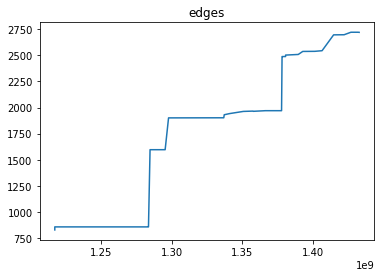

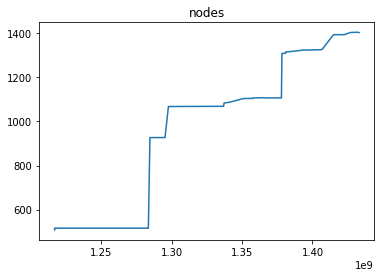

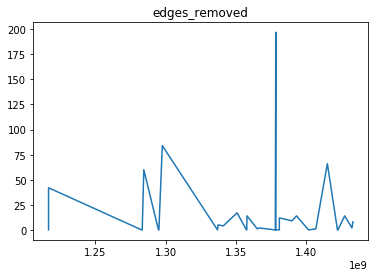

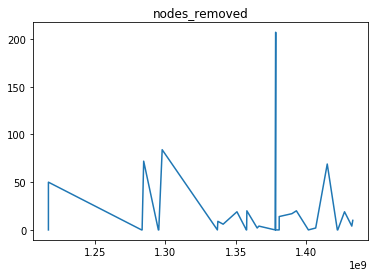

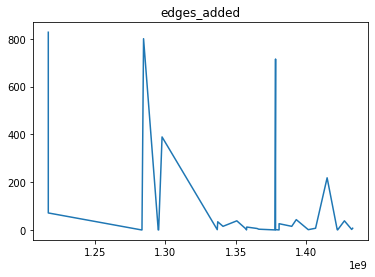

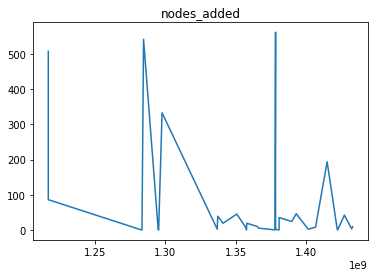

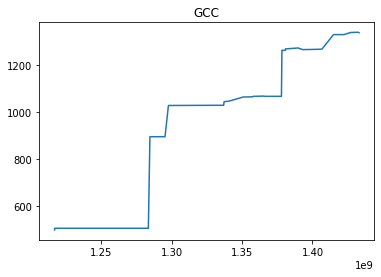

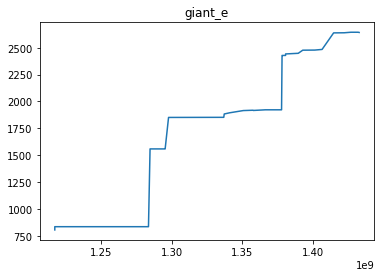

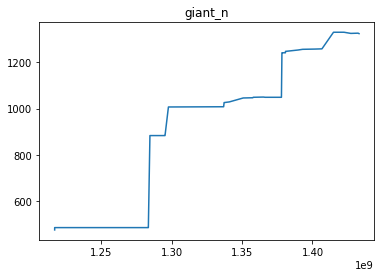

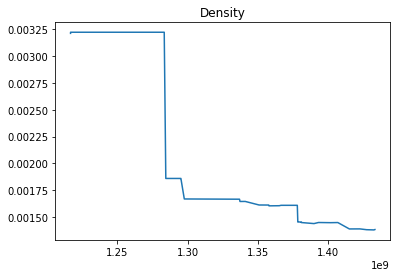

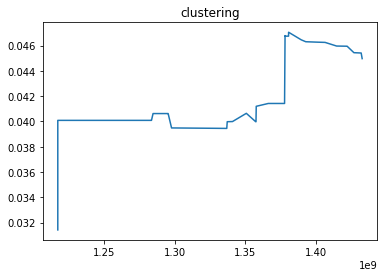

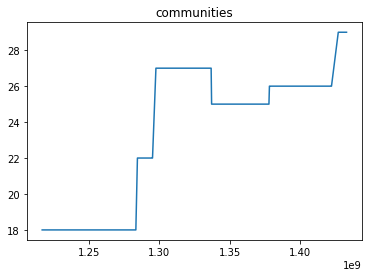

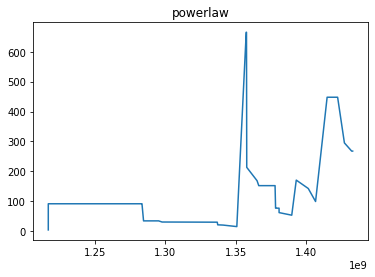

In [30]:
i = 1
for column in data_t.T:
    plt.plot(data[:,0],column)
    plt.title(col_name[i])
    i += 1
    plt.show()

In [6]:
for f_d in csv_files:
    fl = os.listdir(f_d)
    #print(fl)
    g_f = os.path.join(f_d,fl[0])+"/"
    
    #print("g_f",g_f)
    #n_f = os.listdir(g_f)
   #print("n_f", n_f)
    f_name = 'info.csv'
    info_path = os.path.join(g_f,f_name)
    print(info_path)
   # print(g_path)
   
    #f_read ='edges_all_t.csv'
    #w_path =  os.path.join(g_f,f_save)
    #print("read_file", w_path)
    info_df = pd.read_csv(info_path)
    print(info_df.head())

C:/Users/mmata/Desktop/SIG_csv/Cass/cassandra-graphs/info.csv


FileNotFoundError: [Errno 2] File b'C:/Users/mmata/Desktop/SIG_csv/Cass/cassandra-graphs/info.csv' does not exist: b'C:/Users/mmata/Desktop/SIG_csv/Cass/cassandra-graphs/info.csv'